<a href="https://colab.research.google.com/github/yair-byte/YOLOv8_traffic_density_estimator/blob/main/YOLOv8x_traffic_density_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt update
!sudo apt install python3.9
!pip install fiftyone ultralytics
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
import torch
import fiftyone as fo
import fiftyone.zoo as foz
from fiftyone import ViewField as F
import numpy as np
import os
import ultralytics
from tqdm import tqdm
display.clear_output()
!python --version
print(torch.__version__)
print(torch.cuda.is_available())
print(fo.__version__)
print(np.__version__)
from IPython import display
ultralytics.checks()

Ultralytics YOLOv8.0.82 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.1/78.2 GB disk)


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Define la nueva clase común
vehicle_labels = ["car", "truck", "bus"]

In [ ]:
# carga el dataset
dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    label_types=["detections"],
)

INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to '/root/fiftyone/coco-2017/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [8.0s elapsed, 0s remaining, 253.1Mb/s]       


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [8.0s elapsed, 0s remaining, 253.1Mb/s]       


Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Downloading images to '/root/fiftyone/coco-2017/tmp-download/val2017.zip'


 100% |██████|    6.1Gb/6.1Gb [24.0s elapsed, 0s remaining, 266.3Mb/s]      


INFO:eta.core.utils: 100% |██████|    6.1Gb/6.1Gb [24.0s elapsed, 0s remaining, 266.3Mb/s]      


Extracting images to '/root/fiftyone/coco-2017/validation/data'


INFO:fiftyone.utils.coco:Extracting images to '/root/fiftyone/coco-2017/validation/data'


Writing annotations to '/root/fiftyone/coco-2017/validation/labels.json'


INFO:fiftyone.utils.coco:Writing annotations to '/root/fiftyone/coco-2017/validation/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |███████████████| 5000/5000 [32.3s elapsed, 0s remaining, 124.5 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [32.3s elapsed, 0s remaining, 124.5 samples/s]      


Dataset 'coco-2017-validation' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-validation' created


In [ ]:
coco_classes = [c for c in dataset.default_classes if not c.isnumeric()]  #80 classes

In [ ]:
#funcion que exporta a formato YOLO
def export_yolo_data(
    samples,
    export_dir,
    classes,
    label_field = "ground_truth",
    split = None
    ):

    if type(split) == list:
        splits = split
        for split in splits:
            export_yolo_data(
                samples,
                export_dir,
                classes,
                label_field,
                split
            )
    else:
        if split is None:
            split_view = samples
            split = "val"
        else:
            split_view = samples.match_tags(split)

        split_view.export(
            export_dir=export_dir,
            dataset_type=fo.types.YOLOv5Dataset,
            label_field=label_field,
            classes=classes,
            split=split
        )

In [ ]:
#exportar a /coco_val el dataset en formato valido para YOLO
coco_val_dir = "coco_val"
export_yolo_data(dataset, coco_val_dir, coco_classes)

 100% |███████████████| 5000/5000 [20.1s elapsed, 0s remaining, 297.7 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [20.1s elapsed, 0s remaining, 297.7 samples/s]      


In [ ]:
#inferencia
!yolo task=detect mode=predict model=yolov8n.pt source=coco_val/images/val save_txt=True save_conf=True

Se han truncado las últimas 5000 líneas del flujo de salida.
image 4/5000 /content/coco_val/images/val/000000000724.jpg: 640x480 1 truck, 2 stop signs, 63.4ms
image 5/5000 /content/coco_val/images/val/000000000776.jpg: 640x448 4 teddy bears, 62.0ms
image 6/5000 /content/coco_val/images/val/000000000785.jpg: 448x640 1 person, 1 skis, 7.6ms
image 7/5000 /content/coco_val/images/val/000000000802.jpg: 640x448 1 oven, 1 refrigerator, 6.8ms
image 8/5000 /content/coco_val/images/val/000000000872.jpg: 640x640 2 persons, 8.4ms
image 9/5000 /content/coco_val/images/val/000000000885.jpg: 448x640 4 persons, 1 tennis racket, 10.0ms
image 10/5000 /content/coco_val/images/val/000000001000.jpg: 480x640 13 persons, 2 tennis rackets, 60.9ms
image 11/5000 /content/coco_val/images/val/000000001268.jpg: 448x640 4 persons, 2 boats, 1 bird, 1 backpack, 2 handbags, 6.8ms
image 12/5000 /content/coco_val/images/val/000000001296.jpg: 640x448 3 persons, 6.7ms
image 13/5000 /content/coco_val/images/val/00000000135

In [ ]:
def read_yolo_detections_file(filepath):
    detections = []
    if not os.path.exists(filepath):
        return np.array([])

    with open(filepath) as f:
        lines = [line.rstrip('\n').split(' ') for line in f]

    for line in lines:
        detection = [float(l) for l in line]
        detections.append(detection)
    return np.array(detections)

In [ ]:
def _uncenter_boxes(boxes):
    '''convert from center coords to corner coords'''
    boxes[:, 0] -= boxes[:, 2]/2.
    boxes[:, 1] -= boxes[:, 3]/2.

In [ ]:
def _get_class_labels(predicted_classes, class_list):
    labels = (predicted_classes).astype(int)
    labels = [class_list[l] for l in labels]
    return labels

In [ ]:
def convert_yolo_detections_to_fiftyone(
    yolo_detections,
    class_list
    ):

    detections = []
    if yolo_detections.size == 0:
        return fo.Detections(detections=detections)

    boxes = yolo_detections[:, 1:-1]
    _uncenter_boxes(boxes)

    confs = yolo_detections[:, -1]
    labels = _get_class_labels(yolo_detections[:, 0], class_list)

    for label, conf, box in zip(labels, confs, boxes):
        detections.append(
            fo.Detection(
                label=label,
                bounding_box=box.tolist(),
                confidence=conf
            )
        )

    return fo.Detections(detections=detections)

In [ ]:
def get_prediction_filepath(filepath, run_number = 1):
    run_num_string = ""
    if run_number != 1:
        run_num_string = str(run_number)
    filename = filepath.split("/")[-1].split(".")[0]
    return f"runs/detect/predict{run_num_string}/labels/{filename}.txt"

In [ ]:
def add_yolo_detections(
    samples,
    prediction_field,
    prediction_filepath,
    class_list
    ):

    prediction_filepaths = samples.values(prediction_filepath)
    yolo_detections = [read_yolo_detections_file(pf) for pf in prediction_filepaths]
    detections =  [convert_yolo_detections_to_fiftyone(yd, class_list) for yd in yolo_detections]
    samples.set_values(prediction_field, detections)

In [ ]:
filepaths = dataset.values("filepath")
prediction_filepaths = [get_prediction_filepath(fp) for fp in filepaths]
dataset.set_values(
    "yolov8n_det_filepath",
    prediction_filepaths
)

add_yolo_detections(
    dataset,
    "yolov8n",
    "yolov8n_det_filepath",
    coco_classes
)

In [ ]:
detection_results = dataset.evaluate_detections(
    "yolov8n",
    eval_key="eval",
    compute_mAP=True,
    gt_field="ground_truth",
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 5000/5000 [1.8m elapsed, 0s remaining, 67.5 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [1.8m elapsed, 0s remaining, 67.5 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 5000/5000 [1.4m elapsed, 0s remaining, 80.6 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [1.4m elapsed, 0s remaining, 80.6 samples/s]      


In [ ]:
mAP = detection_results.mAP()
print(f"mAP = {mAP}")

mAP = 0.31281116328283576


In [ ]:
counts = dataset.count_values("ground_truth.detections.label")

top10_classes = sorted(
    counts,
    key=counts.get,
    reverse=True
)[:10]

detection_results.print_report(classes=top10_classes)

               precision    recall  f1-score   support

       person       0.85      0.69      0.76     11572
          car       0.71      0.52      0.60      1970
        chair       0.62      0.34      0.44      1806
         book       0.61      0.12      0.20      1182
       bottle       0.68      0.39      0.50      1050
          cup       0.61      0.44      0.51       907
 dining table       0.54      0.42      0.47       697
traffic light       0.66      0.35      0.46       638
         bowl       0.63      0.49      0.55       636
      handbag       0.48      0.12      0.19       540

    micro avg       0.77      0.54      0.64     20998
    macro avg       0.64      0.39      0.47     20998
 weighted avg       0.75      0.54      0.62     20998



In [ ]:
# Definir las clases que se utilizarán en el dataset
classes = vehicle_labels

# Crear un dataset de prueba que solo incluya las clases especificadas
test_dataset = dataset.filter_labels(
    "ground_truth",
    F("label").is_in(classes)
).filter_labels(
    "yolov8n",
    F("label").is_in(classes),
    only_matches=False
).map_labels(
    "ground_truth",
    {"car": "vehicle", "truck": "vehicle", "bus": "vehicle"}
).map_labels(
    "yolov8n",
    {"car": "vehicle", "truck": "vehicle", "bus": "vehicle"}
).clone()

test_dataset.name = "vehicles_test_dataset"
test_dataset.persistent = True


In [ ]:
base_cars_results = test_dataset.evaluate_detections(
    "yolov8n",
    eval_key="base",
    compute_mAP=True,
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |█████████████████| 707/707 [8.8s elapsed, 0s remaining, 125.8 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 707/707 [8.8s elapsed, 0s remaining, 125.8 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |█████████████████| 707/707 [6.3s elapsed, 0s remaining, 128.6 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 707/707 [6.3s elapsed, 0s remaining, 128.6 samples/s]      


In [ ]:
mAP = base_cars_results.mAP()
print(f"Base mAP = {mAP}")

Base mAP = 0.3651205451705368


In [ ]:
base_cars_results.print_report(classes=["vehicle"])

              precision    recall  f1-score   support

     vehicle       0.77      0.55      0.64      2671

   micro avg       0.77      0.55      0.64      2671
   macro avg       0.77      0.55      0.64      2671
weighted avg       0.77      0.55      0.64      2671



In [ ]:
export_yolo_data(
    test_dataset,
    "cars_test",
    ["vehicle"]
)

 100% |█████████████████| 707/707 [4.0s elapsed, 0s remaining, 151.1 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 707/707 [4.0s elapsed, 0s remaining, 151.1 samples/s]      


In [ ]:
import gc
gc.collect()

0

In [ ]:
train_dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="train",
    label_types=["detections"],
    classes=vehicle_labels
).map_labels(
    "ground_truth",
    {"car": "vehicle", "truck": "vehicle", "bus": "vehicle"},
).clone()

train_dataset.name = "cars-train-data"
train_dataset.persistent = True
train_dataset.save()

INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/coco-2017/train' if necessary


Found annotations at '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Found annotations at '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Downloading 16270 images


   9% |█-------------|  1503/16270 [6.7m elapsed, 1.1h remaining, 4.1 images/s]    


INFO:eta.core.utils:   9% |█-------------|  1503/16270 [6.7m elapsed, 1.1h remaining, 4.1 images/s]    


KeyboardInterrupt: ignored

In [ ]:
#generar datos entrenamiento

train_dataset_kitti = foz.load_zoo_dataset("kitti", split="train", only_matching=True)

train_dataset_2 = train_dataset_kitti.filter_labels(
    "ground_truth",
    F("label").is_in(["Car","Van","Truck"])
).map_labels(
    "ground_truth",
    {"Car": "vehicle", "Van": "vehicle", "Truck": "vehicle"}
)

INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/kitti/train'


INFO:fiftyone.utils.kitti:Downloading labels to '/root/fiftyone/kitti/tmp-download/data_object_label_2.zip'


 100% |█████|   42.7Mb/42.7Mb [351.2ms elapsed, 0s remaining, 121.7Mb/s]    


INFO:eta.core.utils: 100% |█████|   42.7Mb/42.7Mb [351.2ms elapsed, 0s remaining, 121.7Mb/s]    


Extracting '/root/fiftyone/kitti/tmp-download/data_object_label_2.zip'


INFO:fiftyone.utils.kitti:Extracting '/root/fiftyone/kitti/tmp-download/data_object_label_2.zip'


INFO:fiftyone.utils.kitti:Downloading data to '/root/fiftyone/kitti/tmp-download/data_object_image_2.zip'


 100% |█████|   93.7Gb/93.7Gb [10.0m elapsed, 0s remaining, 118.5Mb/s]      


INFO:eta.core.utils: 100% |█████|   93.7Gb/93.7Gb [10.0m elapsed, 0s remaining, 118.5Mb/s]      


Extracting '/root/fiftyone/kitti/tmp-download/data_object_image_2.zip'


INFO:fiftyone.utils.kitti:Extracting '/root/fiftyone/kitti/tmp-download/data_object_image_2.zip'


Parsing dataset metadata


INFO:fiftyone.zoo.datasets.base:Parsing dataset metadata


Found 7481 samples


INFO:fiftyone.zoo.datasets.base:Found 7481 samples


Dataset info written to '/root/fiftyone/kitti/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/kitti/info.json'


Loading 'kitti' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'kitti' split 'train'


 100% |███████████████| 7481/7481 [1.3m elapsed, 0s remaining, 129.7 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 7481/7481 [1.3m elapsed, 0s remaining, 129.7 samples/s]      


Dataset 'kitti-train' created


INFO:fiftyone.zoo.datasets:Dataset 'kitti-train' created


ValueError: ignored

In [ ]:
train_dataset.merge_samples(train_dataset_2)

In [ ]:
gc.collect()

0

In [ ]:
#EMPEZAMOS CON EL FINE-TUNING.............................
import fiftyone.utils.random as four

## delete existing tags to start fresh
train_dataset.untag_samples(train_dataset.distinct("tags"))

## split into train and val
four.random_split(
    train_dataset,
    {"train": 0.8, "val": 0.2}
)

## export in YOLO format
export_yolo_data(
    train_dataset,
    "cars_train",
    ["vehicle"],
    split = ["train", "val"]
)

 100% |███████████████| 5438/5438 [52.4s elapsed, 0s remaining, 74.0 samples/s]       


INFO:eta.core.utils: 100% |███████████████| 5438/5438 [52.4s elapsed, 0s remaining, 74.0 samples/s]       


Directory 'cars_train' already exists; export will be merged with existing files


 100% |███████████████| 1360/1360 [12.9s elapsed, 0s remaining, 112.5 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1360/1360 [12.9s elapsed, 0s remaining, 112.5 samples/s]      


In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=cars_train/dataset.yaml epochs=100 patience=30 imgsz=640 batch=64

Ultralytics YOLOv8.0.81 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=cars_train/dataset.yaml, epochs=100, patience=30, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, sim

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=cars_test/images/val save_txt=True save_conf=True

Ultralytics YOLOv8.0.81 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/707 /content/cars_test/images/val/000000000724.jpg: 640x480 1 vehicle, 66.5ms
image 2/707 /content/cars_test/images/val/000000001532.jpg: 480x640 2 vehicles, 55.5ms
image 3/707 /content/cars_test/images/val/000000001584.jpg: 640x640 1 vehicle, 7.8ms
image 4/707 /content/cars_test/images/val/000000002006.jpg: 480x640 2 vehicles, 6.5ms
image 5/707 /content/cars_test/images/val/000000005037.jpg: 448x640 4 vehicles, 51.9ms
image 6/707 /content/cars_test/images/val/000000006040.jpg: 352x640 5 vehicles, 61.4ms
image 7/707 /content/cars_test/images/val/000000006723.jpg: 384x640 3 vehicles, 61.0ms
image 8/707 /content/cars_test/images/val/000000007088.jpg: 640x480 1 vehicle, 6.8ms
image 9/707 /content/cars_test/images/val/000000007386.jpg: 448x640 1 vehicle, 6.4ms
image 10/707 /content/cars_test/images/val/000000008762.jpg

In [ ]:
filepaths = test_dataset.values("filepath")
prediction_filepaths = [get_prediction_filepath(fp, run_number=2) for fp in filepaths]

test_dataset.set_values(
    "yolov8n_car_det_filepath",
    prediction_filepaths
)

add_yolo_detections(
    test_dataset,
    "yolov8n_car",
    "yolov8n_car_det_filepath",
    ["vehicle"]
)

In [ ]:
session = fo.launch_app(test_dataset)

In [ ]:
session.freeze()

In [ ]:
finetune_car_results = test_dataset.evaluate_detections(
    "yolov8n_car",
    eval_key="finetune",
    compute_mAP=True,
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |█████████████████| 707/707 [7.1s elapsed, 0s remaining, 130.4 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 707/707 [7.1s elapsed, 0s remaining, 130.4 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |█████████████████| 707/707 [5.7s elapsed, 0s remaining, 129.0 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 707/707 [5.7s elapsed, 0s remaining, 129.0 samples/s]      


In [ ]:
print("yolov8n mAP: {}".format(base_cars_results.mAP()))
print("fine-tuned mAP: {}".format(finetune_car_results.mAP()))

yolov8n mAP: 0.3651205451705368
fine-tuned mAP: 0.11885436745481899


In [ ]:
finetune_car_results.print_report()

              precision    recall  f1-score   support

     vehicle       0.50      0.30      0.37      2653

   micro avg       0.50      0.30      0.37      2653
   macro avg       0.50      0.30      0.37      2653
weighted avg       0.50      0.30      0.37      2653



In [ ]:
%cd {HOME}

/content


In [ ]:
SOURCE_VIDEO_PATH = f"{HOME}/video1.mp4"

In [ ]:
%cd {HOME}
!git clone https://github.com/ifzhang/ByteTrack.git
%cd {HOME}/ByteTrack

# workaround related to https://github.com/roboflow/notebooks/issues/80
!sed -i 's/onnx==1.8.1/onnx==1.9.0/g' requirements.txt

!pip3 install -q -r requirements.txt
!python3 setup.py -q develop
!pip install -q cython_bbox
!pip install -q onemetric

from IPython import display
display.clear_output()

import sys
sys.path.append(f"{HOME}/ByteTrack")

import yolox
print("yolox.__version__:", yolox.__version__)

yolox.__version__: 0.1.0


In [ ]:
from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch
from dataclasses import dataclass


@dataclass(frozen=True)
class BYTETrackerArgs:
    track_thresh: float = 0.25
    track_buffer: int = 30
    match_thresh: float = 0.8
    aspect_ratio_thresh: float = 3.0
    min_box_area: float = 1.0
    mot20: bool = False

In [ ]:
!pip install supervision==0.2.0


from IPython import display
display.clear_output()


import supervision
print("supervision.__version__:", supervision.__version__)

supervision.__version__: 0.2.0


In [ ]:
from supervision import ColorPalette
from supervision import Point
from supervision import VideoInfo
from supervision import get_video_frames_generator
from supervision import VideoSink
from supervision import show_frame_in_notebook
from supervision import Detections, BoxAnnotator
from supervision.detection.line_counter import LineZone, LineZoneAnnotator

In [ ]:
from typing import List

import numpy as np


# converts Detections into format that can be consumed by match_detections_with_tracks function
def detections2boxes(detections: Detections) -> np.ndarray:
    return np.hstack((
        detections.xyxy,
        detections.confidence[:, np.newaxis]
    ))


# converts List[STrack] into format that can be consumed by match_detections_with_tracks function
def tracks2boxes(tracks: List[STrack]) -> np.ndarray:
    return np.array([
        track.tlbr
        for track
        in tracks
    ], dtype=float)


# matches our bounding boxes with predictions
def match_detections_with_tracks(
    detections: Detections, 
    tracks: List[STrack]
) -> Detections:
    if not np.any(detections.xyxy) or len(tracks) == 0:
        return np.empty((0,))

    tracks_boxes = tracks2boxes(tracks=tracks)
    iou = box_iou_batch(tracks_boxes, detections.xyxy)
    track2detection = np.argmax(iou, axis=1)
    
    tracker_ids = [None] * len(detections)
    
    for tracker_index, detection_index in enumerate(track2detection):
        if iou[tracker_index, detection_index] != 0:
            tracker_ids[detection_index] = tracks[tracker_index].track_id

    return tracker_ids

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8x.pt")
model.fuse()

100%|██████████| 131M/131M [00:01<00:00, 130MB/s]
YOLOv8x summary (fused): 268 layers, 68200608 parameters, 0 gradients, 257.8 GFLOPs


In [ ]:
CLASS_NAMES_DICT = model.model.names

In [ ]:
print(CLASS_NAMES_DICT)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [ ]:
# class_ids of interest

# Obtener las claves para cada valor buscado
CLASS_ID = []
for valor in vehicle_labels:
    CLASS_ID += [clave for clave, valor_dic in CLASS_NAMES_DICT.items() if valor_dic == valor]

# Imprimir el resultado
print(CLASS_ID)


[2, 7, 5]



0: 384x640 16 cars, 3 trucks, 320.1ms
Speed: 0.6ms preprocess, 320.1ms inference, 24.1ms postprocess per image at shape (1, 3, 640, 640)


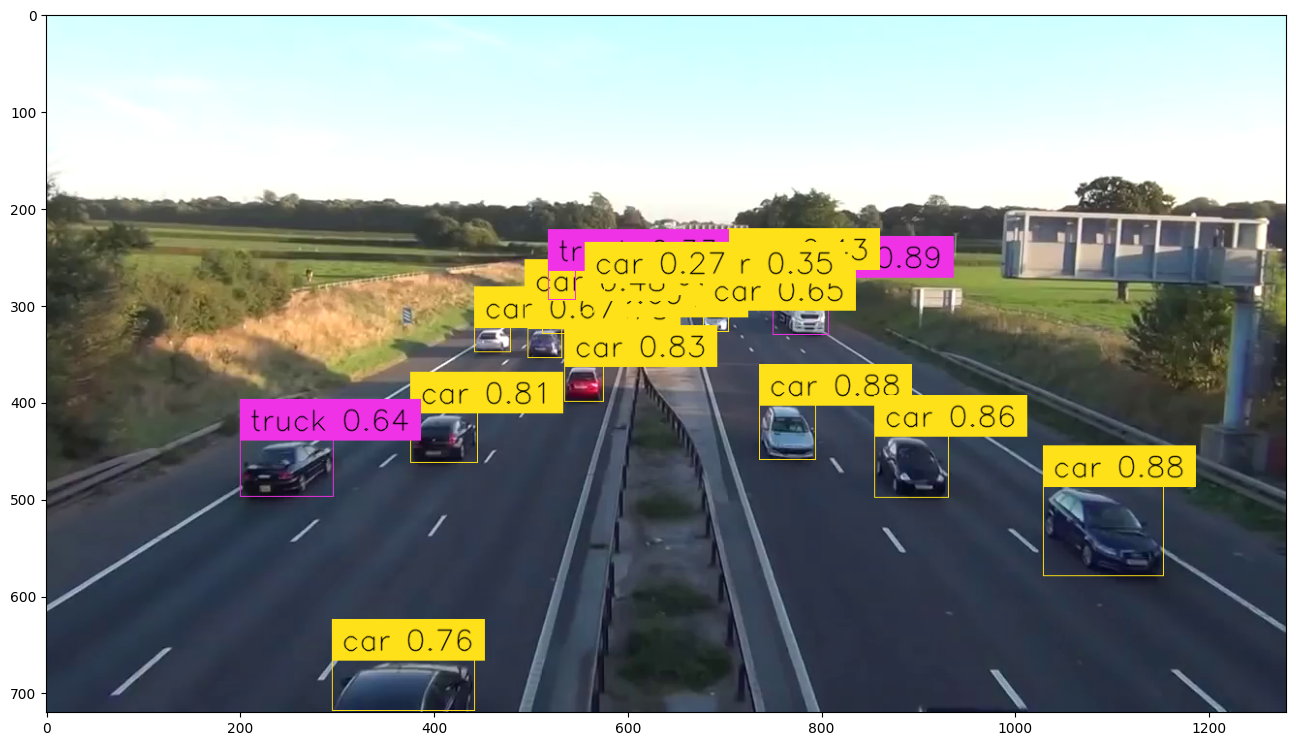

In [ ]:
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create instance of BoxAnnotator
box_annotator = BoxAnnotator(thickness=1, text_thickness=1, text_scale=1)
# acquire first video frame
iterator = iter(generator)
frame = next(iterator)
# model prediction on single frame and conversion to supervision Detections
results = model(frame)
detections = Detections(
    xyxy=results[0].boxes.xyxy.cpu().numpy(),
    confidence=results[0].boxes.conf.cpu().numpy(),
    class_id=results[0].boxes.cls.cpu().numpy().astype(int)
)
# format custom labels
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for _, confidence, class_id, tracker_id
    in detections
]
# annotate and display frame
frame = box_annotator.annotate(scene=frame, detections=detections, labels=labels)

%matplotlib inline
show_frame_in_notebook(frame, (16, 16))

In [ ]:
VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

VideoInfo(width=1280, height=720, fps=25, total_frames=51201)

In [ ]:
# settings
LINE_START = Point(1, 400)
LINE_END = Point(1280-1, 400)

TARGET_VIDEO_PATH = f"{HOME}/video1-result.mp4"

In [ ]:
from supervision import draw_text

In [ ]:
from supervision import Color

In [ ]:
from tqdm.notebook import tqdm

NUM_CARRILES = 4

#densidad muy poco < 500 vehiculos/hora por carril  A
#densidad poco > 500 & < 1000 vehiculos/hora por carril B
#densidad media > 1000 & <1500 vehiculos/hora por carril  C
#densidad alto > 1500 & <2000 vehiculos/hora por carril D
#densidad muy alto > 2000 & <2500 vehiculos/hora por carril E
#densidad excesivo > 2500 vehiculos/hora por carril F 

DENSIDAD_NIVEL = ["MUY POCO TRAFICO","POCO TRAFICO","TRAFICO MEDIO","TRAFICO ALTO","TRAFICO MUY ALTO","TRAFICO EXCESIVO"]
DENSIDAD_NIVEL_COLOR = [Color(124,205,124),Color(0,124,0),Color(0,100,0),
                        Color(255,140,148),Color(255,70,0),Color(220,20,60)]

densidad_actual_str_derecha = ''
densidad_actual_str_izq = ''

cont_mano_derecha = 0
cont_mano_izq = 0

ventana_derecha = []
ventana_izq = []

pointer_derecha = np.zeros(2,dtype=int)
pointer_izq = np.zeros(2,dtype=int)

background_color_derecha = Color.black()
background_color_izq = Color.black()

# create BYTETracker instance
byte_tracker = BYTETracker(BYTETrackerArgs())
# create VideoInfo instance
video_info = VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

text_anchor_derecha = Point(x=int((video_info.width/2)+200), y=100)
text_anchor_izq = Point(x=300, y=100)

# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create LineCounter instance
line_counter = LineZone(start=LINE_START, end=LINE_END)
# create instance of BoxAnnotator and LineCounterAnnotator
box_annotator = BoxAnnotator(thickness=1, text_thickness=1, text_scale=1)
line_annotator = LineZoneAnnotator(thickness=1, text_thickness=1, text_scale=1)
frame_id_cont=1

# open target video file
with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    # loop over video frames
    for frame in tqdm(generator, total=video_info.total_frames):
        # model prediction on single frame and conversion to supervision Detections
        results = model(frame)
        detections = Detections(
            xyxy=results[0].boxes.xyxy.cpu().numpy(),
            confidence=results[0].boxes.conf.cpu().numpy(),
            class_id=results[0].boxes.cls.cpu().numpy().astype(int)
        )
        # filtering out detections with unwanted classes
        mask = np.array([class_id in CLASS_ID for class_id in detections.class_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        # tracking detections
        tracks = byte_tracker.update(
            output_results=detections2boxes(detections=detections),
            img_info=frame.shape,
            img_size=frame.shape
        )
        tracker_id = match_detections_with_tracks(detections=detections, tracks=tracks)
        detections.tracker_id = np.array(tracker_id)
        # filtering out detections without trackers
        mask = np.array([tracker_id is not None for tracker_id in detections.tracker_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        # format custom labels
        labels = [
            f"#{tracker_id} {CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
            for _, confidence, class_id, tracker_id
            in detections
        ]
        # updating line counter
        line_counter.trigger(detections=detections)
        # annotate and display frame
        frame = box_annotator.annotate(scene=frame, detections=detections, labels=labels)
        line_annotator.annotate(frame=frame, line_counter=line_counter)

        ventana_derecha.append(line_counter.in_count - cont_mano_derecha) 
        ventana_izq.append(line_counter.out_count - cont_mano_izq) 

        cont_mano_derecha = line_counter.in_count
        cont_mano_izq = line_counter.out_count

        #calc pointers for buffers
        pointer_derecha[1] = frame_id_cont
        pointer_izq[1] = frame_id_cont

        pointer_derecha[0] = (pointer_derecha[1] - (video_info.fps*60)) #por minuto
        if(pointer_derecha[0] <= 0):
          pointer_derecha[0] = 0
        
        pointer_izq[0] = (pointer_izq[1] - (video_info.fps*60)) 
        if(pointer_izq[0] <= 0):
          pointer_izq[0] = 0

        autos_por_unidad_tiempo_derecha = 0
        autos_por_unidad_tiempo_izq = 0

        for i in range(pointer_derecha[0], pointer_derecha[1]):
          autos_por_unidad_tiempo_derecha += ventana_derecha[i]

        for i in range(pointer_izq[0], pointer_izq[1]):
          autos_por_unidad_tiempo_izq += ventana_izq[i]

        autos_por_unidad_tiempo_derecha = autos_por_unidad_tiempo_derecha / NUM_CARRILES
        if autos_por_unidad_tiempo_derecha <= 8:
          densidad_actual_str_derecha = DENSIDAD_NIVEL[0]
          background_color_derecha = DENSIDAD_NIVEL_COLOR[0]
        elif autos_por_unidad_tiempo_derecha > 8 and autos_por_unidad_tiempo_derecha <= 16:
          densidad_actual_str_derecha = DENSIDAD_NIVEL[1]
          background_color_derecha = DENSIDAD_NIVEL_COLOR[1]
        elif autos_por_unidad_tiempo_derecha > 16 and autos_por_unidad_tiempo_derecha <= 24:
          densidad_actual_str_derecha = DENSIDAD_NIVEL[2]
          background_color_derecha = DENSIDAD_NIVEL_COLOR[2]
        elif autos_por_unidad_tiempo_derecha > 24 and autos_por_unidad_tiempo_derecha <= 32:
          densidad_actual_str_derecha = DENSIDAD_NIVEL[3]
          background_color_derecha = DENSIDAD_NIVEL_COLOR[3]
        elif autos_por_unidad_tiempo_derecha > 32 and autos_por_unidad_tiempo_derecha <= 40:
          densidad_actual_str_derecha = DENSIDAD_NIVEL[4]
          background_color_derecha = DENSIDAD_NIVEL_COLOR[4]
        else:
          densidad_actual_str_derecha = DENSIDAD_NIVEL[5]
          background_color_derecha = DENSIDAD_NIVEL_COLOR[5]

        autos_por_unidad_tiempo_izq = autos_por_unidad_tiempo_izq / NUM_CARRILES
        if autos_por_unidad_tiempo_izq <= 8:
          densidad_actual_str_izq = DENSIDAD_NIVEL[0]
          background_color_izq = DENSIDAD_NIVEL_COLOR[0]
        elif autos_por_unidad_tiempo_izq > 8 and autos_por_unidad_tiempo_izq <= 16:
          densidad_actual_str_izq = DENSIDAD_NIVEL[1]
          background_color_izq = DENSIDAD_NIVEL_COLOR[1]
        elif autos_por_unidad_tiempo_izq > 16 and autos_por_unidad_tiempo_izq <= 24:
          densidad_actual_str_izq = DENSIDAD_NIVEL[2]
          background_color_izq = DENSIDAD_NIVEL_COLOR[2]
        elif autos_por_unidad_tiempo_izq > 24 and autos_por_unidad_tiempo_izq <= 32:
          densidad_actual_str_izq = DENSIDAD_NIVEL[3]
          background_color_izq = DENSIDAD_NIVEL_COLOR[3]
        elif autos_por_unidad_tiempo_izq > 32 and autos_por_unidad_tiempo_izq <= 40:
          densidad_actual_str_izq = DENSIDAD_NIVEL[4]
          background_color_izq = DENSIDAD_NIVEL_COLOR[4]
        else:
          densidad_actual_str_izq = DENSIDAD_NIVEL[5]
          background_color_izq = DENSIDAD_NIVEL_COLOR[5]

        frame = draw_text(scene=frame, text=densidad_actual_str_derecha, text_anchor=text_anchor_derecha, text_scale=1, text_thickness=1, background_color=background_color_derecha)
        frame = draw_text(scene=frame, text=densidad_actual_str_izq, text_anchor=text_anchor_izq, text_scale=1, text_thickness=1, background_color=background_color_izq)
        sink.write_frame(frame)
        print(frame_id_cont)
        frame_id_cont=frame_id_cont+1
        if(frame_id_cont>=25000):
          break

  0%|          | 0/51201 [00:00<?, ?it/s]


0: 384x640 16 cars, 3 trucks, 94.7ms
Speed: 15.2ms preprocess, 94.7ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 65.7ms
Speed: 0.6ms preprocess, 65.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1
2



0: 384x640 16 cars, 3 trucks, 61.4ms
Speed: 0.6ms preprocess, 61.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 73.9ms
Speed: 1.7ms preprocess, 73.9ms inference, 9.6ms postprocess per image at shape (1, 3, 640, 640)



3
4


0: 384x640 16 cars, 3 trucks, 58.1ms
Speed: 0.5ms preprocess, 58.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 55.3ms
Speed: 1.8ms preprocess, 55.3ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)



5
6


0: 384x640 17 cars, 1 truck, 54.1ms
Speed: 0.6ms preprocess, 54.1ms inference, 6.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 53.5ms
Speed: 0.8ms preprocess, 53.5ms inference, 11.1ms postprocess per image at shape (1, 3, 640, 640)



7
8


0: 384x640 17 cars, 2 trucks, 52.6ms
Speed: 2.6ms preprocess, 52.6ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 51.9ms
Speed: 0.5ms preprocess, 51.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 42.8ms
Speed: 0.5ms preprocess, 42.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



9
10
11


0: 384x640 17 cars, 1 truck, 42.3ms
Speed: 0.6ms preprocess, 42.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 41.6ms
Speed: 0.5ms preprocess, 41.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



12
13
14
15


0: 384x640 15 cars, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 30.1ms
Speed: 0.6ms preprocess, 30.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



16
17
18
19


0: 384x640 14 cars, 3 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



20
21
22
23


0: 384x640 16 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



24
25
26
27


0: 384x640 14 cars, 4 trucks, 30.0ms
Speed: 0.6ms preprocess, 30.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 29.9ms
Speed: 0.4ms preprocess, 29.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



28
29
30
31


0: 384x640 13 cars, 3 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 31.8ms
Speed: 0.7ms preprocess, 31.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



32
33
34
35


0: 384x640 16 cars, 3 trucks, 30.9ms
Speed: 0.8ms preprocess, 30.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.5ms
Speed: 1.3ms preprocess, 30.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



36
37
38
39


0: 384x640 14 cars, 4 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.2ms
Speed: 0.8ms preprocess, 31.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.5ms
Speed: 0.7ms preprocess, 31.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



40
41
42
43


0: 384x640 15 cars, 4 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 4 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



44
45
46
47


0: 384x640 15 cars, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.1ms
Speed: 0.4ms preprocess, 30.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



48
49
50
51


0: 384x640 15 cars, 1 bus, 3 trucks, 30.7ms
Speed: 2.7ms preprocess, 30.7ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 30.0ms
Speed: 0.4ms preprocess, 30.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



52
53
54
55


0: 384x640 14 cars, 1 bus, 3 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 30.0ms
Speed: 0.4ms preprocess, 30.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 3 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 29.9ms
Speed: 0.4ms preprocess, 29.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



56
57
58
59


0: 384x640 14 cars, 3 trucks, 32.2ms
Speed: 0.8ms preprocess, 32.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.5ms
Speed: 1.5ms preprocess, 30.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



60
61
62
63


0: 384x640 15 cars, 3 trucks, 30.0ms
Speed: 0.4ms preprocess, 30.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 buss, 3 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)



64
65
66
67


0: 384x640 14 cars, 3 trucks, 29.8ms
Speed: 0.4ms preprocess, 29.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 3 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 3 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 30.1ms
Speed: 0.4ms preprocess, 30.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



68
69
70
71


0: 384x640 14 cars, 3 trucks, 30.6ms
Speed: 0.7ms preprocess, 30.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 29.9ms
Speed: 0.7ms preprocess, 29.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



72
73
74
75


0: 384x640 15 cars, 3 trucks, 29.9ms
Speed: 0.6ms preprocess, 29.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 32.0ms
Speed: 0.7ms preprocess, 32.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



76
77
78
79


0: 384x640 14 cars, 3 trucks, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.1ms
Speed: 0.4ms preprocess, 30.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.3ms
Speed: 0.7ms preprocess, 30.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



80
81
82
83


0: 384x640 14 cars, 3 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



84
85
86
87


0: 384x640 14 cars, 2 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



88
89
90
91


0: 384x640 14 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



92
93
94
95


0: 384x640 14 cars, 2 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.1ms
Speed: 0.9ms preprocess, 30.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



96
97
98
99


0: 384x640 14 cars, 2 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



100
101
102
103


0: 384x640 12 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 30.5ms
Speed: 0.6ms preprocess, 30.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



104
105
106
107


0: 384x640 11 cars, 2 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



108
109
110
111


0: 384x640 13 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



112
113
114
115


0: 384x640 12 cars, 3 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 30.2ms
Speed: 0.4ms preprocess, 30.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 30.1ms
Speed: 5.6ms preprocess, 30.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



116
117
118
119


0: 384x640 13 cars, 3 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 29.7ms
Speed: 0.4ms preprocess, 29.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



120
121
122
123


0: 384x640 13 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 31.1ms
Speed: 1.4ms preprocess, 31.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



124
125
126
127


0: 384x640 10 cars, 2 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 trucks, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 3 trucks, 30.5ms
Speed: 0.6ms preprocess, 30.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



128
129
130
131


0: 384x640 10 cars, 3 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 3 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 3 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 3 trucks, 30.1ms
Speed: 0.4ms preprocess, 30.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



132
133
134
135


0: 384x640 10 cars, 3 trucks, 30.7ms
Speed: 0.7ms preprocess, 30.7ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 30.0ms
Speed: 0.4ms preprocess, 30.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



136
137
138
139


0: 384x640 11 cars, 3 trucks, 32.7ms
Speed: 0.4ms preprocess, 32.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



140
141
142
143


0: 384x640 11 cars, 3 trucks, 29.9ms
Speed: 0.7ms preprocess, 29.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 29.7ms
Speed: 0.4ms preprocess, 29.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 30.1ms
Speed: 0.4ms preprocess, 30.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



144
145
146
147


0: 384x640 11 cars, 4 trucks, 32.2ms
Speed: 0.6ms preprocess, 32.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 4 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 4 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



148
149
150
151


0: 384x640 9 cars, 4 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 4 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 4 trucks, 30.0ms
Speed: 0.4ms preprocess, 30.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 4 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



152
153
154
155


0: 384x640 8 cars, 6 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 3 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 3 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 4 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



156
157
158
159


0: 384x640 9 cars, 4 trucks, 30.5ms
Speed: 1.0ms preprocess, 30.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 4 trucks, 30.2ms
Speed: 0.4ms preprocess, 30.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 4 trucks, 31.5ms
Speed: 0.7ms preprocess, 31.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 4 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



160
161
162
163


0: 384x640 10 cars, 3 trucks, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 3 trucks, 1 traffic light, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 3 trucks, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 3 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



164
165
166
167


0: 384x640 10 cars, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 3 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 3 trucks, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



168
169
170
171


0: 384x640 11 cars, 3 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 3 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 4 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



172
173
174
175


0: 384x640 11 cars, 3 trucks, 33.6ms
Speed: 0.9ms preprocess, 33.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 30.2ms
Speed: 0.6ms preprocess, 30.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 4 trucks, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 3 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



176
177
178
179


0: 384x640 10 cars, 4 trucks, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 4 trucks, 34.5ms
Speed: 0.5ms preprocess, 34.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 4 trucks, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 4 trucks, 29.8ms
Speed: 5.0ms preprocess, 29.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


180
181
182



0: 384x640 12 cars, 4 trucks, 29.2ms
Speed: 0.5ms preprocess, 29.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


183
184
185
186


0: 384x640 10 cars, 2 trucks, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 trucks, 30.0ms
Speed: 0.4ms preprocess, 30.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 trucks, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)




187
188
189


0: 384x640 10 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 trucks, 30.3ms
Speed: 0.7ms preprocess, 30.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 trucks, 29.9ms
Speed: 0.4ms preprocess, 29.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)



190
191
192
193


0: 384x640 11 cars, 2 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 3 trucks, 30.2ms
Speed: 0.4ms preprocess, 30.2ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 3 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 3 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



194
195
196
197


0: 384x640 9 cars, 3 trucks, 30.1ms
Speed: 0.8ms preprocess, 30.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 3 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 3 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 4 trucks, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



198
199
200
201


0: 384x640 10 cars, 3 trucks, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 3 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 3 trucks, 30.2ms
Speed: 0.6ms preprocess, 30.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 30.1ms
Speed: 0.4ms preprocess, 30.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



202
203
204
205


0: 384x640 12 cars, 3 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



206
207
208
209


0: 384x640 12 cars, 3 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 30.2ms
Speed: 0.4ms preprocess, 30.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 32.8ms
Speed: 0.4ms preprocess, 32.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



210
211
212
213


0: 384x640 13 cars, 3 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 29.6ms
Speed: 0.4ms preprocess, 29.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


214
215
216
217



0: 384x640 12 cars, 4 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 30.0ms
Speed: 0.4ms preprocess, 30.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



218
219
220
221


0: 384x640 13 cars, 3 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 30.2ms
Speed: 0.6ms preprocess, 30.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


222
223
224



0: 384x640 12 cars, 3 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 30.0ms
Speed: 0.6ms preprocess, 30.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



225
226
227
228


0: 384x640 12 cars, 3 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 30.3ms
Speed: 0.8ms preprocess, 30.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 30.2ms
Speed: 0.8ms preprocess, 30.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



229
230
231
232


0: 384x640 12 cars, 3 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 30.1ms
Speed: 1.0ms preprocess, 30.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



233
234
235
236


0: 384x640 13 cars, 3 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 29.9ms
Speed: 0.4ms preprocess, 29.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



237
238
239
240


0: 384x640 13 cars, 2 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 29.7ms
Speed: 0.4ms preprocess, 29.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 29.7ms
Speed: 0.4ms preprocess, 29.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



241
242
243
244


0: 384x640 11 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



245
246
247
248


0: 384x640 12 cars, 3 trucks, 31.1ms
Speed: 0.9ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 29.5ms
Speed: 0.5ms preprocess, 29.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


249
250
251



0: 384x640 12 cars, 3 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 29.1ms
Speed: 1.2ms preprocess, 29.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


252
253
254



0: 384x640 11 cars, 3 trucks, 30.0ms
Speed: 0.6ms preprocess, 30.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 30.1ms
Speed: 0.6ms preprocess, 30.1ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 6 trucks, 30.2ms
Speed: 0.4ms preprocess, 30.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


255
256
257



0: 384x640 14 cars, 4 trucks, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 30.1ms
Speed: 0.6ms preprocess, 30.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



258
259
260
261


0: 384x640 13 cars, 4 trucks, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 29.8ms
Speed: 0.6ms preprocess, 29.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


262
263
264



0: 384x640 13 cars, 4 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 29.6ms
Speed: 0.5ms preprocess, 29.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


265
266
267



0: 384x640 12 cars, 3 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 4 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 4 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)


268
269
270



0: 384x640 10 cars, 4 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 4 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



271
272
273
274


0: 384x640 11 cars, 3 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 3 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


275
276
277



0: 384x640 11 cars, 3 trucks, 29.7ms
Speed: 0.4ms preprocess, 29.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 3 trucks, 29.9ms
Speed: 0.4ms preprocess, 29.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 4 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


278
279
280
281



0: 384x640 11 cars, 4 trucks, 29.9ms
Speed: 0.4ms preprocess, 29.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 4 trucks, 30.3ms
Speed: 0.8ms preprocess, 30.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


282
283
284
285



0: 384x640 11 cars, 4 trucks, 30.1ms
Speed: 0.6ms preprocess, 30.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



286
287
288
289


0: 384x640 10 cars, 3 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 4 trucks, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 3 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



290
291
292
293


0: 384x640 10 cars, 3 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 30.1ms
Speed: 0.4ms preprocess, 30.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



294
295
296
297


0: 384x640 11 cars, 3 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 30.5ms
Speed: 0.7ms preprocess, 30.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 31.8ms
Speed: 1.2ms preprocess, 31.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



298
299
300
301


0: 384x640 11 cars, 3 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 31.8ms
Speed: 0.3ms preprocess, 31.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



302
303
304
305


0: 384x640 13 cars, 4 trucks, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 30.1ms
Speed: 0.6ms preprocess, 30.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 1 traffic light, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



306
307
308
309


0: 384x640 13 cars, 4 trucks, 1 traffic light, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 1 traffic light, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 1 traffic light, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 1 traffic light, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



310
311
312
313


0: 384x640 13 cars, 3 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



314
315
316
317


0: 384x640 13 cars, 3 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.1ms
Speed: 0.9ms preprocess, 30.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



318
319
320
321


0: 384x640 15 cars, 3 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 29.7ms
Speed: 0.6ms preprocess, 29.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



322
323
324
325


0: 384x640 14 cars, 5 trucks, 1 traffic light, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 1 traffic light, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 1 traffic light, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 1 traffic light, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



326
327
328
329


0: 384x640 15 cars, 5 trucks, 1 traffic light, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 1 traffic light, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 1 traffic light, 31.1ms
Speed: 0.7ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 30.2ms
Speed: 0.4ms preprocess, 30.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



330
331
332
333


0: 384x640 16 cars, 3 trucks, 1 traffic light, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 1 traffic light, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 29.9ms
Speed: 0.4ms preprocess, 29.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



334
335
336
337


0: 384x640 16 cars, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



338
339
340
341


0: 384x640 14 cars, 3 trucks, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 30.7ms
Speed: 0.8ms preprocess, 30.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



342
343
344
345


0: 384x640 14 cars, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



346
347
348
349


0: 384x640 15 cars, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.4ms
Speed: 0.7ms preprocess, 31.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)



350
351
352
353


0: 384x640 14 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



354
355
356
357


0: 384x640 15 cars, 3 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 32.1ms
Speed: 0.8ms preprocess, 32.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



358
359
360
361


0: 384x640 14 cars, 3 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 30.0ms
Speed: 0.4ms preprocess, 30.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 30.2ms
Speed: 0.4ms preprocess, 30.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



362
363
364
365


0: 384x640 15 cars, 3 trucks, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



366
367
368
369


0: 384x640 15 cars, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



370
371
372
373


0: 384x640 14 cars, 2 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



374
375
376
377


0: 384x640 14 cars, 1 train, 3 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)



378
379
380
381


0: 384x640 14 cars, 2 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



382
383
384
385


0: 384x640 13 cars, 2 trucks, 1 traffic light, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 29.7ms
Speed: 0.4ms preprocess, 29.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.3ms
Speed: 1.0ms preprocess, 31.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



386
387
388
389


0: 384x640 16 cars, 2 trucks, 32.7ms
Speed: 1.1ms preprocess, 32.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



390
391
392
393


0: 384x640 19 cars, 1 truck, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 1 traffic light, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



394
395
396
397


0: 384x640 20 cars, 1 truck, 1 traffic light, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 1 traffic light, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



398
399
400
401


0: 384x640 20 cars, 1 truck, 1 traffic light, 31.1ms
Speed: 0.8ms preprocess, 31.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 1 traffic light, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 1 traffic light, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 1 traffic light, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



402
403
404
405


0: 384x640 20 cars, 1 truck, 1 traffic light, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 1 traffic light, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 1 traffic light, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 1 traffic light, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



406
407
408
409


0: 384x640 20 cars, 1 truck, 1 traffic light, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 1 traffic light, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 1 traffic light, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 1 traffic light, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



410
411
412
413


0: 384x640 19 cars, 1 truck, 1 traffic light, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 1 traffic light, 30.1ms
Speed: 0.7ms preprocess, 30.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 1 traffic light, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 1 traffic light, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



414
415
416
417


0: 384x640 17 cars, 2 trucks, 1 traffic light, 30.5ms
Speed: 0.3ms preprocess, 30.5ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 1 traffic light, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 1 traffic light, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 1 traffic light, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



418
419
420
421


0: 384x640 18 cars, 1 truck, 1 traffic light, 30.4ms
Speed: 0.7ms preprocess, 30.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 1 traffic light, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 1 traffic light, 30.6ms
Speed: 0.9ms preprocess, 30.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 1 traffic light, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



422
423
424
425


0: 384x640 18 cars, 1 truck, 1 traffic light, 31.4ms
Speed: 0.7ms preprocess, 31.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 1 traffic light, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 1 traffic light, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 1 traffic light, 31.2ms
Speed: 0.7ms preprocess, 31.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



426
427
428
429


0: 384x640 19 cars, 1 truck, 1 traffic light, 30.0ms
Speed: 0.6ms preprocess, 30.0ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 1 traffic light, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 1 traffic light, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 1 traffic light, 31.2ms
Speed: 0.8ms preprocess, 31.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



430
431
432
433


0: 384x640 16 cars, 4 trucks, 30.8ms
Speed: 0.8ms preprocess, 30.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.1ms
Speed: 1.1ms preprocess, 30.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 30.9ms
Speed: 0.7ms preprocess, 30.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 30.1ms
Speed: 0.6ms preprocess, 30.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


434
435
436
437



0: 384x640 17 cars, 3 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



438
439
440
441


0: 384x640 17 cars, 4 trucks, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 30.1ms
Speed: 0.7ms preprocess, 30.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 30.0ms
Speed: 0.6ms preprocess, 30.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



442
443
444
445


0: 384x640 15 cars, 5 trucks, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 30.2ms
Speed: 0.7ms preprocess, 30.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 6 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



446
447
448
449


0: 384x640 15 cars, 5 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 6 trucks, 30.6ms
Speed: 0.8ms preprocess, 30.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 6 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 6 trucks, 30.8ms
Speed: 0.8ms preprocess, 30.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



450
451
452
453


0: 384x640 15 cars, 4 trucks, 32.7ms
Speed: 0.4ms preprocess, 32.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 7 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 6 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 6 trucks, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


454
455
456
457



0: 384x640 16 cars, 5 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 6 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


458
459



0: 384x640 13 cars, 5 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 5 trucks, 30.5ms
Speed: 2.1ms preprocess, 30.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 5 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


460
461
462



0: 384x640 15 cars, 1 bus, 7 trucks, 29.5ms
Speed: 0.8ms preprocess, 29.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 6 trucks, 32.9ms
Speed: 0.7ms preprocess, 32.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 5 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


463
464
465



0: 384x640 13 cars, 6 trucks, 29.4ms
Speed: 0.5ms preprocess, 29.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 6 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


466
467
468



0: 384x640 12 cars, 6 trucks, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 7 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 5 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



469
470
471
472


0: 384x640 13 cars, 8 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 6 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 7 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 8 trucks, 29.6ms
Speed: 0.6ms preprocess, 29.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



473
474
475
476


0: 384x640 15 cars, 1 bus, 8 trucks, 33.1ms
Speed: 0.4ms preprocess, 33.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 9 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 9 trucks, 30.9ms
Speed: 2.4ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 5 trucks, 29.6ms
Speed: 0.5ms preprocess, 29.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


477
478
479



0: 384x640 15 cars, 6 trucks, 30.2ms
Speed: 1.9ms preprocess, 30.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 5 trucks, 30.4ms
Speed: 0.7ms preprocess, 30.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 30.7ms
Speed: 0.7ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


480
481
482



0: 384x640 14 cars, 5 trucks, 33.8ms
Speed: 0.5ms preprocess, 33.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 6 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 6 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



483
484
485
486


0: 384x640 14 cars, 4 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 5 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


487
488
489



0: 384x640 14 cars, 4 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 4 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


490
491
492



0: 384x640 15 cars, 4 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 4 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 4 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



493
494
495
496


0: 384x640 15 cars, 5 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 5 trucks, 30.1ms
Speed: 0.4ms preprocess, 30.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 5 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 5 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



497
498
499
500


0: 384x640 16 cars, 1 bus, 4 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 5 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 5 trucks, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 4 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


501
502
503
504


0: 384x640 14 cars, 2 buss, 3 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 4 trucks, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 29.4ms
Speed: 0.4ms preprocess, 29.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



505
506



0: 384x640 14 cars, 3 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 3 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


507
508
509



0: 384x640 14 cars, 1 bus, 4 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


510
511
512
513



0: 384x640 14 cars, 3 trucks, 30.0ms
Speed: 0.4ms preprocess, 30.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 33.7ms
Speed: 0.6ms preprocess, 33.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


514
515
516



0: 384x640 14 cars, 3 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 29.6ms
Speed: 0.4ms preprocess, 29.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


517
518
519



0: 384x640 15 cars, 4 trucks, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


520
521
522



0: 384x640 14 cars, 4 trucks, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 29.8ms
Speed: 0.4ms preprocess, 29.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


523
524
525



0: 384x640 13 cars, 4 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



526
527
528


0: 384x640 14 cars, 4 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 30.8ms
Speed: 2.0ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


529
530
531



0: 384x640 12 cars, 3 trucks, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 29.4ms
Speed: 0.6ms preprocess, 29.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


532
533
534



0: 384x640 15 cars, 3 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


535
536
537



0: 384x640 14 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 3 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



538
539
540


0: 384x640 15 cars, 3 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.5ms
Speed: 1.6ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 29.4ms
Speed: 0.5ms preprocess, 29.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


541
542
543



0: 384x640 13 cars, 4 trucks, 30.6ms
Speed: 0.7ms preprocess, 30.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 33.9ms
Speed: 0.5ms preprocess, 33.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 29.9ms
Speed: 0.6ms preprocess, 29.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


544
545
546



0: 384x640 13 cars, 5 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 5 trucks, 30.2ms
Speed: 0.6ms preprocess, 30.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 30.7ms


547
548
549


Speed: 0.5ms preprocess, 30.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


550
551
552



0: 384x640 13 cars, 4 trucks, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 30.2ms
Speed: 0.6ms preprocess, 30.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


553
554
555



0: 384x640 14 cars, 3 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



556
557
558
559


0: 384x640 14 cars, 3 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 29.5ms
Speed: 0.4ms preprocess, 29.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


560
561
562
563


0: 384x640 15 cars, 3 trucks, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.6ms



564
565


Speed: 0.4ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 5 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


566
567
568



0: 384x640 13 cars, 5 trucks, 30.7ms
Speed: 2.0ms preprocess, 30.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



569
570
571


0: 384x640 14 cars, 4 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.2ms
Speed: 1.2ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 30.2ms
Speed: 0.4ms preprocess, 30.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



572
573
574
575


0: 384x640 13 cars, 4 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



576
577
578
579


0: 384x640 13 cars, 4 trucks, 31.1ms
Speed: 1.3ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



580
581
582
583


0: 384x640 13 cars, 4 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



584
585
586
587


0: 384x640 14 cars, 4 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 5 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



588
589
590
591


0: 384x640 13 cars, 4 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 30.7ms
Speed: 1.1ms preprocess, 30.7ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 5 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


592
593
594
595



0: 384x640 15 cars, 4 trucks, 29.7ms
Speed: 0.4ms preprocess, 29.7ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 5 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 1 traffic light, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



596
597
598
599


0: 384x640 14 cars, 5 trucks, 1 traffic light, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 5 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 5 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 5 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



600
601
602
603


0: 384x640 15 cars, 5 trucks, 1 traffic light, 32.8ms
Speed: 0.4ms preprocess, 32.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 5 trucks, 30.9ms
Speed: 1.4ms preprocess, 30.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



604
605
606
607


0: 384x640 14 cars, 5 trucks, 32.4ms
Speed: 0.6ms preprocess, 32.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 5 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 5 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 5 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



608
609
610
611


0: 384x640 15 cars, 5 trucks, 1 traffic light, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 6 trucks, 1 traffic light, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 6 trucks, 1 traffic light, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



612
613
614
615


0: 384x640 13 cars, 7 trucks, 1 traffic light, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 7 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 6 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 5 trucks, 31.2ms
Speed: 1.3ms preprocess, 31.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



616
617
618
619


0: 384x640 13 cars, 5 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 5 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 5 trucks, 34.4ms
Speed: 0.5ms preprocess, 34.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



620
621
622
623


0: 384x640 14 cars, 5 trucks, 31.1ms
Speed: 1.6ms preprocess, 31.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 31.1ms
Speed: 0.7ms preprocess, 31.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 6 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 5 trucks, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)



624
625
626
627


0: 384x640 14 cars, 5 trucks, 29.9ms
Speed: 1.3ms preprocess, 29.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


628
629
630



0: 384x640 14 cars, 5 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 34.3ms
Speed: 0.6ms preprocess, 34.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



631
632
633
634


0: 384x640 14 cars, 5 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 5 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 5 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 6 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



635
636
637
638


0: 384x640 12 cars, 6 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 5 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 31.0ms
Speed: 0.9ms preprocess, 31.0ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 6 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



639
640
641
642


0: 384x640 14 cars, 6 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 5 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 5 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



643
644
645
646


0: 384x640 15 cars, 1 bus, 4 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 5 trucks, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 5 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 5 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



647
648
649
650


0: 384x640 16 cars, 1 bus, 4 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 5 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 5 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 5 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



651
652
653
654


0: 384x640 16 cars, 1 bus, 4 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 4 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 6 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 6 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



655
656
657
658


0: 384x640 15 cars, 1 bus, 6 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 6 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 7 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 6 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



659
660
661
662


0: 384x640 17 cars, 1 bus, 5 trucks, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 6 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 7 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 7 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



663
664
665
666


0: 384x640 15 cars, 7 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 5 trucks, 30.5ms
Speed: 4.5ms preprocess, 30.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 6 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 6 trucks, 29.9ms
Speed: 0.4ms preprocess, 29.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



667
668
669
670


0: 384x640 15 cars, 1 bus, 5 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 6 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 6 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 6 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



671
672
673
674


0: 384x640 16 cars, 6 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 6 trucks, 29.8ms
Speed: 0.4ms preprocess, 29.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 6 trucks, 30.2ms
Speed: 0.4ms preprocess, 30.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 6 trucks, 30.7ms
Speed: 0.7ms preprocess, 30.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



675
676
677
678


0: 384x640 17 cars, 6 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 6 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 6 trucks, 30.0ms
Speed: 0.6ms preprocess, 30.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 6 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


679
680
681



0: 384x640 17 cars, 6 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 5 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 5 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



682
683
684
685


0: 384x640 16 cars, 5 trucks, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 6 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 6 trucks, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 6 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)



686
687
688
689


0: 384x640 16 cars, 5 trucks, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 5 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 5 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 6 trucks, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



690
691
692
693


0: 384x640 16 cars, 5 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 5 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 7 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 6 trucks, 29.9ms
Speed: 0.4ms preprocess, 29.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



694
695
696
697


0: 384x640 15 cars, 1 bus, 6 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 6 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 5 trucks, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 buss, 6 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



698
699
700
701


0: 384x640 15 cars, 2 buss, 5 trucks, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 buss, 4 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 4 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 4 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



702
703
704
705


0: 384x640 13 cars, 1 bus, 4 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 5 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 bus, 6 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 4 trucks, 1 traffic light, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



706
707
708
709


0: 384x640 14 cars, 7 trucks, 1 traffic light, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 1 traffic light, 31.3ms
Speed: 0.3ms preprocess, 31.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 1 traffic light, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 6 trucks, 1 traffic light, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



710
711
712
713


0: 384x640 12 cars, 5 trucks, 1 traffic light, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 5 trucks, 1 traffic light, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 1 traffic light, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 1 traffic light, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



714
715
716
717


0: 384x640 16 cars, 5 trucks, 1 traffic light, 33.4ms
Speed: 0.6ms preprocess, 33.4ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 1 traffic light, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 1 traffic light, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 1 traffic light, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


718
719
720
721



0: 384x640 15 cars, 4 trucks, 1 traffic light, 31.0ms
Speed: 0.7ms preprocess, 31.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 1 traffic light, 32.1ms
Speed: 1.1ms preprocess, 32.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 1 traffic light, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



722
723
724
725


0: 384x640 16 cars, 4 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)


726
727
728



0: 384x640 14 cars, 4 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


729
730
731



0: 384x640 14 cars, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


732
733
734



0: 384x640 14 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


735
736
737
738



0: 384x640 14 cars, 4 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


739
740



0: 384x640 17 cars, 3 trucks, 34.8ms
Speed: 0.5ms preprocess, 34.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 32.6ms
Speed: 0.8ms preprocess, 32.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 30.2ms
Speed: 0.4ms preprocess, 30.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


741
742
743



0: 384x640 17 cars, 4 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


744
745
746
747


0: 384x640 16 cars, 3 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



748
749



0: 384x640 19 cars, 4 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 3 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


750
751
752



0: 384x640 20 cars, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


753
754
755



0: 384x640 18 cars, 4 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.0ms
Speed: 0.4ms preprocess, 30.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 31.1ms
Speed: 0.8ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


756
757
758



0: 384x640 18 cars, 2 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


759
760
761



0: 384x640 18 cars, 3 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 35.1ms
Speed: 0.4ms preprocess, 35.1ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


762
763
764
765


0: 384x640 17 cars, 4 trucks, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 29.6ms
Speed: 0.5ms preprocess, 29.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



766
767



0: 384x640 17 cars, 3 trucks, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 34.6ms
Speed: 0.4ms preprocess, 34.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


768
769
770



0: 384x640 18 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.0ms
Speed: 2.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


771
772
773



0: 384x640 16 cars, 2 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


774
775
776



0: 384x640 16 cars, 2 trucks, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 35.6ms
Speed: 0.5ms preprocess, 35.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 29.1ms


777
778
779


Speed: 0.4ms preprocess, 29.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 30.1ms
Speed: 0.4ms preprocess, 30.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


780
781
782



0: 384x640 17 cars, 2 trucks, 34.0ms
Speed: 0.6ms preprocess, 34.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


783
784
785
786



0: 384x640 17 cars, 2 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 29.6ms
Speed: 0.4ms preprocess, 29.6ms inference, 8.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


787
788
789



0: 384x640 18 cars, 3 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 3 trucks, 34.0ms
Speed: 0.5ms preprocess, 34.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 32.4ms
Speed: 0.8ms preprocess, 32.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


790
791
792



0: 384x640 19 cars, 3 trucks, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 33.7ms
Speed: 0.5ms preprocess, 33.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 33.7ms
Speed: 0.5ms preprocess, 33.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


793
794
795



0: 384x640 19 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


796
797
798
799



0: 384x640 20 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


800
801
802



0: 384x640 18 cars, 3 trucks, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 34.7ms
Speed: 0.5ms preprocess, 34.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



803
804
805


0: 384x640 18 cars, 4 trucks, 29.1ms
Speed: 0.4ms preprocess, 29.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 31.1ms
Speed: 4.3ms preprocess, 31.1ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



806
807
808


0: 384x640 17 cars, 4 trucks, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


809
810
811



0: 384x640 17 cars, 4 trucks, 36.2ms
Speed: 0.6ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 29.4ms
Speed: 0.5ms preprocess, 29.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


812
813
814



0: 384x640 18 cars, 4 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 5 trucks, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


815
816
817



0: 384x640 15 cars, 5 trucks, 33.6ms
Speed: 0.5ms preprocess, 33.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


818
819
820



0: 384x640 15 cars, 4 trucks, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 1 traffic light, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 1 traffic light, 33.8ms
Speed: 0.5ms preprocess, 33.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


821
822
823



0: 384x640 16 cars, 4 trucks, 1 traffic light, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 1 traffic light, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 1 traffic light, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


824
825
826
827



0: 384x640 14 cars, 4 trucks, 1 traffic light, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 1 traffic light, 30.0ms
Speed: 0.4ms preprocess, 30.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


828
829
830



0: 384x640 14 cars, 4 trucks, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)



831
832
833


0: 384x640 13 cars, 4 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)



834
835
836


0: 384x640 15 cars, 4 trucks, 33.8ms
Speed: 0.9ms preprocess, 33.8ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


837
838
839



0: 384x640 15 cars, 5 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 5 trucks, 31.1ms
Speed: 1.2ms preprocess, 31.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.7ms
Speed: 1.2ms preprocess, 31.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


840
841
842
843



0: 384x640 15 cars, 4 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 5 trucks, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 5 trucks, 35.1ms
Speed: 0.4ms preprocess, 35.1ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


844
845
846



0: 384x640 16 cars, 1 bus, 5 trucks, 31.3ms
Speed: 1.2ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 5 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 5 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)


847
848
849



0: 384x640 17 cars, 5 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 5 trucks, 29.9ms
Speed: 0.6ms preprocess, 29.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 33.7ms
Speed: 0.4ms preprocess, 33.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


850
851
852



0: 384x640 17 cars, 1 train, 5 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


853
854
855



0: 384x640 15 cars, 1 bus, 4 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



856
857
858
859


0: 384x640 15 cars, 1 bus, 4 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 4 trucks, 32.3ms
Speed: 0.6ms preprocess, 32.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 4 trucks, 30.6ms
Speed: 0.7ms preprocess, 30.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



860
861
862
863


0: 384x640 14 cars, 1 bus, 4 trucks, 31.1ms
Speed: 2.5ms preprocess, 31.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



864
865
866
867


0: 384x640 14 cars, 4 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



868
869
870
871


0: 384x640 15 cars, 4 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 5 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 5 trucks, 32.3ms
Speed: 0.6ms preprocess, 32.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 5 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



872
873
874
875


0: 384x640 16 cars, 4 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 30.5ms
Speed: 3.3ms preprocess, 30.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


876
877
878



0: 384x640 16 cars, 5 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 6 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 5 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


879
880
881
882



0: 384x640 17 cars, 4 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 5 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 5 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



883
884
885
886


0: 384x640 17 cars, 5 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 5 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



887
888
889
890


0: 384x640 20 cars, 4 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 4 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 3 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


891
892
893



0: 384x640 20 cars, 3 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



894
895
896
897


0: 384x640 19 cars, 4 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


898
899
900
901



0: 384x640 20 cars, 3 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 4 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


902
903
904
905



0: 384x640 1 person, 20 cars, 1 bus, 3 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 19 cars, 4 trucks, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 20 cars, 1 motorcycle, 4 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



906
907
908
909


0: 384x640 1 person, 21 cars, 1 motorcycle, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 21 cars, 1 motorcycle, 4 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 21 cars, 2 motorcycles, 3 trucks, 30.2ms
Speed: 0.6ms preprocess, 30.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 19 cars, 2 motorcycles, 3 trucks, 32.2ms
Speed: 0.6ms preprocess, 32.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


910
911
912



0: 384x640 1 person, 19 cars, 1 motorcycle, 3 trucks, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 19 cars, 2 motorcycles, 3 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 20 cars, 2 motorcycles, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


913
914
915



0: 384x640 1 person, 20 cars, 2 motorcycles, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 21 cars, 2 motorcycles, 4 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 21 cars, 2 motorcycles, 4 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


916
917
918



0: 384x640 1 person, 21 cars, 2 motorcycles, 4 trucks, 30.0ms
Speed: 0.7ms preprocess, 30.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 21 cars, 1 motorcycle, 3 trucks, 29.8ms
Speed: 0.4ms preprocess, 29.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 21 cars, 1 motorcycle, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


919
920
921
922



0: 384x640 1 person, 20 cars, 2 motorcycles, 3 trucks, 31.1ms
Speed: 0.7ms preprocess, 31.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 20 cars, 2 motorcycles, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 motorcycle, 3 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 20 cars, 1 motorcycle, 4 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



923
924
925
926


0: 384x640 19 cars, 1 motorcycle, 4 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 19 cars, 2 motorcycles, 4 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 motorcycle, 2 trucks, 35.6ms
Speed: 0.6ms preprocess, 35.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



927
928
929
930


0: 384x640 1 person, 20 cars, 2 motorcycles, 3 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 19 cars, 1 motorcycle, 3 trucks, 31.0ms
Speed: 0.7ms preprocess, 31.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


931
932
933



0: 384x640 18 cars, 1 motorcycle, 3 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 motorcycle, 3 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 motorcycles, 1 truck, 31.5ms
Speed: 1.2ms preprocess, 31.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


934
935
936
937



0: 384x640 22 cars, 1 motorcycle, 2 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 motorcycle, 2 trucks, 33.9ms
Speed: 0.5ms preprocess, 33.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


938
939
940
941



0: 384x640 1 person, 19 cars, 3 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 3 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 20 cars, 3 trucks, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



942
943
944
945


0: 384x640 1 person, 21 cars, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


946
947
948
949



0: 384x640 21 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 motorcycle, 2 trucks, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 21 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 2 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


950
951
952



0: 384x640 1 person, 23 cars, 2 trucks, 31.3ms
Speed: 0.8ms preprocess, 31.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 23 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


953
954
955



0: 384x640 21 cars, 3 trucks, 35.5ms
Speed: 0.6ms preprocess, 35.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 22 cars, 1 truck, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 22 cars, 2 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



956
957
958
959


0: 384x640 1 person, 22 cars, 3 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 22 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 21 cars, 3 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



960
961
962
963


0: 384x640 21 cars, 1 truck, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 20 cars, 1 truck, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 21 cars, 1 truck, 29.7ms
Speed: 0.4ms preprocess, 29.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 21 cars, 1 truck, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


964
965
966
967



0: 384x640 1 person, 22 cars, 1 truck, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 1 bus, 1 truck, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 1 bus, 2 trucks, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


968
969
970
971



0: 384x640 22 cars, 1 bus, 1 truck, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 22 cars, 1 bus, 3 trucks, 30.2ms
Speed: 0.4ms preprocess, 30.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 22 cars, 1 bus, 1 truck, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



972
973
974
975


0: 384x640 1 person, 22 cars, 1 bus, 2 trucks, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 22 cars, 1 bus, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 22 cars, 1 bus, 1 truck, 30.0ms
Speed: 0.4ms preprocess, 30.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 22 cars, 1 truck, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



976
977
978
979


0: 384x640 1 person, 22 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 22 cars, 1 truck, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 1 truck, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 21 cars, 1 truck, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


980
981
982
983



0: 384x640 20 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 21 cars, 1 truck, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 20 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


984
985
986



0: 384x640 21 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



987
988
989
990


0: 384x640 19 cars, 2 trucks, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



991
992
993
994


0: 384x640 20 cars, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



995
996
997
998


0: 384x640 19 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


999
1000
1001
1002



0: 384x640 18 cars, 1 truck, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


1003
1004
1005
1006



0: 384x640 17 cars, 1 truck, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



1007
1008


0: 384x640 19 cars, 1 truck, 98.6ms
Speed: 0.6ms preprocess, 98.6ms inference, 10.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 71.8ms
Speed: 0.6ms preprocess, 71.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 29.1ms
Speed: 0.5ms preprocess, 29.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


1009
1010
1011



0: 384x640 20 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 34.4ms
Speed: 4.0ms preprocess, 34.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)



1012
1013
1014


0: 384x640 17 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 45.7ms
Speed: 0.4ms preprocess, 45.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


1015
1016



0: 384x640 17 cars, 2 trucks, 92.3ms
Speed: 0.5ms preprocess, 92.3ms inference, 11.3ms postprocess per image at shape (1, 3, 640, 640)


1017



0: 384x640 17 cars, 1 truck, 73.7ms
Speed: 0.6ms preprocess, 73.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.5ms
Speed: 0.6ms preprocess, 30.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1018
1019



0: 384x640 17 cars, 3 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 32.7ms
Speed: 0.4ms preprocess, 32.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


1020
1021
1022
1023


0: 384x640 17 cars, 1 truck, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 36.1ms
Speed: 0.4ms preprocess, 36.1ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



1024
1025



0: 384x640 16 cars, 40.5ms
Speed: 0.4ms preprocess, 40.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



1026
1027


0: 384x640 15 cars, 72.9ms
Speed: 14.8ms preprocess, 72.9ms inference, 16.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 29.0ms
Speed: 0.6ms preprocess, 29.0ms inference, 29.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 29.9ms
Speed: 3.7ms preprocess, 29.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


1028
1029



0: 384x640 17 cars, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.2ms
Speed: 0.4ms preprocess, 30.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1030
1031
1032



0: 384x640 18 cars, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


1033
1034
1035



0: 384x640 18 cars, 1 truck, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 32.6ms
Speed: 0.4ms preprocess, 32.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


1036
1037
1038



0: 384x640 18 cars, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


1039
1040
1041



0: 384x640 20 cars, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 32.9ms
Speed: 0.4ms preprocess, 32.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


1042
1043
1044



0: 384x640 20 cars, 30.9ms
Speed: 1.8ms preprocess, 30.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 32.2ms
Speed: 2.1ms preprocess, 32.2ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)



1045
1046
1047


0: 384x640 20 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 30.1ms
Speed: 0.4ms preprocess, 30.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


1048
1049
1050



0: 384x640 20 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



1051
1052
1053


0: 384x640 19 cars, 2 trucks, 1 traffic light, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 1 traffic light, 34.1ms
Speed: 0.4ms preprocess, 34.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 1 traffic light, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



1054
1055
1056
1057


0: 384x640 20 cars, 1 truck, 32.7ms
Speed: 0.4ms preprocess, 32.7ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 30.5ms
Speed: 0.6ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



1058
1059
1060
1061


0: 384x640 20 cars, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


1062
1063
1064
1065



0: 384x640 19 cars, 36.0ms
Speed: 0.6ms preprocess, 36.0ms inference, 9.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


1066
1067
1068



0: 384x640 18 cars, 1 truck, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)



1069
1070
1071


0: 384x640 19 cars, 1 truck, 34.5ms
Speed: 0.6ms preprocess, 34.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)



1072
1073
1074


0: 384x640 18 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


1075
1076
1077



0: 384x640 17 cars, 1 truck, 30.6ms
Speed: 2.2ms preprocess, 30.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)


1078
1079
1080



0: 384x640 17 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.2ms
Speed: 2.3ms preprocess, 30.2ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


1081
1082
1083



0: 384x640 17 cars, 1 truck, 33.9ms
Speed: 0.5ms preprocess, 33.9ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.9ms
Speed: 0.6ms preprocess, 32.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



1084
1085
1086


0: 384x640 18 cars, 2 trucks, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 34.6ms
Speed: 0.5ms preprocess, 34.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


1087
1088
1089



0: 384x640 17 cars, 2 trucks, 34.0ms
Speed: 0.5ms preprocess, 34.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 29.5ms
Speed: 0.5ms preprocess, 29.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



1090
1091
1092


0: 384x640 17 cars, 2 trucks, 32.5ms
Speed: 0.6ms preprocess, 32.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 29.7ms
Speed: 0.6ms preprocess, 29.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 33.5ms
Speed: 0.6ms preprocess, 33.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


1093
1094
1095



0: 384x640 15 cars, 2 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.3ms
Speed: 0.7ms preprocess, 31.3ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


1096
1097
1098



0: 384x640 18 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)



1099
1100
1101


0: 384x640 18 cars, 1 truck, 33.1ms
Speed: 0.4ms preprocess, 33.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 34.1ms
Speed: 0.4ms preprocess, 34.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


1102
1103
1104



0: 384x640 18 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 33.2ms
Speed: 0.4ms preprocess, 33.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1105
1106
1107



0: 384x640 17 cars, 2 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 32.6ms
Speed: 0.9ms preprocess, 32.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


1108
1109
1110



0: 384x640 18 cars, 2 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 34.0ms
Speed: 0.6ms preprocess, 34.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



1111
1112
1113


0: 384x640 17 cars, 1 truck, 33.6ms
Speed: 0.5ms preprocess, 33.6ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


1114
1115
1116



0: 384x640 19 cars, 1 truck, 30.7ms
Speed: 1.2ms preprocess, 30.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


1117
1118
1119



0: 384x640 19 cars, 1 truck, 32.7ms
Speed: 0.4ms preprocess, 32.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.0ms
Speed: 0.7ms preprocess, 32.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


1120
1121
1122



0: 384x640 20 cars, 1 truck, 35.7ms
Speed: 0.8ms preprocess, 35.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 1 truck, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



1123
1124
1125


0: 384x640 21 cars, 1 truck, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 1 truck, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 33.4ms
Speed: 0.4ms preprocess, 33.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



1126
1127
1128
1129


0: 384x640 20 cars, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 34.1ms
Speed: 0.4ms preprocess, 34.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



1130
1131
1132
1133


0: 384x640 21 cars, 32.3ms
Speed: 0.6ms preprocess, 32.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



1134
1135
1136
1137


0: 384x640 22 cars, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 32.8ms
Speed: 0.4ms preprocess, 32.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



1138
1139
1140
1141


0: 384x640 21 cars, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 30.4ms
Speed: 2.8ms preprocess, 30.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


1142
1143
1144



0: 384x640 21 cars, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


1145
1146
1147



0: 384x640 20 cars, 32.2ms
Speed: 0.6ms preprocess, 32.2ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 33.0ms
Speed: 0.4ms preprocess, 33.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



1148
1149
1150
1151


0: 384x640 20 cars, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 traffic light, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 traffic light, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



1152
1153
1154
1155


0: 384x640 19 cars, 32.0ms
Speed: 0.9ms preprocess, 32.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 35.0ms
Speed: 0.4ms preprocess, 35.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


1156
1157
1158



0: 384x640 19 cars, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


1159
1160
1161



0: 384x640 19 cars, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



1162
1163
1164
1165


0: 384x640 19 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 traffic light, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 traffic light, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 1 traffic light, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


1166
1167
1168
1169



0: 384x640 18 cars, 1 truck, 1 traffic light, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 traffic light, 32.0ms
Speed: 0.7ms preprocess, 32.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 traffic light, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



1170
1171
1172
1173


0: 384x640 17 cars, 32.0ms
Speed: 0.8ms preprocess, 32.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



1174
1175
1176
1177


0: 384x640 16 cars, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 33.1ms
Speed: 0.7ms preprocess, 33.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



1178
1179
1180
1181


0: 384x640 18 cars, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.6ms
Speed: 0.7ms preprocess, 31.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



1182
1183
1184
1185


0: 384x640 21 cars, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


1186
1187
1188
1189



0: 384x640 22 cars, 29.9ms
Speed: 0.4ms preprocess, 29.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.9ms
Speed: 1.0ms preprocess, 31.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


1190
1191
1192
1193



0: 384x640 19 cars, 1 truck, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


1194
1195
1196
1197



0: 384x640 19 cars, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


1198
1199
1200



0: 384x640 20 cars, 66.0ms
Speed: 0.6ms preprocess, 66.0ms inference, 7.6ms postprocess per image at shape (1, 3, 640, 640)


1201
1202



0: 384x640 18 cars, 1 truck, 1 traffic light, 57.1ms
Speed: 6.0ms preprocess, 57.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 1 traffic light, 36.4ms
Speed: 0.5ms preprocess, 36.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 1 traffic light, 42.5ms
Speed: 0.5ms preprocess, 42.5ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


1203
1204



0: 384x640 18 cars, 44.8ms
Speed: 0.6ms preprocess, 44.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 traffic light, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


1205
1206



0: 384x640 19 cars, 1 truck, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 1 traffic light, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


1207
1208
1209



0: 384x640 20 cars, 1 truck, 1 traffic light, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 1 truck, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


1210
1211
1212



0: 384x640 21 cars, 1 truck, 56.9ms
Speed: 0.5ms preprocess, 56.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



1213
1214


0: 384x640 20 cars, 1 truck, 45.7ms
Speed: 1.4ms preprocess, 45.7ms inference, 14.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 55.3ms
Speed: 0.5ms preprocess, 55.3ms inference, 9.9ms postprocess per image at shape (1, 3, 640, 640)



1215
1216


0: 384x640 22 cars, 1 truck, 53.4ms
Speed: 1.3ms preprocess, 53.4ms inference, 13.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 37.9ms
Speed: 0.6ms preprocess, 37.9ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 1 truck, 47.8ms
Speed: 0.5ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


1217
1218



0: 384x640 22 cars, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 32.8ms
Speed: 0.4ms preprocess, 32.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


1219
1220
1221



0: 384x640 20 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 1 truck, 33.0ms
Speed: 0.4ms preprocess, 33.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


1222
1223
1224



0: 384x640 20 cars, 1 truck, 73.8ms
Speed: 13.5ms preprocess, 73.8ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)


1225
1226



0: 384x640 20 cars, 1 truck, 71.2ms
Speed: 0.6ms preprocess, 71.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 53.0ms
Speed: 0.5ms preprocess, 53.0ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 640)



1227
1228


0: 384x640 22 cars, 1 truck, 52.0ms
Speed: 0.6ms preprocess, 52.0ms inference, 9.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 44.8ms
Speed: 0.4ms preprocess, 44.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 1 truck, 33.2ms
Speed: 0.4ms preprocess, 33.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 32.3ms
Speed: 2.1ms preprocess, 32.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


1229
1230
1231



0: 384x640 20 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


1232
1233
1234



0: 384x640 18 cars, 1 truck, 32.3ms
Speed: 5.1ms preprocess, 32.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 32.5ms
Speed: 0.8ms preprocess, 32.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


1235
1236
1237



0: 384x640 17 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


1238
1239
1240



0: 384x640 18 cars, 2 trucks, 32.5ms
Speed: 0.7ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 32.9ms
Speed: 0.4ms preprocess, 32.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



1241
1242
1243
1244


0: 384x640 20 cars, 2 trucks, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


1245
1246
1247



0: 384x640 18 cars, 2 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



1248
1249
1250
1251


0: 384x640 18 cars, 2 trucks, 30.0ms
Speed: 0.6ms preprocess, 30.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


1252
1253
1254



0: 384x640 17 cars, 2 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


1255
1256
1257



0: 384x640 18 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)


1258
1259
1260



0: 384x640 19 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.2ms
Speed: 0.4ms preprocess, 30.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1261
1262
1263



0: 384x640 17 cars, 2 trucks, 34.9ms
Speed: 0.6ms preprocess, 34.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 29.6ms
Speed: 0.5ms preprocess, 29.6ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)



1264
1265
1266


0: 384x640 18 cars, 1 truck, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 35.6ms
Speed: 0.5ms preprocess, 35.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.5ms
Speed: 0.9ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



1267
1268
1269


0: 384x640 17 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 37.6ms
Speed: 0.5ms preprocess, 37.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 36.8ms


1270
1271
1272


Speed: 0.4ms preprocess, 36.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


1273
1274
1275
1276



0: 384x640 15 cars, 1 truck, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 35.0ms
Speed: 0.4ms preprocess, 35.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


1277
1278
1279



0: 384x640 15 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 34.9ms
Speed: 0.8ms preprocess, 34.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


1280
1281
1282



0: 384x640 15 cars, 1 truck, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 34.6ms
Speed: 0.5ms preprocess, 34.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


1283
1284
1285
1286



0: 384x640 14 cars, 3 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.5ms
Speed: 0.6ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


1287
1288
1289



0: 384x640 17 cars, 2 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


1290
1291
1292
1293



0: 384x640 15 cars, 2 trucks, 34.5ms
Speed: 0.5ms preprocess, 34.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


1294
1295
1296



0: 384x640 16 cars, 2 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 35.3ms
Speed: 0.5ms preprocess, 35.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1297
1298
1299



0: 384x640 12 cars, 3 trucks, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 32.4ms
Speed: 0.6ms preprocess, 32.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1300
1301
1302



0: 384x640 14 cars, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 32.3ms
Speed: 0.6ms preprocess, 32.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.3ms
Speed: 0.8ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



1303
1304
1305
1306


0: 384x640 12 cars, 3 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)


1307
1308
1309



0: 384x640 16 cars, 2 trucks, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


1310
1311
1312



0: 384x640 15 cars, 2 trucks, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


1313
1314
1315



0: 384x640 16 cars, 3 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


1316
1317
1318



0: 384x640 16 cars, 2 trucks, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1319
1320
1321



0: 384x640 16 cars, 2 trucks, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)


1322
1323
1324



0: 384x640 15 cars, 1 truck, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.8ms
Speed: 0.4ms preprocess, 32.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 33.4ms
Speed: 0.4ms preprocess, 33.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



1325
1326
1327
1328


0: 384x640 15 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


1329
1330
1331
1332



0: 384x640 14 cars, 1 truck, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


1333
1334
1335
1336



0: 384x640 14 cars, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


1337
1338
1339



0: 384x640 13 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


1340
1341
1342



0: 384x640 15 cars, 1 truck, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 34.7ms
Speed: 0.4ms preprocess, 34.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


1343
1344
1345



0: 384x640 14 cars, 1 truck, 34.0ms
Speed: 0.4ms preprocess, 34.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 32.9ms
Speed: 0.4ms preprocess, 32.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


1346
1347
1348



0: 384x640 13 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 1 traffic light, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 1 traffic light, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)


1349
1350
1351



0: 384x640 14 cars, 1 truck, 1 traffic light, 30.1ms
Speed: 0.4ms preprocess, 30.1ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 1 traffic light, 32.1ms
Speed: 2.2ms preprocess, 32.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)



1352
1353
1354


0: 384x640 14 cars, 1 truck, 1 traffic light, 32.6ms
Speed: 0.6ms preprocess, 32.6ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 32.3ms
Speed: 0.6ms preprocess, 32.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


1355
1356
1357



0: 384x640 12 cars, 1 truck, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


1358
1359
1360



0: 384x640 12 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


1361
1362
1363
1364



0: 384x640 14 cars, 1 truck, 34.0ms
Speed: 0.4ms preprocess, 34.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 33.4ms
Speed: 0.4ms preprocess, 33.4ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)


1365
1366



0: 384x640 13 cars, 1 truck, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 34.4ms
Speed: 0.5ms preprocess, 34.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1367
1368
1369



0: 384x640 14 cars, 1 truck, 32.7ms
Speed: 0.4ms preprocess, 32.7ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 1 truck, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 34.0ms
Speed: 0.5ms preprocess, 34.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


1370
1371
1372



0: 384x640 12 cars, 1 bus, 1 truck, 36.2ms
Speed: 0.6ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 1 truck, 33.2ms
Speed: 0.4ms preprocess, 33.2ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 1 truck, 32.6ms
Speed: 0.4ms preprocess, 32.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


1373
1374
1375



0: 384x640 13 cars, 1 bus, 1 truck, 32.8ms
Speed: 0.4ms preprocess, 32.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 2 trucks, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)



1376
1377
1378


0: 384x640 14 cars, 1 truck, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.4ms
Speed: 1.2ms preprocess, 31.4ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 30.2ms
Speed: 1.5ms preprocess, 30.2ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


1379
1380
1381



0: 384x640 14 cars, 1 truck, 34.2ms
Speed: 1.5ms preprocess, 34.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 36.5ms
Speed: 0.4ms preprocess, 36.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1382
1383
1384



0: 384x640 14 cars, 1 truck, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


1385
1386
1387



0: 384x640 14 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)



1388
1389
1390


0: 384x640 16 cars, 1 truck, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)



1391
1392
1393


0: 384x640 16 cars, 2 trucks, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.6ms
Speed: 0.4ms preprocess, 32.6ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


1394
1395
1396



0: 384x640 15 cars, 2 trucks, 32.0ms
Speed: 1.5ms preprocess, 32.0ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


1397
1398
1399



0: 384x640 17 cars, 1 truck, 35.8ms
Speed: 0.5ms preprocess, 35.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 33.9ms
Speed: 0.5ms preprocess, 33.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 35.0ms
Speed: 0.4ms preprocess, 35.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1400
1401
1402



0: 384x640 17 cars, 2 trucks, 33.6ms
Speed: 0.4ms preprocess, 33.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 36.2ms
Speed: 0.5ms preprocess, 36.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



1403
1404
1405


0: 384x640 17 cars, 2 trucks, 34.2ms
Speed: 0.5ms preprocess, 34.2ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 34.9ms
Speed: 0.5ms preprocess, 34.9ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


1406
1407
1408



0: 384x640 15 cars, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.4ms
Speed: 0.7ms preprocess, 31.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


1409
1410
1411



0: 384x640 15 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


1412
1413
1414



0: 384x640 15 cars, 3 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 33.0ms
Speed: 0.4ms preprocess, 33.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


1415
1416
1417



0: 384x640 12 cars, 2 trucks, 33.1ms
Speed: 0.6ms preprocess, 33.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 32.5ms
Speed: 0.6ms preprocess, 32.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


1418
1419
1420
1421



0: 384x640 12 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.8ms
Speed: 0.7ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1422
1423
1424
1425


0: 384x640 13 cars, 4 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.9ms
Speed: 0.7ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



1426
1427
1428



0: 384x640 14 cars, 3 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.2ms
Speed: 0.8ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


1429
1430
1431



0: 384x640 12 cars, 3 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


1432
1433
1434
1435



0: 384x640 12 cars, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 30.8ms
Speed: 0.8ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


1436
1437
1438
1439



0: 384x640 11 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


1440
1441
1442
1443



0: 384x640 12 cars, 2 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 6.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1444
1445
1446
1447



0: 384x640 13 cars, 1 truck, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 32.5ms
Speed: 0.6ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 32.7ms
Speed: 0.4ms preprocess, 32.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


1448
1449
1450
1451



0: 384x640 12 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 32.7ms
Speed: 0.6ms preprocess, 32.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1452
1453
1454



0: 384x640 14 cars, 1 truck, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


1455
1456
1457
1458



0: 384x640 12 cars, 1 truck, 32.2ms
Speed: 0.6ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.9ms
Speed: 0.8ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


1459
1460
1461



0: 384x640 12 cars, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 33.1ms
Speed: 0.4ms preprocess, 33.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


1462
1463
1464



0: 384x640 12 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



1465
1466
1467
1468


0: 384x640 14 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 31.9ms
Speed: 0.9ms preprocess, 31.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


1469
1470
1471
1472


0: 384x640 11 cars, 4 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 5 trucks, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 32.3ms
Speed: 0.6ms preprocess, 32.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



1473
1474



0: 384x640 12 cars, 4 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



1475
1476
1477
1478


0: 384x640 12 cars, 4 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 33.1ms
Speed: 0.4ms preprocess, 33.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 4 trucks, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 32.6ms
Speed: 0.7ms preprocess, 32.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



1479
1480
1481
1482


0: 384x640 13 cars, 4 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.6ms
Speed: 0.7ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



1483
1484
1485
1486


0: 384x640 13 cars, 4 trucks, 33.8ms
Speed: 0.4ms preprocess, 33.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 33.1ms
Speed: 0.4ms preprocess, 33.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



1487
1488
1489
1490


0: 384x640 12 cars, 4 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 4 trucks, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



1491
1492
1493
1494


0: 384x640 11 cars, 3 trucks, 33.5ms
Speed: 0.4ms preprocess, 33.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 34.0ms
Speed: 0.5ms preprocess, 34.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



1495
1496
1497
1498


0: 384x640 13 cars, 3 trucks, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



1499
1500
1501
1502


0: 384x640 11 cars, 2 trucks, 32.0ms
Speed: 1.4ms preprocess, 32.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 32.6ms
Speed: 0.4ms preprocess, 32.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



1503
1504
1505
1506


0: 384x640 11 cars, 3 trucks, 34.3ms
Speed: 0.4ms preprocess, 34.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



1507
1508
1509
1510


0: 384x640 13 cars, 3 trucks, 33.6ms
Speed: 0.6ms preprocess, 33.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 32.8ms
Speed: 0.4ms preprocess, 32.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 4 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



1511
1512
1513
1514


0: 384x640 12 cars, 5 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 2 trucks, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 3 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 bus, 3 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



1515
1516
1517
1518


0: 384x640 13 cars, 4 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 4 trucks, 32.8ms
Speed: 0.4ms preprocess, 32.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 33.4ms
Speed: 0.4ms preprocess, 33.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



1519
1520
1521
1522


0: 384x640 14 cars, 2 buss, 2 trucks, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 35.6ms
Speed: 0.4ms preprocess, 35.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 buss, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1523
1524
1525



0: 384x640 14 cars, 1 bus, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 4 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


1526
1527
1528
1529



0: 384x640 15 cars, 1 truck, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



1530
1531
1532
1533


0: 384x640 13 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



1534
1535
1536
1537


0: 384x640 13 cars, 1 truck, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 34.6ms
Speed: 0.5ms preprocess, 34.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 1 traffic light, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 1 traffic light, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)



1538
1539
1540
1541


0: 384x640 13 cars, 1 truck, 1 traffic light, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 1 traffic light, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 1 traffic light, 33.9ms
Speed: 0.5ms preprocess, 33.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 1 traffic light, 33.3ms
Speed: 0.4ms preprocess, 33.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



1542
1543
1544
1545


0: 384x640 13 cars, 2 trucks, 1 traffic light, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 1 traffic light, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 1 traffic light, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 1 traffic light, 32.4ms
Speed: 0.6ms preprocess, 32.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


1546
1547
1548



0: 384x640 14 cars, 2 trucks, 1 traffic light, 31.2ms
Speed: 3.1ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 1 traffic light, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 1 traffic light, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


1549
1550
1551
1552



0: 384x640 13 cars, 2 trucks, 1 traffic light, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 1 traffic light, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 1 traffic light, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 1 traffic light, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



1553
1554
1555
1556


0: 384x640 11 cars, 3 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



1557
1558
1559
1560


0: 384x640 12 cars, 3 trucks, 1 traffic light, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 1 traffic light, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 1 traffic light, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



1561
1562
1563
1564


0: 384x640 12 cars, 3 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)



1565
1566
1567
1568


0: 384x640 13 cars, 3 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 33.4ms
Speed: 0.4ms preprocess, 33.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


1569
1570
1571
1572



0: 384x640 12 cars, 3 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 34.4ms
Speed: 0.5ms preprocess, 34.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1573
1574
1575
1576



0: 384x640 14 cars, 3 trucks, 32.6ms
Speed: 0.9ms preprocess, 32.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



1577
1578
1579
1580


0: 384x640 14 cars, 3 trucks, 32.7ms
Speed: 0.4ms preprocess, 32.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



1581
1582
1583
1584


0: 384x640 13 cars, 4 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



1585
1586
1587
1588


0: 384x640 17 cars, 3 trucks, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



1589
1590
1591


0: 384x640 18 cars, 3 trucks, 33.7ms
Speed: 0.8ms preprocess, 33.7ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


1592
1593
1594



0: 384x640 18 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1595
1596
1597



0: 384x640 17 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1598
1599
1600



0: 384x640 15 cars, 4 trucks, 34.0ms
Speed: 0.4ms preprocess, 34.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


1601
1602
1603



0: 384x640 17 cars, 3 trucks, 32.9ms
Speed: 0.4ms preprocess, 32.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


1604
1605
1606



0: 384x640 17 cars, 2 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


1607
1608
1609



0: 384x640 16 cars, 4 trucks, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 5 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.9ms
Speed: 0.4ms preprocess, 32.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


1610
1611
1612



0: 384x640 17 cars, 2 trucks, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1613
1614
1615
1616



0: 384x640 17 cars, 2 trucks, 33.2ms
Speed: 0.4ms preprocess, 33.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 32.4ms
Speed: 0.6ms preprocess, 32.4ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


1617
1618
1619



0: 384x640 18 cars, 3 trucks, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


1620
1621
1622



0: 384x640 17 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 32.1ms
Speed: 1.0ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


1623
1624
1625
1626



0: 384x640 16 cars, 2 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 35.0ms
Speed: 0.4ms preprocess, 35.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


1627
1628
1629



0: 384x640 16 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 32.9ms
Speed: 0.6ms preprocess, 32.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


1630
1631
1632
1633



0: 384x640 16 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.0ms
Speed: 2.5ms preprocess, 30.0ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


1634
1635
1636
1637



0: 384x640 17 cars, 2 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



1638
1639
1640
1641


0: 384x640 17 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



1642
1643
1644
1645


0: 384x640 17 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 4 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 4 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 bus, 3 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


1646
1647
1648



0: 384x640 20 cars, 4 trucks, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)



1649
1650
1651


0: 384x640 20 cars, 3 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 34.6ms
Speed: 0.5ms preprocess, 34.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1652
1653
1654



0: 384x640 19 cars, 3 trucks, 34.6ms
Speed: 0.4ms preprocess, 34.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



1655
1656
1657


0: 384x640 19 cars, 2 trucks, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 34.1ms
Speed: 0.4ms preprocess, 34.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 bus, 3 trucks, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


1658
1659
1660



0: 384x640 19 cars, 2 trucks, 33.1ms
Speed: 1.2ms preprocess, 33.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)



1661
1662
1663


0: 384x640 19 cars, 3 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 30.5ms
Speed: 1.3ms preprocess, 30.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


1664
1665
1666



0: 384x640 18 cars, 1 bus, 2 trucks, 30.5ms
Speed: 0.7ms preprocess, 30.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 buss, 4 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 buss, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)


1667
1668
1669



0: 384x640 19 cars, 2 buss, 2 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 buss, 1 truck, 35.1ms
Speed: 0.6ms preprocess, 35.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



1670
1671
1672


0: 384x640 20 cars, 1 bus, 2 trucks, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 buss, 3 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 buss, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)



1673
1674
1675


0: 384x640 19 cars, 2 buss, 1 truck, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 buss, 1 truck, 29.5ms
Speed: 0.6ms preprocess, 29.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 buss, 2 trucks, 31.4ms
Speed: 0.8ms preprocess, 31.4ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)



1676
1677
1678


0: 384x640 18 cars, 1 bus, 2 trucks, 31.7ms
Speed: 2.3ms preprocess, 31.7ms inference, 7.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 2 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 2 trucks, 30.8ms
Speed: 1.4ms preprocess, 30.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


1679
1680
1681



0: 384x640 17 cars, 1 bus, 2 trucks, 30.5ms
Speed: 0.6ms preprocess, 30.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 2 trucks, 34.3ms
Speed: 2.7ms preprocess, 34.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



1682
1683
1684


0: 384x640 16 cars, 2 buss, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 2 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 buss, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 buss, 1 truck, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1685
1686
1687



0: 384x640 15 cars, 2 buss, 2 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 buss, 1 truck, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


1688
1689
1690



0: 384x640 18 cars, 1 bus, 3 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 3 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 3 trucks, 33.4ms
Speed: 0.8ms preprocess, 33.4ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)


1691
1692
1693



0: 384x640 17 cars, 1 bus, 3 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 2 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 buss, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


1694
1695
1696



0: 384x640 17 cars, 2 buss, 2 trucks, 29.5ms
Speed: 0.6ms preprocess, 29.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 buss, 2 trucks, 29.8ms
Speed: 0.6ms preprocess, 29.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



1697
1698
1699


0: 384x640 18 cars, 1 bus, 2 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 buss, 2 trucks, 32.5ms
Speed: 1.2ms preprocess, 32.5ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 buss, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 buss, 2 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


1700
1701
1702



0: 384x640 17 cars, 2 buss, 2 trucks, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 buss, 3 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)



1703
1704
1705


0: 384x640 17 cars, 2 buss, 3 trucks, 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 buss, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 buss, 3 trucks, 31.5ms
Speed: 0.7ms preprocess, 31.5ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)



1706
1707
1708


0: 384x640 17 cars, 2 buss, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 buss, 2 trucks, 33.4ms
Speed: 0.7ms preprocess, 33.4ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 buss, 2 trucks, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)



1709
1710
1711


0: 384x640 16 cars, 2 buss, 2 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 buss, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 buss, 2 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)



1712
1713
1714


0: 384x640 15 cars, 2 buss, 2 trucks, 30.5ms
Speed: 0.6ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 buss, 2 trucks, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 buss, 2 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



1715
1716
1717


0: 384x640 15 cars, 2 buss, 2 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 buss, 2 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 buss, 2 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 buss, 2 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


1718
1719
1720



0: 384x640 15 cars, 2 buss, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 buss, 2 trucks, 33.4ms
Speed: 0.4ms preprocess, 33.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 buss, 2 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


1721
1722
1723



0: 384x640 15 cars, 2 buss, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 buss, 2 trucks, 31.8ms
Speed: 2.3ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 buss, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


1724
1725
1726



0: 384x640 14 cars, 3 buss, 2 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 buss, 2 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 buss, 2 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1727
1728
1729



0: 384x640 15 cars, 2 buss, 2 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 buss, 2 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 buss, 3 trucks, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


1730
1731
1732



0: 384x640 16 cars, 2 buss, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 buss, 3 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 buss, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



1733
1734
1735
1736


0: 384x640 15 cars, 2 buss, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 buss, 3 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 buss, 3 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 buss, 3 trucks, 1 traffic light, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



1737
1738
1739
1740


0: 384x640 16 cars, 2 buss, 2 trucks, 31.6ms
Speed: 2.6ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 buss, 1 truck, 1 traffic light, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 buss, 2 trucks, 1 traffic light, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 buss, 1 truck, 1 traffic light, 31.3ms
Speed: 0.7ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



1741
1742
1743
1744


0: 384x640 16 cars, 2 buss, 1 truck, 1 traffic light, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 buss, 1 truck, 1 traffic light, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 buss, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 buss, 1 truck, 36.4ms
Speed: 0.5ms preprocess, 36.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


1745
1746
1747



0: 384x640 17 cars, 2 buss, 1 truck, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 buss, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 buss, 1 truck, 37.8ms
Speed: 0.5ms preprocess, 37.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



1748
1749
1750
1751


0: 384x640 18 cars, 2 buss, 1 truck, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 buss, 1 truck, 31.1ms
Speed: 0.9ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 buss, 1 truck, 29.5ms
Speed: 0.5ms preprocess, 29.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 buss, 2 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


1752
1753
1754



0: 384x640 17 cars, 2 buss, 2 trucks, 31.3ms
Speed: 0.8ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 buss, 1 truck, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 buss, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


1755
1756
1757



0: 384x640 17 cars, 2 buss, 1 truck, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 buss, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 buss, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


1758
1759
1760
1761



0: 384x640 17 cars, 2 buss, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 buss, 1 truck, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 buss, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 buss, 1 truck, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


1762
1763
1764



0: 384x640 17 cars, 2 buss, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 buss, 1 truck, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 buss, 2 trucks, 31.5ms


1765
1766
1767


Speed: 0.6ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 buss, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 buss, 2 trucks, 31.5ms
Speed: 2.6ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 buss, 1 truck, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


1768
1769
1770



0: 384x640 16 cars, 2 buss, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 buss, 1 truck, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 buss, 1 truck, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


1771
1772
1773



0: 384x640 17 cars, 2 buss, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 buss, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 buss, 1 truck, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


1774
1775
1776
1777



0: 384x640 17 cars, 2 buss, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 buss, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 buss, 1 truck, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 buss, 1 truck, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



1778
1779
1780
1781


0: 384x640 18 cars, 2 buss, 1 truck, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 buss, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 buss, 1 truck, 35.3ms
Speed: 0.5ms preprocess, 35.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 buss, 1 truck, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


1782
1783
1784



0: 384x640 19 cars, 2 buss, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 3 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 4 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


1785
1786
1787



0: 384x640 19 cars, 2 buss, 2 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 buss, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 buss, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


1788
1789
1790



0: 384x640 18 cars, 2 buss, 1 truck, 30.1ms
Speed: 0.4ms preprocess, 30.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 buss, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 2 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1791
1792
1793



0: 384x640 17 cars, 2 buss, 1 truck, 29.9ms
Speed: 0.4ms preprocess, 29.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 buss, 2 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


1794
1795
1796



0: 384x640 16 cars, 1 bus, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 30.2ms
Speed: 0.4ms preprocess, 30.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1797
1798
1799



0: 384x640 16 cars, 1 bus, 2 trucks, 33.8ms
Speed: 0.5ms preprocess, 33.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 2 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


1800
1801
1802



0: 384x640 17 cars, 1 bus, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 2 trucks, 33.6ms
Speed: 0.5ms preprocess, 33.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 bus, 3 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)


1803
1804
1805



0: 384x640 17 cars, 2 buss, 3 trucks, 29.6ms
Speed: 0.5ms preprocess, 29.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 buss, 2 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 buss, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


1806
1807
1808



0: 384x640 19 cars, 1 bus, 2 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 2 trucks, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 buss, 2 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1809
1810
1811



0: 384x640 16 cars, 1 bus, 4 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 3 trucks, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


1812
1813
1814



0: 384x640 17 cars, 1 bus, 4 trucks, 33.1ms
Speed: 0.6ms preprocess, 33.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 4 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


1815
1816
1817



0: 384x640 14 cars, 1 bus, 4 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 4 trucks, 32.4ms
Speed: 1.0ms preprocess, 32.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 3 trucks, 33.6ms
Speed: 0.5ms preprocess, 33.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


1818
1819
1820



0: 384x640 13 cars, 2 buss, 2 trucks, 34.3ms
Speed: 0.4ms preprocess, 34.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 3 trucks, 34.4ms
Speed: 0.5ms preprocess, 34.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 33.1ms
Speed: 0.6ms preprocess, 33.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


1821
1822
1823



0: 384x640 14 cars, 1 bus, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 buss, 2 trucks, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


1824
1825
1826



0: 384x640 16 cars, 2 buss, 3 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 buss, 2 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 buss, 3 trucks, 31.2ms
Speed: 0.7ms preprocess, 31.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


1827
1828
1829
1830



0: 384x640 17 cars, 2 buss, 3 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



1831
1832
1833
1834


0: 384x640 16 cars, 1 bus, 3 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


1835
1836
1837



0: 384x640 14 cars, 1 bus, 3 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 3 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 3 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



1838
1839
1840
1841


0: 384x640 14 cars, 4 trucks, 31.6ms
Speed: 1.3ms preprocess, 31.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 buss, 4 trucks, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 4 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 buss, 4 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



1842
1843
1844
1845


0: 384x640 15 cars, 4 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 5 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.4ms
Speed: 0.7ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



1846
1847
1848
1849


0: 384x640 14 cars, 1 bus, 4 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 4 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 4 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 5 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)


1850
1851
1852



0: 384x640 15 cars, 1 bus, 4 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 4 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


1853
1854
1855



0: 384x640 14 cars, 4 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



1856
1857
1858
1859


0: 384x640 17 cars, 4 trucks, 31.2ms
Speed: 1.6ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1860
1861
1862



0: 384x640 17 cars, 4 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 32.6ms
Speed: 0.4ms preprocess, 32.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 4 trucks, 33.8ms
Speed: 1.6ms preprocess, 33.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


1863
1864
1865



0: 384x640 17 cars, 1 bus, 4 trucks, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 37.3ms
Speed: 0.4ms preprocess, 37.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



1866
1867
1868


0: 384x640 19 cars, 1 bus, 4 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 bus, 4 trucks, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 640)



1869
1870
1871


0: 384x640 19 cars, 1 bus, 4 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 buss, 4 trucks, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 4 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 bus, 4 trucks, 34.2ms


1872
1873
1874


Speed: 0.4ms preprocess, 34.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 4 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1875
1876
1877



0: 384x640 17 cars, 4 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)



1878
1879
1880


0: 384x640 17 cars, 4 trucks, 33.9ms
Speed: 0.5ms preprocess, 33.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 29.6ms
Speed: 0.5ms preprocess, 29.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 4 trucks, 37.4ms
Speed: 0.4ms preprocess, 37.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


1881
1882
1883



0: 384x640 17 cars, 1 bus, 4 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


1884
1885
1886



0: 384x640 16 cars, 4 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 35.6ms
Speed: 0.4ms preprocess, 35.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


1887
1888
1889



0: 384x640 15 cars, 4 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


1890
1891
1892



0: 384x640 16 cars, 3 trucks, 34.4ms
Speed: 0.5ms preprocess, 34.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 32.7ms
Speed: 0.4ms preprocess, 32.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1893
1894
1895



0: 384x640 17 cars, 4 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 30.2ms
Speed: 0.4ms preprocess, 30.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 4 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


1896
1897
1898



0: 384x640 18 cars, 4 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


1899
1900
1901



0: 384x640 16 cars, 1 bus, 2 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 3 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



1902
1903
1904
1905


0: 384x640 17 cars, 1 bus, 3 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


1906
1907
1908



0: 384x640 18 cars, 3 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


1909
1910
1911



0: 384x640 17 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


1912
1913
1914
1915



0: 384x640 17 cars, 3 trucks, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 32.7ms
Speed: 0.4ms preprocess, 32.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


1916
1917
1918



0: 384x640 17 cars, 3 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 33.0ms
Speed: 0.6ms preprocess, 33.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


1919
1920
1921



0: 384x640 14 cars, 1 bus, 2 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 2 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 2 trucks, 32.2ms


1922
1923
1924


Speed: 0.4ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 2 trucks, 37.0ms
Speed: 0.4ms preprocess, 37.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 2 trucks, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


1925
1926
1927



0: 384x640 18 cars, 1 bus, 35.4ms
Speed: 0.4ms preprocess, 35.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 36.7ms
Speed: 0.6ms preprocess, 36.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



1928
1929
1930


0: 384x640 18 cars, 1 bus, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 bus, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 32.9ms
Speed: 0.4ms preprocess, 32.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1931
1932
1933



0: 384x640 17 cars, 1 truck, 36.5ms
Speed: 0.4ms preprocess, 36.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


1934
1935
1936



0: 384x640 17 cars, 2 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)



1937
1938
1939


0: 384x640 18 cars, 2 trucks, 29.6ms
Speed: 0.5ms preprocess, 29.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


1940
1941
1942
1943



0: 384x640 16 cars, 2 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)


1944
1945
1946



0: 384x640 17 cars, 1 truck, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


1947
1948
1949



0: 384x640 18 cars, 1 truck, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


1950
1951
1952



0: 384x640 19 cars, 1 truck, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 30.0ms


1953
1954
1955


Speed: 0.6ms preprocess, 30.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 29.4ms
Speed: 0.4ms preprocess, 29.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



1956
1957
1958


0: 384x640 20 cars, 1 truck, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 34.8ms
Speed: 0.6ms preprocess, 34.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



1959
1960
1961


0: 384x640 19 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.4ms
Speed: 0.7ms preprocess, 32.4ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)


1962
1963
1964



0: 384x640 18 cars, 2 trucks, 34.1ms
Speed: 0.5ms preprocess, 34.1ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.3ms
Speed: 2.1ms preprocess, 30.3ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.4ms
Speed: 1.6ms preprocess, 31.4ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


1965
1966
1967



0: 384x640 18 cars, 2 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 32.0ms


1968
1969
1970


Speed: 0.4ms preprocess, 32.0ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.6ms


1971
1972
1973


Speed: 0.5ms preprocess, 30.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


1974
1975
1976



0: 384x640 19 cars, 1 truck, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 29.8ms
Speed: 0.6ms preprocess, 29.8ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


1977
1978
1979



0: 384x640 18 cars, 3 trucks, 29.8ms
Speed: 0.6ms preprocess, 29.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)


1980
1981
1982



0: 384x640 18 cars, 2 trucks, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 33.7ms
Speed: 1.0ms preprocess, 33.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 33.0ms
Speed: 0.9ms preprocess, 33.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


1983
1984
1985



0: 384x640 19 cars, 1 truck, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


1986
1987
1988



0: 384x640 16 cars, 2 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


1989
1990
1991



0: 384x640 18 cars, 2 trucks, 32.9ms
Speed: 0.6ms preprocess, 32.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



1992
1993
1994


0: 384x640 16 cars, 2 trucks, 34.5ms
Speed: 0.5ms preprocess, 34.5ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)



1995
1996
1997


0: 384x640 17 cars, 2 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


1998
1999
2000



0: 384x640 19 cars, 1 truck, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


2001
2002
2003



0: 384x640 18 cars, 1 truck, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 34.7ms
Speed: 0.5ms preprocess, 34.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2004
2005
2006



0: 384x640 19 cars, 1 truck, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2007
2008
2009



0: 384x640 20 cars, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 32.3ms
Speed: 2.0ms preprocess, 32.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2010
2011
2012



0: 384x640 19 cars, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 32.7ms
Speed: 0.6ms preprocess, 32.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


2013
2014
2015



0: 384x640 18 cars, 1 truck, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


2016
2017
2018



0: 384x640 18 cars, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 33.0ms
Speed: 0.4ms preprocess, 33.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


2019
2020
2021



0: 384x640 20 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


2022
2023
2024



0: 384x640 20 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2025
2026
2027



0: 384x640 20 cars, 1 truck, 35.6ms
Speed: 0.4ms preprocess, 35.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 33.0ms
Speed: 0.4ms preprocess, 33.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 32.9ms
Speed: 0.4ms preprocess, 32.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2028
2029
2030



0: 384x640 19 cars, 1 truck, 32.9ms
Speed: 0.6ms preprocess, 32.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2031
2032
2033



0: 384x640 18 cars, 1 truck, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 32.2ms
Speed: 0.6ms preprocess, 32.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


2034
2035
2036



0: 384x640 20 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.5ms
Speed: 2.7ms preprocess, 31.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


2037
2038
2039



0: 384x640 18 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2040
2041
2042
2043



0: 384x640 20 cars, 2 trucks, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2044
2045
2046
2047



0: 384x640 19 cars, 2 trucks, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 31.3ms
Speed: 1.5ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


2048
2049
2050
2051



0: 384x640 19 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



2052
2053
2054
2055


0: 384x640 18 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 32.6ms
Speed: 0.4ms preprocess, 32.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



2056
2057
2058
2059


0: 384x640 17 cars, 1 truck, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.2ms
Speed: 0.7ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



2060
2061
2062
2063


0: 384x640 17 cars, 1 truck, 31.5ms
Speed: 1.5ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)


2064
2065
2066
2067



0: 384x640 18 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



2068
2069
2070
2071


0: 384x640 18 cars, 1 truck, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2072
2073
2074
2075



0: 384x640 20 cars, 2 trucks, 30.9ms
Speed: 0.7ms preprocess, 30.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



2076
2077
2078
2079


0: 384x640 19 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 1 truck, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2080
2081
2082



0: 384x640 21 cars, 1 truck, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


2083
2084
2085



0: 384x640 22 cars, 1 truck, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 1 truck, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 1 truck, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


2086
2087
2088



0: 384x640 22 cars, 1 truck, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



2089
2090
2091
2092


0: 384x640 21 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 31.7ms
Speed: 0.8ms preprocess, 31.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


2093
2094
2095
2096



0: 384x640 22 cars, 31.5ms
Speed: 2.2ms preprocess, 31.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 31.0ms
Speed: 0.9ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 31.3ms
Speed: 0.8ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2097
2098
2099



0: 384x640 23 cars, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2100
2101
2102



0: 384x640 21 cars, 1 truck, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2103
2104
2105



0: 384x640 20 cars, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


2106
2107
2108



0: 384x640 23 cars, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


2109
2110
2111



0: 384x640 21 cars, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



2112
2113
2114
2115


0: 384x640 19 cars, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2116
2117
2118
2119



0: 384x640 19 cars, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.6ms
Speed: 1.2ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



2120
2121
2122
2123


0: 384x640 19 cars, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


2124
2125
2126
2127



0: 384x640 20 cars, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 30.8ms
Speed: 0.9ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2128
2129
2130



0: 384x640 19 cars, 1 truck, 31.5ms
Speed: 2.4ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 32.0ms
Speed: 1.2ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2131
2132
2133



0: 384x640 21 cars, 1 truck, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2134
2135
2136



0: 384x640 22 cars, 34.5ms
Speed: 0.4ms preprocess, 34.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2137
2138
2139



0: 384x640 21 cars, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


2140
2141
2142



0: 384x640 23 cars, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 24 cars, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


2143
2144
2145



0: 384x640 23 cars, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


2146
2147
2148



0: 384x640 20 cars, 33.0ms
Speed: 0.6ms preprocess, 33.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


2149
2150
2151



0: 384x640 24 cars, 1 truck, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 24 cars, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2152
2153
2154



0: 384x640 23 cars, 35.2ms
Speed: 0.6ms preprocess, 35.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



2155
2156
2157


0: 384x640 22 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.3ms


2158
2159
2160


Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2161
2162
2163



0: 384x640 21 cars, 32.7ms
Speed: 0.4ms preprocess, 32.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2164
2165
2166
2167



0: 384x640 20 cars, 1 truck, 30.2ms
Speed: 3.2ms preprocess, 30.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 35.8ms
Speed: 0.5ms preprocess, 35.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2168
2169
2170



0: 384x640 18 cars, 1 truck, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 36.0ms
Speed: 0.4ms preprocess, 36.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



2171
2172
2173


0: 384x640 18 cars, 1 truck, 34.7ms
Speed: 0.4ms preprocess, 34.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2174
2175
2176
2177



0: 384x640 18 cars, 30.3ms
Speed: 0.7ms preprocess, 30.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 35.5ms
Speed: 0.4ms preprocess, 35.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 33.2ms
Speed: 0.6ms preprocess, 33.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2178
2179
2180



0: 384x640 18 cars, 33.3ms
Speed: 0.8ms preprocess, 33.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 35.5ms
Speed: 0.4ms preprocess, 35.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


2181
2182
2183



0: 384x640 20 cars, 35.1ms
Speed: 0.5ms preprocess, 35.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


2184
2185
2186
2187



0: 384x640 21 cars, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2188
2189



0: 384x640 20 cars, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 29.5ms
Speed: 0.5ms preprocess, 29.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



2190
2191
2192


0: 384x640 20 cars, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 34.8ms
Speed: 0.5ms preprocess, 34.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



2193
2194
2195


0: 384x640 20 cars, 30.1ms
Speed: 0.4ms preprocess, 30.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 34.1ms
Speed: 0.4ms preprocess, 34.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


2196
2197
2198



0: 384x640 19 cars, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 7.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 34.3ms
Speed: 0.6ms preprocess, 34.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 34.0ms
Speed: 0.5ms preprocess, 34.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2199
2200
2201



0: 384x640 20 cars, 1 traffic light, 36.8ms
Speed: 0.6ms preprocess, 36.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 traffic light, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)



2202
2203
2204


0: 384x640 20 cars, 1 traffic light, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 traffic light, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2205
2206
2207



0: 384x640 20 cars, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 34.0ms
Speed: 0.5ms preprocess, 34.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



2208
2209
2210


0: 384x640 20 cars, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 30.2ms


2211
2212
2213


Speed: 0.5ms preprocess, 30.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 29.6ms
Speed: 0.6ms preprocess, 29.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 36.2ms
Speed: 0.5ms preprocess, 36.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2214
2215
2216



0: 384x640 18 cars, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2217
2218
2219



0: 384x640 17 cars, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.5ms
Speed: 0.8ms preprocess, 31.5ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 33.1ms
Speed: 0.4ms preprocess, 33.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


2220
2221
2222



0: 384x640 18 cars, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 37.3ms
Speed: 0.4ms preprocess, 37.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 36.9ms
Speed: 0.4ms preprocess, 36.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2223
2224
2225



0: 384x640 16 cars, 29.4ms
Speed: 0.5ms preprocess, 29.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 34.7ms
Speed: 0.9ms preprocess, 34.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2226
2227
2228



0: 384x640 17 cars, 33.8ms
Speed: 0.7ms preprocess, 33.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 35.6ms
Speed: 0.4ms preprocess, 35.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 34.3ms
Speed: 0.5ms preprocess, 34.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


2229
2230
2231



0: 384x640 17 cars, 34.3ms
Speed: 0.5ms preprocess, 34.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



2232
2233
2234


0: 384x640 18 cars, 1 truck, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 34.9ms
Speed: 0.5ms preprocess, 34.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



2235
2236
2237


0: 384x640 18 cars, 1 truck, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 33.2ms
Speed: 0.6ms preprocess, 33.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


2238
2239
2240



0: 384x640 20 cars, 1 truck, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)



2241
2242
2243


0: 384x640 20 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 6.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 7.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



2244
2245
2246


0: 384x640 18 cars, 1 truck, 33.4ms
Speed: 0.4ms preprocess, 33.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



2247
2248
2249


0: 384x640 18 cars, 1 truck, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.2ms


2250
2251
2252


Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 33.8ms
Speed: 0.5ms preprocess, 33.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 33.1ms
Speed: 0.4ms preprocess, 33.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.4ms


2253
2254
2255


Speed: 0.6ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2256
2257
2258



0: 384x640 17 cars, 31.0ms
Speed: 1.2ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 36.2ms
Speed: 0.5ms preprocess, 36.2ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2259
2260
2261



0: 384x640 15 cars, 2 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


2262
2263
2264



0: 384x640 16 cars, 2 trucks, 33.7ms
Speed: 0.5ms preprocess, 33.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.5ms
Speed: 3.6ms preprocess, 31.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2265
2266
2267



0: 384x640 17 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 34.1ms
Speed: 0.5ms preprocess, 34.1ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)


2268
2269
2270



0: 384x640 16 cars, 1 truck, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.2ms
Speed: 1.4ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


2271
2272
2273



0: 384x640 17 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)


2274
2275
2276



0: 384x640 17 cars, 1 truck, 32.8ms
Speed: 0.4ms preprocess, 32.8ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 35.4ms
Speed: 0.5ms preprocess, 35.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 30.8ms


2277
2278
2279


Speed: 0.5ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2280
2281
2282



0: 384x640 16 cars, 33.5ms
Speed: 0.4ms preprocess, 33.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 33.0ms
Speed: 0.4ms preprocess, 33.0ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)



2283
2284
2285


0: 384x640 16 cars, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2286
2287
2288
2289



0: 384x640 18 cars, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2290
2291
2292



0: 384x640 17 cars, 33.3ms
Speed: 0.9ms preprocess, 33.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2293
2294
2295



0: 384x640 17 cars, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2296
2297
2298



0: 384x640 17 cars, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 32.6ms
Speed: 0.4ms preprocess, 32.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


2299
2300
2301



0: 384x640 17 cars, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2302
2303
2304



0: 384x640 16 cars, 1 truck, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2305
2306
2307



0: 384x640 17 cars, 2 trucks, 37.3ms
Speed: 0.5ms preprocess, 37.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2308
2309
2310



0: 384x640 18 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.4ms
Speed: 0.7ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


2311
2312
2313



0: 384x640 18 cars, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


2314
2315
2316



0: 384x640 19 cars, 1 truck, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



2317
2318
2319


0: 384x640 20 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 29.5ms
Speed: 0.6ms preprocess, 29.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


2320
2321
2322



0: 384x640 20 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2323
2324
2325



0: 384x640 19 cars, 2 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2326
2327
2328



0: 384x640 19 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.2ms
Speed: 0.4ms preprocess, 30.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2329
2330
2331



0: 384x640 16 cars, 1 truck, 33.1ms
Speed: 0.4ms preprocess, 33.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2332
2333
2334
2335



0: 384x640 16 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 36.5ms
Speed: 0.5ms preprocess, 36.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2336
2337
2338



0: 384x640 16 cars, 1 truck, 33.8ms
Speed: 0.5ms preprocess, 33.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2339
2340
2341



0: 384x640 17 cars, 1 truck, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 32.0ms
Speed: 1.9ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2342
2343
2344



0: 384x640 18 cars, 1 truck, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 29.9ms
Speed: 0.4ms preprocess, 29.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2345
2346
2347



0: 384x640 18 cars, 1 truck, 36.1ms
Speed: 0.5ms preprocess, 36.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2348
2349
2350



0: 384x640 18 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.4ms
Speed: 0.6ms preprocess, 32.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 1 traffic light, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2351
2352
2353



0: 384x640 17 cars, 1 truck, 1 traffic light, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 1 traffic light, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 1 traffic light, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


2354
2355
2356
2357



0: 384x640 18 cars, 1 truck, 1 traffic light, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 1 traffic light, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 1 traffic light, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 1 traffic light, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


2358
2359
2360



0: 384x640 16 cars, 1 truck, 1 traffic light, 34.6ms
Speed: 0.4ms preprocess, 34.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 1 traffic light, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 1 traffic light, 31.7ms
Speed: 0.7ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2361
2362
2363



0: 384x640 18 cars, 1 truck, 1 traffic light, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 1 traffic light, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 1 traffic light, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2364
2365
2366



0: 384x640 16 cars, 1 truck, 1 traffic light, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 1 traffic light, 34.2ms
Speed: 0.5ms preprocess, 34.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 1 traffic light, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


2367
2368
2369
2370



0: 384x640 17 cars, 1 truck, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 33.2ms
Speed: 0.4ms preprocess, 33.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



2371
2372
2373
2374


0: 384x640 18 cars, 1 truck, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 1 traffic light, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 1 traffic light, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



2375
2376
2377
2378


0: 384x640 19 cars, 1 truck, 1 traffic light, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 1 traffic light, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 1 traffic light, 34.6ms
Speed: 0.4ms preprocess, 34.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 1 traffic light, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


2379
2380
2381



0: 384x640 17 cars, 1 truck, 1 traffic light, 31.7ms
Speed: 1.2ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 1 traffic light, 32.7ms
Speed: 0.4ms preprocess, 32.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 1 traffic light, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



2382
2383
2384
2385


0: 384x640 16 cars, 1 truck, 1 traffic light, 33.3ms
Speed: 0.4ms preprocess, 33.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 1 traffic light, 32.0ms
Speed: 0.8ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 1 traffic light, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



2386
2387
2388
2389


0: 384x640 17 cars, 1 truck, 1 traffic light, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 1 traffic light, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 1 traffic light, 32.7ms
Speed: 0.4ms preprocess, 32.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 1 traffic light, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



2390
2391
2392
2393


0: 384x640 19 cars, 1 truck, 1 traffic light, 33.1ms
Speed: 0.4ms preprocess, 33.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 1 traffic light, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 1 traffic light, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 1 traffic light, 33.7ms
Speed: 0.5ms preprocess, 33.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


2394
2395
2396



0: 384x640 19 cars, 1 truck, 1 traffic light, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 1 traffic light, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 1 traffic light, 33.5ms
Speed: 0.4ms preprocess, 33.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


2397
2398
2399
2400


0: 384x640 18 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



2401
2402
2403



0: 384x640 18 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 1 truck, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


2404
2405
2406
2407


0: 384x640 18 cars, 1 truck, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



2408
2409
2410



0: 384x640 17 cars, 1 truck, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2411
2412
2413



0: 384x640 17 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2414
2415
2416
2417


0: 384x640 18 cars, 1 truck, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



2418
2419
2420



0: 384x640 18 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2421
2422
2423
2424


0: 384x640 17 cars, 2 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



2425
2426
2427



0: 384x640 18 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2428
2429
2430



0: 384x640 19 cars, 1 truck, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2431
2432
2433



0: 384x640 19 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 29.9ms
Speed: 0.6ms preprocess, 29.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2434
2435
2436



0: 384x640 17 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


2437
2438
2439



0: 384x640 18 cars, 1 truck, 31.6ms
Speed: 2.9ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 33.3ms


2440
2441
2442


Speed: 0.7ms preprocess, 33.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 33.9ms
Speed: 0.5ms preprocess, 33.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2443
2444
2445



0: 384x640 17 cars, 1 truck, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2446
2447
2448



0: 384x640 17 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2449
2450
2451



0: 384x640 18 cars, 1 truck, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


2452
2453
2454



0: 384x640 16 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2455
2456
2457



0: 384x640 15 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2458
2459
2460



0: 384x640 15 cars, 1 truck, 34.1ms
Speed: 0.4ms preprocess, 34.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


2461
2462
2463
2464



0: 384x640 17 cars, 1 truck, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


2465
2466
2467



0: 384x640 17 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


2468
2469
2470



0: 384x640 18 cars, 1 truck, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2471
2472
2473



0: 384x640 18 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


2474
2475
2476



0: 384x640 18 cars, 1 truck, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 36.0ms
Speed: 3.5ms preprocess, 36.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2477
2478
2479



0: 384x640 18 cars, 1 truck, 33.8ms
Speed: 0.6ms preprocess, 33.8ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.8ms
Speed: 0.4ms preprocess, 32.8ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)



2480
2481
2482


0: 384x640 19 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 30.6ms


2483
2484
2485


Speed: 0.5ms preprocess, 30.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)



2486
2487
2488


0: 384x640 15 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2489
2490
2491



0: 384x640 15 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 33.9ms
Speed: 0.5ms preprocess, 33.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 36.5ms
Speed: 0.5ms preprocess, 36.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2492
2493
2494



0: 384x640 17 cars, 2 trucks, 34.2ms
Speed: 2.0ms preprocess, 34.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 33.3ms
Speed: 0.7ms preprocess, 33.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 33.6ms
Speed: 0.4ms preprocess, 33.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



2495
2496
2497
2498


0: 384x640 17 cars, 2 trucks, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 37.9ms
Speed: 0.5ms preprocess, 37.9ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



2499
2500
2501


0: 384x640 17 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 1 traffic light, 31.7ms
Speed: 2.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



2502
2503
2504
2505


0: 384x640 17 cars, 2 trucks, 1 traffic light, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 1 traffic light, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2506
2507
2508
2509



0: 384x640 18 cars, 2 trucks, 1 traffic light, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 1 traffic light, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 1 traffic light, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 1 traffic light, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2510
2511
2512
2513



0: 384x640 18 cars, 2 trucks, 1 traffic light, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 1 traffic light, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 1 traffic light, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 1 traffic light, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2514
2515
2516



0: 384x640 18 cars, 2 trucks, 1 traffic light, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 1 traffic light, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 1 traffic light, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2517
2518
2519



0: 384x640 17 cars, 2 trucks, 1 traffic light, 30.9ms
Speed: 2.0ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 1 traffic light, 31.7ms
Speed: 0.7ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 1 traffic light, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


2520
2521
2522



0: 384x640 18 cars, 2 trucks, 1 traffic light, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 1 traffic light, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 1 traffic light, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


2523
2524
2525



0: 384x640 17 cars, 2 trucks, 1 traffic light, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 1 traffic light, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


2526
2527
2528



0: 384x640 16 cars, 2 trucks, 1 traffic light, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 1 traffic light, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 1 traffic light, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2529
2530
2531



0: 384x640 16 cars, 2 trucks, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


2532
2533
2534



0: 384x640 15 cars, 2 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


2535
2536
2537



0: 384x640 15 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2538
2539
2540



0: 384x640 16 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)


2541
2542
2543



0: 384x640 15 cars, 2 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.7ms
Speed: 1.2ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2544
2545
2546



0: 384x640 17 cars, 2 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


2547
2548
2549



0: 384x640 15 cars, 3 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2550
2551
2552



0: 384x640 15 cars, 2 trucks, 32.8ms
Speed: 0.4ms preprocess, 32.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 2 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 33.0ms
Speed: 0.6ms preprocess, 33.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2553
2554
2555



0: 384x640 16 cars, 2 trucks, 32.4ms
Speed: 0.6ms preprocess, 32.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 34.5ms
Speed: 0.4ms preprocess, 34.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2556
2557
2558



0: 384x640 16 cars, 2 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


2559
2560
2561



0: 384x640 17 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2562
2563
2564



0: 384x640 17 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.8ms
Speed: 1.2ms preprocess, 30.8ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


2565
2566
2567



0: 384x640 17 cars, 2 trucks, 32.2ms
Speed: 1.3ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)


2568
2569
2570



0: 384x640 16 cars, 3 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2571
2572
2573



0: 384x640 17 cars, 4 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


2574
2575
2576



0: 384x640 17 cars, 4 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2577
2578
2579



0: 384x640 17 cars, 4 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 5 trucks, 30.9ms
Speed: 1.2ms preprocess, 30.9ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)


2580
2581
2582



0: 384x640 16 cars, 5 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 5 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


2583
2584
2585



0: 384x640 16 cars, 4 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 32.3ms


2586
2587
2588


Speed: 0.4ms preprocess, 32.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 31.6ms
Speed: 1.0ms preprocess, 31.6ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)



2589
2590
2591


0: 384x640 16 cars, 4 trucks, 31.6ms
Speed: 0.8ms preprocess, 31.6ms inference, 5.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)



2592
2593
2594


0: 384x640 19 cars, 4 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 29.9ms
Speed: 1.2ms preprocess, 29.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 29.5ms
Speed: 0.5ms preprocess, 29.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 31.6ms
Speed: 1.2ms preprocess, 31.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


2595
2596
2597



0: 384x640 17 cars, 4 trucks, 30.7ms
Speed: 1.3ms preprocess, 30.7ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 33.3ms
Speed: 0.4ms preprocess, 33.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2598
2599
2600



0: 384x640 17 cars, 4 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



2601
2602
2603


0: 384x640 18 cars, 4 trucks, 30.2ms
Speed: 1.2ms preprocess, 30.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



2604
2605
2606


0: 384x640 17 cars, 4 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 34.9ms
Speed: 0.5ms preprocess, 34.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 38.1ms
Speed: 0.5ms preprocess, 38.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2607
2608
2609



0: 384x640 15 cars, 4 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 34.0ms
Speed: 0.7ms preprocess, 34.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2610
2611
2612



0: 384x640 12 cars, 3 trucks, 35.1ms
Speed: 0.5ms preprocess, 35.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 33.8ms
Speed: 0.5ms preprocess, 33.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


2613
2614
2615



0: 384x640 14 cars, 3 trucks, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 35.8ms
Speed: 0.5ms preprocess, 35.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


2616
2617
2618



0: 384x640 15 cars, 3 trucks, 31.7ms
Speed: 0.9ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 36.2ms
Speed: 0.6ms preprocess, 36.2ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2619
2620
2621



0: 384x640 15 cars, 4 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 4 trucks, 34.8ms
Speed: 0.5ms preprocess, 34.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)


2622
2623
2624



0: 384x640 14 cars, 1 bus, 4 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 4 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2625
2626
2627



0: 384x640 14 cars, 4 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2628
2629
2630



0: 384x640 13 cars, 4 trucks, 37.1ms
Speed: 0.5ms preprocess, 37.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


2631
2632
2633



0: 384x640 14 cars, 4 trucks, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 33.0ms
Speed: 0.4ms preprocess, 33.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


2634
2635
2636



0: 384x640 14 cars, 5 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 31.9ms
Speed: 0.7ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 29.8ms
Speed: 0.6ms preprocess, 29.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2637
2638
2639



0: 384x640 15 cars, 4 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 4 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2640
2641
2642
2643



0: 384x640 15 cars, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2644
2645
2646
2647



0: 384x640 15 cars, 3 trucks, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


2648
2649
2650



0: 384x640 14 cars, 3 trucks, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


2651
2652
2653



0: 384x640 14 cars, 3 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 32.9ms
Speed: 0.4ms preprocess, 32.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2654
2655
2656



0: 384x640 15 cars, 5 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 5 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


2657
2658
2659



0: 384x640 15 cars, 5 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 5 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2660
2661
2662



0: 384x640 14 cars, 5 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



2663
2664
2665


0: 384x640 14 cars, 4 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.6ms
Speed: 2.1ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


2666
2667
2668



0: 384x640 13 cars, 5 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 32.6ms
Speed: 0.6ms preprocess, 32.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2669
2670
2671



0: 384x640 12 cars, 5 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 5 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


2672
2673
2674



0: 384x640 14 cars, 4 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 5 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


2675
2676
2677



0: 384x640 16 cars, 5 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 5 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 5 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2678
2679
2680
2681



0: 384x640 16 cars, 4 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2682
2683
2684



0: 384x640 15 cars, 4 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2685
2686
2687



0: 384x640 16 cars, 4 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 4 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2688
2689
2690
2691



0: 384x640 15 cars, 2 buss, 4 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


2692
2693
2694


0: 384x640 13 cars, 4 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 4 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



2695
2696
2697



0: 384x640 13 cars, 4 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 4 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 4 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2698
2699
2700
2701



0: 384x640 14 cars, 2 buss, 3 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 4 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 3 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2702
2703
2704
2705



0: 384x640 16 cars, 5 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 5 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2706
2707
2708
2709



0: 384x640 17 cars, 3 trucks, 33.4ms
Speed: 0.4ms preprocess, 33.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


2710
2711
2712
2713



0: 384x640 17 cars, 3 trucks, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 5 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


2714
2715
2716
2717



0: 384x640 17 cars, 5 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 6 trucks, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.3ms
Speed: 1.9ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 5 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


2718
2719
2720



0: 384x640 16 cars, 3 trucks, 33.4ms
Speed: 0.6ms preprocess, 33.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2721
2722
2723



0: 384x640 14 cars, 3 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 3 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 4 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2724
2725
2726



0: 384x640 15 cars, 1 bus, 4 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


2727
2728
2729



0: 384x640 16 cars, 4 trucks, 31.8ms
Speed: 0.7ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 5 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


2730
2731
2732



0: 384x640 17 cars, 4 trucks, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2733
2734
2735



0: 384x640 19 cars, 4 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 32.3ms
Speed: 1.3ms preprocess, 32.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


2736
2737
2738



0: 384x640 18 cars, 1 bus, 4 trucks, 31.5ms
Speed: 2.1ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 34.0ms
Speed: 0.6ms preprocess, 34.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 34.0ms
Speed: 0.5ms preprocess, 34.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2739
2740
2741



0: 384x640 12 cars, 4 trucks, 33.7ms
Speed: 0.6ms preprocess, 33.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


2742
2743
2744



0: 384x640 14 cars, 4 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)


2745
2746
2747
2748


0: 384x640 15 cars, 4 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 30.8ms
Speed: 0.7ms preprocess, 30.8ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



2749
2750



0: 384x640 17 cars, 4 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


2751
2752
2753



0: 384x640 17 cars, 5 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)



2754
2755
2756


0: 384x640 15 cars, 5 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 5 trucks, 29.8ms
Speed: 0.4ms preprocess, 29.8ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


2757
2758
2759



0: 384x640 16 cars, 4 trucks, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



2760
2761
2762


0: 384x640 16 cars, 4 trucks, 33.3ms
Speed: 0.4ms preprocess, 33.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 29.4ms
Speed: 0.5ms preprocess, 29.4ms inference, 8.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 30.0ms
Speed: 0.6ms preprocess, 30.0ms inference, 6.4ms postprocess per image at shape (1, 3, 640, 640)



2763
2764
2765


0: 384x640 16 cars, 4 trucks, 1 traffic light, 35.3ms
Speed: 0.6ms preprocess, 35.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 5 trucks, 1 traffic light, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 5 trucks, 33.9ms
Speed: 0.5ms preprocess, 33.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


2766
2767
2768



0: 384x640 16 cars, 4 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 5 trucks, 34.3ms
Speed: 0.4ms preprocess, 34.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 5 trucks, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2769
2770
2771



0: 384x640 16 cars, 5 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 6.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 5 trucks, 34.3ms
Speed: 0.4ms preprocess, 34.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



2772
2773
2774


0: 384x640 16 cars, 5 trucks, 34.6ms
Speed: 0.5ms preprocess, 34.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 5 trucks, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 5 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 31.0ms
Speed: 0.8ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2775
2776
2777



0: 384x640 14 cars, 5 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 7.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 5 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2778
2779
2780



0: 384x640 16 cars, 4 trucks, 32.8ms
Speed: 0.4ms preprocess, 32.8ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 5 trucks, 34.3ms
Speed: 0.5ms preprocess, 34.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



2781
2782
2783


0: 384x640 16 cars, 5 trucks, 37.4ms
Speed: 0.6ms preprocess, 37.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 5 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 5 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



2784
2785
2786


0: 384x640 17 cars, 5 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 5 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 5 trucks, 35.7ms
Speed: 0.4ms preprocess, 35.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



2787
2788
2789


0: 384x640 17 cars, 4 trucks, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 34.4ms
Speed: 0.5ms preprocess, 34.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)



2790
2791
2792


0: 384x640 18 cars, 4 trucks, 29.9ms
Speed: 0.4ms preprocess, 29.9ms inference, 7.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 34.2ms
Speed: 0.4ms preprocess, 34.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)



2793
2794
2795


0: 384x640 18 cars, 4 trucks, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2796
2797
2798



0: 384x640 20 cars, 4 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2799
2800
2801



0: 384x640 19 cars, 3 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 3 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2802
2803
2804



0: 384x640 19 cars, 1 bus, 3 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 bus, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 bus, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


2805
2806
2807



0: 384x640 20 cars, 1 bus, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 bus, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


2808
2809
2810



0: 384x640 21 cars, 1 bus, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 30.9ms
Speed: 3.1ms preprocess, 30.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


2811
2812
2813



0: 384x640 20 cars, 3 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 1 traffic light, 32.6ms
Speed: 0.6ms preprocess, 32.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


2814
2815
2816



0: 384x640 20 cars, 3 trucks, 1 traffic light, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 1 traffic light, 32.6ms
Speed: 0.4ms preprocess, 32.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 3 trucks, 1 traffic light, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


2817
2818
2819



0: 384x640 20 cars, 3 trucks, 1 traffic light, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 1 traffic light, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 1 traffic light, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2820
2821
2822



0: 384x640 20 cars, 3 trucks, 1 traffic light, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 3 trucks, 1 traffic light, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 3 trucks, 1 traffic light, 30.0ms
Speed: 0.4ms preprocess, 30.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


2823
2824
2825



0: 384x640 23 cars, 3 trucks, 1 traffic light, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 3 trucks, 1 traffic light, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 1 traffic light, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2826
2827
2828



0: 384x640 21 cars, 2 trucks, 1 traffic light, 35.2ms
Speed: 0.6ms preprocess, 35.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 2 trucks, 1 traffic light, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 2 trucks, 1 traffic light, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


2829
2830
2831



0: 384x640 22 cars, 2 trucks, 1 traffic light, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 1 traffic light, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 1 traffic light, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


2832
2833
2834



0: 384x640 21 cars, 2 trucks, 1 traffic light, 35.1ms
Speed: 0.5ms preprocess, 35.1ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 1 traffic light, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 1 traffic light, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2835
2836
2837



0: 384x640 21 cars, 2 trucks, 1 traffic light, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 1 traffic light, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 1 traffic light, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2838
2839
2840



0: 384x640 19 cars, 3 trucks, 1 traffic light, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 1 traffic light, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 2 trucks, 1 traffic light, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


2841
2842
2843



0: 384x640 21 cars, 2 trucks, 1 traffic light, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 1 traffic light, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 1 traffic light, 29.8ms
Speed: 0.4ms preprocess, 29.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


2844
2845
2846



0: 384x640 20 cars, 2 trucks, 1 traffic light, 33.2ms
Speed: 0.4ms preprocess, 33.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 1 traffic light, 32.8ms
Speed: 0.4ms preprocess, 32.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



2847
2848
2849


0: 384x640 20 cars, 2 trucks, 1 traffic light, 37.2ms
Speed: 0.5ms preprocess, 37.2ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 1 traffic light, 33.9ms
Speed: 0.5ms preprocess, 33.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 1 traffic light, 33.9ms
Speed: 0.5ms preprocess, 33.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



2850
2851
2852


0: 384x640 19 cars, 2 trucks, 1 traffic light, 34.9ms
Speed: 0.5ms preprocess, 34.9ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 1 traffic light, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 1 traffic light, 37.4ms
Speed: 0.5ms preprocess, 37.4ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)



2853
2854
2855


0: 384x640 17 cars, 2 trucks, 1 traffic light, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 1 traffic light, 35.2ms
Speed: 0.4ms preprocess, 35.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 1 traffic light, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



2856
2857
2858


0: 384x640 21 cars, 1 truck, 1 traffic light, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 1 traffic light, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 1 traffic light, 34.6ms
Speed: 1.7ms preprocess, 34.6ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)



2859
2860
2861


0: 384x640 21 cars, 2 trucks, 1 traffic light, 33.7ms
Speed: 0.5ms preprocess, 33.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 1 traffic light, 31.7ms
Speed: 0.7ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 1 traffic light, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 1 traffic light, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


2862
2863
2864



0: 384x640 22 cars, 2 trucks, 1 traffic light, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 1 traffic light, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 1 traffic light, 31.5ms


2865
2866
2867


Speed: 1.3ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 traffic light, 30.4ms
Speed: 0.7ms preprocess, 30.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 1 traffic light, 29.5ms
Speed: 0.5ms preprocess, 29.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



2868
2869
2870


0: 384x640 21 cars, 1 traffic light, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 traffic light, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 traffic light, 30.5ms
Speed: 1.5ms preprocess, 30.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 traffic light, 31.5ms
Speed: 2.3ms preprocess, 31.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


2871
2872
2873



0: 384x640 21 cars, 1 traffic light, 29.6ms
Speed: 0.6ms preprocess, 29.6ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 traffic light, 31.8ms
Speed: 1.2ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



2874
2875
2876


0: 384x640 21 cars, 1 traffic light, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 1 traffic light, 30.2ms
Speed: 2.6ms preprocess, 30.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



2877
2878
2879


0: 384x640 19 cars, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 6.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 traffic light, 30.1ms
Speed: 0.6ms preprocess, 30.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 traffic light, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 traffic light, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


2880
2881
2882



0: 384x640 19 cars, 1 traffic light, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 traffic light, 35.1ms
Speed: 0.5ms preprocess, 35.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 traffic light, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


2883
2884
2885



0: 384x640 20 cars, 1 traffic light, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 traffic light, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 traffic light, 31.8ms


2886
2887
2888


Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 traffic light, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 traffic light, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 traffic light, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)


2889
2890
2891



0: 384x640 21 cars, 1 traffic light, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 traffic light, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)



2892
2893
2894


0: 384x640 22 cars, 1 traffic light, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 traffic light, 33.6ms
Speed: 3.6ms preprocess, 33.6ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 1 traffic light, 32.9ms
Speed: 0.4ms preprocess, 32.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2895
2896
2897



0: 384x640 22 cars, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 1 truck, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2898
2899
2900



0: 384x640 23 cars, 1 truck, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 1 truck, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2901
2902
2903
2904



0: 384x640 22 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


2905
2906
2907



0: 384x640 21 cars, 2 trucks, 33.1ms
Speed: 0.4ms preprocess, 33.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 2 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


2908
2909
2910
2911



0: 384x640 22 cars, 1 truck, 1 traffic light, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 1 traffic light, 31.8ms
Speed: 0.7ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 1 truck, 1 traffic light, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


2912
2913
2914



0: 384x640 24 cars, 1 traffic light, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 2 trucks, 1 traffic light, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 1 traffic light, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2915
2916
2917
2918



0: 384x640 23 cars, 1 truck, 1 traffic light, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 traffic light, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 1 traffic light, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 1 traffic light, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2919
2920
2921
2922



0: 384x640 21 cars, 2 trucks, 1 traffic light, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 1 traffic light, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 1 traffic light, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


2923
2924



0: 384x640 20 cars, 4 trucks, 1 traffic light, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 1 traffic light, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 1 traffic light, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2925
2926
2927
2928



0: 384x640 21 cars, 2 trucks, 1 traffic light, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 3 trucks, 1 traffic light, 32.6ms
Speed: 0.6ms preprocess, 32.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 2 trucks, 1 traffic light, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 2 trucks, 1 traffic light, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


2929
2930
2931



0: 384x640 21 cars, 3 trucks, 1 traffic light, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 2 trucks, 1 traffic light, 30.1ms
Speed: 0.7ms preprocess, 30.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 1 traffic light, 31.6ms
Speed: 0.7ms preprocess, 31.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


2932
2933
2934



0: 384x640 21 cars, 2 trucks, 1 traffic light, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 3 trucks, 1 traffic light, 30.9ms
Speed: 0.9ms preprocess, 30.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 3 trucks, 1 traffic light, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


2935
2936
2937



0: 384x640 21 cars, 3 trucks, 1 traffic light, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 1 traffic light, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 1 traffic light, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


2938
2939
2940



0: 384x640 20 cars, 3 trucks, 1 traffic light, 31.6ms
Speed: 0.7ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 1 traffic light, 31.6ms
Speed: 1.3ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 1 traffic light, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


2941
2942
2943



0: 384x640 20 cars, 2 trucks, 1 traffic light, 33.7ms
Speed: 0.5ms preprocess, 33.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 1 traffic light, 30.1ms
Speed: 2.0ms preprocess, 30.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 1 traffic light, 32.6ms
Speed: 0.4ms preprocess, 32.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2944
2945
2946



0: 384x640 20 cars, 2 trucks, 1 traffic light, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 1 traffic light, 31.9ms
Speed: 0.7ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 1 traffic light, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2947
2948
2949



0: 384x640 20 cars, 2 trucks, 1 traffic light, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 1 traffic light, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 1 traffic light, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2950
2951
2952



0: 384x640 21 cars, 4 trucks, 1 traffic light, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 1 traffic light, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 3 trucks, 1 traffic light, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


2953
2954
2955



0: 384x640 20 cars, 3 trucks, 1 traffic light, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 1 traffic light, 33.9ms
Speed: 2.3ms preprocess, 33.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 1 traffic light, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2956
2957
2958



0: 384x640 19 cars, 3 trucks, 1 traffic light, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 1 traffic light, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 1 traffic light, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


2959
2960
2961



0: 384x640 19 cars, 2 trucks, 1 traffic light, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 1 traffic light, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 1 traffic light, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2962
2963
2964



0: 384x640 19 cars, 3 trucks, 1 traffic light, 30.2ms
Speed: 0.4ms preprocess, 30.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 1 traffic light, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 1 traffic light, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2965
2966
2967



0: 384x640 19 cars, 4 trucks, 1 traffic light, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 1 traffic light, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 1 traffic light, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


2968
2969
2970



0: 384x640 19 cars, 3 trucks, 1 traffic light, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 1 traffic light, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 1 traffic light, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


2971
2972
2973



0: 384x640 18 cars, 4 trucks, 1 traffic light, 31.2ms
Speed: 1.2ms preprocess, 31.2ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 1 traffic light, 31.3ms
Speed: 1.1ms preprocess, 31.3ms inference, 6.4ms postprocess per image at shape (1, 3, 640, 640)



2974
2975
2976


0: 384x640 19 cars, 4 trucks, 1 traffic light, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 1 traffic light, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 1 traffic light, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



2977
2978
2979


0: 384x640 21 cars, 3 trucks, 1 traffic light, 34.7ms
Speed: 0.5ms preprocess, 34.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 1 traffic light, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 1 traffic light, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 1 traffic light, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


2980
2981
2982



0: 384x640 20 cars, 4 trucks, 1 traffic light, 30.5ms
Speed: 0.6ms preprocess, 30.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 1 traffic light, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



2983
2984
2985


0: 384x640 19 cars, 1 bus, 4 trucks, 1 traffic light, 33.4ms
Speed: 0.6ms preprocess, 33.4ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 5 trucks, 1 traffic light, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 1 traffic light, 30.2ms
Speed: 2.2ms preprocess, 30.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 6 trucks, 1 traffic light, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2986
2987
2988



0: 384x640 19 cars, 6 trucks, 1 traffic light, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 6 trucks, 1 traffic light, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



2989
2990
2991


0: 384x640 19 cars, 7 trucks, 1 traffic light, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 7 trucks, 1 traffic light, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 5 trucks, 1 traffic light, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 buss, 4 trucks, 1 traffic light, 31.4ms
Speed: 0.7ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


2992
2993
2994



0: 384x640 18 cars, 2 buss, 4 trucks, 1 traffic light, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 5 trucks, 1 traffic light, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 36.2ms


2995
2996
2997


Speed: 0.5ms preprocess, 36.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 1 traffic light, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 1 traffic light, 34.0ms
Speed: 1.7ms preprocess, 34.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 1 traffic light, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


2998
2999
3000



0: 384x640 17 cars, 1 bus, 3 trucks, 1 traffic light, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 1 traffic light, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)



3001
3002
3003


0: 384x640 19 cars, 3 trucks, 1 traffic light, 35.7ms
Speed: 0.5ms preprocess, 35.7ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 1 traffic light, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 1 traffic light, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 30.3ms
Speed: 2.4ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3004
3005
3006



0: 384x640 20 cars, 5 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 30.2ms
Speed: 0.7ms preprocess, 30.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 6 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3007
3008
3009



0: 384x640 19 cars, 5 trucks, 32.1ms
Speed: 0.7ms preprocess, 32.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 5 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 6 trucks, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3010
3011
3012



0: 384x640 21 cars, 4 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 5 trucks, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 4 trucks, 35.4ms
Speed: 0.5ms preprocess, 35.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


3013
3014
3015



0: 384x640 21 cars, 5 trucks, 30.4ms
Speed: 1.2ms preprocess, 30.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 5 trucks, 30.4ms
Speed: 0.7ms preprocess, 30.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 5 trucks, 30.4ms


3016
3017
3018


Speed: 0.5ms preprocess, 30.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 5 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 5 trucks, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 5 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3019
3020
3021



0: 384x640 20 cars, 5 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 5 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



3022
3023
3024


0: 384x640 19 cars, 6 trucks, 31.8ms
Speed: 1.8ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 6 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 7.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 6 trucks, 30.0ms
Speed: 0.4ms preprocess, 30.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 6 trucks, 34.8ms
Speed: 0.4ms preprocess, 34.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3025
3026
3027



0: 384x640 19 cars, 6 trucks, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 5 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



3028
3029
3030


0: 384x640 19 cars, 1 bus, 5 trucks, 35.8ms
Speed: 0.5ms preprocess, 35.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 5 trucks, 29.7ms
Speed: 0.6ms preprocess, 29.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 bus, 5 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



3031
3032
3033


0: 384x640 19 cars, 5 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 bus, 5 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 bus, 5 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



3034
3035
3036


0: 384x640 19 cars, 5 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 5 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 5 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 4 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3037
3038
3039



0: 384x640 19 cars, 1 bus, 4 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 4 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 3 trucks, 34.0ms
Speed: 0.4ms preprocess, 34.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


3040
3041
3042



0: 384x640 20 cars, 1 bus, 3 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 bus, 3 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 3 trucks, 30.3ms
Speed: 2.5ms preprocess, 30.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


3043
3044
3045



0: 384x640 18 cars, 1 bus, 2 trucks, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 3 trucks, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 3 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3046
3047
3048
3049



0: 384x640 17 cars, 1 bus, 3 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 3 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 3 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)



3050
3051
3052


0: 384x640 16 cars, 1 bus, 2 trucks, 33.9ms
Speed: 0.5ms preprocess, 33.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3053
3054
3055
3056



0: 384x640 17 cars, 1 bus, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 3 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 2 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



3057
3058
3059
3060


0: 384x640 19 cars, 1 bus, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 bus, 2 trucks, 31.5ms
Speed: 0.8ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 2 trucks, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 3 trucks, 30.9ms
Speed: 0.8ms preprocess, 30.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



3061
3062
3063
3064


0: 384x640 19 cars, 1 bus, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 bus, 3 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 2 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 bus, 3 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


3065
3066
3067
3068


0: 384x640 20 cars, 1 bus, 4 trucks, 32.9ms
Speed: 0.8ms preprocess, 32.9ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 bus, 4 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 4 trucks, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



3069
3070



0: 384x640 19 cars, 1 bus, 4 trucks, 31.1ms
Speed: 0.8ms preprocess, 31.1ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 2 trucks, 1 traffic light, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 bus, 2 trucks, 1 traffic light, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3071
3072
3073



0: 384x640 21 cars, 1 bus, 1 truck, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 bus, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 2 trucks, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



3074
3075
3076
3077


0: 384x640 20 cars, 1 bus, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 1 bus, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3078
3079
3080



0: 384x640 20 cars, 1 bus, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 24 cars, 1 bus, 2 trucks, 1 traffic light, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 5.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 1 bus, 2 trucks, 1 traffic light, 30.8ms
Speed: 2.5ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3081
3082
3083



0: 384x640 21 cars, 1 bus, 2 trucks, 1 traffic light, 35.1ms
Speed: 0.5ms preprocess, 35.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 bus, 2 trucks, 1 traffic light, 29.6ms
Speed: 0.7ms preprocess, 29.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



3084
3085
3086


0: 384x640 21 cars, 1 bus, 2 trucks, 1 traffic light, 35.6ms
Speed: 0.5ms preprocess, 35.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 1 bus, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 bus, 2 trucks, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 1 bus, 2 trucks, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


3087
3088
3089



0: 384x640 21 cars, 1 bus, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 1 bus, 3 trucks, 1 traffic light, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 1 bus, 2 trucks, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3090
3091
3092
3093



0: 384x640 22 cars, 1 bus, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 1 bus, 4 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 1 bus, 4 trucks, 31.6ms
Speed: 0.8ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 1 bus, 3 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3094
3095
3096



0: 384x640 22 cars, 1 bus, 3 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 1 bus, 4 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 5.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 1 bus, 3 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3097
3098
3099



0: 384x640 22 cars, 1 bus, 3 trucks, 31.3ms
Speed: 0.7ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 bus, 3 trucks, 32.7ms
Speed: 0.6ms preprocess, 32.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 1 bus, 3 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


3100
3101
3102



0: 384x640 21 cars, 1 bus, 4 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 1 bus, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 1 bus, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3103
3104
3105



0: 384x640 23 cars, 1 bus, 3 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 1 bus, 3 trucks, 1 traffic light, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 bus, 3 trucks, 1 traffic light, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


3106
3107
3108



0: 384x640 21 cars, 1 bus, 3 trucks, 1 traffic light, 31.8ms
Speed: 0.9ms preprocess, 31.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 bus, 3 trucks, 1 traffic light, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 1 bus, 2 trucks, 1 traffic light, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3109
3110
3111



0: 384x640 23 cars, 1 bus, 2 trucks, 1 traffic light, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 1 bus, 2 trucks, 1 traffic light, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 24 cars, 1 bus, 3 trucks, 1 traffic light, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


3112
3113
3114



0: 384x640 22 cars, 2 trucks, 1 traffic light, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 2 trucks, 1 traffic light, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 2 trucks, 1 traffic light, 31.6ms
Speed: 0.9ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3115
3116
3117



0: 384x640 22 cars, 2 trucks, 1 traffic light, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 1 traffic light, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


3118
3119
3120



0: 384x640 20 cars, 4 trucks, 1 traffic light, 30.0ms
Speed: 0.6ms preprocess, 30.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 1 traffic light, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 1 traffic light, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3121
3122
3123
3124



0: 384x640 21 cars, 2 trucks, 1 traffic light, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 1 traffic light, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 1 traffic light, 31.7ms
Speed: 0.8ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3125
3126



0: 384x640 20 cars, 3 trucks, 1 traffic light, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 1 traffic light, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 1 traffic light, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3127
3128
3129



0: 384x640 19 cars, 3 trucks, 1 traffic light, 34.8ms
Speed: 0.5ms preprocess, 34.8ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 3 trucks, 1 traffic light, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 3 trucks, 1 traffic light, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3130
3131
3132



0: 384x640 21 cars, 3 trucks, 1 traffic light, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 2 trucks, 1 traffic light, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 3 trucks, 1 traffic light, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3133
3134
3135



0: 384x640 22 cars, 4 trucks, 1 traffic light, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 5 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 4 trucks, 1 traffic light, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


3136
3137
3138



0: 384x640 19 cars, 4 trucks, 1 traffic light, 30.3ms
Speed: 1.3ms preprocess, 30.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 1 traffic light, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 29.9ms
Speed: 0.6ms preprocess, 29.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


3139
3140
3141



0: 384x640 20 cars, 5 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 4 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 6.4ms postprocess per image at shape (1, 3, 640, 640)


3142
3143
3144



0: 384x640 20 cars, 3 trucks, 31.6ms
Speed: 1.2ms preprocess, 31.6ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 32.8ms
Speed: 0.6ms preprocess, 32.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3145
3146
3147



0: 384x640 20 cars, 3 trucks, 33.3ms
Speed: 1.3ms preprocess, 33.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 31.3ms
Speed: 1.4ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


3148
3149
3150



0: 384x640 22 cars, 3 trucks, 1 traffic light, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 3 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


3151
3152
3153



0: 384x640 21 cars, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 3 trucks, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3154
3155
3156



0: 384x640 20 cars, 4 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 4 trucks, 30.9ms


3157
3158
3159


Speed: 0.5ms preprocess, 30.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 30.7ms
Speed: 0.7ms preprocess, 30.7ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



3160
3161
3162


0: 384x640 19 cars, 4 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



3163
3164
3165


0: 384x640 18 cars, 4 trucks, 33.8ms
Speed: 1.4ms preprocess, 33.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)



3166
3167
3168


0: 384x640 18 cars, 4 trucks, 31.9ms
Speed: 1.2ms preprocess, 31.9ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 30.2ms
Speed: 2.6ms preprocess, 30.2ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 4 trucks, 31.3ms
Speed: 0.7ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



3169
3170
3171


0: 384x640 21 cars, 4 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 4 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


3172
3173
3174



0: 384x640 20 cars, 4 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



3175
3176
3177


0: 384x640 19 cars, 4 trucks, 34.1ms
Speed: 0.5ms preprocess, 34.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 1 traffic light, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 1 traffic light, 33.2ms
Speed: 0.6ms preprocess, 33.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3178
3179
3180



0: 384x640 18 cars, 4 trucks, 1 traffic light, 32.2ms
Speed: 0.6ms preprocess, 32.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 1 traffic light, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 1 traffic light, 31.4ms


3181
3182
3183


Speed: 0.6ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 1 traffic light, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 6.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 1 traffic light, 32.7ms
Speed: 0.6ms preprocess, 32.7ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)



3184
3185
3186


0: 384x640 17 cars, 4 trucks, 1 traffic light, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 1 traffic light, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 1 traffic light, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)



3187
3188
3189


0: 384x640 16 cars, 4 trucks, 1 traffic light, 31.0ms
Speed: 2.1ms preprocess, 31.0ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 1 traffic light, 31.3ms
Speed: 1.5ms preprocess, 31.3ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 1 traffic light, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



3190
3191
3192


0: 384x640 17 cars, 4 trucks, 1 traffic light, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 1 traffic light, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 1 traffic light, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 1 traffic light, 32.3ms
Speed: 1.4ms preprocess, 32.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


3193
3194
3195



0: 384x640 20 cars, 4 trucks, 1 traffic light, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 4 trucks, 1 traffic light, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)



3196
3197
3198


0: 384x640 19 cars, 4 trucks, 1 traffic light, 37.9ms
Speed: 0.5ms preprocess, 37.9ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 1 traffic light, 38.4ms
Speed: 0.5ms preprocess, 38.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 5 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



3199
3200
3201


0: 384x640 19 cars, 5 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 5 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 5 trucks, 1 traffic light, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 5 trucks, 1 traffic light, 31.7ms
Speed: 0.9ms preprocess, 31.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


3202
3203
3204



0: 384x640 19 cars, 5 trucks, 1 traffic light, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 5 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 5 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


3205
3206
3207
3208



0: 384x640 18 cars, 5 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 5 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 5 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 5 trucks, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3209
3210
3211



0: 384x640 18 cars, 5 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 5 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 5 trucks, 30.4ms


3212
3213
3214


Speed: 0.5ms preprocess, 30.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 5 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 4 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3215
3216
3217



0: 384x640 20 cars, 4 trucks, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 5 trucks, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3218
3219
3220



0: 384x640 20 cars, 5 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 6 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 5 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)


3221
3222
3223
3224



0: 384x640 20 cars, 5 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 6 trucks, 1 traffic light, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 6 trucks, 1 traffic light, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 1 traffic light, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


3225
3226
3227



0: 384x640 21 cars, 4 trucks, 1 traffic light, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 1 traffic light, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 1 traffic light, 31.7ms
Speed: 0.8ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3228
3229
3230



0: 384x640 19 cars, 5 trucks, 1 traffic light, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 1 traffic light, 31.3ms
Speed: 2.3ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 1 traffic light, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3231
3232
3233



0: 384x640 20 cars, 4 trucks, 1 traffic light, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 1 traffic light, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 5 trucks, 1 traffic light, 31.9ms
Speed: 0.7ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3234
3235
3236



0: 384x640 18 cars, 5 trucks, 1 traffic light, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 5 trucks, 1 traffic light, 31.2ms
Speed: 0.7ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 5 trucks, 1 traffic light, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3237
3238
3239



0: 384x640 20 cars, 4 trucks, 1 traffic light, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 1 traffic light, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 1 traffic light, 31.3ms
Speed: 0.8ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3240
3241
3242



0: 384x640 18 cars, 4 trucks, 1 traffic light, 32.9ms
Speed: 0.6ms preprocess, 32.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 1 traffic light, 32.3ms
Speed: 0.6ms preprocess, 32.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 1 traffic light, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3243
3244
3245



0: 384x640 17 cars, 4 trucks, 1 traffic light, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 1 traffic light, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 1 traffic light, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


3246
3247
3248



0: 384x640 19 cars, 4 trucks, 1 traffic light, 30.5ms
Speed: 0.6ms preprocess, 30.5ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 1 traffic light, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 1 traffic light, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3249
3250
3251



0: 384x640 18 cars, 4 trucks, 1 traffic light, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 1 traffic light, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 1 traffic light, 29.8ms
Speed: 0.7ms preprocess, 29.8ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


3252
3253
3254



0: 384x640 19 cars, 4 trucks, 1 traffic light, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 1 traffic light, 29.9ms
Speed: 0.6ms preprocess, 29.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 1 traffic light, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


3255
3256
3257



0: 384x640 19 cars, 4 trucks, 1 traffic light, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 1 traffic light, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 1 traffic light, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3258
3259
3260



0: 384x640 19 cars, 4 trucks, 1 traffic light, 31.6ms
Speed: 0.7ms preprocess, 31.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 1 traffic light, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 1 traffic light, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3261
3262
3263



0: 384x640 17 cars, 4 trucks, 1 traffic light, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 1 traffic light, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 1 traffic light, 33.7ms
Speed: 0.6ms preprocess, 33.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3264
3265
3266



0: 384x640 19 cars, 4 trucks, 1 traffic light, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 1 traffic light, 33.5ms
Speed: 0.6ms preprocess, 33.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 1 traffic light, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3267
3268
3269



0: 384x640 17 cars, 4 trucks, 1 traffic light, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 1 traffic light, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 1 traffic light, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


3270
3271
3272



0: 384x640 18 cars, 1 bus, 3 trucks, 1 traffic light, 31.8ms
Speed: 0.8ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 1 traffic light, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 1 traffic light, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3273
3274
3275



0: 384x640 17 cars, 1 bus, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 3 trucks, 1 traffic light, 31.3ms
Speed: 0.7ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 3 trucks, 1 traffic light, 32.0ms
Speed: 0.7ms preprocess, 32.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3276
3277
3278



0: 384x640 17 cars, 1 bus, 3 trucks, 1 traffic light, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 4 trucks, 1 traffic light, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 bus, 4 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


3279
3280
3281



0: 384x640 19 cars, 1 bus, 4 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 bus, 4 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 bus, 4 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


3282
3283
3284



0: 384x640 19 cars, 1 bus, 4 trucks, 1 traffic light, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 bus, 5 trucks, 30.5ms
Speed: 0.6ms preprocess, 30.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 bus, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


3285
3286
3287



0: 384x640 21 cars, 1 bus, 5 trucks, 30.1ms
Speed: 0.7ms preprocess, 30.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 5 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 6 trucks, 32.6ms
Speed: 0.6ms preprocess, 32.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3288
3289
3290



0: 384x640 20 cars, 1 bus, 6 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 6 trucks, 33.2ms
Speed: 0.6ms preprocess, 33.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 5 trucks, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


3291
3292
3293



0: 384x640 20 cars, 1 bus, 4 trucks, 33.7ms
Speed: 0.6ms preprocess, 33.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 4 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 bus, 3 trucks, 31.0ms
Speed: 0.7ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3294
3295
3296



0: 384x640 21 cars, 1 bus, 2 trucks, 1 traffic light, 32.1ms
Speed: 0.8ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 bus, 3 trucks, 30.4ms
Speed: 0.8ms preprocess, 30.4ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 4 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3297
3298
3299



0: 384x640 20 cars, 1 bus, 2 trucks, 30.6ms
Speed: 0.8ms preprocess, 30.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 3 trucks, 31.5ms
Speed: 0.9ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3300
3301
3302



0: 384x640 20 cars, 1 bus, 4 trucks, 30.8ms
Speed: 0.8ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 3 trucks, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 4 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3303
3304
3305



0: 384x640 20 cars, 1 bus, 3 trucks, 32.2ms
Speed: 0.9ms preprocess, 32.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 bus, 3 trucks, 32.2ms
Speed: 0.6ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 3 trucks, 32.6ms
Speed: 0.8ms preprocess, 32.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


3306
3307
3308



0: 384x640 20 cars, 1 bus, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 3 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 bus, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3309
3310
3311



0: 384x640 20 cars, 1 bus, 3 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 bus, 3 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 3 trucks, 30.1ms
Speed: 0.6ms preprocess, 30.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3312
3313
3314



0: 384x640 19 cars, 1 bus, 3 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 bus, 2 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3315
3316
3317



0: 384x640 19 cars, 1 bus, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 2 trucks, 32.4ms
Speed: 0.6ms preprocess, 32.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 2 trucks, 32.5ms
Speed: 1.0ms preprocess, 32.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


3318
3319
3320
3321



0: 384x640 16 cars, 1 bus, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



3322
3323
3324
3325


0: 384x640 15 cars, 1 bus, 2 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 2 trucks, 30.9ms
Speed: 0.7ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3326
3327
3328



0: 384x640 16 cars, 1 bus, 2 trucks, 31.5ms
Speed: 1.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 2 trucks, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 bus, 2 trucks, 33.2ms
Speed: 0.6ms preprocess, 33.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3329
3330
3331



0: 384x640 18 cars, 1 bus, 2 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 buss, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 buss, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



3332
3333
3334
3335


0: 384x640 18 cars, 1 bus, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 buss, 2 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 buss, 2 trucks, 32.6ms
Speed: 0.6ms preprocess, 32.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 buss, 2 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


3336
3337
3338



0: 384x640 18 cars, 1 bus, 2 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 buss, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 buss, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3339
3340
3341
3342



0: 384x640 17 cars, 2 buss, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 buss, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 buss, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 buss, 3 trucks, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3343
3344
3345



0: 384x640 17 cars, 2 buss, 2 trucks, 32.3ms
Speed: 0.6ms preprocess, 32.3ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 bus, 3 trucks, 30.2ms
Speed: 0.6ms preprocess, 30.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



3346
3347
3348


0: 384x640 18 cars, 1 bus, 3 trucks, 32.9ms
Speed: 0.6ms preprocess, 32.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 3 trucks, 30.7ms
Speed: 0.9ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 buss, 2 trucks, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



3349
3350
3351


0: 384x640 20 cars, 2 buss, 3 trucks, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 bus, 3 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 31.5ms
Speed: 1.9ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



3352
3353
3354


0: 384x640 18 cars, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 33.8ms
Speed: 0.5ms preprocess, 33.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 39.1ms
Speed: 0.5ms preprocess, 39.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



3355
3356
3357


0: 384x640 19 cars, 3 trucks, 33.0ms
Speed: 0.6ms preprocess, 33.0ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 37.1ms
Speed: 0.6ms preprocess, 37.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)



3358
3359
3360


0: 384x640 19 cars, 3 trucks, 34.0ms
Speed: 0.5ms preprocess, 34.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 35.1ms
Speed: 0.5ms preprocess, 35.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 30.3ms
Speed: 0.7ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3361
3362
3363



0: 384x640 16 cars, 3 trucks, 35.8ms
Speed: 0.5ms preprocess, 35.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 31.5ms


3364
3365
3366


Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 6.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 29.7ms
Speed: 0.6ms preprocess, 29.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3367
3368
3369



0: 384x640 17 cars, 3 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 30.5ms
Speed: 0.6ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3370
3371
3372



0: 384x640 17 cars, 3 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 33.6ms
Speed: 0.6ms preprocess, 33.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 36.5ms
Speed: 0.5ms preprocess, 36.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3373
3374
3375



0: 384x640 18 cars, 3 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 34.1ms
Speed: 0.6ms preprocess, 34.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



3376
3377
3378


0: 384x640 17 cars, 3 trucks, 35.8ms
Speed: 0.6ms preprocess, 35.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3379
3380
3381



0: 384x640 18 cars, 3 trucks, 31.3ms
Speed: 3.5ms preprocess, 31.3ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 30.9ms
Speed: 2.7ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3382
3383
3384



0: 384x640 18 cars, 3 trucks, 30.9ms
Speed: 1.0ms preprocess, 30.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



3385
3386
3387


0: 384x640 18 cars, 4 trucks, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 32.1ms
Speed: 0.8ms preprocess, 32.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 35.9ms
Speed: 0.6ms preprocess, 35.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3388
3389
3390



0: 384x640 17 cars, 3 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 6.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 29.5ms
Speed: 0.5ms preprocess, 29.5ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3391
3392
3393



0: 384x640 19 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


3394
3395
3396
3397



0: 384x640 20 cars, 2 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



3398
3399
3400


0: 384x640 19 cars, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3401
3402
3403



0: 384x640 18 cars, 2 trucks, 30.7ms
Speed: 1.0ms preprocess, 30.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 6.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3404
3405
3406



0: 384x640 19 cars, 2 trucks, 31.9ms
Speed: 0.9ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 36.9ms
Speed: 0.5ms preprocess, 36.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 1 traffic light, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3407
3408
3409



0: 384x640 19 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 35.8ms
Speed: 0.6ms preprocess, 35.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 7.5ms postprocess per image at shape (1, 3, 640, 640)


3410
3411
3412



0: 384x640 19 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 36.0ms
Speed: 0.5ms preprocess, 36.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3413
3414
3415



0: 384x640 20 cars, 2 trucks, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 8.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 32.9ms
Speed: 0.6ms preprocess, 32.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



3416
3417
3418


0: 384x640 20 cars, 2 trucks, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 30.0ms
Speed: 0.6ms preprocess, 30.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3419
3420
3421



0: 384x640 20 cars, 3 trucks, 1 traffic light, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 34.2ms


3422
3423
3424


Speed: 0.5ms preprocess, 34.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 1 traffic light, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



3425
3426
3427


0: 384x640 18 cars, 2 trucks, 1 traffic light, 35.8ms
Speed: 2.7ms preprocess, 35.8ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.7ms
Speed: 0.8ms preprocess, 30.7ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)



3428
3429
3430


0: 384x640 18 cars, 2 trucks, 1 traffic light, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 1 traffic light, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 1 traffic light, 34.7ms
Speed: 2.2ms preprocess, 34.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



3431
3432
3433


0: 384x640 19 cars, 3 trucks, 1 traffic light, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 1 traffic light, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 1 traffic light, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 29.8ms


3434
3435
3436


Speed: 0.5ms preprocess, 29.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 29.4ms
Speed: 0.5ms preprocess, 29.4ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



3437
3438
3439


0: 384x640 19 cars, 3 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



3440
3441
3442


0: 384x640 20 cars, 2 trucks, 36.7ms
Speed: 0.5ms preprocess, 36.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3443
3444
3445



0: 384x640 20 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 33.2ms
Speed: 0.8ms preprocess, 33.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


3446
3447
3448



0: 384x640 22 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 2 trucks, 30.5ms
Speed: 0.6ms preprocess, 30.5ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)



3449
3450
3451


0: 384x640 22 cars, 2 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 30.5ms
Speed: 0.7ms preprocess, 30.5ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)



3452
3453
3454


0: 384x640 21 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 29.7ms
Speed: 0.6ms preprocess, 29.7ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 29.6ms
Speed: 0.5ms preprocess, 29.6ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)



3455
3456
3457


0: 384x640 21 cars, 1 truck, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 35.8ms
Speed: 0.5ms preprocess, 35.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3458
3459
3460



0: 384x640 20 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)


3461
3462
3463



0: 384x640 18 cars, 2 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 7.4ms postprocess per image at shape (1, 3, 640, 640)



3464
3465
3466


0: 384x640 18 cars, 1 truck, 32.2ms
Speed: 1.9ms preprocess, 32.2ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3467
3468
3469



0: 384x640 18 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 5 trucks, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 29.7ms


3470
3471
3472


Speed: 0.5ms preprocess, 29.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 31.6ms
Speed: 1.7ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3473
3474
3475



0: 384x640 19 cars, 3 trucks, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 33.6ms
Speed: 0.5ms preprocess, 33.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 33.3ms


3476
3477
3478


Speed: 0.6ms preprocess, 33.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 33.3ms
Speed: 5.4ms preprocess, 33.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 33.2ms
Speed: 0.6ms preprocess, 33.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3479
3480
3481



0: 384x640 19 cars, 2 trucks, 34.3ms
Speed: 0.5ms preprocess, 34.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 33.6ms
Speed: 0.5ms preprocess, 33.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3482
3483
3484



0: 384x640 19 cars, 2 trucks, 31.1ms
Speed: 2.3ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3485
3486
3487



0: 384x640 19 cars, 3 trucks, 29.7ms
Speed: 0.6ms preprocess, 29.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 31.9ms
Speed: 1.8ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3488
3489
3490



0: 384x640 18 cars, 1 bus, 4 trucks, 29.4ms
Speed: 0.5ms preprocess, 29.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 31.9ms
Speed: 0.7ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 3 trucks, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3491
3492
3493



0: 384x640 17 cars, 2 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 3 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3494
3495
3496



0: 384x640 17 cars, 1 bus, 2 trucks, 31.6ms
Speed: 1.2ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 2 trucks, 32.4ms
Speed: 0.6ms preprocess, 32.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 2 trucks, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


3497
3498
3499



0: 384x640 19 cars, 1 bus, 2 trucks, 33.2ms
Speed: 0.6ms preprocess, 33.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 buss, 2 trucks, 32.6ms
Speed: 0.6ms preprocess, 32.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 buss, 2 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3500
3501
3502



0: 384x640 18 cars, 2 buss, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 buss, 2 trucks, 31.0ms
Speed: 0.7ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 buss, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3503
3504
3505



0: 384x640 17 cars, 2 buss, 2 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 buss, 4 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 buss, 2 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3506
3507
3508



0: 384x640 17 cars, 2 buss, 2 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 buss, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 buss, 2 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3509
3510
3511



0: 384x640 15 cars, 2 buss, 3 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 3 trucks, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 6.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 buss, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


3512
3513
3514



0: 384x640 16 cars, 2 buss, 3 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 buss, 2 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 1 truck, 33.9ms
Speed: 0.4ms preprocess, 33.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


3515
3516
3517



0: 384x640 14 cars, 1 bus, 3 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 2 trucks, 33.6ms
Speed: 0.7ms preprocess, 33.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 buss, 3 trucks, 33.4ms
Speed: 0.6ms preprocess, 33.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


3518
3519
3520



0: 384x640 13 cars, 1 bus, 3 trucks, 33.5ms
Speed: 0.6ms preprocess, 33.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 3 trucks, 32.1ms
Speed: 0.7ms preprocess, 32.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 2 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


3521
3522
3523



0: 384x640 14 cars, 1 bus, 4 trucks, 32.6ms
Speed: 0.4ms preprocess, 32.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 5 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 3 trucks, 31.4ms
Speed: 0.7ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


3524
3525
3526



0: 384x640 16 cars, 1 bus, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 buss, 3 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3527
3528
3529



0: 384x640 15 cars, 1 bus, 3 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 4 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


3530
3531
3532



0: 384x640 14 cars, 1 bus, 4 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 5 trucks, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 5 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3533
3534
3535



0: 384x640 15 cars, 2 buss, 6 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 5 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 buss, 5 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


3536
3537
3538



0: 384x640 14 cars, 1 bus, 5 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 5 trucks, 31.4ms
Speed: 0.7ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 4 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


3539
3540
3541



0: 384x640 14 cars, 1 bus, 4 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 4 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 3 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3542
3543
3544
3545



0: 384x640 14 cars, 1 bus, 4 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 30.5ms
Speed: 0.7ms preprocess, 30.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 2 trucks, 33.5ms
Speed: 0.4ms preprocess, 33.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 2 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3546
3547
3548



0: 384x640 15 cars, 1 bus, 3 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 3 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3549
3550
3551



0: 384x640 15 cars, 1 bus, 4 trucks, 31.5ms
Speed: 0.7ms preprocess, 31.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 31.9ms
Speed: 0.7ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3552
3553
3554



0: 384x640 15 cars, 1 bus, 3 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 3 trucks, 31.7ms
Speed: 1.0ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 30.7ms
Speed: 1.0ms preprocess, 30.7ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


3555
3556
3557



0: 384x640 14 cars, 1 bus, 3 trucks, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 4 trucks, 33.5ms
Speed: 0.7ms preprocess, 33.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


3558
3559
3560



0: 384x640 16 cars, 1 bus, 3 trucks, 30.0ms
Speed: 1.7ms preprocess, 30.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 3 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


3561
3562
3563



0: 384x640 16 cars, 1 bus, 3 trucks, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 3 trucks, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 3 trucks, 31.7ms
Speed: 0.8ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3564
3565
3566



0: 384x640 17 cars, 1 bus, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 2 trucks, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


3567
3568
3569



0: 384x640 17 cars, 1 bus, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 2 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3570
3571
3572



0: 384x640 17 cars, 1 bus, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 2 trucks, 31.3ms
Speed: 0.8ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3573
3574
3575



0: 384x640 16 cars, 1 bus, 2 trucks, 31.2ms
Speed: 0.7ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 33.4ms
Speed: 0.6ms preprocess, 33.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


3576
3577
3578
3579


0: 384x640 16 cars, 1 bus, 2 trucks, 33.3ms
Speed: 0.4ms preprocess, 33.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 32.4ms
Speed: 0.6ms preprocess, 32.4ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



3580
3581



0: 384x640 15 cars, 1 bus, 2 trucks, 31.6ms
Speed: 0.9ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 2 trucks, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 2 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3582
3583
3584



0: 384x640 16 cars, 1 bus, 2 trucks, 32.7ms
Speed: 1.4ms preprocess, 32.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 2 trucks, 32.3ms
Speed: 0.7ms preprocess, 32.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 2 trucks, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3585
3586
3587



0: 384x640 17 cars, 1 bus, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 2 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3588
3589
3590
3591


0: 384x640 18 cars, 1 bus, 2 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)



3592
3593



0: 384x640 16 cars, 1 bus, 2 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 2 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 2 trucks, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3594
3595
3596



0: 384x640 17 cars, 1 bus, 2 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 bus, 3 trucks, 32.2ms
Speed: 0.6ms preprocess, 32.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3597
3598
3599



0: 384x640 18 cars, 1 bus, 3 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 3 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 bus, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3600
3601
3602
3603



0: 384x640 20 cars, 1 bus, 2 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 3 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 2 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


3604
3605
3606



0: 384x640 20 cars, 1 bus, 2 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 2 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


3607
3608
3609



0: 384x640 20 cars, 1 bus, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 2 trucks, 31.1ms
Speed: 2.4ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 2 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3610
3611
3612



0: 384x640 20 cars, 1 bus, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 3 trucks, 31.6ms
Speed: 0.9ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3613
3614
3615



0: 384x640 20 cars, 1 bus, 3 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 2 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 bus, 2 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


3616
3617
3618



0: 384x640 19 cars, 1 bus, 2 trucks, 30.8ms
Speed: 0.7ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 bus, 2 trucks, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


3619
3620
3621



0: 384x640 21 cars, 1 bus, 2 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 bus, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 bus, 2 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3622
3623
3624



0: 384x640 19 cars, 1 bus, 2 trucks, 37.5ms
Speed: 0.5ms preprocess, 37.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 bus, 3 trucks, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3625
3626
3627



0: 384x640 20 cars, 2 trucks, 31.5ms
Speed: 1.7ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


3628
3629
3630



0: 384x640 21 cars, 3 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 3 trucks, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 32.7ms
Speed: 0.6ms preprocess, 32.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3631
3632
3633



0: 384x640 22 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 2 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3634
3635
3636



0: 384x640 20 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



3637
3638
3639
3640


0: 384x640 19 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



3641
3642
3643
3644


0: 384x640 21 cars, 2 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3645
3646
3647
3648



0: 384x640 22 cars, 2 trucks, 33.7ms
Speed: 0.5ms preprocess, 33.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 29.6ms
Speed: 0.5ms preprocess, 29.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 2 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


3649
3650
3651
3652



0: 384x640 22 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 3 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3653
3654
3655
3656



0: 384x640 22 cars, 3 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 3 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 2 trucks, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3657
3658
3659



0: 384x640 21 cars, 4 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 3 trucks, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 4 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3660
3661
3662



0: 384x640 23 cars, 3 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 24 cars, 2 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 24 cars, 2 trucks, 32.6ms
Speed: 0.4ms preprocess, 32.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


3663
3664
3665



0: 384x640 23 cars, 3 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 3 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 4 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3666
3667
3668



0: 384x640 22 cars, 3 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 3 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


3669
3670
3671



0: 384x640 22 cars, 3 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 3 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3672
3673
3674



0: 384x640 21 cars, 3 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 3 trucks, 33.6ms
Speed: 0.4ms preprocess, 33.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3675
3676
3677



0: 384x640 20 cars, 2 trucks, 34.1ms
Speed: 0.4ms preprocess, 34.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 3 trucks, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3678
3679
3680



0: 384x640 20 cars, 1 truck, 32.3ms
Speed: 0.6ms preprocess, 32.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


3681
3682
3683
3684



0: 384x640 20 cars, 3 trucks, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 3 trucks, 36.2ms
Speed: 0.4ms preprocess, 36.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 33.8ms
Speed: 0.6ms preprocess, 33.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



3685
3686
3687


0: 384x640 19 cars, 2 trucks, 34.4ms
Speed: 0.5ms preprocess, 34.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 34.3ms
Speed: 0.7ms preprocess, 34.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



3688
3689
3690


0: 384x640 18 cars, 3 trucks, 36.0ms
Speed: 0.4ms preprocess, 36.0ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 31.0ms
Speed: 1.3ms preprocess, 31.0ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)



3691
3692
3693


0: 384x640 18 cars, 2 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3694
3695
3696



0: 384x640 19 cars, 2 trucks, 31.0ms
Speed: 0.8ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 35.4ms
Speed: 0.4ms preprocess, 35.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3697
3698
3699



0: 384x640 17 cars, 2 trucks, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3700
3701
3702



0: 384x640 16 cars, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 33.3ms
Speed: 0.4ms preprocess, 33.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 32.3ms
Speed: 1.0ms preprocess, 32.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3703
3704
3705



0: 384x640 18 cars, 1 truck, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 35.3ms
Speed: 0.5ms preprocess, 35.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



3706
3707
3708


0: 384x640 17 cars, 2 trucks, 29.9ms
Speed: 0.4ms preprocess, 29.9ms inference, 6.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


3709
3710
3711



0: 384x640 16 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.9ms
Speed: 4.4ms preprocess, 30.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)



3712
3713
3714


0: 384x640 16 cars, 2 trucks, 32.2ms
Speed: 0.7ms preprocess, 32.2ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 6.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 640)



3715
3716
3717


0: 384x640 18 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 34.2ms
Speed: 0.6ms preprocess, 34.2ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



3718
3719
3720


0: 384x640 18 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 34.7ms
Speed: 0.6ms preprocess, 34.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 34.9ms
Speed: 0.6ms preprocess, 34.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)



3721
3722
3723


0: 384x640 18 cars, 1 truck, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


3724
3725
3726



0: 384x640 17 cars, 1 truck, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 33.5ms
Speed: 1.1ms preprocess, 33.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


3727
3728
3729



0: 384x640 17 cars, 1 truck, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 33.2ms
Speed: 0.4ms preprocess, 33.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.4ms
Speed: 1.5ms preprocess, 31.4ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


3730
3731
3732



0: 384x640 17 cars, 1 truck, 30.2ms
Speed: 0.4ms preprocess, 30.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 33.0ms
Speed: 0.4ms preprocess, 33.0ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3733
3734
3735



0: 384x640 16 cars, 30.0ms
Speed: 1.5ms preprocess, 30.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.7ms
Speed: 0.9ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


3736
3737
3738



0: 384x640 16 cars, 34.8ms
Speed: 0.5ms preprocess, 34.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 34.6ms
Speed: 0.6ms preprocess, 34.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


3739
3740
3741



0: 384x640 19 cars, 33.1ms
Speed: 0.6ms preprocess, 33.1ms inference, 8.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 35.1ms
Speed: 0.5ms preprocess, 35.1ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3742
3743
3744



0: 384x640 18 cars, 1 truck, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 32.2ms
Speed: 1.2ms preprocess, 32.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 34.1ms
Speed: 0.5ms preprocess, 34.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3745
3746
3747



0: 384x640 19 cars, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 motorcycle, 1 truck, 30.8ms
Speed: 1.2ms preprocess, 30.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 motorcycle, 1 truck, 32.6ms
Speed: 1.5ms preprocess, 32.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3748
3749
3750



0: 384x640 19 cars, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 36.5ms
Speed: 0.5ms preprocess, 36.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



3751
3752
3753


0: 384x640 19 cars, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3754
3755
3756



0: 384x640 21 cars, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 34.8ms
Speed: 2.3ms preprocess, 34.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



3757
3758
3759


0: 384x640 21 cars, 38.0ms
Speed: 0.9ms preprocess, 38.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 33.6ms
Speed: 0.6ms preprocess, 33.6ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 36.3ms
Speed: 0.5ms preprocess, 36.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



3760
3761
3762


0: 384x640 22 cars, 37.7ms
Speed: 2.2ms preprocess, 37.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 33.0ms
Speed: 0.4ms preprocess, 33.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



3763
3764
3765


0: 384x640 22 cars, 1 truck, 32.2ms
Speed: 0.6ms preprocess, 32.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 32.8ms
Speed: 0.4ms preprocess, 32.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3766
3767
3768



0: 384x640 19 cars, 1 truck, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3769
3770
3771



0: 384x640 18 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 39.0ms
Speed: 0.4ms preprocess, 39.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3772
3773
3774



0: 384x640 18 cars, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


3775
3776
3777



0: 384x640 18 cars, 1 truck, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.6ms
Speed: 0.4ms preprocess, 32.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


3778
3779
3780
3781



0: 384x640 18 cars, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.2ms
Speed: 0.7ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 33.6ms
Speed: 0.6ms preprocess, 33.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3782
3783
3784



0: 384x640 17 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



3785
3786
3787
3788


0: 384x640 18 cars, 1 truck, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 36.0ms
Speed: 0.6ms preprocess, 36.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.1ms
Speed: 0.7ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3789
3790
3791



0: 384x640 17 cars, 2 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3792
3793
3794



0: 384x640 19 cars, 3 trucks, 30.9ms
Speed: 0.7ms preprocess, 30.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3795
3796
3797



0: 384x640 16 cars, 3 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



3798
3799
3800
3801


0: 384x640 16 cars, 2 trucks, 36.7ms
Speed: 0.5ms preprocess, 36.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 32.3ms
Speed: 0.6ms preprocess, 32.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 32.2ms
Speed: 0.6ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3802
3803
3804



0: 384x640 19 cars, 2 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 30.4ms
Speed: 0.8ms preprocess, 30.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3805
3806
3807



0: 384x640 20 cars, 2 trucks, 31.8ms
Speed: 0.9ms preprocess, 31.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 33.5ms
Speed: 0.6ms preprocess, 33.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 29.9ms
Speed: 1.6ms preprocess, 29.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3808
3809
3810



0: 384x640 19 cars, 2 trucks, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 32.5ms
Speed: 0.7ms preprocess, 32.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 32.9ms
Speed: 0.6ms preprocess, 32.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3811
3812
3813



0: 384x640 19 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


3814
3815
3816



0: 384x640 19 cars, 3 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3817
3818
3819



0: 384x640 17 cars, 4 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3820
3821
3822



0: 384x640 18 cars, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3823
3824
3825



0: 384x640 18 cars, 2 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 30.0ms
Speed: 0.9ms preprocess, 30.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3826
3827
3828



0: 384x640 18 cars, 2 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3829
3830
3831



0: 384x640 16 cars, 2 trucks, 30.1ms
Speed: 1.3ms preprocess, 30.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 33.6ms
Speed: 0.6ms preprocess, 33.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3832
3833
3834



0: 384x640 16 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3835
3836
3837
3838



0: 384x640 16 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 35.2ms
Speed: 0.5ms preprocess, 35.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



3839
3840
3841


0: 384x640 16 cars, 2 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3842
3843
3844



0: 384x640 15 cars, 2 trucks, 29.7ms
Speed: 0.6ms preprocess, 29.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3845
3846
3847



0: 384x640 15 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



3848
3849
3850


0: 384x640 15 cars, 2 trucks, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.8ms
Speed: 0.4ms preprocess, 32.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 37.9ms
Speed: 0.5ms preprocess, 37.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



3851
3852
3853


0: 384x640 17 cars, 3 trucks, 33.6ms
Speed: 0.5ms preprocess, 33.6ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 30.1ms
Speed: 0.4ms preprocess, 30.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3854
3855
3856



0: 384x640 18 cars, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3857
3858
3859



0: 384x640 16 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.0ms
Speed: 0.4ms preprocess, 30.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.8ms
Speed: 0.8ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3860
3861
3862



0: 384x640 16 cars, 2 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 37.0ms
Speed: 0.5ms preprocess, 37.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


3863
3864
3865



0: 384x640 16 cars, 3 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 2 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3866
3867
3868



0: 384x640 16 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 37.0ms
Speed: 0.6ms preprocess, 37.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3869
3870
3871



0: 384x640 16 cars, 1 bus, 2 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 2 trucks, 33.8ms
Speed: 0.5ms preprocess, 33.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3872
3873
3874



0: 384x640 16 cars, 1 bus, 2 trucks, 34.0ms
Speed: 0.6ms preprocess, 34.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 1 truck, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3875
3876
3877
3878


0: 384x640 15 cars, 1 bus, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



3879
3880



0: 384x640 15 cars, 1 bus, 3 trucks, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 4 trucks, 35.2ms
Speed: 0.4ms preprocess, 35.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3881
3882
3883



0: 384x640 15 cars, 1 bus, 3 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



3884
3885
3886
3887


0: 384x640 13 cars, 1 bus, 3 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 29.7ms
Speed: 0.4ms preprocess, 29.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.4ms
Speed: 2.2ms preprocess, 31.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


3888
3889
3890



0: 384x640 18 cars, 3 trucks, 31.8ms
Speed: 0.7ms preprocess, 31.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 3 trucks, 31.3ms
Speed: 1.9ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3891
3892
3893



0: 384x640 17 cars, 3 trucks, 34.0ms
Speed: 0.4ms preprocess, 34.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3894
3895
3896



0: 384x640 15 cars, 3 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 3 trucks, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 1 traffic light, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3897
3898
3899



0: 384x640 16 cars, 1 bus, 3 trucks, 1 traffic light, 34.5ms
Speed: 0.4ms preprocess, 34.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 3 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 3 trucks, 1 traffic light, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


3900
3901
3902



0: 384x640 18 cars, 1 bus, 2 trucks, 1 traffic light, 33.6ms
Speed: 0.5ms preprocess, 33.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 1 traffic light, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 3 trucks, 1 traffic light, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3903
3904
3905



0: 384x640 16 cars, 3 trucks, 33.1ms
Speed: 0.4ms preprocess, 33.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.6ms
Speed: 0.7ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


3906
3907
3908



0: 384x640 16 cars, 2 trucks, 32.6ms
Speed: 0.4ms preprocess, 32.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3909
3910
3911



0: 384x640 15 cars, 4 trucks, 35.0ms
Speed: 0.4ms preprocess, 35.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


3912
3913
3914



0: 384x640 15 cars, 4 trucks, 36.1ms
Speed: 0.5ms preprocess, 36.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 29.9ms
Speed: 0.4ms preprocess, 29.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3915
3916
3917



0: 384x640 15 cars, 3 trucks, 38.8ms
Speed: 0.5ms preprocess, 38.8ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 34.1ms
Speed: 0.5ms preprocess, 34.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 33.0ms
Speed: 3.5ms preprocess, 33.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3918
3919
3920



0: 384x640 17 cars, 3 trucks, 1 traffic light, 32.8ms
Speed: 0.4ms preprocess, 32.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 1 traffic light, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 1 traffic light, 32.3ms
Speed: 0.6ms preprocess, 32.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


3921
3922
3923



0: 384x640 16 cars, 3 trucks, 1 traffic light, 33.3ms
Speed: 0.6ms preprocess, 33.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 1 traffic light, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 29.7ms


3924
3925
3926


Speed: 0.4ms preprocess, 29.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 34.0ms
Speed: 0.4ms preprocess, 34.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


3927
3928
3929



0: 384x640 16 cars, 3 trucks, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



3930
3931
3932


0: 384x640 16 cars, 3 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 32.9ms
Speed: 0.9ms preprocess, 32.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3933
3934
3935



0: 384x640 16 cars, 3 trucks, 31.8ms
Speed: 0.7ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 35.8ms
Speed: 2.9ms preprocess, 35.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3936
3937
3938



0: 384x640 17 cars, 2 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3939
3940
3941



0: 384x640 14 cars, 2 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.2ms
Speed: 2.4ms preprocess, 31.2ms inference, 6.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3942
3943
3944



0: 384x640 15 cars, 2 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 35.8ms
Speed: 0.6ms preprocess, 35.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



3945
3946
3947


0: 384x640 14 cars, 2 trucks, 35.4ms
Speed: 0.5ms preprocess, 35.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 2 trucks, 30.1ms
Speed: 0.4ms preprocess, 30.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 2 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 6.4ms postprocess per image at shape (1, 3, 640, 640)



3948
3949
3950


0: 384x640 14 cars, 2 trucks, 36.9ms
Speed: 0.5ms preprocess, 36.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)



3951
3952
3953


0: 384x640 14 cars, 1 truck, 38.4ms
Speed: 0.5ms preprocess, 38.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 35.8ms
Speed: 0.4ms preprocess, 35.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 35.2ms
Speed: 0.4ms preprocess, 35.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)



3954
3955
3956


0: 384x640 14 cars, 1 truck, 36.2ms
Speed: 0.7ms preprocess, 36.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3957
3958
3959



0: 384x640 14 cars, 1 truck, 36.9ms
Speed: 0.4ms preprocess, 36.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



3960
3961
3962


0: 384x640 14 cars, 1 truck, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 33.4ms
Speed: 0.4ms preprocess, 33.4ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 29.5ms
Speed: 1.1ms preprocess, 29.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


3963
3964
3965



0: 384x640 14 cars, 1 truck, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 6.8ms postprocess per image at shape (1, 3, 640, 640)



3966
3967
3968


0: 384x640 15 cars, 1 truck, 33.6ms
Speed: 0.5ms preprocess, 33.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 29.8ms
Speed: 0.4ms preprocess, 29.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 35.9ms
Speed: 0.5ms preprocess, 35.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3969
3970
3971



0: 384x640 14 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 33.9ms
Speed: 0.4ms preprocess, 33.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


3972
3973
3974



0: 384x640 15 cars, 1 truck, 33.3ms
Speed: 0.4ms preprocess, 33.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 8.3ms postprocess per image at shape (1, 3, 640, 640)


3975
3976
3977



0: 384x640 16 cars, 1 truck, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 36.3ms
Speed: 0.4ms preprocess, 36.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 35.4ms


3978
3979
3980


Speed: 0.4ms preprocess, 35.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 35.2ms
Speed: 0.4ms preprocess, 35.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 33.2ms
Speed: 0.6ms preprocess, 33.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


3981
3982
3983



0: 384x640 13 cars, 2 trucks, 36.3ms
Speed: 0.5ms preprocess, 36.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.7ms
Speed: 2.6ms preprocess, 31.7ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)



3984
3985
3986


0: 384x640 16 cars, 1 truck, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


3987
3988
3989



0: 384x640 14 cars, 1 truck, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


3990
3991
3992



0: 384x640 14 cars, 1 truck, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 32.6ms


3993
3994
3995


Speed: 2.4ms preprocess, 32.6ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 31.7ms
Speed: 2.4ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 36.1ms
Speed: 0.5ms preprocess, 36.1ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)



3996
3997
3998


0: 384x640 14 cars, 1 truck, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


3999
4000
4001



0: 384x640 14 cars, 1 truck, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 30.7ms
Speed: 3.0ms preprocess, 30.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 33.9ms
Speed: 0.4ms preprocess, 33.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


4002
4003
4004



0: 384x640 13 cars, 1 truck, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


4005
4006
4007



0: 384x640 14 cars, 1 truck, 36.4ms
Speed: 0.5ms preprocess, 36.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 36.7ms
Speed: 0.5ms preprocess, 36.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



4008
4009
4010


0: 384x640 15 cars, 1 truck, 37.7ms
Speed: 0.5ms preprocess, 37.7ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 32.9ms
Speed: 1.9ms preprocess, 32.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4011
4012
4013



0: 384x640 14 cars, 1 truck, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 34.3ms
Speed: 0.5ms preprocess, 34.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 33.4ms
Speed: 0.4ms preprocess, 33.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4014
4015
4016



0: 384x640 15 cars, 1 truck, 35.8ms
Speed: 0.5ms preprocess, 35.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.6ms
Speed: 0.4ms preprocess, 32.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


4017
4018
4019



0: 384x640 14 cars, 1 truck, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.8ms
Speed: 1.2ms preprocess, 31.8ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


4020
4021
4022



0: 384x640 15 cars, 1 truck, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


4023
4024
4025



0: 384x640 13 cars, 1 truck, 1 traffic light, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 1 traffic light, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 1 traffic light, 31.2ms
Speed: 0.9ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


4026
4027
4028
4029


0: 384x640 15 cars, 1 truck, 1 traffic light, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



4030
4031



0: 384x640 1 person, 13 cars, 1 truck, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 15 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 1 truck, 1 traffic light, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


4032
4033
4034



0: 384x640 1 person, 12 cars, 1 truck, 34.5ms
Speed: 0.6ms preprocess, 34.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 12 cars, 1 truck, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 1 truck, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4035
4036
4037



0: 384x640 15 cars, 1 truck, 36.1ms
Speed: 0.4ms preprocess, 36.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 12 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



4038
4039
4040


0: 384x640 1 person, 14 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 1 truck, 1 traffic light, 30.7ms
Speed: 0.8ms preprocess, 30.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 1 traffic light, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 1 traffic light, 30.6ms


4041
4042
4043


Speed: 0.4ms preprocess, 30.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 1 traffic light, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)



4044
4045
4046


0: 384x640 14 cars, 1 truck, 1 traffic light, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 1 traffic light, 31.5ms
Speed: 1.0ms preprocess, 31.5ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 1 traffic light, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 29.7ms


4047
4048
4049


Speed: 0.7ms preprocess, 29.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 1 traffic light, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 1 traffic light, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


4050
4051
4052



0: 384x640 12 cars, 2 trucks, 1 traffic light, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 1 traffic light, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 1 traffic light, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


4053
4054
4055
4056


0: 384x640 13 cars, 1 truck, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 1 traffic light, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 1 traffic light, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



4057
4058
4059



0: 384x640 13 cars, 1 truck, 1 traffic light, 32.2ms
Speed: 0.7ms preprocess, 32.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 1 traffic light, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4060
4061
4062
4063



0: 384x640 13 cars, 2 trucks, 1 traffic light, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 motorcycle, 2 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 1 truck, 1 traffic light, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 motorcycle, 1 truck, 1 traffic light, 32.9ms
Speed: 0.4ms preprocess, 32.9ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


4064
4065
4066



0: 384x640 16 cars, 1 truck, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 1 traffic light, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 motorcycle, 1 truck, 34.1ms
Speed: 0.4ms preprocess, 34.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4067
4068
4069



0: 384x640 16 cars, 1 motorcycle, 1 truck, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 motorcycle, 2 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 motorcycle, 2 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



4070
4071
4072
4073


0: 384x640 16 cars, 1 motorcycle, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 motorcycle, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 motorcycle, 2 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 motorcycles, 2 trucks, 32.6ms
Speed: 0.4ms preprocess, 32.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



4074
4075
4076
4077


0: 384x640 15 cars, 1 motorcycle, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 15 cars, 1 motorcycle, 2 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 motorcycle, 2 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 motorcycles, 2 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



4078
4079
4080
4081


0: 384x640 15 cars, 1 motorcycle, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 motorcycles, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 motorcycle, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 motorcycle, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



4082
4083
4084
4085


0: 384x640 17 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


4086
4087
4088



0: 384x640 16 cars, 1 motorcycle, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 34.7ms
Speed: 0.4ms preprocess, 34.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


4089
4090
4091



0: 384x640 16 cars, 2 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



4092
4093
4094


0: 384x640 17 cars, 2 trucks, 33.2ms
Speed: 0.6ms preprocess, 33.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)


4095
4096
4097



0: 384x640 16 cars, 1 truck, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4098
4099
4100



0: 384x640 16 cars, 3 trucks, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4101
4102
4103



0: 384x640 17 cars, 1 truck, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


4104
4105
4106



0: 384x640 17 cars, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


4107
4108
4109



0: 384x640 16 cars, 1 truck, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4110
4111
4112



0: 384x640 16 cars, 1 truck, 33.1ms
Speed: 0.4ms preprocess, 33.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 33.4ms
Speed: 0.4ms preprocess, 33.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.7ms
Speed: 0.4ms preprocess, 32.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4113
4114
4115



0: 384x640 16 cars, 1 truck, 33.0ms
Speed: 0.4ms preprocess, 33.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4116
4117
4118



0: 384x640 16 cars, 1 truck, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



4119
4120
4121
4122


0: 384x640 17 cars, 1 truck, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4123
4124
4125
4126



0: 384x640 17 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.8ms
Speed: 0.8ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4127
4128
4129



0: 384x640 17 cars, 1 truck, 31.4ms
Speed: 0.7ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4130
4131
4132
4133



0: 384x640 15 cars, 2 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 34.8ms
Speed: 0.5ms preprocess, 34.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4134
4135
4136



0: 384x640 16 cars, 1 truck, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.6ms
Speed: 0.6ms preprocess, 32.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 33.5ms
Speed: 0.4ms preprocess, 33.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4137
4138
4139



0: 384x640 15 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 34.9ms
Speed: 0.6ms preprocess, 34.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4140
4141
4142
4143


0: 384x640 15 cars, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



4144
4145



0: 384x640 16 cars, 1 truck, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


4146
4147
4148



0: 384x640 16 cars, 1 truck, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


4149
4150
4151



0: 384x640 16 cars, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 5.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.0ms
Speed: 0.7ms preprocess, 30.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 32.5ms
Speed: 0.8ms preprocess, 32.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4152
4153
4154



0: 384x640 17 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 34.0ms
Speed: 0.5ms preprocess, 34.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


4155
4156
4157



0: 384x640 16 cars, 1 truck, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



4158
4159
4160
4161


0: 384x640 16 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 8.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4162
4163
4164



0: 384x640 15 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



4165
4166
4167


0: 384x640 16 cars, 1 truck, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4168
4169
4170



0: 384x640 15 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 36.9ms
Speed: 0.4ms preprocess, 36.9ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


4171
4172
4173



0: 384x640 16 cars, 1 truck, 31.5ms
Speed: 0.8ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4174
4175
4176



0: 384x640 14 cars, 1 truck, 29.8ms
Speed: 0.6ms preprocess, 29.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 29.8ms
Speed: 0.4ms preprocess, 29.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4177
4178
4179



0: 384x640 18 cars, 1 truck, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 34.3ms
Speed: 0.5ms preprocess, 34.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4180
4181
4182



0: 384x640 18 cars, 1 truck, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.9ms
Speed: 0.7ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 32.6ms
Speed: 0.4ms preprocess, 32.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


4183
4184
4185



0: 384x640 17 cars, 1 truck, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


4186
4187
4188



0: 384x640 15 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 33.6ms
Speed: 0.4ms preprocess, 33.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4189
4190
4191



0: 384x640 16 cars, 1 truck, 33.1ms
Speed: 0.4ms preprocess, 33.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 33.2ms
Speed: 0.4ms preprocess, 33.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4192
4193
4194



0: 384x640 15 cars, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4195
4196
4197



0: 384x640 15 cars, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 36.2ms
Speed: 0.4ms preprocess, 36.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 35.6ms
Speed: 0.5ms preprocess, 35.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


4198
4199
4200



0: 384x640 16 cars, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4201
4202
4203



0: 384x640 15 cars, 1 truck, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 37.2ms
Speed: 0.5ms preprocess, 37.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


4204
4205
4206



0: 384x640 15 cars, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4207
4208
4209



0: 384x640 15 cars, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 32.7ms
Speed: 0.6ms preprocess, 32.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4210
4211
4212



0: 384x640 15 cars, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4213
4214
4215
4216



0: 384x640 16 cars, 1 truck, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 36.0ms
Speed: 0.7ms preprocess, 36.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4217
4218
4219



0: 384x640 15 cars, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 7.4ms postprocess per image at shape (1, 3, 640, 640)



4220
4221
4222


0: 384x640 16 cars, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 35.4ms
Speed: 0.4ms preprocess, 35.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4223
4224
4225



0: 384x640 14 cars, 1 truck, 34.3ms
Speed: 0.4ms preprocess, 34.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4226
4227
4228
4229



0: 384x640 13 cars, 1 truck, 37.0ms
Speed: 0.4ms preprocess, 37.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 37.0ms
Speed: 0.4ms preprocess, 37.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4230
4231
4232



0: 384x640 14 cars, 1 truck, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 36.1ms
Speed: 0.4ms preprocess, 36.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4233
4234
4235



0: 384x640 15 cars, 1 truck, 38.5ms
Speed: 0.4ms preprocess, 38.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 29.7ms
Speed: 0.4ms preprocess, 29.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.5ms
Speed: 3.3ms preprocess, 31.5ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


4236
4237
4238



0: 384x640 15 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 33.4ms
Speed: 0.4ms preprocess, 33.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


4239
4240
4241



0: 384x640 14 cars, 1 truck, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 35.3ms
Speed: 0.4ms preprocess, 35.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 35.3ms
Speed: 0.5ms preprocess, 35.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4242
4243
4244



0: 384x640 16 cars, 1 truck, 29.7ms
Speed: 0.6ms preprocess, 29.7ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)



4245
4246
4247


0: 384x640 16 cars, 1 truck, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)



4248
4249
4250


0: 384x640 15 cars, 2 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


4251
4252
4253



0: 384x640 16 cars, 1 truck, 1 traffic light, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4254
4255
4256



0: 384x640 16 cars, 1 truck, 36.5ms
Speed: 0.4ms preprocess, 36.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 33.4ms
Speed: 0.6ms preprocess, 33.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



4257
4258
4259


0: 384x640 16 cars, 1 truck, 30.1ms
Speed: 0.6ms preprocess, 30.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 1 traffic light, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 1 traffic light, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


4260
4261
4262



0: 384x640 15 cars, 1 truck, 1 traffic light, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 1 traffic light, 32.9ms
Speed: 0.4ms preprocess, 32.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 1 traffic light, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4263
4264
4265



0: 384x640 17 cars, 1 truck, 1 traffic light, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 1 traffic light, 31.2ms
Speed: 3.4ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 1 traffic light, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4266
4267
4268



0: 384x640 17 cars, 1 truck, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4269
4270
4271
4272



0: 384x640 16 cars, 1 truck, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 34.7ms
Speed: 0.5ms preprocess, 34.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4273
4274
4275



0: 384x640 17 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 1 traffic light, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 1 traffic light, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4276
4277
4278



0: 384x640 15 cars, 1 truck, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4279
4280
4281



0: 384x640 18 cars, 2 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


4282
4283
4284



0: 384x640 18 cars, 1 truck, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 33.8ms
Speed: 0.5ms preprocess, 33.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.2ms
Speed: 0.4ms preprocess, 30.2ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)


4285
4286
4287



0: 384x640 18 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.2ms


4288
4289
4290


Speed: 0.6ms preprocess, 31.2ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)



4291
4292
4293


0: 384x640 16 cars, 2 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)



4294
4295
4296


0: 384x640 15 cars, 1 truck, 33.6ms
Speed: 0.4ms preprocess, 33.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 35.4ms
Speed: 0.5ms preprocess, 35.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 32.1ms
Speed: 2.5ms preprocess, 32.1ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)



4297
4298
4299


0: 384x640 13 cars, 1 truck, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 32.8ms
Speed: 0.4ms preprocess, 32.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)



4300
4301
4302


0: 384x640 14 cars, 2 trucks, 36.9ms
Speed: 0.6ms preprocess, 36.9ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



4303
4304
4305


0: 384x640 14 cars, 1 bus, 2 trucks, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 2 trucks, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 8.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 31.4ms


4306
4307
4308


Speed: 0.4ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 30.8ms


4309
4310
4311


Speed: 0.4ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 30.2ms
Speed: 0.4ms preprocess, 30.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 34.9ms
Speed: 0.6ms preprocess, 34.9ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)


4312
4313
4314



0: 384x640 12 cars, 2 trucks, 35.2ms
Speed: 0.4ms preprocess, 35.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4315
4316
4317



0: 384x640 12 cars, 2 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.1ms
Speed: 0.8ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



4318
4319
4320


0: 384x640 12 cars, 2 trucks, 30.9ms
Speed: 0.7ms preprocess, 30.9ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)



4321
4322
4323


0: 384x640 13 cars, 1 bus, 2 trucks, 32.0ms
Speed: 1.4ms preprocess, 32.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 1 truck, 30.7ms
Speed: 2.3ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 1 truck, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



4324
4325
4326


0: 384x640 14 cars, 1 bus, 1 truck, 30.7ms
Speed: 0.7ms preprocess, 30.7ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 1 truck, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 1 truck, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 30.8ms


4327
4328
4329


Speed: 0.4ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 1 truck, 33.9ms
Speed: 1.2ms preprocess, 33.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 1 truck, 33.0ms
Speed: 2.9ms preprocess, 33.0ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)


4330
4331
4332



0: 384x640 14 cars, 1 bus, 1 truck, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 1 truck, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4333
4334
4335



0: 384x640 14 cars, 1 bus, 1 truck, 32.8ms
Speed: 0.4ms preprocess, 32.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 1 truck, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 1 truck, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)


4336
4337
4338



0: 384x640 13 cars, 1 truck, 32.6ms
Speed: 0.6ms preprocess, 32.6ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4339
4340
4341
4342



0: 384x640 14 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



4343
4344
4345


0: 384x640 14 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


4346
4347
4348



0: 384x640 16 cars, 1 bus, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.8ms
Speed: 0.9ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4349
4350
4351



0: 384x640 13 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 30.5ms
Speed: 0.8ms preprocess, 30.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4352
4353
4354



0: 384x640 13 cars, 2 trucks, 33.7ms
Speed: 0.5ms preprocess, 33.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


4355
4356
4357



0: 384x640 16 cars, 1 truck, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 32.0ms
Speed: 0.7ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4358
4359
4360



0: 384x640 16 cars, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4361
4362
4363
4364



0: 384x640 19 cars, 1 truck, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4365
4366
4367
4368



0: 384x640 17 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.3ms
Speed: 0.7ms preprocess, 31.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4369
4370
4371



0: 384x640 17 cars, 1 truck, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 32.7ms
Speed: 0.4ms preprocess, 32.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4372
4373
4374



0: 384x640 17 cars, 1 truck, 1 traffic light, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4375
4376
4377
4378


0: 384x640 16 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



4379
4380
4381



0: 384x640 15 cars, 1 truck, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 33.2ms
Speed: 0.6ms preprocess, 33.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4382
4383
4384



0: 384x640 19 cars, 2 trucks, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4385
4386
4387



0: 384x640 18 cars, 2 trucks, 35.0ms
Speed: 0.5ms preprocess, 35.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4388
4389
4390



0: 384x640 18 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



4391
4392
4393


0: 384x640 18 cars, 1 truck, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.7ms
Speed: 2.3ms preprocess, 32.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.1ms
Speed: 3.7ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4394
4395
4396



0: 384x640 16 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.5ms
Speed: 0.6ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4397
4398
4399



0: 384x640 17 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4400
4401
4402
4403



0: 384x640 16 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.1ms
Speed: 0.7ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4404
4405
4406



0: 384x640 17 cars, 2 trucks, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 33.4ms
Speed: 0.6ms preprocess, 33.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


4407
4408
4409



0: 384x640 17 cars, 1 truck, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 33.6ms
Speed: 0.5ms preprocess, 33.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4410
4411
4412



0: 384x640 18 cars, 1 truck, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 33.1ms
Speed: 0.4ms preprocess, 33.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4413
4414
4415
4416



0: 384x640 16 cars, 1 truck, 36.0ms
Speed: 0.6ms preprocess, 36.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4417
4418
4419



0: 384x640 15 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4420
4421
4422



0: 384x640 17 cars, 1 truck, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 29.5ms
Speed: 0.4ms preprocess, 29.5ms inference, 6.3ms postprocess per image at shape (1, 3, 640, 640)



4423
4424
4425


0: 384x640 17 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4426
4427
4428



0: 384x640 17 cars, 1 bus, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 6.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4429
4430
4431



0: 384x640 17 cars, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 32.6ms
Speed: 0.6ms preprocess, 32.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


4432
4433
4434



0: 384x640 18 cars, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



4435
4436
4437
4438


0: 384x640 17 cars, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 33.2ms
Speed: 0.6ms preprocess, 33.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 6.4ms postprocess per image at shape (1, 3, 640, 640)


4439
4440
4441



0: 384x640 17 cars, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)



4442
4443
4444


0: 384x640 17 cars, 39.3ms
Speed: 0.5ms preprocess, 39.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



4445
4446
4447


0: 384x640 18 cars, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 6.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 30.4ms
Speed: 0.7ms preprocess, 30.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4448
4449
4450
4451



0: 384x640 19 cars, 31.3ms
Speed: 3.6ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 33.5ms
Speed: 0.6ms preprocess, 33.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 34.6ms
Speed: 0.4ms preprocess, 34.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4452
4453
4454



0: 384x640 18 cars, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 32.8ms
Speed: 0.4ms preprocess, 32.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 34.2ms
Speed: 0.4ms preprocess, 34.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


4455
4456
4457



0: 384x640 18 cars, 33.2ms
Speed: 0.4ms preprocess, 33.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4458
4459
4460



0: 384x640 17 cars, 33.9ms
Speed: 0.4ms preprocess, 33.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 33.3ms
Speed: 0.4ms preprocess, 33.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4461
4462
4463



0: 384x640 17 cars, 34.5ms
Speed: 0.4ms preprocess, 34.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



4464
4465
4466


0: 384x640 18 cars, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4467
4468
4469



0: 384x640 20 cars, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4470
4471
4472



0: 384x640 20 cars, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 38.2ms
Speed: 0.4ms preprocess, 38.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 30.5ms


4473
4474
4475


Speed: 0.5ms preprocess, 30.5ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 33.3ms
Speed: 0.4ms preprocess, 33.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4476
4477
4478
4479



0: 384x640 19 cars, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 35.8ms
Speed: 0.5ms preprocess, 35.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


4480
4481
4482



0: 384x640 18 cars, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)


4483
4484
4485



0: 384x640 20 cars, 1 truck, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 37.6ms
Speed: 0.5ms preprocess, 37.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



4486
4487
4488


0: 384x640 20 cars, 29.8ms
Speed: 0.4ms preprocess, 29.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 30.8ms
Speed: 1.2ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 33.3ms
Speed: 0.4ms preprocess, 33.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



4489
4490
4491


0: 384x640 20 cars, 34.2ms
Speed: 0.6ms preprocess, 34.2ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 6.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 29.6ms
Speed: 0.5ms preprocess, 29.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4492
4493
4494



0: 384x640 20 cars, 33.9ms
Speed: 0.5ms preprocess, 33.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 29.2ms
Speed: 4.7ms preprocess, 29.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



4495
4496
4497


0: 384x640 19 cars, 1 truck, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 34.2ms
Speed: 0.4ms preprocess, 34.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 30.0ms
Speed: 2.0ms preprocess, 30.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4498
4499
4500



0: 384x640 18 cars, 1 truck, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 640)


4501
4502
4503



0: 384x640 17 cars, 2 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 33.0ms
Speed: 0.4ms preprocess, 33.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


4504
4505
4506
4507



0: 384x640 17 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 34.7ms
Speed: 0.4ms preprocess, 34.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



4508
4509
4510


0: 384x640 16 cars, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 33.6ms
Speed: 0.4ms preprocess, 33.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4511
4512
4513



0: 384x640 18 cars, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 34.8ms
Speed: 0.4ms preprocess, 34.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 30.0ms
Speed: 0.4ms preprocess, 30.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4514
4515
4516



0: 384x640 17 cars, 32.6ms
Speed: 0.4ms preprocess, 32.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 33.1ms
Speed: 0.4ms preprocess, 33.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4517
4518
4519
4520



0: 384x640 17 cars, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


4521
4522
4523



0: 384x640 18 cars, 1 truck, 34.8ms
Speed: 0.5ms preprocess, 34.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 36.2ms
Speed: 0.4ms preprocess, 36.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4524
4525
4526



0: 384x640 17 cars, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 30.2ms
Speed: 0.4ms preprocess, 30.2ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)


4527
4528
4529



0: 384x640 19 cars, 33.5ms
Speed: 0.4ms preprocess, 33.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 6.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 34.7ms
Speed: 0.5ms preprocess, 34.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4530
4531
4532



0: 384x640 19 cars, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.6ms
Speed: 1.4ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4533
4534
4535



0: 384x640 20 cars, 1 truck, 36.4ms
Speed: 0.4ms preprocess, 36.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 34.2ms
Speed: 0.4ms preprocess, 34.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4536
4537
4538



0: 384x640 19 cars, 1 truck, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 32.1ms
Speed: 2.5ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4539
4540
4541



0: 384x640 18 cars, 31.9ms
Speed: 3.4ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 32.3ms
Speed: 0.7ms preprocess, 32.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4542
4543
4544



0: 384x640 19 cars, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



4545
4546
4547


0: 384x640 18 cars, 30.7ms
Speed: 1.3ms preprocess, 30.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 34.5ms
Speed: 0.5ms preprocess, 34.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4548
4549
4550



0: 384x640 18 cars, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.1ms


4551
4552
4553


Speed: 0.6ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 35.1ms
Speed: 0.4ms preprocess, 35.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 36.4ms
Speed: 0.4ms preprocess, 36.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4554
4555
4556



0: 384x640 18 cars, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



4557
4558
4559


0: 384x640 19 cars, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 34.9ms
Speed: 0.6ms preprocess, 34.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



4560
4561
4562


0: 384x640 17 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



4563
4564
4565


0: 384x640 13 cars, 2 trucks, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 9.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.8ms
Speed: 1.5ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)


4566
4567
4568



0: 384x640 17 cars, 1 truck, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 32.0ms
Speed: 1.3ms preprocess, 32.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 33.9ms
Speed: 0.5ms preprocess, 33.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4569
4570
4571



0: 384x640 14 cars, 1 truck, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.0ms
Speed: 1.3ms preprocess, 31.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4572
4573
4574



0: 384x640 17 cars, 1 truck, 29.6ms
Speed: 0.5ms preprocess, 29.6ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 30.1ms
Speed: 0.6ms preprocess, 30.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)



4575
4576
4577


0: 384x640 18 cars, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 30.9ms
Speed: 1.4ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4578
4579
4580



0: 384x640 18 cars, 32.8ms
Speed: 0.6ms preprocess, 32.8ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.0ms
Speed: 0.6ms preprocess, 30.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


4581
4582
4583



0: 384x640 17 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.3ms


4584
4585
4586


Speed: 0.5ms preprocess, 32.3ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.3ms
Speed: 1.0ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 640)



4587
4588
4589


0: 384x640 19 cars, 1 truck, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



4590
4591
4592


0: 384x640 18 cars, 1 truck, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4593
4594
4595



0: 384x640 19 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4596
4597
4598



0: 384x640 18 cars, 32.8ms
Speed: 0.6ms preprocess, 32.8ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



4599
4600
4601


0: 384x640 17 cars, 31.7ms
Speed: 1.3ms preprocess, 31.7ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 32.4ms
Speed: 0.6ms preprocess, 32.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


4602
4603
4604



0: 384x640 16 cars, 1 truck, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 30.7ms
Speed: 1.4ms preprocess, 30.7ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)



4605
4606
4607


0: 384x640 16 cars, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 33.6ms
Speed: 0.6ms preprocess, 33.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


4608
4609
4610



0: 384x640 16 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4611
4612
4613



0: 384x640 16 cars, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 35.7ms
Speed: 0.5ms preprocess, 35.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



4614
4615
4616


0: 384x640 17 cars, 1 truck, 29.6ms
Speed: 0.5ms preprocess, 29.6ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



4617
4618
4619


0: 384x640 17 cars, 1 truck, 34.2ms
Speed: 0.6ms preprocess, 34.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.4ms
Speed: 2.4ms preprocess, 30.4ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)


4620
4621
4622



0: 384x640 18 cars, 1 truck, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4623
4624
4625



0: 384x640 16 cars, 30.1ms
Speed: 0.6ms preprocess, 30.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



4626
4627
4628


0: 384x640 16 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4629
4630
4631



0: 384x640 16 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4632
4633
4634



0: 384x640 17 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4635
4636
4637



0: 384x640 16 cars, 1 truck, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 33.2ms
Speed: 0.6ms preprocess, 33.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4638
4639
4640



0: 384x640 17 cars, 1 truck, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4641
4642
4643



0: 384x640 17 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



4644
4645
4646


0: 384x640 17 cars, 31.9ms
Speed: 0.7ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 32.5ms
Speed: 0.6ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)


4647
4648
4649



0: 384x640 17 cars, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.2ms
Speed: 0.8ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 33.2ms
Speed: 0.4ms preprocess, 33.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4650
4651
4652



0: 384x640 17 cars, 1 truck, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4653
4654
4655



0: 384x640 15 cars, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


4656
4657
4658
4659



0: 384x640 13 cars, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 36.1ms
Speed: 0.4ms preprocess, 36.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


4660
4661
4662
4663



0: 384x640 14 cars, 1 truck, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 36.5ms
Speed: 0.4ms preprocess, 36.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4664
4665



0: 384x640 15 cars, 1 truck, 31.7ms
Speed: 0.9ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4666
4667
4668
4669



0: 384x640 15 cars, 1 truck, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 34.1ms
Speed: 0.4ms preprocess, 34.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4670
4671
4672



0: 384x640 16 cars, 1 truck, 30.0ms
Speed: 0.7ms preprocess, 30.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4673
4674
4675



0: 384x640 15 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



4676
4677
4678
4679


0: 384x640 17 cars, 2 trucks, 34.2ms
Speed: 0.5ms preprocess, 34.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 33.4ms
Speed: 0.4ms preprocess, 33.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4680
4681
4682
4683



0: 384x640 14 cars, 1 truck, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.2ms
Speed: 0.4ms preprocess, 30.2ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4684
4685
4686



0: 384x640 16 cars, 2 trucks, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 36.9ms
Speed: 0.4ms preprocess, 36.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



4687
4688
4689


0: 384x640 17 cars, 2 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4690
4691
4692



0: 384x640 18 cars, 1 truck, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 32.8ms
Speed: 1.0ms preprocess, 32.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.3ms
Speed: 0.7ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4693
4694
4695



0: 384x640 17 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.6ms
Speed: 0.9ms preprocess, 30.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 33.3ms
Speed: 0.4ms preprocess, 33.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4696
4697
4698



0: 384x640 17 cars, 1 bus, 1 truck, 33.0ms
Speed: 0.4ms preprocess, 33.0ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4699
4700
4701



0: 384x640 15 cars, 1 truck, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.6ms
Speed: 0.7ms preprocess, 32.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.3ms
Speed: 0.7ms preprocess, 32.3ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


4702
4703
4704



0: 384x640 15 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


4705
4706
4707



0: 384x640 15 cars, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4708
4709
4710



0: 384x640 15 cars, 1 bus, 1 truck, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4711
4712
4713



0: 384x640 16 cars, 1 bus, 1 truck, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 1 truck, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4714
4715
4716



0: 384x640 18 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


4717
4718
4719



0: 384x640 18 cars, 2 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4720
4721
4722
4723



0: 384x640 19 cars, 2 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4724
4725
4726



0: 384x640 19 cars, 2 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4727
4728
4729



0: 384x640 17 cars, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4730
4731
4732
4733


0: 384x640 20 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



4734
4735



0: 384x640 15 cars, 3 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4736
4737
4738



0: 384x640 16 cars, 2 trucks, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 32.0ms
Speed: 0.7ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4739
4740
4741



0: 384x640 15 cars, 3 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4742
4743
4744
4745



0: 384x640 16 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


4746
4747
4748



0: 384x640 16 cars, 2 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4749
4750
4751



0: 384x640 17 cars, 2 trucks, 32.4ms
Speed: 0.6ms preprocess, 32.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 32.9ms
Speed: 0.7ms preprocess, 32.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


4752
4753
4754



0: 384x640 16 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4755
4756
4757



0: 384x640 17 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


4758
4759
4760
4761



0: 384x640 15 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.9ms
Speed: 0.7ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 33.2ms
Speed: 0.4ms preprocess, 33.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4762
4763
4764



0: 384x640 15 cars, 2 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4765
4766
4767



0: 384x640 15 cars, 2 trucks, 31.4ms
Speed: 0.9ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 33.0ms
Speed: 0.6ms preprocess, 33.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4768
4769
4770



0: 384x640 17 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4771
4772
4773



0: 384x640 16 cars, 1 truck, 36.2ms
Speed: 0.7ms preprocess, 36.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


4774
4775
4776



0: 384x640 17 cars, 2 trucks, 35.4ms
Speed: 0.4ms preprocess, 35.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)



4777
4778
4779


0: 384x640 15 cars, 3 trucks, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 35.2ms
Speed: 0.5ms preprocess, 35.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 30.3ms


4780
4781
4782


Speed: 0.5ms preprocess, 30.3ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 29.6ms
Speed: 0.5ms preprocess, 29.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 6.4ms postprocess per image at shape (1, 3, 640, 640)


4783
4784
4785



0: 384x640 15 cars, 3 trucks, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 3 trucks, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 32.3ms


4786
4787
4788


Speed: 0.5ms preprocess, 32.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 36.2ms
Speed: 0.5ms preprocess, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 37.5ms
Speed: 0.5ms preprocess, 37.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



4789
4790
4791


0: 384x640 16 cars, 3 trucks, 37.7ms
Speed: 0.5ms preprocess, 37.7ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 35.0ms
Speed: 0.5ms preprocess, 35.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



4792
4793
4794


0: 384x640 15 cars, 3 trucks, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 6.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 37.9ms
Speed: 0.5ms preprocess, 37.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 1 traffic light, 34.9ms
Speed: 0.6ms preprocess, 34.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



4795
4796
4797


0: 384x640 17 cars, 3 trucks, 33.9ms
Speed: 0.5ms preprocess, 33.9ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 1 traffic light, 37.8ms
Speed: 0.5ms preprocess, 37.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 1 traffic light, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 33.2ms


4798
4799
4800


Speed: 0.4ms preprocess, 33.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 3 trucks, 1 traffic light, 35.7ms
Speed: 0.5ms preprocess, 35.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


4801
4802
4803



0: 384x640 14 cars, 1 bus, 3 trucks, 1 traffic light, 33.6ms
Speed: 0.4ms preprocess, 33.6ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 1 traffic light, 34.4ms
Speed: 0.4ms preprocess, 34.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 640)


4804
4805
4806



0: 384x640 15 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 36.2ms
Speed: 0.4ms preprocess, 36.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 29.7ms
Speed: 0.4ms preprocess, 29.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


4807
4808
4809
4810



0: 384x640 15 cars, 3 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 4 trucks, 30.0ms
Speed: 0.4ms preprocess, 30.0ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)


4811
4812
4813



0: 384x640 16 cars, 1 bus, 4 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 29.2ms
Speed: 0.5ms preprocess, 29.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



4814
4815
4816


0: 384x640 15 cars, 1 bus, 4 trucks, 35.4ms
Speed: 0.5ms preprocess, 35.4ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 3 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)



4817
4818
4819


0: 384x640 14 cars, 1 bus, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 3 trucks, 33.0ms
Speed: 0.6ms preprocess, 33.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



4820
4821
4822


0: 384x640 15 cars, 1 bus, 3 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4823
4824
4825



0: 384x640 14 cars, 3 trucks, 33.0ms
Speed: 0.4ms preprocess, 33.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



4826
4827
4828


0: 384x640 12 cars, 1 bus, 2 trucks, 33.3ms
Speed: 0.4ms preprocess, 33.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 2 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4829
4830
4831
4832


0: 384x640 12 cars, 3 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 33.8ms
Speed: 3.6ms preprocess, 33.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



4833
4834



0: 384x640 13 cars, 3 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 4 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


4835
4836
4837



0: 384x640 13 cars, 4 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4838
4839
4840



0: 384x640 14 cars, 3 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4841
4842
4843



0: 384x640 14 cars, 4 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


4844
4845
4846



0: 384x640 13 cars, 4 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 30.3ms
Speed: 3.5ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4847
4848
4849



0: 384x640 13 cars, 3 trucks, 31.0ms
Speed: 0.8ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 31.6ms
Speed: 1.3ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


4850
4851
4852



0: 384x640 14 cars, 4 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



4853
4854
4855


0: 384x640 14 cars, 4 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4856
4857
4858



0: 384x640 14 cars, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 30.6ms
Speed: 0.8ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



4859
4860
4861


0: 384x640 13 cars, 4 trucks, 29.8ms
Speed: 0.4ms preprocess, 29.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 34.0ms
Speed: 0.4ms preprocess, 34.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



4862
4863
4864


0: 384x640 14 cars, 4 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 34.2ms
Speed: 0.5ms preprocess, 34.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4865
4866
4867



0: 384x640 15 cars, 4 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.4ms
Speed: 0.7ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4868
4869
4870



0: 384x640 14 cars, 4 trucks, 33.7ms
Speed: 0.6ms preprocess, 33.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 32.8ms


4871
4872
4873


Speed: 0.4ms preprocess, 32.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 33.7ms
Speed: 0.5ms preprocess, 33.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 34.3ms
Speed: 0.5ms preprocess, 34.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



4874
4875
4876


0: 384x640 14 cars, 3 trucks, 32.3ms
Speed: 1.2ms preprocess, 32.3ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 33.1ms
Speed: 0.4ms preprocess, 33.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4877
4878
4879



0: 384x640 13 cars, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 36.1ms
Speed: 1.2ms preprocess, 36.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)


4880
4881
4882



0: 384x640 13 cars, 3 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 35.1ms
Speed: 0.5ms preprocess, 35.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 6 trucks, 29.9ms
Speed: 0.4ms preprocess, 29.9ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)


4883
4884
4885



0: 384x640 11 cars, 5 trucks, 35.8ms
Speed: 0.7ms preprocess, 35.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 30.9ms
Speed: 0.8ms preprocess, 30.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


4886
4887
4888



0: 384x640 12 cars, 5 trucks, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)



4889
4890
4891


0: 384x640 14 cars, 5 trucks, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 29.8ms
Speed: 0.6ms preprocess, 29.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.0ms
Speed: 1.0ms preprocess, 31.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



4892
4893
4894


0: 384x640 14 cars, 3 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 32.5ms
Speed: 1.9ms preprocess, 32.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)



4895
4896
4897


0: 384x640 15 cars, 1 bus, 3 trucks, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 36.2ms
Speed: 0.5ms preprocess, 36.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 4 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4898
4899
4900



0: 384x640 11 cars, 4 trucks, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 bus, 4 trucks, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 bus, 4 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4901
4902
4903



0: 384x640 11 cars, 1 bus, 3 trucks, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 bus, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 bus, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


4904
4905
4906



0: 384x640 12 cars, 1 bus, 4 trucks, 32.0ms
Speed: 0.7ms preprocess, 32.0ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 buss, 4 trucks, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4907
4908
4909
4910



0: 384x640 13 cars, 1 bus, 4 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 3 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 buss, 3 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



4911
4912
4913
4914


0: 384x640 13 cars, 1 bus, 3 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 32.3ms
Speed: 0.6ms preprocess, 32.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 4 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 5 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4915
4916
4917
4918



0: 384x640 13 cars, 1 bus, 5 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 5 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 5 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4919
4920
4921
4922



0: 384x640 15 cars, 4 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 5 trucks, 1 traffic light, 32.0ms
Speed: 0.8ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 1 traffic light, 32.6ms
Speed: 1.5ms preprocess, 32.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4923
4924
4925



0: 384x640 16 cars, 1 bus, 4 trucks, 1 traffic light, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 buss, 4 trucks, 1 traffic light, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 1 traffic light, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4926
4927
4928
4929



0: 384x640 16 cars, 1 bus, 4 trucks, 1 traffic light, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 1 traffic light, 33.7ms
Speed: 0.5ms preprocess, 33.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



4930
4931
4932


0: 384x640 17 cars, 4 trucks, 1 traffic light, 31.7ms
Speed: 0.8ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 4 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 1 traffic light, 32.3ms
Speed: 0.7ms preprocess, 32.3ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4933
4934
4935



0: 384x640 16 cars, 4 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4936
4937
4938



0: 384x640 14 cars, 4 trucks, 29.5ms
Speed: 0.5ms preprocess, 29.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 5 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4939
4940
4941



0: 384x640 16 cars, 1 bus, 4 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 3 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 3 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4942
4943
4944



0: 384x640 14 cars, 1 bus, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 4 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 5 trucks, 33.3ms
Speed: 0.4ms preprocess, 33.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4945
4946
4947



0: 384x640 14 cars, 5 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4948
4949
4950
4951


0: 384x640 14 cars, 5 trucks, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



4952
4953



0: 384x640 15 cars, 4 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 4 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 4 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4954
4955
4956



0: 384x640 14 cars, 4 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 30.5ms
Speed: 0.6ms preprocess, 30.5ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)


4957
4958
4959



0: 384x640 15 cars, 1 bus, 4 trucks, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4960
4961
4962



0: 384x640 15 cars, 4 trucks, 32.7ms
Speed: 0.4ms preprocess, 32.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 4 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



4963
4964
4965


0: 384x640 14 cars, 1 bus, 4 trucks, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 4 trucks, 29.8ms
Speed: 0.4ms preprocess, 29.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 5 trucks, 30.5ms
Speed: 0.6ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 4 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4966
4967
4968



0: 384x640 15 cars, 1 bus, 4 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 4 trucks, 33.0ms
Speed: 0.4ms preprocess, 33.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


4969
4970
4971



0: 384x640 14 cars, 1 bus, 5 trucks, 33.4ms
Speed: 0.6ms preprocess, 33.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 5 trucks, 32.9ms
Speed: 0.4ms preprocess, 32.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 5 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


4972
4973
4974



0: 384x640 14 cars, 1 bus, 4 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4975
4976
4977
4978


0: 384x640 16 cars, 4 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)



4979
4980



0: 384x640 16 cars, 1 bus, 4 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 4 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


4981
4982
4983
4984



0: 384x640 14 cars, 5 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4985
4986
4987



0: 384x640 14 cars, 4 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 33.0ms
Speed: 0.4ms preprocess, 33.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4988
4989
4990



0: 384x640 14 cars, 4 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 4 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


4991
4992
4993



0: 384x640 13 cars, 4 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


4994
4995
4996



0: 384x640 13 cars, 4 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


4997
4998
4999
5000



0: 384x640 13 cars, 4 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 5 trucks, 31.8ms
Speed: 0.7ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 5 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5001
5002
5003



0: 384x640 15 cars, 4 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 5 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 5 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5004
5005
5006



0: 384x640 17 cars, 5 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 5 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



5007
5008
5009


0: 384x640 17 cars, 1 bus, 3 trucks, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5010
5011
5012



0: 384x640 16 cars, 3 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


5013
5014
5015



0: 384x640 17 cars, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5016
5017
5018



0: 384x640 17 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 30.0ms
Speed: 0.4ms preprocess, 30.0ms inference, 7.1ms postprocess per image at shape (1, 3, 640, 640)


5019
5020
5021



0: 384x640 17 cars, 2 trucks, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5022
5023
5024



0: 384x640 16 cars, 3 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


5025
5026
5027
5028



0: 384x640 14 cars, 3 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 33.1ms
Speed: 0.4ms preprocess, 33.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


5029
5030
5031
5032



0: 384x640 16 cars, 3 trucks, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5033
5034
5035
5036



0: 384x640 14 cars, 3 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 32.7ms
Speed: 0.4ms preprocess, 32.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5037
5038
5039



0: 384x640 18 cars, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5040
5041
5042
5043



0: 384x640 17 cars, 2 trucks, 34.4ms
Speed: 0.4ms preprocess, 34.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5044
5045
5046



0: 384x640 17 cars, 2 trucks, 37.6ms
Speed: 0.4ms preprocess, 37.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 33.2ms
Speed: 0.6ms preprocess, 33.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


5047
5048
5049



0: 384x640 17 cars, 3 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


5050
5051
5052



0: 384x640 16 cars, 3 trucks, 33.6ms
Speed: 0.5ms preprocess, 33.6ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 35.8ms
Speed: 0.5ms preprocess, 35.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5053
5054
5055



0: 384x640 15 cars, 2 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 32.7ms
Speed: 3.8ms preprocess, 32.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 33.5ms
Speed: 0.4ms preprocess, 33.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


5056
5057
5058



0: 384x640 14 cars, 3 trucks, 34.1ms
Speed: 0.4ms preprocess, 34.1ms inference, 8.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


5059
5060
5061



0: 384x640 15 cars, 2 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



5062
5063
5064
5065


0: 384x640 16 cars, 2 trucks, 35.8ms
Speed: 0.5ms preprocess, 35.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 34.3ms
Speed: 0.5ms preprocess, 34.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 32.3ms
Speed: 1.0ms preprocess, 32.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


5066
5067
5068



0: 384x640 17 cars, 1 truck, 35.0ms
Speed: 0.4ms preprocess, 35.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5069
5070
5071



0: 384x640 16 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 34.4ms
Speed: 0.5ms preprocess, 34.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



5072
5073
5074


0: 384x640 17 cars, 1 truck, 34.3ms
Speed: 0.4ms preprocess, 34.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 33.2ms


5075
5076
5077


Speed: 1.4ms preprocess, 33.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 36.5ms
Speed: 0.4ms preprocess, 36.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5078
5079
5080



0: 384x640 17 cars, 1 truck, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 30.6ms
Speed: 0.7ms preprocess, 30.6ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 34.6ms
Speed: 0.5ms preprocess, 34.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


5081
5082
5083



0: 384x640 18 cars, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



5084
5085
5086


0: 384x640 15 cars, 1 truck, 36.1ms
Speed: 0.6ms preprocess, 36.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.9ms
Speed: 0.8ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5087
5088
5089



0: 384x640 15 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


5090
5091
5092



0: 384x640 16 cars, 2 trucks, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



5093
5094
5095


0: 384x640 17 cars, 2 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 33.7ms
Speed: 0.5ms preprocess, 33.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


5096
5097
5098



0: 384x640 18 cars, 1 truck, 30.0ms
Speed: 0.4ms preprocess, 30.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 7.7ms postprocess per image at shape (1, 3, 640, 640)


5099
5100
5101



0: 384x640 18 cars, 2 trucks, 29.7ms
Speed: 0.4ms preprocess, 29.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



5102
5103
5104


0: 384x640 17 cars, 1 truck, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



5105
5106
5107


0: 384x640 21 cars, 1 truck, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 36.1ms
Speed: 0.5ms preprocess, 36.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


5108
5109
5110



0: 384x640 18 cars, 1 truck, 34.1ms
Speed: 0.7ms preprocess, 34.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



5111
5112
5113


0: 384x640 18 cars, 2 trucks, 33.9ms
Speed: 0.4ms preprocess, 33.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 37.0ms
Speed: 0.5ms preprocess, 37.0ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.5ms
Speed: 2.4ms preprocess, 30.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



5114
5115
5116


0: 384x640 18 cars, 2 trucks, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 36.8ms
Speed: 0.4ms preprocess, 36.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



5117
5118
5119


0: 384x640 18 cars, 2 trucks, 36.3ms
Speed: 0.5ms preprocess, 36.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5120
5121
5122



0: 384x640 15 cars, 2 trucks, 33.1ms
Speed: 0.4ms preprocess, 33.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.2ms
Speed: 0.9ms preprocess, 32.2ms inference, 6.3ms postprocess per image at shape (1, 3, 640, 640)


5123
5124
5125



0: 384x640 17 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 32.6ms
Speed: 0.4ms preprocess, 32.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.8ms
Speed: 0.4ms preprocess, 32.8ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)


5126
5127
5128
5129



0: 384x640 16 cars, 4 trucks, 33.6ms
Speed: 0.6ms preprocess, 33.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 7.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 36.5ms
Speed: 0.5ms preprocess, 36.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5130
5131
5132



0: 384x640 18 cars, 2 trucks, 36.0ms
Speed: 0.5ms preprocess, 36.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 30.1ms


5133
5134
5135


Speed: 0.5ms preprocess, 30.1ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.4ms
Speed: 0.9ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.4ms
Speed: 0.6ms preprocess, 32.4ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


5136
5137
5138



0: 384x640 18 cars, 1 truck, 34.9ms
Speed: 0.5ms preprocess, 34.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5139
5140
5141



0: 384x640 15 cars, 2 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)


5142
5143
5144



0: 384x640 17 cars, 1 truck, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.9ms


5145
5146
5147


Speed: 0.6ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 33.5ms
Speed: 0.4ms preprocess, 33.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 33.4ms
Speed: 0.4ms preprocess, 33.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5148
5149
5150



0: 384x640 16 cars, 1 truck, 34.0ms
Speed: 0.5ms preprocess, 34.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 33.7ms
Speed: 0.5ms preprocess, 33.7ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)



5151
5152
5153


0: 384x640 16 cars, 1 truck, 33.8ms
Speed: 0.5ms preprocess, 33.8ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.3ms
Speed: 1.2ms preprocess, 30.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.3ms
Speed: 2.0ms preprocess, 31.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5154
5155
5156



0: 384x640 17 cars, 1 truck, 30.7ms
Speed: 0.7ms preprocess, 30.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 35.7ms
Speed: 0.5ms preprocess, 35.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 30.7ms


5157
5158
5159


Speed: 0.4ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.5ms
Speed: 1.0ms preprocess, 31.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5160
5161
5162



0: 384x640 17 cars, 3 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 33.7ms
Speed: 0.5ms preprocess, 33.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



5163
5164
5165


0: 384x640 18 cars, 2 trucks, 29.5ms
Speed: 0.4ms preprocess, 29.5ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5166
5167
5168



0: 384x640 17 cars, 1 truck, 29.5ms
Speed: 0.6ms preprocess, 29.5ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


5169
5170
5171



0: 384x640 18 cars, 1 truck, 34.5ms
Speed: 0.5ms preprocess, 34.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 6.4ms postprocess per image at shape (1, 3, 640, 640)


5172
5173
5174



0: 384x640 16 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


5175
5176
5177



0: 384x640 16 cars, 2 trucks, 35.0ms
Speed: 0.5ms preprocess, 35.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 33.5ms
Speed: 0.6ms preprocess, 33.5ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)



5178
5179
5180


0: 384x640 17 cars, 2 trucks, 32.5ms
Speed: 2.7ms preprocess, 32.5ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 1 truck, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5181
5182
5183



0: 384x640 15 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


5184
5185
5186



0: 384x640 16 cars, 1 truck, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.8ms
Speed: 0.6ms preprocess, 32.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.1ms
Speed: 0.7ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5187
5188
5189



0: 384x640 15 cars, 1 truck, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



5190
5191
5192


0: 384x640 16 cars, 1 truck, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 1 traffic light, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


5193
5194
5195



0: 384x640 16 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 36.3ms
Speed: 0.4ms preprocess, 36.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


5196
5197
5198



0: 384x640 16 cars, 1 truck, 29.9ms
Speed: 0.6ms preprocess, 29.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


5199
5200
5201



0: 384x640 16 cars, 1 truck, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 33.6ms
Speed: 0.4ms preprocess, 33.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5202
5203
5204



0: 384x640 17 cars, 1 truck, 32.8ms
Speed: 0.4ms preprocess, 32.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5205
5206
5207



0: 384x640 18 cars, 1 truck, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 34.8ms
Speed: 0.5ms preprocess, 34.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5208
5209
5210



0: 384x640 18 cars, 2 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


5211
5212
5213



0: 384x640 17 cars, 1 truck, 31.6ms
Speed: 1.0ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 32.2ms
Speed: 0.6ms preprocess, 32.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5214
5215
5216



0: 384x640 17 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.6ms
Speed: 0.8ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5217
5218
5219



0: 384x640 15 cars, 1 truck, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 34.0ms
Speed: 0.6ms preprocess, 34.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5220
5221
5222
5223


0: 384x640 15 cars, 1 truck, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



5224
5225
5226


0: 384x640 16 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



5227
5228
5229



0: 384x640 16 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


5230
5231
5232
5233



0: 384x640 1 person, 16 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


5234
5235
5236



0: 384x640 15 cars, 1 truck, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 38.5ms
Speed: 0.5ms preprocess, 38.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5237
5238
5239



0: 384x640 15 cars, 2 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 640)


5240
5241
5242



0: 384x640 15 cars, 3 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


5243
5244
5245



0: 384x640 15 cars, 2 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5246
5247
5248



0: 384x640 15 cars, 2 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 29.8ms


5249
5250
5251


Speed: 0.5ms preprocess, 29.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 31.7ms
Speed: 0.9ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



5252
5253
5254
5255


0: 384x640 14 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



5256
5257
5258
5259


0: 384x640 14 cars, 1 truck, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 33.0ms
Speed: 0.4ms preprocess, 33.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 36.2ms
Speed: 0.5ms preprocess, 36.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 1 traffic light, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



5260
5261
5262
5263


0: 384x640 12 cars, 1 truck, 1 traffic light, 31.0ms
Speed: 1.4ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 1 traffic light, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 9.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 1 traffic light, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5264
5265
5266



0: 384x640 14 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 1 traffic light, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5267
5268
5269



0: 384x640 14 cars, 2 trucks, 1 traffic light, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 1 traffic light, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5270
5271
5272
5273



0: 384x640 15 cars, 1 truck, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5274
5275
5276
5277



0: 384x640 16 cars, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 32.7ms
Speed: 0.4ms preprocess, 32.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


5278
5279
5280



0: 384x640 17 cars, 1 truck, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


5281
5282
5283



0: 384x640 19 cars, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 traffic light, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5284
5285
5286



0: 384x640 16 cars, 35.2ms
Speed: 0.4ms preprocess, 35.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


5287
5288
5289



0: 384x640 16 cars, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


5290
5291
5292
5293



0: 384x640 15 cars, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 traffic light, 30.6ms
Speed: 0.8ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 36.4ms
Speed: 0.5ms preprocess, 36.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


5294
5295
5296



0: 384x640 16 cars, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 traffic light, 1 baseball bat, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 traffic light, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



5297
5298
5299
5300


0: 384x640 14 cars, 1 traffic light, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 traffic light, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 traffic light, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 traffic light, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



5301
5302
5303
5304


0: 384x640 15 cars, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 traffic light, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 traffic light, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



5305
5306
5307
5308


0: 384x640 15 cars, 1 traffic light, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 traffic light, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 traffic light, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 traffic light, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



5309
5310
5311
5312


0: 384x640 14 cars, 1 traffic light, 33.5ms
Speed: 0.4ms preprocess, 33.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)



5313
5314
5315
5316


0: 384x640 11 cars, 1 truck, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 truck, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



5317
5318
5319
5320


0: 384x640 14 cars, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



5321
5322
5323
5324


0: 384x640 16 cars, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.1ms
Speed: 1.0ms preprocess, 32.1ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5325
5326
5327
5328


0: 384x640 14 cars, 1 truck, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



5329
5330



0: 384x640 14 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


5331
5332
5333
5334



0: 384x640 15 cars, 1 truck, 30.6ms
Speed: 0.8ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



5335
5336
5337
5338


0: 384x640 13 cars, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 32.6ms


5339
5340
5341


Speed: 0.8ms preprocess, 32.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 31.2ms
Speed: 0.9ms preprocess, 31.2ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


5342
5343
5344



0: 384x640 12 cars, 1 truck, 33.1ms
Speed: 0.6ms preprocess, 33.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



5345
5346
5347


0: 384x640 12 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5348
5349
5350



0: 384x640 12 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 truck, 30.8ms
Speed: 2.3ms preprocess, 30.8ms inference, 5.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5351
5352
5353



0: 384x640 11 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


5354
5355
5356



0: 384x640 11 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 30.7ms
Speed: 0.7ms preprocess, 30.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5357
5358
5359



0: 384x640 12 cars, 1 truck, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5360
5361
5362



0: 384x640 11 cars, 1 truck, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 truck, 32.4ms
Speed: 0.6ms preprocess, 32.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


5363
5364
5365
5366



0: 384x640 11 cars, 2 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 31.0ms
Speed: 0.7ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5367
5368
5369



0: 384x640 13 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.7ms
Speed: 0.7ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 33.6ms
Speed: 0.4ms preprocess, 33.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5370
5371
5372



0: 384x640 13 cars, 1 truck, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


5373
5374
5375



0: 384x640 12 cars, 2 trucks, 34.0ms
Speed: 0.5ms preprocess, 34.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.4ms
Speed: 0.7ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5376
5377
5378



0: 384x640 14 cars, 1 truck, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5379
5380
5381



0: 384x640 13 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 35.2ms
Speed: 0.5ms preprocess, 35.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5382
5383
5384



0: 384x640 13 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 35.3ms
Speed: 0.5ms preprocess, 35.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5385
5386
5387



0: 384x640 13 cars, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 33.8ms
Speed: 2.6ms preprocess, 33.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



5388
5389
5390


0: 384x640 14 cars, 1 truck, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5391
5392
5393



0: 384x640 16 cars, 1 truck, 33.9ms
Speed: 0.5ms preprocess, 33.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 32.8ms
Speed: 0.6ms preprocess, 32.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5394
5395
5396



0: 384x640 17 cars, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 35.0ms
Speed: 0.5ms preprocess, 35.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


5397
5398
5399



0: 384x640 15 cars, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 34.6ms
Speed: 0.5ms preprocess, 34.6ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.2ms


5400
5401
5402


Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 30.6ms
Speed: 3.1ms preprocess, 30.6ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



5403
5404
5405


0: 384x640 15 cars, 33.0ms
Speed: 0.6ms preprocess, 33.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 traffic light, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 traffic light, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 1 traffic light, 30.2ms
Speed: 0.6ms preprocess, 30.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5406
5407
5408



0: 384x640 14 cars, 1 truck, 1 traffic light, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 traffic light, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 traffic light, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5409
5410
5411



0: 384x640 13 cars, 1 truck, 1 traffic light, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 7.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 29.6ms
Speed: 0.5ms preprocess, 29.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


5412
5413
5414



0: 384x640 15 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 32.5ms
Speed: 0.6ms preprocess, 32.5ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)


5415
5416
5417



0: 384x640 14 cars, 2 trucks, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5418
5419
5420



0: 384x640 14 cars, 3 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 33.1ms
Speed: 0.4ms preprocess, 33.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5421
5422
5423



0: 384x640 14 cars, 1 truck, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 33.8ms
Speed: 0.5ms preprocess, 33.8ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)



5424
5425
5426


0: 384x640 15 cars, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 36.3ms
Speed: 0.5ms preprocess, 36.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 32.4ms
Speed: 1.2ms preprocess, 32.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


5427
5428
5429



0: 384x640 15 cars, 31.4ms
Speed: 1.2ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5430
5431
5432



0: 384x640 15 cars, 33.7ms
Speed: 0.5ms preprocess, 33.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



5433
5434
5435


0: 384x640 14 cars, 1 truck, 35.7ms
Speed: 0.5ms preprocess, 35.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 30.8ms
Speed: 2.6ms preprocess, 30.8ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5436
5437
5438



0: 384x640 13 cars, 33.3ms
Speed: 0.4ms preprocess, 33.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5439
5440
5441



0: 384x640 11 cars, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


5442
5443
5444



0: 384x640 12 cars, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


5445
5446
5447
5448



0: 384x640 12 cars, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 36.9ms
Speed: 0.5ms preprocess, 36.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5449
5450
5451



0: 384x640 12 cars, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


5452
5453
5454



0: 384x640 12 cars, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 7.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)


5455
5456
5457



0: 384x640 14 cars, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 33.6ms
Speed: 0.5ms preprocess, 33.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


5458
5459
5460



0: 384x640 14 cars, 32.6ms
Speed: 0.6ms preprocess, 32.6ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 6.3ms postprocess per image at shape (1, 3, 640, 640)



5461
5462
5463


0: 384x640 14 cars, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 34.5ms
Speed: 0.5ms preprocess, 34.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5464
5465
5466



0: 384x640 14 cars, 32.2ms
Speed: 0.6ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.7ms


5467
5468
5469


Speed: 0.6ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 38.0ms
Speed: 0.6ms preprocess, 38.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 33.7ms
Speed: 0.6ms preprocess, 33.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 35.3ms
Speed: 2.2ms preprocess, 35.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


5470
5471
5472



0: 384x640 13 cars, 1 truck, 29.5ms
Speed: 0.5ms preprocess, 29.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



5473
5474
5475


0: 384x640 14 cars, 1 truck, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 33.8ms
Speed: 0.5ms preprocess, 33.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


5476
5477
5478



0: 384x640 13 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


5479
5480
5481



0: 384x640 14 cars, 1 truck, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



5482
5483
5484


0: 384x640 13 cars, 1 truck, 33.8ms
Speed: 0.6ms preprocess, 33.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 30.0ms
Speed: 0.6ms preprocess, 30.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



5485
5486
5487


0: 384x640 13 cars, 1 truck, 32.4ms
Speed: 0.6ms preprocess, 32.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



5488
5489
5490


0: 384x640 14 cars, 1 truck, 29.4ms
Speed: 0.6ms preprocess, 29.4ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 31.2ms
Speed: 0.9ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


5491
5492
5493
5494



0: 384x640 13 cars, 1 truck, 33.9ms
Speed: 0.6ms preprocess, 33.9ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 29.7ms
Speed: 0.6ms preprocess, 29.7ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5495
5496
5497



0: 384x640 14 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 32.0ms
Speed: 0.9ms preprocess, 32.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5498
5499
5500
5501



0: 384x640 13 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 32.4ms
Speed: 0.6ms preprocess, 32.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5502
5503
5504



0: 384x640 13 cars, 2 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.7ms
Speed: 0.9ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5505
5506
5507



0: 384x640 14 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



5508
5509
5510
5511


0: 384x640 14 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 1 truck, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 15 cars, 1 truck, 31.4ms
Speed: 0.8ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 15 cars, 1 truck, 32.2ms
Speed: 0.6ms preprocess, 32.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



5512
5513
5514
5515


0: 384x640 1 person, 15 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 15 cars, 2 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)



5516
5517
5518
5519


0: 384x640 12 cars, 2 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 33.7ms
Speed: 0.6ms preprocess, 33.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5520
5521
5522
5523



0: 384x640 13 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.5ms
Speed: 0.9ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



5524
5525
5526


0: 384x640 14 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 6.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 33.9ms
Speed: 0.5ms preprocess, 33.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



5527
5528
5529
5530


0: 384x640 14 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 34.4ms
Speed: 0.5ms preprocess, 34.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 33.0ms
Speed: 0.6ms preprocess, 33.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5531
5532
5533



0: 384x640 13 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5534
5535
5536



0: 384x640 13 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



5537
5538
5539
5540


0: 384x640 14 cars, 4 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 33.3ms
Speed: 0.9ms preprocess, 33.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5541
5542
5543



0: 384x640 13 cars, 4 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 5 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5544
5545
5546
5547



0: 384x640 13 cars, 3 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


5548
5549
5550



0: 384x640 12 cars, 3 trucks, 33.6ms
Speed: 0.4ms preprocess, 33.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5551
5552
5553



0: 384x640 13 cars, 3 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 33.1ms
Speed: 0.4ms preprocess, 33.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5554
5555
5556



0: 384x640 13 cars, 3 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5557
5558
5559



0: 384x640 13 cars, 3 trucks, 34.7ms
Speed: 0.6ms preprocess, 34.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5560
5561
5562



0: 384x640 12 cars, 3 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


5563
5564
5565



0: 384x640 10 cars, 2 trucks, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 33.3ms
Speed: 0.9ms preprocess, 33.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 3 trucks, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


5566
5567
5568



0: 384x640 11 cars, 3 trucks, 34.0ms
Speed: 0.4ms preprocess, 34.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 3 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5569
5570
5571



0: 384x640 10 cars, 1 bus, 3 trucks, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 bus, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


5572
5573
5574
5575



0: 384x640 11 cars, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 35.6ms
Speed: 0.5ms preprocess, 35.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5576
5577
5578



0: 384x640 13 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5579
5580
5581



0: 384x640 12 cars, 3 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 34.3ms
Speed: 0.6ms preprocess, 34.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5582
5583
5584



0: 384x640 13 cars, 3 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 32.1ms
Speed: 2.2ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 4 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5585
5586
5587



0: 384x640 12 cars, 4 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


5588
5589
5590



0: 384x640 12 cars, 4 trucks, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5591
5592
5593



0: 384x640 12 cars, 2 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5594
5595
5596
5597



0: 384x640 10 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 trucks, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 1 traffic light, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5598
5599
5600
5601



0: 384x640 11 cars, 2 trucks, 1 traffic light, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 1 traffic light, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 6.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 1 traffic light, 30.0ms
Speed: 2.0ms preprocess, 30.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 1 traffic light, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5602
5603
5604



0: 384x640 13 cars, 2 trucks, 1 traffic light, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 1 traffic light, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 1 traffic light, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5605
5606
5607



0: 384x640 12 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 1 traffic light, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5608
5609
5610



0: 384x640 12 cars, 2 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 32.0ms
Speed: 0.7ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 30.8ms
Speed: 0.7ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


5611
5612
5613



0: 384x640 12 cars, 2 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 37.2ms
Speed: 0.5ms preprocess, 37.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5614
5615
5616



0: 384x640 12 cars, 3 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 32.3ms
Speed: 0.6ms preprocess, 32.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5617
5618
5619
5620



0: 384x640 13 cars, 4 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5621
5622
5623
5624



0: 384x640 14 cars, 3 trucks, 31.9ms
Speed: 0.9ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 2 trucks, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



5625
5626
5627


0: 384x640 1 person, 14 cars, 3 trucks, 30.0ms
Speed: 0.6ms preprocess, 30.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 29.7ms
Speed: 0.9ms preprocess, 29.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



5628
5629
5630


0: 384x640 1 person, 14 cars, 2 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 2 trucks, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 15 cars, 2 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 2 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5631
5632
5633



0: 384x640 1 person, 14 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5634
5635
5636



0: 384x640 14 cars, 2 trucks, 32.4ms
Speed: 0.6ms preprocess, 32.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 35.8ms
Speed: 0.6ms preprocess, 35.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5637
5638
5639



0: 384x640 15 cars, 1 truck, 33.5ms
Speed: 0.6ms preprocess, 33.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5640
5641
5642



0: 384x640 15 cars, 1 truck, 33.5ms
Speed: 0.4ms preprocess, 33.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5643
5644
5645



0: 384x640 16 cars, 1 truck, 35.3ms
Speed: 0.5ms preprocess, 35.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


5646
5647
5648



0: 384x640 15 cars, 2 trucks, 37.3ms
Speed: 0.4ms preprocess, 37.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)



5649
5650
5651


0: 384x640 15 cars, 2 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 33.5ms
Speed: 0.4ms preprocess, 33.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


5652
5653
5654



0: 384x640 15 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.3ms
Speed: 0.6ms preprocess, 32.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5655
5656
5657



0: 384x640 15 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


5658
5659
5660
5661



0: 384x640 16 cars, 1 truck, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5662
5663
5664



0: 384x640 15 cars, 1 truck, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



5665
5666
5667
5668


0: 384x640 15 cars, 1 truck, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 36.3ms
Speed: 0.5ms preprocess, 36.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 16 cars, 1 truck, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 15 cars, 1 truck, 32.4ms
Speed: 0.8ms preprocess, 32.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5669
5670
5671



0: 384x640 15 cars, 1 truck, 35.1ms
Speed: 0.5ms preprocess, 35.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5672
5673
5674



0: 384x640 15 cars, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5675
5676
5677



0: 384x640 13 cars, 2 trucks, 35.5ms
Speed: 0.5ms preprocess, 35.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.7ms
Speed: 0.9ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



5678
5679
5680


0: 384x640 15 cars, 3 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 33.1ms
Speed: 0.4ms preprocess, 33.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5681
5682
5683



0: 384x640 15 cars, 2 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.9ms
Speed: 0.6ms preprocess, 32.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 34.4ms


5684
5685
5686


Speed: 0.4ms preprocess, 34.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 33.6ms
Speed: 0.5ms preprocess, 33.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 33.3ms
Speed: 0.4ms preprocess, 33.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



5687
5688
5689


0: 384x640 15 cars, 2 trucks, 32.9ms
Speed: 0.4ms preprocess, 32.9ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 33.9ms
Speed: 0.5ms preprocess, 33.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 33.7ms
Speed: 0.5ms preprocess, 33.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


5690
5691
5692



0: 384x640 14 cars, 2 trucks, 35.5ms
Speed: 0.4ms preprocess, 35.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


5693
5694
5695



0: 384x640 14 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 29.6ms
Speed: 0.5ms preprocess, 29.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5696
5697
5698



0: 384x640 15 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 motorcycle, 1 truck, 35.2ms
Speed: 1.9ms preprocess, 35.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



5699
5700
5701


0: 384x640 16 cars, 1 truck, 32.9ms
Speed: 0.6ms preprocess, 32.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 motorcycle, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 motorcycle, 2 trucks, 36.1ms
Speed: 0.5ms preprocess, 36.1ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 motorcycle, 2 trucks, 29.6ms
Speed: 0.4ms preprocess, 29.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5702
5703
5704



0: 384x640 14 cars, 1 motorcycle, 2 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 15 cars, 1 motorcycle, 2 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 1 motorcycle, 2 trucks, 36.4ms
Speed: 0.4ms preprocess, 36.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5705
5706
5707



0: 384x640 1 person, 14 cars, 1 motorcycle, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 1 motorcycle, 2 trucks, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



5708
5709
5710


0: 384x640 1 person, 13 cars, 1 motorcycle, 2 trucks, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 1 motorcycle, 2 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 2 motorcycles, 2 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



5711
5712
5713


0: 384x640 2 persons, 14 cars, 1 motorcycle, 2 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 1 motorcycle, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 15 cars, 1 motorcycle, 2 trucks, 35.1ms
Speed: 0.5ms preprocess, 35.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 15 cars, 1 motorcycle, 2 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


5714
5715
5716



0: 384x640 1 person, 15 cars, 1 motorcycle, 2 trucks, 33.0ms
Speed: 0.4ms preprocess, 33.0ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 15 cars, 1 motorcycle, 2 trucks, 34.8ms
Speed: 0.5ms preprocess, 34.8ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)



5717
5718
5719


0: 384x640 1 person, 15 cars, 1 motorcycle, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 motorcycle, 2 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 16 cars, 1 motorcycle, 2 trucks, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 16 cars, 1 motorcycle, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


5720
5721
5722



0: 384x640 16 cars, 2 trucks, 30.0ms
Speed: 0.4ms preprocess, 30.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 16 cars, 1 motorcycle, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 15 cars, 1 motorcycle, 2 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5723
5724
5725



0: 384x640 1 person, 15 cars, 1 motorcycle, 2 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 17 cars, 1 motorcycle, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 16 cars, 1 motorcycle, 2 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5726
5727
5728



0: 384x640 1 person, 16 cars, 1 motorcycle, 2 trucks, 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 16 cars, 1 motorcycle, 2 trucks, 32.3ms
Speed: 0.6ms preprocess, 32.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.7ms


5729
5730
5731


Speed: 0.4ms preprocess, 31.7ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 motorcycle, 2 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)



5732
5733
5734


0: 384x640 1 person, 17 cars, 1 motorcycle, 1 bus, 2 trucks, 33.9ms
Speed: 0.7ms preprocess, 33.9ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 17 cars, 2 trucks, 36.0ms
Speed: 0.6ms preprocess, 36.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 17 cars, 2 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 18 cars, 2 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5735
5736
5737



0: 384x640 1 person, 17 cars, 3 motorcycles, 2 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 17 cars, 1 motorcycle, 2 trucks, 33.8ms
Speed: 0.5ms preprocess, 33.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



5738
5739
5740


0: 384x640 1 person, 17 cars, 3 motorcycles, 2 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 17 cars, 2 trucks, 30.1ms
Speed: 0.6ms preprocess, 30.1ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 motorcycle, 2 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



5741
5742
5743


0: 384x640 16 cars, 2 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 17 cars, 1 motorcycle, 2 trucks, 29.8ms
Speed: 0.4ms preprocess, 29.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 16 cars, 2 motorcycles, 3 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 1 motorcycle, 3 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


5744
5745
5746



0: 384x640 14 cars, 1 motorcycle, 3 trucks, 30.3ms
Speed: 1.4ms preprocess, 30.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 16 cars, 2 motorcycles, 3 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)



5747
5748
5749


0: 384x640 14 cars, 1 motorcycle, 3 trucks, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 motorcycle, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 motorcycle, 3 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 motorcycle, 3 trucks, 30.1ms
Speed: 0.8ms preprocess, 30.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5750
5751
5752



0: 384x640 15 cars, 1 motorcycle, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 motorcycle, 3 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 motorcycle, 3 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5753
5754
5755



0: 384x640 12 cars, 5 trucks, 2 traffic lights, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 29.5ms
Speed: 1.3ms preprocess, 29.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



5756
5757
5758


0: 384x640 15 cars, 2 trucks, 1 traffic light, 29.9ms
Speed: 1.3ms preprocess, 29.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 1 traffic light, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 17 cars, 1 motorcycle, 3 trucks, 1 traffic light, 30.0ms
Speed: 0.4ms preprocess, 30.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 16 cars, 1 motorcycle, 3 trucks, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5759
5760
5761



0: 384x640 1 person, 15 cars, 1 motorcycle, 3 trucks, 1 traffic light, 32.7ms
Speed: 0.4ms preprocess, 32.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 17 cars, 2 trucks, 33.3ms
Speed: 0.4ms preprocess, 33.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



5762
5763
5764


0: 384x640 1 person, 16 cars, 2 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 3 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 15 cars, 3 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)



5765
5766
5767


0: 384x640 3 persons, 16 cars, 2 trucks, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 15 cars, 3 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 16 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



5768
5769
5770


0: 384x640 1 person, 16 cars, 2 trucks, 30.6ms
Speed: 2.2ms preprocess, 30.6ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 15 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 4 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



5771
5772
5773


0: 384x640 1 person, 14 cars, 4 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 4 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 12 cars, 5 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



5774
5775
5776


0: 384x640 1 person, 12 cars, 4 trucks, 31.4ms
Speed: 1.3ms preprocess, 31.4ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 4 trucks, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 12 cars, 3 trucks, 32.1ms
Speed: 1.2ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



5777
5778
5779


0: 384x640 1 person, 12 cars, 3 trucks, 1 traffic light, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 3 trucks, 1 traffic light, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 12 cars, 3 trucks, 1 traffic light, 32.2ms
Speed: 0.6ms preprocess, 32.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 12 cars, 4 trucks, 31.5ms


5780
5781
5782


Speed: 0.6ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 3 trucks, 1 traffic light, 30.0ms
Speed: 0.6ms preprocess, 30.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 3 trucks, 1 traffic light, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 12 cars, 3 trucks, 1 traffic light, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5783
5784
5785



0: 384x640 1 person, 14 cars, 3 trucks, 1 traffic light, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 12 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 1 bus, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



5786
5787
5788
5789


0: 384x640 1 person, 14 cars, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 15 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.6ms
Speed: 0.8ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 4 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5790
5791
5792
5793



0: 384x640 1 person, 14 cars, 4 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 15 cars, 3 trucks, 32.6ms
Speed: 0.8ms preprocess, 32.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 15 cars, 3 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5794
5795
5796



0: 384x640 1 person, 15 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 1 motorcycle, 3 trucks, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 1 motorcycle, 3 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


5797
5798
5799
5800



0: 384x640 1 person, 14 cars, 1 motorcycle, 4 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 1 motorcycle, 5 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 2 motorcycles, 3 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 13 cars, 2 motorcycles, 5 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5801
5802
5803
5804



0: 384x640 2 persons, 14 cars, 2 motorcycles, 5 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 2 motorcycles, 5 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 14 cars, 1 motorcycle, 4 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 1 motorcycle, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5805
5806
5807
5808



0: 384x640 1 person, 14 cars, 1 motorcycle, 3 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 15 cars, 1 motorcycle, 3 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 15 cars, 2 motorcycles, 3 trucks, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 2 motorcycles, 5 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



5809
5810
5811
5812


0: 384x640 1 person, 13 cars, 2 motorcycles, 5 trucks, 35.5ms
Speed: 0.5ms preprocess, 35.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 12 cars, 1 motorcycle, 4 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 2 motorcycles, 5 trucks, 32.3ms
Speed: 0.6ms preprocess, 32.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 2 motorcycles, 5 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


5813
5814
5815



0: 384x640 1 person, 13 cars, 1 motorcycle, 4 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 12 cars, 1 motorcycle, 4 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 12 cars, 1 motorcycle, 6 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


5816
5817
5818
5819



0: 384x640 1 person, 12 cars, 1 motorcycle, 4 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 12 cars, 1 motorcycle, 4 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 11 cars, 1 motorcycle, 4 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 12 cars, 1 motorcycle, 4 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5820
5821
5822
5823


0: 384x640 1 person, 11 cars, 1 motorcycle, 4 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 1 motorcycle, 5 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 1 motorcycle, 4 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



5824
5825
5826


0: 384x640 1 person, 12 cars, 1 motorcycle, 4 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 12 cars, 1 motorcycle, 4 trucks, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 1 motorcycle, 4 trucks, 30.0ms



5827
5828


Speed: 0.5ms preprocess, 30.0ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 1 motorcycle, 4 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 1 motorcycle, 4 trucks, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 12 cars, 1 motorcycle, 4 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5829
5830
5831



0: 384x640 1 person, 11 cars, 1 motorcycle, 3 trucks, 34.0ms
Speed: 0.5ms preprocess, 34.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 11 cars, 1 motorcycle, 4 trucks, 1 traffic light, 34.2ms
Speed: 0.4ms preprocess, 34.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



5832
5833
5834


0: 384x640 1 person, 11 cars, 1 motorcycle, 3 trucks, 1 traffic light, 33.9ms
Speed: 0.4ms preprocess, 33.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 11 cars, 1 motorcycle, 4 trucks, 1 traffic light, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 11 cars, 1 motorcycle, 5 trucks, 1 traffic light, 31.8ms
Speed: 1.6ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 11 cars, 1 motorcycle, 4 trucks, 1 traffic light, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


5835
5836
5837



0: 384x640 11 cars, 3 trucks, 1 traffic light, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 11 cars, 1 motorcycle, 2 trucks, 1 traffic light, 36.0ms
Speed: 0.4ms preprocess, 36.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 11 cars, 1 motorcycle, 2 trucks, 1 traffic light, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5838
5839
5840



0: 384x640 1 person, 11 cars, 2 trucks, 1 traffic light, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 12 cars, 1 motorcycle, 1 truck, 1 traffic light, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 motorcycle, 3 trucks, 1 traffic light, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


5841
5842
5843
5844



0: 384x640 1 person, 12 cars, 1 motorcycle, 1 truck, 1 traffic light, 32.3ms
Speed: 0.6ms preprocess, 32.3ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 1 traffic light, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 11 cars, 1 truck, 1 traffic light, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 12 cars, 1 truck, 1 traffic light, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



5845
5846
5847
5848


0: 384x640 1 person, 12 cars, 2 trucks, 1 traffic light, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 3 trucks, 1 traffic light, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 15 cars, 2 trucks, 1 traffic light, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 1 traffic light, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



5849
5850
5851
5852


0: 384x640 13 cars, 2 trucks, 1 traffic light, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 1 traffic light, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



5853
5854
5855
5856


0: 384x640 13 cars, 2 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 truck, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



5857
5858
5859
5860


0: 384x640 12 cars, 1 truck, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



5861
5862
5863
5864


0: 384x640 14 cars, 1 traffic light, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 traffic light, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 traffic light, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 traffic light, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



5865
5866
5867
5868


0: 384x640 16 cars, 1 traffic light, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 traffic light, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 1 traffic light, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 1 traffic light, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



5869
5870
5871
5872


0: 384x640 17 cars, 1 traffic light, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 1 traffic light, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 1 traffic light, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5873
5874
5875



0: 384x640 15 cars, 2 trucks, 1 traffic light, 33.3ms
Speed: 0.4ms preprocess, 33.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 1 traffic light, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 1 traffic light, 32.8ms
Speed: 0.4ms preprocess, 32.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


5876
5877
5878



0: 384x640 15 cars, 1 truck, 1 traffic light, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 1 traffic light, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 1 traffic light, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


5879
5880
5881



0: 384x640 17 cars, 1 traffic light, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 1 traffic light, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 traffic light, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


5882
5883
5884



0: 384x640 15 cars, 1 truck, 1 traffic light, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 1 traffic light, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5885
5886
5887



0: 384x640 15 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5888
5889
5890



0: 384x640 18 cars, 1 truck, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5891
5892
5893



0: 384x640 16 cars, 2 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 33.1ms
Speed: 0.4ms preprocess, 33.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 33.6ms
Speed: 0.4ms preprocess, 33.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5894
5895
5896



0: 384x640 16 cars, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


5897
5898
5899



0: 384x640 16 cars, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 30.7ms
Speed: 1.5ms preprocess, 30.7ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5900
5901
5902



0: 384x640 13 cars, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5903
5904
5905
5906


0: 384x640 12 cars, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 32.5ms
Speed: 0.6ms preprocess, 32.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 31.2ms
Speed: 0.8ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)




5907
5908
5909


0: 384x640 12 cars, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



5910
5911
5912
5913


0: 384x640 12 cars, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 32.4ms
Speed: 0.6ms preprocess, 32.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


5914
5915
5916



0: 384x640 13 cars, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5917
5918
5919
5920



0: 384x640 14 cars, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)



5921
5922
5923
5924


0: 384x640 12 cars, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



5925
5926
5927
5928


0: 384x640 13 cars, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



5929
5930
5931
5932


0: 384x640 13 cars, 1 truck, 31.7ms
Speed: 1.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.9ms
Speed: 1.4ms preprocess, 31.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 33.8ms
Speed: 0.5ms preprocess, 33.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5933
5934
5935
5936


0: 384x640 14 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 33.8ms
Speed: 0.5ms preprocess, 33.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



5937
5938



0: 384x640 13 cars, 2 trucks, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 34.0ms
Speed: 0.4ms preprocess, 34.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


5939
5940
5941



0: 384x640 14 cars, 1 truck, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)


5942
5943
5944



0: 384x640 13 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5945
5946
5947



0: 384x640 14 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



5948
5949
5950
5951


0: 384x640 14 cars, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)


5952
5953
5954



0: 384x640 13 cars, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 33.0ms
Speed: 0.4ms preprocess, 33.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 33.4ms
Speed: 0.4ms preprocess, 33.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


5955
5956
5957



0: 384x640 16 cars, 1 truck, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


5958
5959
5960



0: 384x640 15 cars, 1 truck, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.6ms
Speed: 0.4ms preprocess, 32.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


5961
5962
5963
5964



0: 384x640 14 cars, 1 truck, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5965
5966
5967



0: 384x640 16 cars, 1 truck, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


5968
5969
5970
5971



0: 384x640 15 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 34.8ms
Speed: 0.4ms preprocess, 34.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


5972
5973
5974



0: 384x640 15 cars, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


5975
5976
5977



0: 384x640 15 cars, 1 truck, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.0ms
Speed: 0.7ms preprocess, 31.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


5978
5979
5980
5981


0: 384x640 14 cars, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 32.2ms
Speed: 0.7ms preprocess, 32.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 truck, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)



5982
5983
5984



0: 384x640 11 cars, 1 truck, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



5985
5986
5987
5988


0: 384x640 14 cars, 1 truck, 31.4ms
Speed: 0.7ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


5989
5990
5991
5992



0: 384x640 15 cars, 2 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



5993
5994
5995
5996


0: 384x640 14 cars, 2 trucks, 34.6ms
Speed: 0.8ms preprocess, 34.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.7ms
Speed: 0.9ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


5997
5998
5999
6000



0: 384x640 14 cars, 2 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 32.8ms
Speed: 0.4ms preprocess, 32.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6001
6002
6003



0: 384x640 15 cars, 2 trucks, 29.9ms
Speed: 0.6ms preprocess, 29.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 29.4ms
Speed: 0.4ms preprocess, 29.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.6ms


6004
6005
6006


Speed: 0.4ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6007
6008
6009



0: 384x640 15 cars, 1 truck, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 34.5ms
Speed: 0.5ms preprocess, 34.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


6010
6011
6012



0: 384x640 15 cars, 2 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


6013
6014
6015
6016



0: 384x640 13 cars, 3 trucks, 1 traffic light, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 1 traffic light, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 1 traffic light, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 1 traffic light, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)


6017
6018
6019



0: 384x640 14 cars, 4 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6020
6021
6022



0: 384x640 14 cars, 2 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 34.1ms
Speed: 1.4ms preprocess, 34.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6023
6024
6025



0: 384x640 13 cars, 2 trucks, 36.9ms
Speed: 0.5ms preprocess, 36.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 35.4ms
Speed: 0.5ms preprocess, 35.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



6026
6027
6028


0: 384x640 13 cars, 1 truck, 1 traffic light, 32.3ms
Speed: 2.5ms preprocess, 32.3ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.0ms
Speed: 2.1ms preprocess, 31.0ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



6029
6030
6031


0: 384x640 13 cars, 2 trucks, 32.9ms
Speed: 0.6ms preprocess, 32.9ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 1 traffic light, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)



6032
6033
6034


0: 384x640 13 cars, 2 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 train, 1 truck, 1 traffic light, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 train, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)



6035
6036
6037


0: 384x640 14 cars, 1 train, 2 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 train, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 train, 1 truck, 33.1ms
Speed: 0.4ms preprocess, 33.1ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 32.5ms
Speed: 0.6ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6038
6039
6040



0: 384x640 12 cars, 2 trucks, 1 traffic light, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 1 traffic light, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 1 traffic light, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6041
6042
6043



0: 384x640 12 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


6044
6045
6046



0: 384x640 12 cars, 1 truck, 32.2ms
Speed: 1.3ms preprocess, 32.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6047
6048
6049



0: 384x640 13 cars, 2 trucks, 30.8ms
Speed: 2.7ms preprocess, 30.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 32.6ms
Speed: 0.6ms preprocess, 32.6ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)


6050
6051
6052



0: 384x640 12 cars, 2 trucks, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 truck, 29.7ms


6053
6054
6055


Speed: 0.5ms preprocess, 29.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 1 truck, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 1 truck, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 truck, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


6056
6057
6058



0: 384x640 10 cars, 1 truck, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)



6059
6060
6061


0: 384x640 11 cars, 2 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 30.9ms
Speed: 2.1ms preprocess, 30.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 34.9ms
Speed: 0.5ms preprocess, 34.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)


6062
6063
6064



0: 384x640 12 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 32.9ms
Speed: 0.6ms preprocess, 32.9ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)



6065
6066
6067


0: 384x640 12 cars, 1 truck, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 1 bus, 1 truck, 1 traffic light, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 1 bus, 1 truck, 1 traffic light, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 1 truck, 1 traffic light, 33.6ms
Speed: 0.4ms preprocess, 33.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


6068
6069
6070



0: 384x640 10 cars, 1 bus, 1 truck, 1 traffic light, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 1 truck, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 1 truck, 31.0ms


6071
6072
6073


Speed: 0.6ms preprocess, 31.0ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 1 bus, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 1 bus, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 1 bus, 31.4ms
Speed: 0.8ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6074
6075
6076



0: 384x640 9 cars, 1 bus, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 1 bus, 1 traffic light, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 1 bus, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


6077
6078
6079



0: 384x640 10 cars, 1 truck, 32.8ms
Speed: 0.6ms preprocess, 32.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 1 bus, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6080
6081
6082



0: 384x640 10 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 truck, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 bus, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


6083
6084
6085



0: 384x640 11 cars, 1 bus, 1 traffic light, 29.8ms
Speed: 1.2ms preprocess, 29.8ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 bus, 1 traffic light, 31.6ms
Speed: 1.3ms preprocess, 31.6ms inference, 6.4ms postprocess per image at shape (1, 3, 640, 640)



6086
6087
6088


0: 384x640 11 cars, 1 bus, 1 traffic light, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 1 bus, 1 truck, 1 traffic light, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 bus, 1 truck, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6089
6090
6091



0: 384x640 11 cars, 1 bus, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 truck, 31.8ms
Speed: 0.9ms preprocess, 31.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 bus, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6092
6093
6094



0: 384x640 11 cars, 1 bus, 1 truck, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 bus, 1 truck, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 buss, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



6095
6096
6097
6098


0: 384x640 11 cars, 2 buss, 1 truck, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 bus, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 1 bus, 1 truck, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 buss, 1 truck, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6099
6100
6101



0: 384x640 9 cars, 2 buss, 1 truck, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 2 trucks, 32.5ms
Speed: 2.6ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



6102
6103
6104
6105


0: 384x640 9 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 7 cars, 1 truck, 32.2ms
Speed: 0.6ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 7 cars, 1 bus, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



6106
6107
6108
6109


0: 384x640 8 cars, 1 truck, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 1 truck, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 1 truck, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 1 truck, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



6110
6111
6112
6113


0: 384x640 9 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 1 truck, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 1 bus, 1 truck, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 1 bus, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



6114
6115
6116
6117


0: 384x640 8 cars, 1 bus, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 1 bus, 1 truck, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 1 truck, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)



6118
6119
6120
6121


0: 384x640 8 cars, 1 bus, 1 truck, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 7 cars, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 7 cars, 1 truck, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 7 cars, 1 truck, 32.6ms
Speed: 0.6ms preprocess, 32.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



6122
6123
6124
6125


0: 384x640 8 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 1 truck, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 1 truck, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 1 truck, 1 traffic light, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



6126
6127
6128
6129


0: 384x640 9 cars, 1 truck, 1 traffic light, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 1 truck, 1 traffic light, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 1 truck, 1 traffic light, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



6130
6131
6132
6133


0: 384x640 8 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 7 cars, 2 trucks, 34.8ms
Speed: 0.4ms preprocess, 34.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 7 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 8 cars, 1 truck, 33.7ms
Speed: 0.4ms preprocess, 33.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



6134
6135
6136
6137


0: 384x640 8 cars, 1 truck, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 1 truck, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 1 truck, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 1 truck, 35.6ms
Speed: 0.5ms preprocess, 35.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6138
6139
6140



0: 384x640 9 cars, 1 truck, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 1 truck, 1 traffic light, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 1 truck, 1 traffic light, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



6141
6142
6143
6144


0: 384x640 8 cars, 1 truck, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 1 truck, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



6145
6146
6147
6148


0: 384x640 9 cars, 1 truck, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 1 truck, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



6149
6150
6151
6152


0: 384x640 7 cars, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 2 trucks, 34.9ms
Speed: 0.4ms preprocess, 34.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 2 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



6153
6154
6155
6156


0: 384x640 7 cars, 2 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 7 cars, 2 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 1 truck, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



6157
6158
6159
6160


0: 384x640 8 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 2 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 2 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 1 truck, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



6161
6162
6163
6164


0: 384x640 8 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 1 truck, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 1 truck, 32.9ms
Speed: 0.4ms preprocess, 32.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



6165
6166
6167
6168


0: 384x640 8 cars, 1 truck, 32.7ms
Speed: 0.6ms preprocess, 32.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 3 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 2 trucks, 34.9ms
Speed: 0.5ms preprocess, 34.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6169
6170
6171



0: 384x640 8 cars, 2 trucks, 36.7ms
Speed: 0.5ms preprocess, 36.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 2 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 2 trucks, 32.0ms
Speed: 0.7ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6172
6173
6174
6175



0: 384x640 8 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 2 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 2 trucks, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



6176
6177
6178
6179


0: 384x640 8 cars, 1 truck, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 2 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 1 truck, 31.8ms
Speed: 0.7ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6180
6181
6182
6183



0: 384x640 9 cars, 2 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 2 trucks, 30.4ms
Speed: 0.7ms preprocess, 30.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 2 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6184
6185
6186
6187



0: 384x640 9 cars, 2 trucks, 31.3ms
Speed: 0.8ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



6188
6189
6190


0: 384x640 8 cars, 2 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 1 truck, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6191
6192
6193
6194



0: 384x640 10 cars, 1 truck, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 1 truck, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 trucks, 31.7ms
Speed: 3.6ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6195
6196
6197



0: 384x640 10 cars, 1 truck, 32.7ms
Speed: 0.4ms preprocess, 32.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 31.7ms
Speed: 2.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6198
6199
6200



0: 384x640 11 cars, 2 trucks, 33.5ms
Speed: 0.4ms preprocess, 33.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



6201
6202
6203
6204


0: 384x640 10 cars, 1 truck, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6205
6206
6207



0: 384x640 10 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 trucks, 32.6ms
Speed: 0.4ms preprocess, 32.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


6208
6209
6210
6211



0: 384x640 10 cars, 2 trucks, 36.4ms
Speed: 0.5ms preprocess, 36.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 2 trucks, 31.2ms
Speed: 2.3ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 8 cars, 3 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 3 persons, 9 cars, 1 truck, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



6212
6213
6214
6215


0: 384x640 1 person, 10 cars, 1 motorcycle, 2 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 1 motorcycle, 2 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 10 cars, 1 motorcycle, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 10 cars, 1 motorcycle, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6216
6217
6218



0: 384x640 1 person, 9 cars, 1 motorcycle, 2 trucks, 31.1ms
Speed: 0.7ms preprocess, 31.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 9 cars, 1 motorcycle, 2 trucks, 36.2ms
Speed: 0.4ms preprocess, 36.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 9 cars, 1 motorcycle, 2 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



6219
6220
6221
6222


0: 384x640 10 cars, 2 motorcycles, 2 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 1 motorcycle, 2 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 10 cars, 1 motorcycle, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 10 cars, 1 motorcycle, 2 trucks, 30.4ms
Speed: 2.4ms preprocess, 30.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6223
6224
6225



0: 384x640 2 persons, 10 cars, 1 motorcycle, 1 bus, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 10 cars, 1 motorcycle, 2 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 10 cars, 1 motorcycle, 1 bus, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


6226
6227
6228



0: 384x640 1 person, 10 cars, 1 motorcycle, 1 bus, 2 trucks, 35.1ms
Speed: 0.5ms preprocess, 35.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 10 cars, 1 motorcycle, 1 bus, 2 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 9 cars, 1 motorcycle, 1 bus, 2 trucks, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6229
6230
6231



0: 384x640 9 cars, 1 motorcycle, 1 bus, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 2 motorcycles, 1 bus, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 1 bus, 2 trucks, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



6232
6233
6234
6235


0: 384x640 9 cars, 1 motorcycle, 1 bus, 2 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 1 motorcycle, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 1 bus, 2 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 1 motorcycle, 1 bus, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


6236
6237
6238



0: 384x640 10 cars, 1 motorcycle, 1 bus, 2 trucks, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 motorcycle, 1 bus, 3 trucks, 32.8ms
Speed: 0.4ms preprocess, 32.8ms inference, 6.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 1 bus, 3 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6239
6240
6241



0: 384x640 10 cars, 1 bus, 5 trucks, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 1 motorcycle, 1 bus, 3 trucks, 34.0ms
Speed: 0.6ms preprocess, 34.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 5 trucks, 34.1ms
Speed: 0.5ms preprocess, 34.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


6242
6243
6244



0: 384x640 10 cars, 4 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 1 bus, 4 trucks, 32.3ms
Speed: 0.6ms preprocess, 32.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 1 bus, 4 trucks, 32.3ms
Speed: 0.6ms preprocess, 32.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


6245
6246
6247



0: 384x640 10 cars, 4 trucks, 29.4ms
Speed: 0.5ms preprocess, 29.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 1 bus, 4 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 4 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6248
6249
6250



0: 384x640 11 cars, 4 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 3 trucks, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



6251
6252
6253


0: 384x640 10 cars, 1 bus, 4 trucks, 1 traffic light, 39.5ms
Speed: 0.5ms preprocess, 39.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 4 trucks, 34.3ms
Speed: 0.5ms preprocess, 34.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 4 trucks, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 640)



6254
6255
6256


0: 384x640 10 cars, 4 trucks, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 4 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 7.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 4 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)



6257
6258
6259


0: 384x640 10 cars, 4 trucks, 1 traffic light, 37.0ms
Speed: 0.6ms preprocess, 37.0ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 10 cars, 4 trucks, 33.5ms
Speed: 0.4ms preprocess, 33.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 10 cars, 4 trucks, 34.7ms
Speed: 0.4ms preprocess, 34.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 4 trucks, 37.0ms
Speed: 0.4ms preprocess, 37.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6260
6261
6262



0: 384x640 11 cars, 4 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 4 trucks, 34.1ms
Speed: 0.4ms preprocess, 34.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 4 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)


6263
6264
6265



0: 384x640 10 cars, 4 trucks, 33.4ms
Speed: 0.6ms preprocess, 33.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 4 trucks, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 4 trucks, 31.1ms


6266
6267
6268


Speed: 0.5ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 4 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 4 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



6269
6270
6271


0: 384x640 12 cars, 4 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 36.2ms
Speed: 0.5ms preprocess, 36.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 5 trucks, 37.3ms
Speed: 0.4ms preprocess, 37.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


6272
6273
6274



0: 384x640 13 cars, 4 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 5.7ms postprocess per image at shape (1, 3, 640, 640)



6275
6276
6277


0: 384x640 12 cars, 4 trucks, 34.6ms
Speed: 0.5ms preprocess, 34.6ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 33.7ms
Speed: 0.5ms preprocess, 33.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 34.4ms
Speed: 0.5ms preprocess, 34.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


6278
6279
6280



0: 384x640 1 person, 13 cars, 4 trucks, 36.4ms
Speed: 0.5ms preprocess, 36.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)



6281
6282
6283


0: 384x640 1 person, 12 cars, 4 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 4 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 32.5ms
Speed: 0.6ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6284
6285
6286



0: 384x640 13 cars, 4 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 34.9ms
Speed: 0.4ms preprocess, 34.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 36.9ms
Speed: 0.5ms preprocess, 36.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6287
6288
6289



0: 384x640 13 cars, 4 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6290
6291
6292
6293



0: 384x640 11 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 33.9ms
Speed: 0.5ms preprocess, 33.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6294
6295
6296
6297



0: 384x640 11 cars, 3 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 33.4ms
Speed: 0.4ms preprocess, 33.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 10 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 4 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


6298
6299
6300



0: 384x640 8 cars, 4 trucks, 33.8ms
Speed: 2.6ms preprocess, 33.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 4 trucks, 33.2ms
Speed: 0.6ms preprocess, 33.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 8 cars, 4 trucks, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


6301
6302
6303



0: 384x640 9 cars, 4 trucks, 34.0ms
Speed: 0.5ms preprocess, 34.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 4 trucks, 37.6ms
Speed: 0.5ms preprocess, 37.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



6304
6305
6306


0: 384x640 11 cars, 4 trucks, 33.3ms
Speed: 0.4ms preprocess, 33.3ms inference, 8.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 4 trucks, 39.9ms
Speed: 0.5ms preprocess, 39.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 4 trucks, 29.9ms
Speed: 0.6ms preprocess, 29.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



6307
6308
6309


0: 384x640 9 cars, 4 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 7.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 4 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 4 trucks, 35.5ms
Speed: 0.5ms preprocess, 35.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 4 trucks, 31.1ms


6310
6311
6312


Speed: 0.6ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 4 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 4 trucks, 32.3ms
Speed: 0.6ms preprocess, 32.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


6313
6314
6315



0: 384x640 10 cars, 3 trucks, 37.3ms
Speed: 0.4ms preprocess, 37.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 4 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 3 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6316
6317
6318



0: 384x640 10 cars, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 3 trucks, 31.9ms
Speed: 0.7ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6319
6320
6321



0: 384x640 10 cars, 3 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 3 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 6.3ms postprocess per image at shape (1, 3, 640, 640)



6322
6323
6324


0: 384x640 11 cars, 3 trucks, 35.9ms
Speed: 0.6ms preprocess, 35.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 30.9ms
Speed: 0.9ms preprocess, 30.9ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)



6325
6326
6327


0: 384x640 12 cars, 4 trucks, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 33.2ms
Speed: 0.7ms preprocess, 33.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



6328
6329
6330


0: 384x640 14 cars, 4 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



6331
6332
6333


0: 384x640 15 cars, 4 trucks, 34.4ms
Speed: 0.6ms preprocess, 34.4ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 38.6ms
Speed: 0.5ms preprocess, 38.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



6334
6335
6336


0: 384x640 15 cars, 4 trucks, 35.7ms
Speed: 0.4ms preprocess, 35.7ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 32.8ms
Speed: 1.7ms preprocess, 32.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.3ms


6337
6338
6339


Speed: 0.6ms preprocess, 31.3ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 30.2ms
Speed: 1.0ms preprocess, 30.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 4 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 30.9ms


6340
6341
6342


Speed: 0.5ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


6343
6344
6345



0: 384x640 13 cars, 4 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)



6346
6347
6348


0: 384x640 14 cars, 3 trucks, 1 traffic light, 29.4ms
Speed: 0.4ms preprocess, 29.4ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 30.0ms
Speed: 0.6ms preprocess, 30.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6349
6350
6351



0: 384x640 14 cars, 3 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 1 motorcycle, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 13 cars, 1 motorcycle, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


6352
6353
6354



0: 384x640 1 person, 13 cars, 1 motorcycle, 3 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 1 motorcycle, 3 trucks, 33.2ms
Speed: 0.4ms preprocess, 33.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 13 cars, 1 motorcycle, 3 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


6355
6356
6357



0: 384x640 2 persons, 12 cars, 1 motorcycle, 4 trucks, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 13 cars, 1 motorcycle, 3 trucks, 35.0ms
Speed: 2.5ms preprocess, 35.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



6358
6359
6360


0: 384x640 1 person, 10 cars, 1 motorcycle, 3 trucks, 29.5ms
Speed: 0.4ms preprocess, 29.5ms inference, 7.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 11 cars, 2 motorcycles, 3 trucks, 29.9ms
Speed: 0.4ms preprocess, 29.9ms inference, 7.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 11 cars, 1 motorcycle, 3 trucks, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



6361
6362
6363


0: 384x640 1 person, 9 cars, 1 motorcycle, 3 trucks, 29.6ms
Speed: 0.5ms preprocess, 29.6ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 11 cars, 2 motorcycles, 2 trucks, 31.8ms
Speed: 1.5ms preprocess, 31.8ms inference, 8.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 11 cars, 1 motorcycle, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)



6364
6365
6366


0: 384x640 1 person, 11 cars, 1 motorcycle, 2 trucks, 30.9ms
Speed: 1.7ms preprocess, 30.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 11 cars, 1 motorcycle, 2 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 10 cars, 1 motorcycle, 2 trucks, 29.6ms
Speed: 0.4ms preprocess, 29.6ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 11 cars, 1 motorcycle, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)


6367
6368
6369



0: 384x640 1 person, 12 cars, 1 motorcycle, 2 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 11 cars, 1 motorcycle, 2 trucks, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 640)



6370
6371
6372


0: 384x640 1 person, 12 cars, 1 motorcycle, 2 trucks, 35.3ms
Speed: 0.4ms preprocess, 35.3ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 12 cars, 1 motorcycle, 2 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 12 cars, 1 motorcycle, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 12 cars, 1 motorcycle, 2 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6373
6374
6375



0: 384x640 1 person, 12 cars, 1 motorcycle, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 1 motorcycle, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 1 motorcycle, 2 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6376
6377
6378
6379



0: 384x640 1 person, 13 cars, 1 motorcycle, 2 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 1 motorcycle, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 1 motorcycle, 3 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 12 cars, 1 motorcycle, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


6380
6381
6382



0: 384x640 1 person, 13 cars, 1 motorcycle, 2 trucks, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 1 motorcycle, 2 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 1 motorcycle, 2 trucks, 33.6ms
Speed: 0.5ms preprocess, 33.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6383
6384
6385



0: 384x640 1 person, 14 cars, 1 motorcycle, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 1 motorcycle, 3 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 6.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 1 motorcycle, 2 trucks, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


6386
6387
6388



0: 384x640 1 person, 14 cars, 1 motorcycle, 2 trucks, 35.5ms
Speed: 0.5ms preprocess, 35.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 1 motorcycle, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 1 motorcycle, 2 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


6389
6390
6391



0: 384x640 1 person, 14 cars, 1 motorcycle, 2 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 2 trucks, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 15 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)


6392
6393
6394



0: 384x640 1 person, 15 cars, 1 motorcycle, 2 trucks, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 2 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6395
6396
6397



0: 384x640 1 person, 14 cars, 1 motorcycle, 3 trucks, 31.0ms
Speed: 2.1ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 15 cars, 1 motorcycle, 2 trucks, 33.7ms
Speed: 0.5ms preprocess, 33.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6398
6399
6400



0: 384x640 1 person, 15 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 16 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 15 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6401
6402
6403



0: 384x640 1 person, 16 cars, 2 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 16 cars, 2 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6404
6405
6406
6407



0: 384x640 1 person, 16 cars, 2 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 16 cars, 2 trucks, 31.5ms
Speed: 0.9ms preprocess, 31.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 16 cars, 2 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.6ms
Speed: 0.7ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6408
6409
6410



0: 384x640 16 cars, 2 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 33.8ms
Speed: 0.6ms preprocess, 33.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 16 cars, 2 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


6411
6412
6413



0: 384x640 1 person, 16 cars, 2 trucks, 29.8ms
Speed: 0.4ms preprocess, 29.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 16 cars, 2 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


6414
6415
6416



0: 384x640 1 person, 15 cars, 2 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 3 trucks, 31.5ms
Speed: 2.2ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 15 cars, 2 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6417
6418
6419



0: 384x640 1 person, 15 cars, 2 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 18 cars, 2 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 18 cars, 2 trucks, 32.9ms
Speed: 0.4ms preprocess, 32.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


6420
6421
6422



0: 384x640 1 person, 17 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.3ms
Speed: 2.1ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 16 cars, 2 trucks, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6423
6424
6425



0: 384x640 1 person, 16 cars, 2 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6426
6427
6428
6429



0: 384x640 1 person, 15 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6430
6431
6432
6433



0: 384x640 15 cars, 3 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6434
6435
6436



0: 384x640 16 cars, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.4ms
Speed: 0.9ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


6437
6438
6439
6440


0: 384x640 16 cars, 3 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 1 traffic light, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 1 traffic light, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



6441
6442



0: 384x640 16 cars, 3 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


6443
6444
6445
6446



0: 384x640 16 cars, 3 trucks, 36.6ms
Speed: 0.5ms preprocess, 36.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


6447
6448
6449
6450



0: 384x640 16 cars, 3 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


6451
6452
6453
6454



0: 384x640 15 cars, 4 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


6455
6456
6457



0: 384x640 15 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6458
6459
6460



0: 384x640 14 cars, 4 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.6ms
Speed: 0.9ms preprocess, 31.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6461
6462
6463



0: 384x640 16 cars, 3 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6464
6465
6466



0: 384x640 15 cars, 5 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


6467
6468
6469



0: 384x640 1 person, 15 cars, 3 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 4 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 4 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


6470
6471
6472



0: 384x640 1 person, 14 cars, 4 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 4 trucks, 31.6ms
Speed: 2.2ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6473
6474
6475



0: 384x640 17 cars, 3 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


6476
6477
6478



0: 384x640 17 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


6479
6480
6481



0: 384x640 16 cars, 3 trucks, 36.6ms
Speed: 0.5ms preprocess, 36.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



6482
6483
6484


0: 384x640 16 cars, 3 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 34.4ms
Speed: 0.4ms preprocess, 34.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


6485
6486
6487



0: 384x640 15 cars, 3 trucks, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6488
6489
6490



0: 384x640 15 cars, 3 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 30.2ms
Speed: 0.4ms preprocess, 30.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6491
6492
6493



0: 384x640 15 cars, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 33.8ms
Speed: 0.5ms preprocess, 33.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


6494
6495
6496



0: 384x640 13 cars, 2 trucks, 31.0ms
Speed: 0.9ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6497
6498
6499



0: 384x640 12 cars, 2 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6500
6501
6502



0: 384x640 11 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 37.7ms
Speed: 0.6ms preprocess, 37.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)



6503
6504
6505


0: 384x640 13 cars, 1 truck, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 34.0ms
Speed: 0.5ms preprocess, 34.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 32.6ms
Speed: 0.4ms preprocess, 32.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6506
6507
6508
6509



0: 384x640 14 cars, 2 trucks, 41.0ms
Speed: 0.4ms preprocess, 41.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.0ms
Speed: 0.6ms preprocess, 30.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.0ms
Speed: 0.4ms preprocess, 30.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6510
6511
6512



0: 384x640 15 cars, 2 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)


6513
6514
6515



0: 384x640 14 cars, 2 trucks, 35.1ms
Speed: 0.5ms preprocess, 35.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 34.8ms
Speed: 0.6ms preprocess, 34.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



6516
6517
6518


0: 384x640 16 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



6519
6520
6521


0: 384x640 15 cars, 1 truck, 32.7ms
Speed: 0.4ms preprocess, 32.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 33.8ms
Speed: 0.5ms preprocess, 33.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 34.0ms
Speed: 0.9ms preprocess, 34.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6522
6523
6524



0: 384x640 15 cars, 1 truck, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.9ms
Speed: 2.5ms preprocess, 31.9ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 30.0ms
Speed: 0.4ms preprocess, 30.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6525
6526
6527



0: 384x640 13 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6528
6529
6530
6531



0: 384x640 13 cars, 1 truck, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 32.7ms
Speed: 0.6ms preprocess, 32.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


6532
6533
6534



0: 384x640 13 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


6535
6536
6537



0: 384x640 14 cars, 2 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 9.8ms postprocess per image at shape (1, 3, 640, 640)


6538
6539
6540



0: 384x640 14 cars, 1 truck, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



6541
6542
6543
6544


0: 384x640 13 cars, 1 truck, 32.6ms
Speed: 0.4ms preprocess, 32.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 33.4ms
Speed: 0.4ms preprocess, 33.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


6545
6546
6547



0: 384x640 12 cars, 3 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


6548
6549
6550
6551



0: 384x640 13 cars, 3 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 36.2ms
Speed: 0.4ms preprocess, 36.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


6552
6553
6554



0: 384x640 14 cars, 1 truck, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 7.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 6.7ms postprocess per image at shape (1, 3, 640, 640)



6555
6556
6557


0: 384x640 15 cars, 1 truck, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)



6558
6559
6560


0: 384x640 15 cars, 1 truck, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 29.6ms
Speed: 0.4ms preprocess, 29.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


6561
6562
6563



0: 384x640 17 cars, 2 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 29.4ms
Speed: 4.5ms preprocess, 29.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



6564
6565
6566


0: 384x640 16 cars, 3 trucks, 35.6ms
Speed: 0.5ms preprocess, 35.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



6567
6568
6569


0: 384x640 15 cars, 3 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 33.6ms
Speed: 0.4ms preprocess, 33.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



6570
6571
6572


0: 384x640 15 cars, 3 trucks, 36.3ms
Speed: 0.5ms preprocess, 36.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 1 traffic light, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6573
6574
6575



0: 384x640 15 cars, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 1 traffic light, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 33.2ms
Speed: 0.4ms preprocess, 33.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


6576
6577
6578



0: 384x640 13 cars, 3 trucks, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 1 traffic light, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 5.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 1 traffic light, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6579
6580
6581



0: 384x640 14 cars, 3 trucks, 1 traffic light, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 34.4ms
Speed: 0.5ms preprocess, 34.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 33.3ms
Speed: 0.6ms preprocess, 33.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6582
6583
6584



0: 384x640 14 cars, 3 trucks, 33.9ms
Speed: 0.5ms preprocess, 33.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)



6585
6586
6587


0: 384x640 13 cars, 2 trucks, 1 traffic light, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 7.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 1 traffic light, 33.7ms
Speed: 0.8ms preprocess, 33.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 29.7ms
Speed: 0.4ms preprocess, 29.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


6588
6589
6590



0: 384x640 13 cars, 2 trucks, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 34.0ms
Speed: 0.5ms preprocess, 34.0ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)


6591
6592
6593



0: 384x640 13 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


6594
6595
6596



0: 384x640 14 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.9ms
Speed: 1.2ms preprocess, 30.9ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


6597
6598
6599



0: 384x640 14 cars, 2 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6600
6601
6602
6603



0: 384x640 13 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 32.4ms


6604
6605
6606


Speed: 0.4ms preprocess, 32.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 30.0ms
Speed: 0.6ms preprocess, 30.0ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)


6607
6608
6609



0: 384x640 11 cars, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 36.7ms
Speed: 0.5ms preprocess, 36.7ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)


6610
6611
6612



0: 384x640 12 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 32.2ms
Speed: 0.6ms preprocess, 32.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


6613
6614
6615



0: 384x640 12 cars, 2 trucks, 33.7ms
Speed: 0.5ms preprocess, 33.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 35.4ms
Speed: 0.5ms preprocess, 35.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6616
6617
6618



0: 384x640 11 cars, 4 trucks, 35.0ms
Speed: 0.6ms preprocess, 35.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 31.3ms
Speed: 0.8ms preprocess, 31.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 3 trucks, 34.5ms
Speed: 1.6ms preprocess, 34.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


6619
6620
6621



0: 384x640 10 cars, 3 trucks, 30.2ms
Speed: 0.6ms preprocess, 30.2ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 3 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6622
6623
6624



0: 384x640 10 cars, 3 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 4 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


6625
6626
6627



0: 384x640 11 cars, 3 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 3 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 30.8ms
Speed: 1.6ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


6628
6629
6630



0: 384x640 13 cars, 3 trucks, 31.5ms
Speed: 1.2ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 34.2ms
Speed: 4.2ms preprocess, 34.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



6631
6632
6633


0: 384x640 12 cars, 2 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 34.1ms
Speed: 0.5ms preprocess, 34.1ms inference, 8.1ms postprocess per image at shape (1, 3, 640, 640)



6634
6635
6636


0: 384x640 12 cars, 2 trucks, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 30.5ms
Speed: 2.2ms preprocess, 30.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


6637
6638
6639



0: 384x640 12 cars, 4 trucks, 35.3ms
Speed: 0.4ms preprocess, 35.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 30.2ms


6640
6641
6642


Speed: 0.6ms preprocess, 30.2ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6643
6644
6645



0: 384x640 13 cars, 3 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.5ms


6646
6647
6648


Speed: 0.6ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 31.0ms
Speed: 1.4ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 30.9ms
Speed: 1.1ms preprocess, 30.9ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)


6649
6650
6651



0: 384x640 13 cars, 3 trucks, 29.9ms
Speed: 1.2ms preprocess, 29.9ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 33.9ms
Speed: 0.5ms preprocess, 33.9ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)



6652
6653
6654


0: 384x640 15 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 33.7ms
Speed: 0.5ms preprocess, 33.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



6655
6656
6657
6658


0: 384x640 14 cars, 3 trucks, 1 traffic light, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 1 traffic light, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 1 traffic light, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 35.9ms
Speed: 0.4ms preprocess, 35.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6659
6660
6661



0: 384x640 13 cars, 2 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


6662
6663
6664
6665


0: 384x640 13 cars, 2 trucks, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 10.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 29.5ms
Speed: 0.5ms preprocess, 29.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



6666
6667



0: 384x640 10 cars, 3 trucks, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 trucks, 34.0ms
Speed: 0.5ms preprocess, 34.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 truck, 32.3ms
Speed: 0.6ms preprocess, 32.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



6668
6669
6670
6671


0: 384x640 10 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



6672
6673
6674
6675


0: 384x640 13 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6676
6677
6678



0: 384x640 13 cars, 2 trucks, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)



6679
6680
6681
6682


0: 384x640 14 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


6683
6684
6685



0: 384x640 13 cars, 3 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 33.0ms
Speed: 0.4ms preprocess, 33.0ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6686
6687
6688



0: 384x640 15 cars, 3 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


6689
6690
6691



0: 384x640 13 cars, 3 trucks, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6692
6693
6694



0: 384x640 14 cars, 3 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 30.0ms
Speed: 0.7ms preprocess, 30.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 3 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6695
6696
6697



0: 384x640 12 cars, 3 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


6698
6699
6700



0: 384x640 12 cars, 3 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


6701
6702
6703
6704



0: 384x640 14 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6705
6706
6707



0: 384x640 14 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.5ms
Speed: 0.6ms preprocess, 30.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


6708
6709
6710



0: 384x640 13 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 36.0ms
Speed: 0.4ms preprocess, 36.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6711
6712
6713



0: 384x640 14 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.0ms
Speed: 1.7ms preprocess, 32.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


6714
6715
6716



0: 384x640 15 cars, 2 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)



6717
6718
6719


0: 384x640 16 cars, 3 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6720
6721
6722



0: 384x640 14 cars, 5 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


6723
6724
6725



0: 384x640 14 cars, 3 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6726
6727
6728



0: 384x640 14 cars, 4 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.4ms
Speed: 0.8ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6729
6730
6731



0: 384x640 1 person, 14 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 3 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6732
6733
6734



0: 384x640 14 cars, 5 trucks, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 5 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 5 trucks, 32.4ms
Speed: 0.6ms preprocess, 32.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


6735
6736
6737



0: 384x640 1 person, 14 cars, 4 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6738
6739
6740



0: 384x640 15 cars, 3 trucks, 32.8ms
Speed: 0.4ms preprocess, 32.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 640)



6741
6742
6743


0: 384x640 15 cars, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.5ms
Speed: 0.7ms preprocess, 30.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6744
6745
6746



0: 384x640 14 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



6747
6748
6749


0: 384x640 13 cars, 1 truck, 32.7ms
Speed: 0.6ms preprocess, 32.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.9ms
Speed: 0.7ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 1 traffic light, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 1 traffic light, 31.8ms
Speed: 0.7ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6750
6751
6752



0: 384x640 14 cars, 1 truck, 1 traffic light, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 1 traffic light, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 1 traffic light, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6753
6754
6755
6756



0: 384x640 14 cars, 2 trucks, 1 traffic light, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 1 traffic light, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 1 traffic light, 33.8ms
Speed: 0.5ms preprocess, 33.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6757
6758
6759



0: 384x640 13 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 1 traffic light, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.4ms
Speed: 0.9ms preprocess, 31.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


6760
6761
6762



0: 384x640 14 cars, 1 truck, 31.7ms
Speed: 0.7ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 33.5ms
Speed: 0.4ms preprocess, 33.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6763
6764
6765



0: 384x640 14 cars, 1 truck, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 32.8ms
Speed: 0.4ms preprocess, 32.8ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6766
6767
6768



0: 384x640 12 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 1 traffic light, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6769
6770
6771
6772



0: 384x640 12 cars, 1 truck, 1 traffic light, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 1 traffic light, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 1 traffic light, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 1 traffic light, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6773
6774
6775



0: 384x640 13 cars, 3 trucks, 1 traffic light, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 44.5ms
Speed: 0.5ms preprocess, 44.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



6776
6777
6778


0: 384x640 14 cars, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 6.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6779
6780
6781



0: 384x640 13 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 1 traffic light, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


6782
6783
6784



0: 384x640 14 cars, 2 trucks, 1 traffic light, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 1 traffic light, 34.2ms
Speed: 0.4ms preprocess, 34.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 1 traffic light, 32.8ms
Speed: 0.4ms preprocess, 32.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6785
6786
6787



0: 384x640 14 cars, 2 trucks, 1 traffic light, 33.7ms
Speed: 0.6ms preprocess, 33.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 1 traffic light, 33.9ms
Speed: 0.5ms preprocess, 33.9ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)



6788
6789
6790


0: 384x640 14 cars, 2 trucks, 1 traffic light, 33.5ms
Speed: 5.1ms preprocess, 33.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 1 traffic light, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 1 traffic light, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6791
6792
6793



0: 384x640 13 cars, 2 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.5ms


6794
6795
6796


Speed: 0.5ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


6797
6798
6799



0: 384x640 16 cars, 2 trucks, 34.2ms
Speed: 0.5ms preprocess, 34.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 32.2ms
Speed: 1.2ms preprocess, 32.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



6800
6801
6802


0: 384x640 14 cars, 2 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.1ms
Speed: 0.6ms preprocess, 30.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


6803
6804
6805



0: 384x640 15 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 30.9ms


6806
6807
6808


Speed: 0.5ms preprocess, 30.9ms inference, 8.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)



6809
6810
6811


0: 384x640 15 cars, 1 truck, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



6812
6813
6814


0: 384x640 14 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 33.6ms
Speed: 0.5ms preprocess, 33.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


6815
6816
6817



0: 384x640 14 cars, 1 truck, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



6818
6819
6820


0: 384x640 14 cars, 1 truck, 31.6ms
Speed: 1.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 32.9ms
Speed: 0.4ms preprocess, 32.9ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



6821
6822
6823
6824


0: 384x640 15 cars, 1 truck, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6825
6826
6827



0: 384x640 15 cars, 1 truck, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 33.2ms
Speed: 0.4ms preprocess, 33.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


6828
6829
6830



0: 384x640 16 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6831
6832
6833



0: 384x640 15 cars, 1 truck, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 1 traffic light, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6834
6835
6836
6837



0: 384x640 15 cars, 1 truck, 1 traffic light, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 1 traffic light, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 1 truck, 1 traffic light, 35.0ms
Speed: 0.5ms preprocess, 35.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



6838
6839
6840


0: 384x640 16 cars, 2 trucks, 1 traffic light, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 1 traffic light, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 1 traffic light, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 1 traffic light, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



6841
6842
6843
6844


0: 384x640 15 cars, 1 truck, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


6845
6846
6847



0: 384x640 16 cars, 1 bus, 2 trucks, 29.7ms
Speed: 0.4ms preprocess, 29.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6848
6849
6850



0: 384x640 15 cars, 1 bus, 1 truck, 34.0ms
Speed: 0.6ms preprocess, 34.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6851
6852
6853



0: 384x640 16 cars, 1 bus, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6854
6855
6856



0: 384x640 15 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



6857
6858
6859
6860


0: 384x640 16 cars, 1 truck, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.0ms
Speed: 3.5ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6861
6862
6863



0: 384x640 17 cars, 1 truck, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


6864
6865
6866



0: 384x640 17 cars, 2 trucks, 1 traffic light, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 1 traffic light, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


6867
6868
6869
6870



0: 384x640 18 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6871
6872
6873
6874



0: 384x640 17 cars, 1 truck, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


6875
6876
6877



0: 384x640 18 cars, 2 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6878
6879
6880



0: 384x640 16 cars, 2 trucks, 1 traffic light, 32.6ms
Speed: 0.4ms preprocess, 32.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 1 traffic light, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 1 traffic light, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6881
6882
6883



0: 384x640 15 cars, 2 trucks, 1 traffic light, 30.9ms
Speed: 2.6ms preprocess, 30.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 1 traffic light, 31.7ms
Speed: 2.8ms preprocess, 31.7ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)



6884
6885
6886


0: 384x640 15 cars, 2 trucks, 1 traffic light, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 1 traffic light, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6887
6888
6889



0: 384x640 16 cars, 2 trucks, 1 traffic light, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


6890
6891
6892



0: 384x640 17 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6893
6894
6895



0: 384x640 17 cars, 2 trucks, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.7ms


6896
6897
6898


Speed: 0.5ms preprocess, 31.7ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.8ms
Speed: 1.4ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



6899
6900
6901


0: 384x640 19 cars, 3 trucks, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 30.5ms
Speed: 0.6ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6902
6903
6904



0: 384x640 18 cars, 3 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)


6905
6906
6907



0: 384x640 18 cars, 2 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


6908
6909
6910



0: 384x640 19 cars, 1 truck, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



6911
6912
6913


0: 384x640 20 cars, 1 truck, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



6914
6915
6916


0: 384x640 20 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


6917
6918
6919



0: 384x640 17 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



6920
6921
6922


0: 384x640 18 cars, 1 truck, 31.1ms
Speed: 1.3ms preprocess, 31.1ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)



6923
6924
6925


0: 384x640 19 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6926
6927
6928



0: 384x640 19 cars, 2 trucks, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 31.0ms
Speed: 3.0ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6929
6930
6931



0: 384x640 20 cars, 2 trucks, 31.4ms
Speed: 2.0ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.5ms


6932
6933
6934


Speed: 0.5ms preprocess, 30.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 31.7ms
Speed: 1.1ms preprocess, 31.7ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6935
6936
6937



0: 384x640 21 cars, 1 truck, 32.0ms
Speed: 1.4ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6938
6939
6940



0: 384x640 20 cars, 1 truck, 34.1ms
Speed: 0.6ms preprocess, 34.1ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



6941
6942
6943


0: 384x640 20 cars, 1 truck, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6944
6945
6946



0: 384x640 20 cars, 1 truck, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 24 cars, 1 truck, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



6947
6948
6949


0: 384x640 22 cars, 1 truck, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 1 truck, 30.2ms
Speed: 0.6ms preprocess, 30.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 1 truck, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



6950
6951
6952


0: 384x640 22 cars, 1 truck, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 35.7ms
Speed: 0.6ms preprocess, 35.7ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)



6953
6954
6955


0: 384x640 20 cars, 37.0ms
Speed: 0.5ms preprocess, 37.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6956
6957
6958



0: 384x640 20 cars, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)


6959
6960
6961



0: 384x640 19 cars, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 traffic light, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


6962
6963
6964



0: 384x640 20 cars, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 30.2ms
Speed: 0.4ms preprocess, 30.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


6965
6966
6967



0: 384x640 20 cars, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6968
6969
6970



0: 384x640 20 cars, 1 truck, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6971
6972
6973
6974



0: 384x640 18 cars, 1 truck, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6975
6976
6977
6978



0: 384x640 19 cars, 1 truck, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 34.4ms
Speed: 0.4ms preprocess, 34.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 29.4ms
Speed: 0.5ms preprocess, 29.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6979
6980
6981



0: 384x640 20 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 33.2ms
Speed: 0.4ms preprocess, 33.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6982
6983
6984



0: 384x640 19 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


6985
6986
6987
6988



0: 384x640 20 cars, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.6ms
Speed: 0.7ms preprocess, 31.6ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


6989
6990
6991
6992



0: 384x640 20 cars, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 33.6ms
Speed: 0.4ms preprocess, 33.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


6993
6994
6995



0: 384x640 21 cars, 33.3ms
Speed: 0.4ms preprocess, 33.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


6996
6997
6998



0: 384x640 20 cars, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


6999
7000
7001
7002



0: 384x640 21 cars, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7003
7004
7005
7006



0: 384x640 20 cars, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


7007
7008
7009



0: 384x640 18 cars, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


7010
7011
7012
7013


0: 384x640 18 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)




7014
7015
7016


0: 384x640 18 cars, 1 truck, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


7017
7018
7019



0: 384x640 15 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


7020
7021
7022



0: 384x640 17 cars, 1 truck, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 33.9ms
Speed: 0.6ms preprocess, 33.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7023
7024
7025



0: 384x640 17 cars, 1 truck, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7026
7027
7028



0: 384x640 16 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



7029
7030
7031
7032


0: 384x640 15 cars, 1 truck, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7033
7034
7035
7036



0: 384x640 14 cars, 1 truck, 34.9ms
Speed: 0.5ms preprocess, 34.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7037
7038
7039
7040



0: 384x640 14 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


7041
7042
7043
7044



0: 384x640 14 cars, 1 truck, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



7045
7046
7047
7048


0: 384x640 14 cars, 2 trucks, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


7049
7050
7051



0: 384x640 16 cars, 2 trucks, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


7052
7053
7054
7055


0: 384x640 15 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 1 traffic light, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



7056
7057



0: 384x640 13 cars, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7058
7059
7060
7061



0: 384x640 16 cars, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


7062
7063
7064
7065



0: 384x640 16 cars, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7066
7067
7068



0: 384x640 15 cars, 3 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 33.3ms
Speed: 0.4ms preprocess, 33.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7069
7070
7071



0: 384x640 15 cars, 1 bus, 3 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7072
7073
7074



0: 384x640 15 cars, 2 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


7075
7076
7077
7078



0: 384x640 14 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



7079
7080
7081
7082


0: 384x640 14 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



7083
7084
7085
7086


0: 384x640 14 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



7087
7088
7089
7090


0: 384x640 14 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.3ms
Speed: 0.7ms preprocess, 30.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


7091
7092
7093



0: 384x640 15 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


7094
7095
7096
7097



0: 384x640 14 cars, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 6.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


7098
7099
7100



0: 384x640 14 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


7101
7102
7103



0: 384x640 15 cars, 2 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


7104
7105
7106
7107



0: 384x640 16 cars, 3 trucks, 31.7ms
Speed: 0.7ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


7108
7109
7110
7111



0: 384x640 15 cars, 2 trucks, 1 traffic light, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 7.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 1 traffic light, 34.3ms
Speed: 0.5ms preprocess, 34.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 1 traffic light, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 1 traffic light, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


7112
7113
7114



0: 384x640 12 cars, 2 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


7115
7116
7117
7118



0: 384x640 12 cars, 2 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 9.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 30.0ms
Speed: 0.4ms preprocess, 30.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 32.0ms
Speed: 1.2ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7119
7120
7121



0: 384x640 11 cars, 2 trucks, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7122
7123
7124



0: 384x640 11 cars, 2 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



7125
7126
7127
7128


0: 384x640 15 cars, 2 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)


7129
7130
7131



0: 384x640 13 cars, 3 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 36.0ms
Speed: 0.5ms preprocess, 36.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.6ms


7132
7133
7134


Speed: 0.4ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.9ms
Speed: 0.4ms preprocess, 32.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 33.2ms
Speed: 0.4ms preprocess, 33.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7135
7136
7137



0: 384x640 13 cars, 2 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



7138
7139
7140
7141


0: 384x640 11 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)


7142
7143
7144
7145



0: 384x640 14 cars, 2 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 2 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


7146
7147
7148



0: 384x640 14 cars, 1 bus, 2 trucks, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7149
7150
7151
7152



0: 384x640 13 cars, 1 bus, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.8ms
Speed: 0.7ms preprocess, 30.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 34.7ms
Speed: 0.6ms preprocess, 34.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



7153
7154
7155


0: 384x640 14 cars, 2 trucks, 31.1ms
Speed: 0.7ms preprocess, 31.1ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 1 truck, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


7156
7157
7158
7159



0: 384x640 14 cars, 1 bus, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 1 truck, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 1 truck, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


7160
7161
7162



0: 384x640 13 cars, 1 bus, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)


7163
7164
7165



0: 384x640 14 cars, 1 bus, 1 truck, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


7166
7167
7168



0: 384x640 14 cars, 2 trucks, 29.9ms
Speed: 0.4ms preprocess, 29.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



7169
7170
7171
7172


0: 384x640 15 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.5ms
Speed: 2.0ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7173
7174
7175



0: 384x640 15 cars, 2 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7176
7177
7178
7179



0: 384x640 15 cars, 2 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7180
7181
7182



0: 384x640 14 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



7183
7184
7185
7186


0: 384x640 13 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7187
7188
7189
7190



0: 384x640 14 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7191
7192
7193



0: 384x640 14 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7194
7195
7196



0: 384x640 13 cars, 3 trucks, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 33.6ms
Speed: 0.4ms preprocess, 33.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 32.9ms
Speed: 0.4ms preprocess, 32.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


7197
7198
7199



0: 384x640 13 cars, 2 trucks, 32.2ms
Speed: 1.9ms preprocess, 32.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


7200
7201
7202



0: 384x640 13 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


7203
7204
7205



0: 384x640 13 cars, 2 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


7206
7207
7208



0: 384x640 14 cars, 2 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.1ms
Speed: 0.4ms preprocess, 30.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


7209
7210
7211



0: 384x640 13 cars, 2 trucks, 32.6ms
Speed: 0.4ms preprocess, 32.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7212
7213
7214



0: 384x640 15 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7215
7216
7217



0: 384x640 15 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



7218
7219
7220


0: 384x640 15 cars, 2 trucks, 33.8ms
Speed: 0.5ms preprocess, 33.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.6ms
Speed: 0.4ms preprocess, 32.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)


7221
7222
7223



0: 384x640 16 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 6.3ms postprocess per image at shape (1, 3, 640, 640)



7224
7225
7226


0: 384x640 16 cars, 1 truck, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.7ms
Speed: 0.9ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7227
7228
7229



0: 384x640 16 cars, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 30.5ms
Speed: 0.7ms preprocess, 30.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



7230
7231
7232


0: 384x640 16 cars, 1 truck, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 36.5ms
Speed: 0.5ms preprocess, 36.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



7233
7234
7235


0: 384x640 16 cars, 1 truck, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 30.2ms
Speed: 0.4ms preprocess, 30.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



7236
7237
7238


0: 384x640 16 cars, 1 truck, 33.5ms
Speed: 0.6ms preprocess, 33.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.2ms
Speed: 0.4ms preprocess, 30.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



7239
7240
7241


0: 384x640 17 cars, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 29.5ms
Speed: 0.6ms preprocess, 29.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 traffic light, 32.2ms
Speed: 0.6ms preprocess, 32.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



7242
7243
7244


0: 384x640 17 cars, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 32.4ms
Speed: 1.7ms preprocess, 32.4ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.1ms
Speed: 1.4ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



7245
7246
7247


0: 384x640 17 cars, 1 truck, 30.3ms
Speed: 2.4ms preprocess, 30.3ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 30.3ms
Speed: 0.8ms preprocess, 30.3ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.9ms
Speed: 1.5ms preprocess, 31.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.3ms


7248
7249
7250


Speed: 0.8ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 33.6ms
Speed: 0.6ms preprocess, 33.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 30.6ms


7251
7252
7253


Speed: 3.2ms preprocess, 30.6ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.0ms
Speed: 1.5ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)



7254
7255
7256


0: 384x640 15 cars, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 traffic light, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 33.3ms
Speed: 0.4ms preprocess, 33.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


7257
7258
7259



0: 384x640 14 cars, 33.2ms
Speed: 1.5ms preprocess, 33.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 36.8ms
Speed: 0.5ms preprocess, 36.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



7260
7261
7262


0: 384x640 13 cars, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 traffic light, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


7263
7264
7265



0: 384x640 1 person, 14 cars, 32.6ms
Speed: 0.4ms preprocess, 32.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 7.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 11 cars, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


7266
7267
7268



0: 384x640 1 person, 13 cars, 30.2ms
Speed: 0.4ms preprocess, 30.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 12 cars, 34.2ms
Speed: 0.5ms preprocess, 34.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 33.3ms
Speed: 0.4ms preprocess, 33.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


7269
7270
7271



0: 384x640 1 person, 11 cars, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 12 cars, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 12 cars, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7272
7273
7274



0: 384x640 13 cars, 34.0ms
Speed: 0.4ms preprocess, 34.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 37.5ms
Speed: 0.4ms preprocess, 37.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7275
7276
7277
7278


0: 384x640 1 person, 13 cars, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



7279
7280



0: 384x640 1 person, 14 cars, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 12 cars, 1 motorcycle, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



7281
7282
7283
7284


0: 384x640 1 person, 12 cars, 32.2ms
Speed: 0.6ms preprocess, 32.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 motorcycles, 31.3ms
Speed: 0.8ms preprocess, 31.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 1 motorcycle, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 6.3ms postprocess per image at shape (1, 3, 640, 640)


7285
7286
7287



0: 384x640 1 person, 12 cars, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 1 motorcycle, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 12 cars, 1 motorcycle, 33.0ms
Speed: 0.6ms preprocess, 33.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



7288
7289
7290
7291


0: 384x640 1 person, 14 cars, 1 motorcycle, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 15 cars, 1 motorcycle, 34.0ms
Speed: 0.5ms preprocess, 34.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 15 cars, 1 motorcycle, 1 truck, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 13 cars, 1 motorcycle, 30.4ms
Speed: 2.1ms preprocess, 30.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


7292
7293
7294



0: 384x640 1 person, 13 cars, 1 motorcycle, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 13 cars, 1 motorcycle, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 1 motorcycle, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



7295
7296
7297
7298


0: 384x640 1 person, 13 cars, 1 motorcycle, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 12 cars, 1 motorcycle, 1 truck, 33.5ms
Speed: 0.4ms preprocess, 33.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 12 cars, 1 motorcycle, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 12 cars, 2 motorcycles, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7299
7300
7301



0: 384x640 11 cars, 1 truck, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)



7302
7303
7304
7305


0: 384x640 13 cars, 32.6ms
Speed: 0.4ms preprocess, 32.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.1ms
Speed: 0.8ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.9ms
Speed: 0.8ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7306
7307
7308
7309


0: 384x640 15 cars, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



7310
7311



0: 384x640 15 cars, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


7312
7313
7314



0: 384x640 16 cars, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7315
7316
7317



0: 384x640 15 cars, 1 truck, 31.4ms
Speed: 0.9ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 1 traffic light, 30.5ms
Speed: 0.6ms preprocess, 30.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 1 traffic light, 31.8ms
Speed: 1.1ms preprocess, 31.8ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


7318
7319
7320



0: 384x640 16 cars, 1 truck, 1 traffic light, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 1 traffic light, 31.8ms
Speed: 0.8ms preprocess, 31.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 1 traffic light, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


7321
7322
7323
7324



0: 384x640 15 cars, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7325
7326
7327



0: 384x640 15 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.8ms
Speed: 0.8ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


7328
7329
7330
7331


0: 384x640 16 cars, 1 truck, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



7332
7333



0: 384x640 16 cars, 1 truck, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.5ms
Speed: 0.8ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


7334
7335
7336



0: 384x640 15 cars, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.3ms
Speed: 2.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7337
7338
7339



0: 384x640 14 cars, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 32.2ms
Speed: 0.7ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



7340
7341
7342
7343


0: 384x640 16 cars, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7344
7345
7346
7347


0: 384x640 14 cars, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 30.9ms
Speed: 4.8ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



7348
7349



0: 384x640 14 cars, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7350
7351
7352



0: 384x640 13 cars, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


7353
7354
7355



0: 384x640 16 cars, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7356
7357
7358



0: 384x640 17 cars, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7359
7360
7361



0: 384x640 16 cars, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7362
7363
7364



0: 384x640 16 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



7365
7366
7367
7368


0: 384x640 16 cars, 1 truck, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7369
7370
7371



0: 384x640 17 cars, 1 truck, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7372
7373
7374



0: 384x640 18 cars, 1 truck, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 33.7ms
Speed: 0.4ms preprocess, 33.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7375
7376
7377



0: 384x640 16 cars, 1 truck, 33.0ms
Speed: 0.6ms preprocess, 33.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


7378
7379
7380



0: 384x640 17 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7381
7382
7383



0: 384x640 17 cars, 1 truck, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


7384
7385
7386



0: 384x640 17 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


7387
7388
7389
7390



0: 384x640 18 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


7391
7392
7393



0: 384x640 16 cars, 1 truck, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


7394
7395
7396



0: 384x640 16 cars, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


7397
7398
7399
7400


0: 384x640 17 cars, 1 truck, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



7401
7402



0: 384x640 17 cars, 1 truck, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7403
7404
7405
7406


0: 384x640 14 cars, 2 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



7407
7408



0: 384x640 14 cars, 2 trucks, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7409
7410
7411
7412



0: 384x640 14 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 1 traffic light, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


7413
7414
7415
7416



0: 384x640 15 cars, 1 truck, 34.0ms
Speed: 0.8ms preprocess, 34.0ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


7417
7418
7419



0: 384x640 17 cars, 1 truck, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)



7420
7421
7422


0: 384x640 17 cars, 1 truck, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 33.9ms
Speed: 0.5ms preprocess, 33.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


7423
7424
7425



0: 384x640 17 cars, 1 truck, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



7426
7427
7428


0: 384x640 16 cars, 1 truck, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 6.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 35.3ms
Speed: 0.5ms preprocess, 35.3ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



7429
7430
7431


0: 384x640 19 cars, 1 truck, 32.6ms
Speed: 1.9ms preprocess, 32.6ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 34.9ms
Speed: 0.5ms preprocess, 34.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



7432
7433
7434


0: 384x640 17 cars, 1 truck, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 36.1ms
Speed: 0.4ms preprocess, 36.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 30.1ms


7435
7436
7437


Speed: 0.4ms preprocess, 30.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



7438
7439
7440


0: 384x640 15 cars, 2 trucks, 32.5ms
Speed: 1.1ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 35.1ms
Speed: 0.6ms preprocess, 35.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



7441
7442
7443


0: 384x640 17 cars, 2 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 33.0ms
Speed: 0.6ms preprocess, 33.0ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 640)



7444
7445
7446


0: 384x640 16 cars, 2 trucks, 38.1ms
Speed: 0.6ms preprocess, 38.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.2ms
Speed: 0.4ms preprocess, 30.2ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 34.2ms
Speed: 0.5ms preprocess, 34.2ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 640)



7447
7448
7449


0: 384x640 16 cars, 2 trucks, 29.3ms
Speed: 0.5ms preprocess, 29.3ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 29.2ms
Speed: 0.5ms preprocess, 29.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



7450
7451
7452


0: 384x640 17 cars, 1 truck, 32.5ms
Speed: 0.4ms preprocess, 32.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.6ms
Speed: 2.6ms preprocess, 30.6ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



7453
7454
7455


0: 384x640 17 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 35.9ms
Speed: 0.5ms preprocess, 35.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7456
7457
7458



0: 384x640 19 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)



7459
7460
7461


0: 384x640 18 cars, 1 truck, 34.1ms
Speed: 0.6ms preprocess, 34.1ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


7462
7463
7464



0: 384x640 19 cars, 1 truck, 30.5ms
Speed: 0.6ms preprocess, 30.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 1 traffic light, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)



7465
7466
7467


0: 384x640 18 cars, 2 trucks, 30.2ms
Speed: 0.6ms preprocess, 30.2ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 1 traffic light, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 1 traffic light, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 34.1ms
Speed: 0.5ms preprocess, 34.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7468
7469
7470



0: 384x640 15 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 33.9ms
Speed: 0.5ms preprocess, 33.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 16 cars, 2 trucks, 31.5ms


7471
7472
7473


Speed: 0.5ms preprocess, 31.5ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.1ms
Speed: 0.6ms preprocess, 30.1ms inference, 7.4ms postprocess per image at shape (1, 3, 640, 640)



7474
7475
7476


0: 384x640 16 cars, 2 trucks, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 29.5ms
Speed: 0.4ms preprocess, 29.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7477
7478
7479



0: 384x640 16 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.7ms
Speed: 2.6ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


7480
7481
7482



0: 384x640 16 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.1ms


7483
7484
7485


Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



7486
7487
7488


0: 384x640 15 cars, 2 trucks, 32.8ms
Speed: 0.4ms preprocess, 32.8ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 34.3ms
Speed: 0.5ms preprocess, 34.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7489
7490
7491



0: 384x640 15 cars, 1 bus, 2 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 2 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7492
7493
7494



0: 384x640 15 cars, 2 trucks, 33.3ms
Speed: 0.6ms preprocess, 33.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)



7495
7496
7497


0: 384x640 14 cars, 2 trucks, 29.6ms
Speed: 0.5ms preprocess, 29.6ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 35.4ms
Speed: 0.5ms preprocess, 35.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 3 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


7498
7499
7500



0: 384x640 16 cars, 3 trucks, 29.6ms
Speed: 0.6ms preprocess, 29.6ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 33.5ms
Speed: 0.6ms preprocess, 33.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



7501
7502
7503


0: 384x640 17 cars, 3 trucks, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



7504
7505
7506


0: 384x640 16 cars, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.6ms
Speed: 0.7ms preprocess, 31.6ms inference, 7.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 35.3ms
Speed: 0.5ms preprocess, 35.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)



7507
7508
7509


0: 384x640 16 cars, 2 trucks, 34.9ms
Speed: 0.6ms preprocess, 34.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 33.9ms
Speed: 0.5ms preprocess, 33.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


7510
7511
7512



0: 384x640 15 cars, 2 trucks, 36.6ms
Speed: 0.6ms preprocess, 36.6ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 33.4ms
Speed: 0.6ms preprocess, 33.4ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)



7513
7514
7515


0: 384x640 15 cars, 2 trucks, 37.8ms
Speed: 0.6ms preprocess, 37.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 35.1ms
Speed: 0.5ms preprocess, 35.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 35.5ms
Speed: 2.7ms preprocess, 35.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



7516
7517
7518


0: 384x640 17 cars, 3 trucks, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 38.2ms
Speed: 0.5ms preprocess, 38.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 36.8ms
Speed: 0.5ms preprocess, 36.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



7519
7520
7521


0: 384x640 14 cars, 2 trucks, 37.3ms
Speed: 0.5ms preprocess, 37.3ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 34.2ms
Speed: 0.7ms preprocess, 34.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 36.8ms
Speed: 0.5ms preprocess, 36.8ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)



7522
7523
7524


0: 384x640 13 cars, 2 trucks, 34.7ms
Speed: 0.6ms preprocess, 34.7ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


7525
7526
7527



0: 384x640 14 cars, 2 trucks, 34.7ms
Speed: 0.6ms preprocess, 34.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.0ms
Speed: 0.7ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



7528
7529
7530


0: 384x640 14 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


7531
7532
7533



0: 384x640 12 cars, 2 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)



7534
7535
7536


0: 384x640 13 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 34.4ms
Speed: 0.6ms preprocess, 34.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 640)



7537
7538
7539


0: 384x640 15 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 29.7ms
Speed: 0.6ms preprocess, 29.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 35.6ms
Speed: 0.6ms preprocess, 35.6ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)



7540
7541
7542


0: 384x640 15 cars, 2 trucks, 29.4ms
Speed: 0.6ms preprocess, 29.4ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 29.4ms
Speed: 0.5ms preprocess, 29.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.3ms
Speed: 2.4ms preprocess, 31.3ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)



7543
7544
7545


0: 384x640 14 cars, 2 trucks, 33.9ms
Speed: 0.6ms preprocess, 33.9ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.9ms


7546
7547
7548


Speed: 0.5ms preprocess, 31.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


7549
7550
7551



0: 384x640 12 cars, 2 trucks, 1 traffic light, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 1 traffic light, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 1 traffic light, 33.1ms
Speed: 0.4ms preprocess, 33.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7552
7553
7554



0: 384x640 12 cars, 2 trucks, 1 traffic light, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 1 traffic light, 30.2ms
Speed: 0.6ms preprocess, 30.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 1 traffic light, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


7555
7556
7557



0: 384x640 12 cars, 2 trucks, 1 traffic light, 34.0ms
Speed: 0.7ms preprocess, 34.0ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 1 traffic light, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 1 traffic light, 31.5ms
Speed: 2.3ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7558
7559
7560



0: 384x640 13 cars, 2 trucks, 1 traffic light, 30.0ms
Speed: 0.8ms preprocess, 30.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 1 traffic light, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 1 traffic light, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7561
7562
7563



0: 384x640 13 cars, 2 trucks, 1 traffic light, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 1 traffic light, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 1 traffic light, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)


7564
7565
7566



0: 384x640 14 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


7567
7568
7569
7570



0: 384x640 13 cars, 2 trucks, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7571
7572
7573



0: 384x640 13 cars, 2 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


7574
7575
7576



0: 384x640 13 cars, 2 trucks, 32.9ms
Speed: 0.6ms preprocess, 32.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


7577
7578
7579
7580


0: 384x640 12 cars, 2 trucks, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



7581
7582



0: 384x640 11 cars, 2 trucks, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 trucks, 32.7ms
Speed: 0.6ms preprocess, 32.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


7583
7584
7585



0: 384x640 10 cars, 2 trucks, 33.1ms
Speed: 0.7ms preprocess, 33.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 trucks, 1 traffic light, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 trucks, 1 traffic light, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


7586
7587
7588



0: 384x640 10 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)


7589
7590
7591



0: 384x640 11 cars, 2 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


7592
7593
7594
7595


0: 384x640 11 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



7596
7597



0: 384x640 11 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


7598
7599
7600



0: 384x640 11 cars, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 31.7ms
Speed: 0.7ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


7601
7602
7603



0: 384x640 11 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


7604
7605
7606
7607



0: 384x640 12 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7608
7609
7610
7611



0: 384x640 12 cars, 2 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 30.6ms
Speed: 0.7ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7612
7613
7614



0: 384x640 13 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 41.9ms
Speed: 0.4ms preprocess, 41.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7615
7616
7617



0: 384x640 12 cars, 1 truck, 34.2ms
Speed: 0.6ms preprocess, 34.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 31.8ms
Speed: 0.8ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7618
7619
7620
7621



0: 384x640 11 cars, 2 trucks, 30.0ms
Speed: 0.4ms preprocess, 30.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



7622
7623
7624
7625


0: 384x640 11 cars, 1 truck, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 truck, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 truck, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7626
7627
7628
7629



0: 384x640 11 cars, 1 truck, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 truck, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 truck, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7630
7631
7632
7633



0: 384x640 11 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 truck, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 1 truck, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 truck, 32.4ms
Speed: 0.6ms preprocess, 32.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)



7634
7635
7636
7637


0: 384x640 12 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7638
7639
7640
7641



0: 384x640 12 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7642
7643
7644



0: 384x640 12 cars, 2 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


7645
7646
7647
7648


0: 384x640 12 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



7649
7650
7651



0: 384x640 14 cars, 2 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


7652
7653
7654



0: 384x640 15 cars, 2 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7655
7656
7657
7658



0: 384x640 14 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7659
7660
7661



0: 384x640 12 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7662
7663
7664
7665



0: 384x640 14 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.8ms
Speed: 0.7ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7666
7667
7668
7669



0: 384x640 13 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



7670
7671
7672
7673


0: 384x640 14 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


7674
7675
7676
7677


0: 384x640 14 cars, 2 trucks, 31.5ms
Speed: 0.7ms preprocess, 31.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



7678
7679



0: 384x640 11 cars, 2 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 1 traffic light, 32.0ms
Speed: 0.7ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7680
7681
7682



0: 384x640 11 cars, 1 bus, 2 trucks, 1 traffic light, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 1 traffic light, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 1 traffic light, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7683
7684
7685



0: 384x640 13 cars, 1 bus, 3 trucks, 1 traffic light, 32.2ms
Speed: 0.6ms preprocess, 32.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 1 traffic light, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 1 traffic light, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


7686
7687
7688



0: 384x640 14 cars, 3 trucks, 1 traffic light, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 1 traffic light, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 29.8ms
Speed: 0.6ms preprocess, 29.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7689
7690
7691



0: 384x640 12 cars, 3 trucks, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 33.5ms
Speed: 0.6ms preprocess, 33.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


7692
7693
7694



0: 384x640 13 cars, 3 trucks, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)


7695
7696
7697



0: 384x640 12 cars, 3 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7698
7699
7700
7701



0: 384x640 14 cars, 3 trucks, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7702
7703
7704
7705


0: 384x640 13 cars, 3 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



7706
7707



0: 384x640 13 cars, 3 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7708
7709
7710



0: 384x640 14 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.2ms
Speed: 3.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7711
7712
7713



0: 384x640 14 cars, 3 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 1 traffic light, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7714
7715
7716



0: 384x640 14 cars, 3 trucks, 1 traffic light, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


7717
7718
7719



0: 384x640 14 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7720
7721
7722



0: 384x640 14 cars, 3 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 34.3ms
Speed: 0.5ms preprocess, 34.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7723
7724
7725



0: 384x640 15 cars, 4 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 35.9ms


7726
7727
7728


Speed: 0.5ms preprocess, 35.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 1 traffic light, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 640)



7729
7730
7731


0: 384x640 16 cars, 4 trucks, 1 traffic light, 34.1ms
Speed: 0.5ms preprocess, 34.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 36.4ms
Speed: 0.5ms preprocess, 36.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 6.4ms postprocess per image at shape (1, 3, 640, 640)



7732
7733
7734


0: 384x640 14 cars, 3 trucks, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 30.5ms
Speed: 0.4ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 30.2ms
Speed: 0.6ms preprocess, 30.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


7735
7736
7737



0: 384x640 16 cars, 3 trucks, 29.7ms
Speed: 0.6ms preprocess, 29.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 35.4ms
Speed: 0.6ms preprocess, 35.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



7738
7739
7740


0: 384x640 16 cars, 3 trucks, 30.8ms
Speed: 3.2ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 30.0ms
Speed: 0.6ms preprocess, 30.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



7741
7742
7743


0: 384x640 14 cars, 4 trucks, 32.9ms
Speed: 0.6ms preprocess, 32.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 32.8ms
Speed: 0.6ms preprocess, 32.8ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 36.0ms
Speed: 0.5ms preprocess, 36.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



7744
7745
7746


0: 384x640 15 cars, 3 trucks, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 34.2ms
Speed: 0.6ms preprocess, 34.2ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.4ms
Speed: 2.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



7747
7748
7749


0: 384x640 16 cars, 2 trucks, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 36.1ms
Speed: 0.5ms preprocess, 36.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



7750
7751
7752


0: 384x640 15 cars, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 5.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.3ms
Speed: 1.7ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 33.7ms
Speed: 0.5ms preprocess, 33.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


7753
7754
7755



0: 384x640 13 cars, 2 trucks, 34.0ms
Speed: 0.4ms preprocess, 34.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



7756
7757
7758


0: 384x640 13 cars, 3 trucks, 33.3ms
Speed: 0.4ms preprocess, 33.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



7759
7760
7761


0: 384x640 15 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7762
7763
7764



0: 384x640 13 cars, 3 trucks, 1 traffic light, 29.8ms
Speed: 0.6ms preprocess, 29.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 1 traffic light, 37.9ms
Speed: 0.6ms preprocess, 37.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 1 traffic light, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7765
7766
7767



0: 384x640 14 cars, 2 trucks, 1 traffic light, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 2 traffic lights, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 1 traffic light, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


7768
7769
7770
7771



0: 384x640 14 cars, 2 trucks, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 37.0ms
Speed: 0.5ms preprocess, 37.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


7772
7773
7774



0: 384x640 15 cars, 2 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



7775
7776
7777


0: 384x640 14 cars, 2 trucks, 36.0ms
Speed: 0.5ms preprocess, 36.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 34.2ms
Speed: 0.5ms preprocess, 34.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


7778
7779
7780



0: 384x640 13 cars, 2 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



7781
7782
7783


0: 384x640 13 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 35.3ms
Speed: 3.3ms preprocess, 35.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 33.9ms
Speed: 0.4ms preprocess, 33.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 32.5ms
Speed: 0.8ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7784
7785
7786



0: 384x640 12 cars, 2 trucks, 32.7ms
Speed: 1.3ms preprocess, 32.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



7787
7788
7789


0: 384x640 13 cars, 2 trucks, 29.3ms
Speed: 0.5ms preprocess, 29.3ms inference, 7.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 32.2ms
Speed: 0.6ms preprocess, 32.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 33.0ms


7790
7791
7792


Speed: 0.5ms preprocess, 33.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 33.4ms
Speed: 0.4ms preprocess, 33.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)



7793
7794
7795


0: 384x640 14 cars, 1 truck, 32.9ms
Speed: 0.6ms preprocess, 32.9ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)



7796
7797
7798


0: 384x640 14 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 1 traffic light, 30.7ms


7799
7800
7801


Speed: 0.5ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 1 traffic light, 30.7ms
Speed: 0.7ms preprocess, 30.7ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 1 traffic light, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)



7802
7803
7804


0: 384x640 15 cars, 1 truck, 1 traffic light, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 1 traffic light, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 1 traffic light, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


7805
7806
7807



0: 384x640 15 cars, 1 truck, 1 traffic light, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 1 traffic light, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


7808
7809
7810



0: 384x640 14 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


7811
7812
7813



0: 384x640 14 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


7814
7815
7816



0: 384x640 13 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7817
7818
7819



0: 384x640 11 cars, 2 trucks, 34.2ms
Speed: 0.5ms preprocess, 34.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)



7820
7821
7822


0: 384x640 12 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



7823
7824
7825


0: 384x640 11 cars, 2 trucks, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 trucks, 33.6ms
Speed: 0.6ms preprocess, 33.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 truck, 30.1ms
Speed: 0.6ms preprocess, 30.1ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)



7826
7827
7828


0: 384x640 13 cars, 1 truck, 34.0ms
Speed: 0.5ms preprocess, 34.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



7829
7830
7831


0: 384x640 15 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 30.5ms
Speed: 0.6ms preprocess, 30.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7832
7833
7834



0: 384x640 15 cars, 1 truck, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 30.3ms


7835
7836
7837


Speed: 0.5ms preprocess, 30.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 32.2ms
Speed: 1.2ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7838
7839
7840



0: 384x640 13 cars, 2 trucks, 30.2ms
Speed: 0.4ms preprocess, 30.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 4 trucks, 31.7ms
Speed: 0.7ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7841
7842
7843



0: 384x640 13 cars, 4 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 4 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


7844
7845
7846



0: 384x640 13 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7847
7848
7849
7850



0: 384x640 12 cars, 2 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7851
7852
7853



0: 384x640 12 cars, 2 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7854
7855
7856



0: 384x640 12 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 34.9ms
Speed: 0.5ms preprocess, 34.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


7857
7858
7859



0: 384x640 12 cars, 2 trucks, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7860
7861
7862



0: 384x640 13 cars, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7863
7864
7865



0: 384x640 13 cars, 2 trucks, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7866
7867
7868
7869



0: 384x640 15 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7870
7871
7872



0: 384x640 15 cars, 2 trucks, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


7873
7874
7875



0: 384x640 16 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 33.0ms
Speed: 0.6ms preprocess, 33.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7876
7877
7878



0: 384x640 15 cars, 1 truck, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.4ms
Speed: 0.7ms preprocess, 31.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


7879
7880
7881



0: 384x640 16 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


7882
7883
7884



0: 384x640 15 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


7885
7886
7887



0: 384x640 17 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


7888
7889
7890



0: 384x640 14 cars, 3 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 33.9ms
Speed: 0.5ms preprocess, 33.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7891
7892
7893



0: 384x640 16 cars, 2 trucks, 1 traffic light, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 1 traffic light, 32.6ms
Speed: 0.6ms preprocess, 32.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



7894
7895
7896


0: 384x640 16 cars, 3 trucks, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7897
7898
7899



0: 384x640 12 cars, 2 trucks, 32.5ms
Speed: 0.9ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.3ms
Speed: 0.7ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


7900
7901
7902
7903



0: 384x640 14 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


7904
7905
7906



0: 384x640 13 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.7ms
Speed: 0.8ms preprocess, 31.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 33.8ms
Speed: 0.5ms preprocess, 33.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7907
7908
7909



0: 384x640 14 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


7910
7911
7912
7913



0: 384x640 13 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 1 traffic light, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 1 traffic light, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 1 traffic light, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


7914
7915
7916
7917



0: 384x640 13 cars, 2 trucks, 1 traffic light, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 1 traffic light, 32.8ms
Speed: 0.4ms preprocess, 32.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.2ms
Speed: 2.1ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 1 traffic light, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


7918
7919
7920



0: 384x640 13 cars, 2 trucks, 1 traffic light, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 1 traffic light, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 1 traffic light, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)


7921
7922
7923
7924


0: 384x640 15 cars, 2 trucks, 1 traffic light, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 1 traffic light, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 1 traffic light, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)




7925
7926
7927


0: 384x640 14 cars, 3 trucks, 1 traffic light, 32.0ms
Speed: 0.4ms preprocess, 32.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 1 traffic light, 33.0ms
Speed: 0.6ms preprocess, 33.0ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 1 traffic light, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 1 traffic light, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7928
7929
7930
7931



0: 384x640 14 cars, 3 trucks, 1 traffic light, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


7932
7933
7934
7935



0: 384x640 15 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 1 traffic light, 33.0ms
Speed: 0.6ms preprocess, 33.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 1 traffic light, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



7936
7937
7938


0: 384x640 15 cars, 3 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


7939
7940
7941



0: 384x640 14 cars, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 33.1ms
Speed: 0.7ms preprocess, 33.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7942
7943
7944



0: 384x640 14 cars, 2 trucks, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 1 traffic light, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.5ms
Speed: 0.7ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


7945
7946
7947



0: 384x640 15 cars, 3 trucks, 1 traffic light, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


7948
7949
7950



0: 384x640 12 cars, 3 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 4 trucks, 1 traffic light, 31.6ms
Speed: 0.9ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


7951
7952
7953



0: 384x640 13 cars, 4 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


7954
7955
7956



0: 384x640 13 cars, 4 trucks, 34.3ms
Speed: 0.5ms preprocess, 34.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 30.8ms
Speed: 0.9ms preprocess, 30.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 1 traffic light, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


7957
7958
7959



0: 384x640 13 cars, 2 trucks, 1 traffic light, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 30.9ms
Speed: 0.4ms preprocess, 30.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



7960
7961
7962
7963


0: 384x640 13 cars, 2 trucks, 33.9ms
Speed: 0.4ms preprocess, 33.9ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


7964
7965
7966



0: 384x640 14 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


7967
7968
7969



0: 384x640 13 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.4ms
Speed: 5.3ms preprocess, 31.4ms inference, 8.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


7970
7971
7972



0: 384x640 12 cars, 3 trucks, 32.5ms
Speed: 0.6ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 3 trucks, 32.8ms
Speed: 0.6ms preprocess, 32.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


7973
7974
7975



0: 384x640 11 cars, 4 trucks, 33.4ms
Speed: 0.4ms preprocess, 33.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 32.8ms
Speed: 0.6ms preprocess, 32.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 4 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7976
7977
7978



0: 384x640 13 cars, 3 trucks, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7979
7980
7981



0: 384x640 14 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


7982
7983
7984



0: 384x640 15 cars, 3 trucks, 32.4ms
Speed: 0.6ms preprocess, 32.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



7985
7986
7987


0: 384x640 14 cars, 3 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 35.5ms
Speed: 0.5ms preprocess, 35.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


7988
7989
7990



0: 384x640 14 cars, 2 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.0ms
Speed: 0.6ms preprocess, 30.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


7991
7992
7993



0: 384x640 14 cars, 1 bus, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 4 trucks, 31.7ms
Speed: 1.6ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 4 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


7994
7995
7996



0: 384x640 14 cars, 1 bus, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 3 trucks, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



7997
7998
7999


0: 384x640 12 cars, 1 bus, 4 trucks, 33.6ms
Speed: 0.6ms preprocess, 33.6ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 4 trucks, 30.5ms
Speed: 0.6ms preprocess, 30.5ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)



8000
8001
8002


0: 384x640 11 cars, 1 bus, 4 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 2 trucks, 29.5ms
Speed: 0.6ms preprocess, 29.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 3 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 4 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8003
8004
8005



0: 384x640 14 cars, 3 trucks, 38.9ms
Speed: 0.5ms preprocess, 38.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 37.0ms
Speed: 0.5ms preprocess, 37.0ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)



8006
8007
8008


0: 384x640 13 cars, 1 bus, 4 trucks, 34.2ms
Speed: 0.6ms preprocess, 34.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 32.8ms
Speed: 0.6ms preprocess, 32.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 3 trucks, 32.2ms
Speed: 0.7ms preprocess, 32.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 3 trucks, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


8009
8010
8011



0: 384x640 14 cars, 1 bus, 3 trucks, 37.3ms
Speed: 0.5ms preprocess, 37.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 3 trucks, 37.5ms
Speed: 0.5ms preprocess, 37.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



8012
8013
8014


0: 384x640 14 cars, 1 bus, 3 trucks, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 3 trucks, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 33.0ms
Speed: 0.7ms preprocess, 33.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 3 trucks, 30.2ms


8015
8016
8017


Speed: 0.5ms preprocess, 30.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 2 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8018
8019
8020



0: 384x640 12 cars, 2 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 2 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 2 trucks, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8021
8022
8023



0: 384x640 14 cars, 2 trucks, 35.1ms
Speed: 0.5ms preprocess, 35.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8024
8025
8026
8027


0: 384x640 16 cars, 1 bus, 2 trucks, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 640)




8028
8029


0: 384x640 15 cars, 1 bus, 1 truck, 29.9ms
Speed: 0.6ms preprocess, 29.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 2 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 1 truck, 35.1ms
Speed: 0.4ms preprocess, 35.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8030
8031
8032



0: 384x640 14 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 1 truck, 1 traffic light, 33.2ms
Speed: 0.6ms preprocess, 33.2ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)



8033
8034
8035


0: 384x640 15 cars, 1 bus, 1 truck, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 2 trucks, 1 traffic light, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 36.5ms
Speed: 0.6ms preprocess, 36.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 1 traffic light, 30.7ms


8036
8037
8038


Speed: 0.5ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 3 trucks, 1 traffic light, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 2 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 2 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8039
8040
8041



0: 384x640 16 cars, 1 bus, 2 trucks, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 2 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


8042
8043
8044



0: 384x640 15 cars, 1 bus, 3 trucks, 1 traffic light, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 3 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8045
8046
8047



0: 384x640 14 cars, 2 trucks, 35.5ms
Speed: 0.5ms preprocess, 35.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 33.0ms
Speed: 0.6ms preprocess, 33.0ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)



8048
8049
8050


0: 384x640 14 cars, 2 trucks, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 3 trucks, 30.1ms
Speed: 0.6ms preprocess, 30.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 3 trucks, 30.4ms


8051
8052
8053


Speed: 1.4ms preprocess, 30.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.8ms
Speed: 1.6ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8054
8055
8056



0: 384x640 13 cars, 1 bus, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


8057
8058
8059



0: 384x640 16 cars, 3 trucks, 31.1ms
Speed: 0.9ms preprocess, 31.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)



8060
8061
8062


0: 384x640 14 cars, 4 trucks, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 3 trucks, 29.5ms
Speed: 0.6ms preprocess, 29.5ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


8063
8064
8065



0: 384x640 16 cars, 1 bus, 3 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 30.4ms
Speed: 1.5ms preprocess, 30.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 2 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8066
8067
8068



0: 384x640 16 cars, 1 bus, 2 trucks, 30.8ms
Speed: 1.4ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



8069
8070
8071


0: 384x640 17 cars, 1 bus, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 2 trucks, 30.0ms
Speed: 0.6ms preprocess, 30.0ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 29.9ms
Speed: 0.6ms preprocess, 29.9ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)



8072
8073
8074


0: 384x640 16 cars, 2 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 31.3ms
Speed: 1.2ms preprocess, 31.3ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 640)



8075
8076
8077


0: 384x640 17 cars, 2 trucks, 35.9ms
Speed: 0.6ms preprocess, 35.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)



8078
8079
8080


0: 384x640 16 cars, 3 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 7.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 35.1ms
Speed: 0.6ms preprocess, 35.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)



8081
8082
8083


0: 384x640 15 cars, 3 trucks, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 1 traffic light, 30.5ms
Speed: 2.5ms preprocess, 30.5ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 1 traffic light, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)



8084
8085
8086


0: 384x640 16 cars, 4 trucks, 1 traffic light, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 17 cars, 3 trucks, 31.0ms
Speed: 1.4ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 16 cars, 4 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)



8087
8088
8089


0: 384x640 17 cars, 3 trucks, 38.7ms
Speed: 0.6ms preprocess, 38.7ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 18 cars, 1 bus, 3 trucks, 33.4ms
Speed: 0.6ms preprocess, 33.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



8090
8091
8092


0: 384x640 19 cars, 1 bus, 3 trucks, 1 traffic light, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 1 traffic light, 36.0ms
Speed: 0.6ms preprocess, 36.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



8093
8094
8095


0: 384x640 18 cars, 3 trucks, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 3 trucks, 35.7ms
Speed: 0.6ms preprocess, 35.7ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 29.8ms
Speed: 0.8ms preprocess, 29.8ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



8096
8097
8098


0: 384x640 17 cars, 3 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



8099
8100
8101


0: 384x640 16 cars, 3 trucks, 31.9ms
Speed: 0.9ms preprocess, 31.9ms inference, 6.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 1 traffic light, 30.9ms
Speed: 0.7ms preprocess, 30.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8102
8103
8104



0: 384x640 16 cars, 4 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.5ms
Speed: 1.2ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 30.3ms
Speed: 1.1ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8105
8106
8107



0: 384x640 15 cars, 4 trucks, 32.9ms
Speed: 0.6ms preprocess, 32.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 35.7ms
Speed: 0.6ms preprocess, 35.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



8108
8109
8110


0: 384x640 16 cars, 3 trucks, 30.4ms
Speed: 2.5ms preprocess, 30.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.8ms
Speed: 0.9ms preprocess, 31.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8111
8112
8113



0: 384x640 16 cars, 3 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 32.5ms
Speed: 0.8ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


8114
8115
8116



0: 384x640 15 cars, 2 trucks, 30.5ms
Speed: 0.6ms preprocess, 30.5ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



8117
8118
8119


0: 384x640 15 cars, 2 trucks, 32.9ms
Speed: 0.6ms preprocess, 32.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 33.3ms
Speed: 0.6ms preprocess, 33.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


8120
8121
8122



0: 384x640 16 cars, 2 trucks, 33.1ms
Speed: 0.6ms preprocess, 33.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 2 trucks, 33.5ms
Speed: 0.6ms preprocess, 33.5ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8123
8124
8125



0: 384x640 15 cars, 1 bus, 2 trucks, 29.9ms
Speed: 0.9ms preprocess, 29.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.2ms
Speed: 0.8ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


8126
8127
8128



0: 384x640 15 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 640)



8129
8130
8131


0: 384x640 15 cars, 2 trucks, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.4ms
Speed: 0.6ms preprocess, 32.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8132
8133
8134



0: 384x640 15 cars, 2 trucks, 33.0ms
Speed: 0.6ms preprocess, 33.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


8135
8136
8137



0: 384x640 14 cars, 2 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


8138
8139
8140



0: 384x640 14 cars, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.5ms
Speed: 0.7ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


8141
8142
8143



0: 384x640 16 cars, 2 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.3ms
Speed: 0.7ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8144
8145
8146



0: 384x640 15 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


8147
8148
8149



0: 384x640 14 cars, 2 trucks, 32.6ms
Speed: 0.7ms preprocess, 32.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 32.4ms
Speed: 0.6ms preprocess, 32.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



8150
8151
8152


0: 384x640 14 cars, 2 trucks, 33.0ms
Speed: 0.6ms preprocess, 33.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 33.5ms
Speed: 0.6ms preprocess, 33.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8153
8154
8155



0: 384x640 13 cars, 2 trucks, 32.2ms
Speed: 0.6ms preprocess, 32.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)


8156
8157
8158



0: 384x640 13 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8159
8160
8161



0: 384x640 14 cars, 2 trucks, 34.0ms
Speed: 0.5ms preprocess, 34.0ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


8162
8163
8164



0: 384x640 10 cars, 1 bus, 2 trucks, 33.0ms
Speed: 0.4ms preprocess, 33.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 1 bus, 2 trucks, 33.7ms
Speed: 0.7ms preprocess, 33.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 bus, 2 trucks, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


8165
8166
8167



0: 384x640 12 cars, 1 bus, 2 trucks, 31.6ms
Speed: 0.8ms preprocess, 31.6ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 3 trucks, 31.3ms
Speed: 0.7ms preprocess, 31.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


8168
8169
8170



0: 384x640 13 cars, 1 bus, 2 trucks, 30.2ms
Speed: 0.8ms preprocess, 30.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 3 trucks, 31.4ms
Speed: 1.0ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 2 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


8171
8172
8173



0: 384x640 13 cars, 1 bus, 2 trucks, 31.9ms
Speed: 0.9ms preprocess, 31.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 2 trucks, 32.1ms


8174
8175
8176


Speed: 0.5ms preprocess, 32.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 2 trucks, 32.7ms
Speed: 0.7ms preprocess, 32.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 buss, 2 trucks, 32.4ms
Speed: 0.7ms preprocess, 32.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


8177
8178
8179



0: 384x640 12 cars, 2 buss, 2 trucks, 33.1ms
Speed: 0.6ms preprocess, 33.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 2 trucks, 33.3ms
Speed: 0.6ms preprocess, 33.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 2 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8180
8181
8182



0: 384x640 13 cars, 1 bus, 3 trucks, 33.4ms
Speed: 0.6ms preprocess, 33.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 2 trucks, 30.9ms
Speed: 0.8ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 640)


8183
8184
8185



0: 384x640 14 cars, 1 bus, 2 trucks, 1 traffic light, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 2 trucks, 1 traffic light, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



8186
8187
8188


0: 384x640 14 cars, 1 bus, 2 trucks, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 2 trucks, 29.8ms
Speed: 0.6ms preprocess, 29.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 2 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8189
8190
8191



0: 384x640 13 cars, 1 bus, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 13 cars, 1 bus, 1 truck, 36.1ms
Speed: 0.5ms preprocess, 36.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



8192
8193
8194


0: 384x640 1 person, 11 cars, 1 bus, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 bus, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 12 cars, 1 bus, 2 trucks, 29.8ms
Speed: 0.7ms preprocess, 29.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 2 trucks, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


8195
8196
8197



0: 384x640 12 cars, 1 bus, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8198
8199
8200



0: 384x640 12 cars, 1 bus, 2 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 2 trucks, 1 traffic light, 33.9ms
Speed: 0.5ms preprocess, 33.9ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 3 trucks, 1 traffic light, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8201
8202
8203



0: 384x640 13 cars, 1 bus, 4 trucks, 1 traffic light, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 1 bus, 2 trucks, 1 traffic light, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 bus, 3 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8204
8205
8206



0: 384x640 1 person, 13 cars, 1 bus, 3 trucks, 1 traffic light, 31.6ms
Speed: 3.7ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 buss, 4 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8207
8208
8209



0: 384x640 13 cars, 1 bus, 5 trucks, 34.0ms
Speed: 0.5ms preprocess, 34.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 4 trucks, 34.3ms
Speed: 0.5ms preprocess, 34.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 4 trucks, 34.2ms


8210
8211
8212


Speed: 0.5ms preprocess, 34.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 buss, 5 trucks, 34.1ms
Speed: 0.5ms preprocess, 34.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 buss, 3 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 buss, 4 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8213
8214
8215



0: 384x640 13 cars, 2 buss, 3 trucks, 33.8ms
Speed: 0.5ms preprocess, 33.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 buss, 3 trucks, 30.1ms
Speed: 0.7ms preprocess, 30.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 buss, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


8216
8217
8218



0: 384x640 13 cars, 2 buss, 4 trucks, 31.7ms
Speed: 0.8ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 buss, 3 trucks, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 buss, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8219
8220
8221



0: 384x640 12 cars, 2 buss, 3 trucks, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 buss, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



8222
8223
8224


0: 384x640 12 cars, 2 buss, 3 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 buss, 4 trucks, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 buss, 2 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 buss, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8225
8226
8227



0: 384x640 12 cars, 2 buss, 2 trucks, 36.1ms
Speed: 0.8ms preprocess, 36.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 buss, 3 trucks, 32.7ms
Speed: 0.7ms preprocess, 32.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



8228
8229
8230


0: 384x640 12 cars, 2 buss, 4 trucks, 33.7ms
Speed: 0.5ms preprocess, 33.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 buss, 3 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 buss, 3 trucks, 32.4ms
Speed: 0.6ms preprocess, 32.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 buss, 2 trucks, 29.4ms


8231
8232
8233


Speed: 0.5ms preprocess, 29.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 buss, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 buss, 2 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 buss, 2 trucks, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


8234
8235
8236



0: 384x640 13 cars, 2 buss, 1 truck, 32.7ms
Speed: 0.6ms preprocess, 32.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 buss, 1 truck, 32.7ms
Speed: 0.6ms preprocess, 32.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 buss, 1 truck, 33.1ms
Speed: 0.6ms preprocess, 33.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8237
8238
8239



0: 384x640 13 cars, 2 buss, 2 trucks, 32.6ms
Speed: 0.6ms preprocess, 32.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 buss, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 buss, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8240
8241
8242



0: 384x640 14 cars, 2 buss, 2 trucks, 1 traffic light, 34.1ms
Speed: 1.3ms preprocess, 34.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 buss, 2 trucks, 29.7ms
Speed: 0.6ms preprocess, 29.7ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 buss, 2 trucks, 30.8ms


8243
8244
8245


Speed: 0.5ms preprocess, 30.8ms inference, 5.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 buss, 1 truck, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 buss, 1 truck, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 buss, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


8246
8247
8248



0: 384x640 13 cars, 2 buss, 3 trucks, 36.1ms
Speed: 0.4ms preprocess, 36.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 buss, 2 trucks, 1 traffic light, 33.0ms
Speed: 0.6ms preprocess, 33.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 buss, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)


8249
8250
8251



0: 384x640 12 cars, 2 buss, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 buss, 3 trucks, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 buss, 3 trucks, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 6.4ms postprocess per image at shape (1, 3, 640, 640)


8252
8253
8254



0: 384x640 12 cars, 2 buss, 3 trucks, 36.2ms
Speed: 0.5ms preprocess, 36.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 buss, 3 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 buss, 2 trucks, 31.4ms


8255
8256
8257


Speed: 0.6ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 buss, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 buss, 2 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 buss, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


8258
8259
8260
8261



0: 384x640 12 cars, 2 buss, 2 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 buss, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 buss, 3 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8262
8263



0: 384x640 1 person, 10 cars, 2 buss, 4 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 11 cars, 2 buss, 3 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 11 cars, 2 buss, 4 trucks, 32.6ms
Speed: 0.4ms preprocess, 32.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


8264
8265
8266



0: 384x640 11 cars, 2 buss, 2 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 buss, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 buss, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8267
8268
8269



0: 384x640 11 cars, 2 buss, 2 trucks, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 buss, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 buss, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


8270
8271
8272



0: 384x640 12 cars, 2 buss, 2 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 buss, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 buss, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


8273
8274
8275



0: 384x640 13 cars, 1 bus, 2 trucks, 37.1ms
Speed: 0.5ms preprocess, 37.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 1 bus, 3 trucks, 35.2ms
Speed: 0.5ms preprocess, 35.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



8276
8277
8278


0: 384x640 12 cars, 2 buss, 3 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 buss, 2 trucks, 32.3ms
Speed: 0.4ms preprocess, 32.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 11 cars, 2 buss, 3 trucks, 35.6ms
Speed: 0.5ms preprocess, 35.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 buss, 4 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


8279
8280
8281



0: 384x640 12 cars, 1 bus, 3 trucks, 32.2ms
Speed: 0.6ms preprocess, 32.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 buss, 3 trucks, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



8282
8283
8284


0: 384x640 12 cars, 2 buss, 3 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 buss, 3 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 buss, 3 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 buss, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


8285
8286
8287



0: 384x640 10 cars, 2 buss, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 buss, 4 trucks, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 buss, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



8288
8289
8290
8291


0: 384x640 10 cars, 2 buss, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 buss, 2 trucks, 32.8ms
Speed: 0.6ms preprocess, 32.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 buss, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 9 cars, 2 buss, 3 trucks, 36.9ms
Speed: 0.5ms preprocess, 36.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


8292
8293
8294



0: 384x640 9 cars, 1 bus, 4 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 1 bus, 4 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 1 bus, 3 trucks, 35.0ms
Speed: 0.5ms preprocess, 35.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


8295
8296
8297



0: 384x640 12 cars, 2 buss, 3 trucks, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 10 cars, 2 buss, 4 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 9 cars, 2 buss, 4 trucks, 36.2ms
Speed: 0.5ms preprocess, 36.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


8298
8299
8300



0: 384x640 10 cars, 2 buss, 4 trucks, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 10 cars, 1 bus, 5 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 1 bus, 3 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


8301
8302
8303



0: 384x640 1 person, 12 cars, 3 trucks, 31.4ms
Speed: 0.8ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 12 cars, 1 bus, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 1 bus, 4 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8304
8305
8306



0: 384x640 1 person, 12 cars, 4 trucks, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 13 cars, 4 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



8307
8308
8309


0: 384x640 1 person, 14 cars, 4 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 4 trucks, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 7.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 14 cars, 1 bus, 3 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 6.8ms postprocess per image at shape (1, 3, 640, 640)



8310
8311
8312


0: 384x640 14 cars, 1 bus, 5 trucks, 36.0ms
Speed: 0.5ms preprocess, 36.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 3 trucks, 33.8ms
Speed: 0.6ms preprocess, 33.8ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 33.8ms
Speed: 2.5ms preprocess, 33.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



8313
8314
8315


0: 384x640 16 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 4 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 2 trucks, 29.9ms
Speed: 0.6ms preprocess, 29.9ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)



8316
8317
8318


0: 384x640 15 cars, 1 bus, 2 trucks, 35.5ms
Speed: 0.5ms preprocess, 35.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 2 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 3 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 2 trucks, 34.9ms
Speed: 0.6ms preprocess, 34.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


8319
8320
8321



0: 384x640 13 cars, 1 bus, 3 trucks, 29.7ms
Speed: 0.6ms preprocess, 29.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 1 bus, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


8322
8323
8324



0: 384x640 12 cars, 3 trucks, 29.4ms
Speed: 0.6ms preprocess, 29.4ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



8325
8326
8327


0: 384x640 12 cars, 1 bus, 3 trucks, 33.9ms
Speed: 0.5ms preprocess, 33.9ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 36.8ms
Speed: 0.6ms preprocess, 36.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



8328
8329
8330


0: 384x640 13 cars, 3 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.8ms
Speed: 1.3ms preprocess, 31.8ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


8331
8332
8333



0: 384x640 14 cars, 4 trucks, 35.0ms
Speed: 0.5ms preprocess, 35.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.1ms
Speed: 0.6ms preprocess, 30.1ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)



8334
8335
8336


0: 384x640 15 cars, 3 trucks, 29.4ms
Speed: 0.5ms preprocess, 29.4ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 30.6ms
Speed: 2.5ms preprocess, 30.6ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)



8337
8338
8339


0: 384x640 12 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.0ms
Speed: 0.6ms preprocess, 30.0ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)



8340
8341
8342


0: 384x640 15 cars, 3 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)



8343
8344
8345


0: 384x640 14 cars, 3 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.0ms
Speed: 0.6ms preprocess, 30.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 29.8ms
Speed: 0.6ms preprocess, 29.8ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)



8346
8347
8348


0: 384x640 14 cars, 3 trucks, 29.4ms
Speed: 0.5ms preprocess, 29.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 3 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 2 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)



8349
8350
8351


0: 384x640 14 cars, 1 bus, 2 trucks, 29.4ms
Speed: 2.4ms preprocess, 29.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 2 trucks, 30.9ms
Speed: 1.5ms preprocess, 30.9ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 bus, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



8352
8353
8354


0: 384x640 14 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.7ms
Speed: 1.4ms preprocess, 30.7ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.5ms
Speed: 2.5ms preprocess, 30.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



8355
8356
8357


0: 384x640 15 cars, 3 trucks, 35.0ms
Speed: 0.6ms preprocess, 35.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 33.6ms
Speed: 0.5ms preprocess, 33.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



8358
8359
8360


0: 384x640 15 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.1ms
Speed: 0.7ms preprocess, 30.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.4ms
Speed: 0.7ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



8361
8362
8363


0: 384x640 14 cars, 3 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)



8364
8365
8366


0: 384x640 14 cars, 3 trucks, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 29.7ms
Speed: 0.6ms preprocess, 29.7ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



8367
8368
8369


0: 384x640 16 cars, 3 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 33.2ms
Speed: 0.4ms preprocess, 33.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)



8370
8371
8372


0: 384x640 17 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)



8373
8374
8375


0: 384x640 17 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)



8376
8377
8378


0: 384x640 16 cars, 2 trucks, 35.4ms
Speed: 0.5ms preprocess, 35.4ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



8379
8380
8381


0: 384x640 16 cars, 1 truck, 34.2ms
Speed: 0.6ms preprocess, 34.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 35.2ms
Speed: 0.5ms preprocess, 35.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


8382
8383
8384



0: 384x640 14 cars, 2 trucks, 33.5ms
Speed: 0.4ms preprocess, 33.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8385
8386
8387



0: 384x640 15 cars, 2 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8388
8389
8390



0: 384x640 16 cars, 3 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8391
8392
8393



0: 384x640 16 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8394
8395
8396



0: 384x640 18 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


8397
8398
8399



0: 384x640 18 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 38.8ms
Speed: 0.5ms preprocess, 38.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



8400
8401
8402


0: 384x640 18 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.6ms
Speed: 0.4ms preprocess, 32.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8403
8404
8405



0: 384x640 17 cars, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8406
8407
8408



0: 384x640 17 cars, 2 trucks, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


8409
8410
8411



0: 384x640 16 cars, 2 trucks, 35.1ms
Speed: 0.6ms preprocess, 35.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.5ms
Speed: 0.8ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8412
8413
8414



0: 384x640 17 cars, 2 trucks, 32.7ms
Speed: 0.4ms preprocess, 32.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 33.0ms
Speed: 0.7ms preprocess, 33.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 35.4ms
Speed: 0.6ms preprocess, 35.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8415
8416
8417



0: 384x640 18 cars, 1 truck, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8418
8419
8420



0: 384x640 18 cars, 1 truck, 31.7ms
Speed: 1.0ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


8421
8422
8423



0: 384x640 16 cars, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8424
8425
8426



0: 384x640 16 cars, 1 truck, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



8427
8428
8429
8430


0: 384x640 17 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


8431
8432
8433



0: 384x640 18 cars, 1 truck, 34.5ms
Speed: 0.4ms preprocess, 34.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


8434
8435
8436



0: 384x640 17 cars, 1 truck, 30.5ms
Speed: 0.7ms preprocess, 30.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



8437
8438
8439
8440


0: 384x640 16 cars, 1 truck, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8441
8442
8443



0: 384x640 17 cars, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 29.7ms
Speed: 0.4ms preprocess, 29.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


8444
8445
8446



0: 384x640 15 cars, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 33.7ms
Speed: 0.5ms preprocess, 33.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8447
8448
8449



0: 384x640 15 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 38.5ms
Speed: 0.5ms preprocess, 38.5ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


8450
8451
8452



0: 384x640 14 cars, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



8453
8454
8455
8456


0: 384x640 17 cars, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


8457
8458
8459



0: 384x640 16 cars, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


8460
8461
8462



0: 384x640 17 cars, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8463
8464
8465



0: 384x640 18 cars, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 30.9ms
Speed: 1.3ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



8466
8467
8468


0: 384x640 17 cars, 31.3ms
Speed: 4.6ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8469
8470
8471



0: 384x640 17 cars, 34.5ms
Speed: 0.4ms preprocess, 34.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 33.7ms
Speed: 0.5ms preprocess, 33.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8472
8473
8474



0: 384x640 19 cars, 33.1ms
Speed: 0.4ms preprocess, 33.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 35.6ms
Speed: 0.7ms preprocess, 35.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



8475
8476
8477


0: 384x640 16 cars, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 7.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8478
8479
8480



0: 384x640 14 cars, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8481
8482
8483



0: 384x640 16 cars, 35.1ms
Speed: 0.5ms preprocess, 35.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



8484
8485
8486


0: 384x640 16 cars, 41.1ms
Speed: 0.5ms preprocess, 41.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 32.5ms
Speed: 1.1ms preprocess, 32.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 32.8ms
Speed: 2.9ms preprocess, 32.8ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8487
8488
8489



0: 384x640 15 cars, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 30.3ms
Speed: 2.9ms preprocess, 30.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



8490
8491
8492


0: 384x640 14 cars, 29.4ms
Speed: 0.5ms preprocess, 29.4ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 30.6ms


8493
8494
8495


Speed: 0.4ms preprocess, 30.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


8496
8497
8498



0: 384x640 15 cars, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8499
8500
8501



0: 384x640 14 cars, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 33.4ms
Speed: 0.4ms preprocess, 33.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


8502
8503
8504
8505


0: 384x640 15 cars, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



8506
8507



0: 384x640 15 cars, 35.0ms
Speed: 0.5ms preprocess, 35.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.8ms


8508
8509
8510


Speed: 0.4ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


8511
8512
8513
8514


0: 384x640 18 cars, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 33.7ms
Speed: 0.6ms preprocess, 33.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



8515
8516



0: 384x640 16 cars, 1 truck, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8517
8518
8519
8520


0: 384x640 16 cars, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



8521
8522



0: 384x640 17 cars, 35.4ms
Speed: 0.5ms preprocess, 35.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



8523
8524
8525


0: 384x640 16 cars, 32.6ms
Speed: 0.6ms preprocess, 32.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 29.9ms
Speed: 0.4ms preprocess, 29.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)


8526
8527
8528



0: 384x640 17 cars, 29.8ms
Speed: 0.6ms preprocess, 29.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)



8529
8530
8531


0: 384x640 17 cars, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 35.4ms
Speed: 0.5ms preprocess, 35.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



8532
8533
8534


0: 384x640 17 cars, 32.3ms
Speed: 0.6ms preprocess, 32.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 36.6ms
Speed: 0.5ms preprocess, 36.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



8535
8536
8537


0: 384x640 17 cars, 34.6ms
Speed: 0.5ms preprocess, 34.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


8538
8539
8540



0: 384x640 18 cars, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 30.7ms
Speed: 0.7ms preprocess, 30.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


8541
8542
8543



0: 384x640 18 cars, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


8544
8545
8546



0: 384x640 17 cars, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 33.6ms
Speed: 0.4ms preprocess, 33.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8547
8548
8549



0: 384x640 17 cars, 31.9ms
Speed: 1.9ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)


8550
8551
8552



0: 384x640 15 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.9ms
Speed: 0.4ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8553
8554
8555
8556



0: 384x640 16 cars, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 34.6ms
Speed: 0.5ms preprocess, 34.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 30.5ms


8557
8558
8559


Speed: 0.5ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 32.6ms
Speed: 0.4ms preprocess, 32.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.1ms
Speed: 4.6ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



8560
8561
8562


0: 384x640 18 cars, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 35.8ms
Speed: 0.5ms preprocess, 35.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



8563
8564
8565


0: 384x640 17 cars, 36.2ms
Speed: 0.5ms preprocess, 36.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.4ms
Speed: 1.3ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


8566
8567
8568



0: 384x640 19 cars, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)



8569
8570
8571


0: 384x640 18 cars, 1 truck, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 6.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 32.2ms
Speed: 0.6ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



8572
8573
8574
8575


0: 384x640 18 cars, 32.2ms
Speed: 0.9ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 33.1ms
Speed: 0.6ms preprocess, 33.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


8576
8577
8578



0: 384x640 19 cars, 36.4ms
Speed: 0.4ms preprocess, 36.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 35.2ms
Speed: 0.4ms preprocess, 35.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



8579
8580
8581


0: 384x640 19 cars, 1 traffic light, 34.4ms
Speed: 0.5ms preprocess, 34.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 traffic light, 34.9ms
Speed: 0.5ms preprocess, 34.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 traffic light, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



8582
8583
8584


0: 384x640 18 cars, 1 truck, 1 traffic light, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 traffic light, 33.4ms
Speed: 0.6ms preprocess, 33.4ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 traffic light, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



8585
8586
8587


0: 384x640 20 cars, 1 traffic light, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 34.8ms
Speed: 0.6ms preprocess, 34.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 32.8ms
Speed: 0.6ms preprocess, 32.8ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8588
8589
8590



0: 384x640 20 cars, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 1 traffic light, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 1 traffic light, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8591
8592
8593



0: 384x640 20 cars, 1 traffic light, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 1 traffic light, 31.1ms
Speed: 4.6ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



8594
8595
8596


0: 384x640 20 cars, 1 traffic light, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 traffic light, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



8597
8598
8599


0: 384x640 20 cars, 1 traffic light, 31.1ms
Speed: 3.9ms preprocess, 31.1ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 29.7ms
Speed: 4.6ms preprocess, 29.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 33.7ms
Speed: 0.7ms preprocess, 33.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



8600
8601
8602


0: 384x640 21 cars, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.0ms
Speed: 2.1ms preprocess, 31.0ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)



8603
8604
8605


0: 384x640 20 cars, 33.1ms
Speed: 0.6ms preprocess, 33.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 33.5ms
Speed: 0.8ms preprocess, 33.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 29.8ms


8606
8607
8608


Speed: 2.8ms preprocess, 29.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 30.1ms
Speed: 0.6ms preprocess, 30.1ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.0ms
Speed: 0.6ms preprocess, 30.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 32.1ms


8609
8610
8611


Speed: 0.5ms preprocess, 32.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 640)



8612
8613
8614


0: 384x640 19 cars, 1 truck, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



8615
8616
8617


0: 384x640 19 cars, 1 traffic light, 32.4ms
Speed: 0.6ms preprocess, 32.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 1 traffic light, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 1 traffic light, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



8618
8619
8620


0: 384x640 18 cars, 1 truck, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 30.1ms
Speed: 1.4ms preprocess, 30.1ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)



8621
8622
8623


0: 384x640 18 cars, 1 traffic light, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 traffic light, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 traffic light, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 traffic light, 31.1ms


8624
8625
8626


Speed: 0.6ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.2ms
Speed: 0.6ms preprocess, 30.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



8627
8628
8629


0: 384x640 17 cars, 1 traffic light, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 traffic light, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



8630
8631
8632


0: 384x640 18 cars, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)



8633
8634
8635


0: 384x640 17 cars, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 motorcycle, 1 truck, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


8636
8637
8638



0: 384x640 1 person, 16 cars, 1 motorcycle, 29.9ms
Speed: 0.6ms preprocess, 29.9ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 16 cars, 1 motorcycle, 32.6ms
Speed: 0.6ms preprocess, 32.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



8639
8640
8641


0: 384x640 1 person, 16 cars, 1 motorcycle, 36.7ms
Speed: 0.6ms preprocess, 36.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 16 cars, 2 motorcycles, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 motorcycle, 32.8ms
Speed: 0.6ms preprocess, 32.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)



8642
8643
8644


0: 384x640 18 cars, 2 motorcycles, 33.7ms
Speed: 0.6ms preprocess, 33.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 18 cars, 2 motorcycles, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 19 cars, 1 motorcycle, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)



8645
8646
8647


0: 384x640 18 cars, 2 motorcycles, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 motorcycle, 33.4ms
Speed: 0.6ms preprocess, 33.4ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 17 cars, 1 motorcycle, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



8648
8649
8650


0: 384x640 17 cars, 1 motorcycle, 35.8ms
Speed: 0.6ms preprocess, 35.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 17 cars, 1 motorcycle, 33.6ms
Speed: 0.6ms preprocess, 33.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 18 cars, 1 motorcycle, 33.9ms
Speed: 0.6ms preprocess, 33.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



8651
8652
8653


0: 384x640 18 cars, 1 motorcycle, 36.0ms
Speed: 0.6ms preprocess, 36.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 motorcycles, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 motorcycle, 31.3ms
Speed: 0.7ms preprocess, 31.3ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 640)



8654
8655
8656


0: 384x640 19 cars, 2 motorcycles, 34.3ms
Speed: 0.6ms preprocess, 34.3ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 motorcycle, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 motorcycle, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



8657
8658
8659


0: 384x640 19 cars, 1 motorcycle, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 motorcycle, 1 truck, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 motorcycle, 1 truck, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 motorcycle, 1 traffic light, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


8660
8661
8662



0: 384x640 18 cars, 1 motorcycle, 1 traffic light, 30.2ms
Speed: 0.6ms preprocess, 30.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 motorcycle, 1 traffic light, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



8663
8664
8665


0: 384x640 18 cars, 1 motorcycle, 1 traffic light, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 motorcycle, 1 traffic light, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 motorcycle, 1 traffic light, 31.6ms
Speed: 0.9ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 motorcycle, 1 traffic light, 31.6ms
Speed: 0.8ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8666
8667
8668
8669



0: 384x640 18 cars, 1 motorcycle, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 motorcycle, 1 traffic light, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 motorcycle, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 motorcycle, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8670
8671
8672



0: 384x640 18 cars, 1 motorcycle, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 motorcycle, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 motorcycle, 30.6ms
Speed: 1.0ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8673
8674
8675
8676



0: 384x640 20 cars, 1 motorcycle, 1 truck, 31.7ms
Speed: 0.7ms preprocess, 31.7ms inference, 6.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 motorcycle, 33.8ms
Speed: 0.5ms preprocess, 33.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 motorcycle, 32.2ms


8677
8678


Speed: 0.6ms preprocess, 32.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.3ms
Speed: 3.1ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 30.4ms
Speed: 0.9ms preprocess, 30.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


8679
8680
8681



0: 384x640 19 cars, 31.8ms
Speed: 0.9ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


8682
8683
8684
8685



0: 384x640 17 cars, 35.1ms
Speed: 0.5ms preprocess, 35.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 30.2ms
Speed: 0.6ms preprocess, 30.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



8686
8687
8688


0: 384x640 16 cars, 32.0ms
Speed: 2.5ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.9ms
Speed: 1.6ms preprocess, 31.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 traffic light, 32.6ms


8689
8690
8691


Speed: 0.6ms preprocess, 32.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 traffic light, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 traffic light, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 1 traffic light, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8692
8693
8694



0: 384x640 19 cars, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8695
8696
8697



0: 384x640 19 cars, 33.9ms
Speed: 0.5ms preprocess, 33.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 motorcycle, 32.5ms
Speed: 0.6ms preprocess, 32.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


8698
8699
8700



0: 384x640 18 cars, 1 truck, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.4ms
Speed: 1.1ms preprocess, 32.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 1 traffic light, 30.9ms


8701
8702
8703


Speed: 0.6ms preprocess, 30.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8704
8705
8706



0: 384x640 20 cars, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 1 traffic light, 30.7ms
Speed: 1.7ms preprocess, 30.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



8707
8708
8709


0: 384x640 19 cars, 1 truck, 1 traffic light, 30.1ms
Speed: 0.6ms preprocess, 30.1ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 5.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 33.5ms
Speed: 0.6ms preprocess, 33.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 31.0ms


8710
8711
8712


Speed: 0.6ms preprocess, 31.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 traffic light, 30.5ms
Speed: 0.6ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 traffic light, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 1 traffic light, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8713
8714
8715



0: 384x640 20 cars, 34.9ms
Speed: 0.6ms preprocess, 34.9ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



8716
8717
8718


0: 384x640 21 cars, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



8719
8720
8721


0: 384x640 20 cars, 1 truck, 31.3ms
Speed: 0.7ms preprocess, 31.3ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 37.0ms


8722
8723
8724


Speed: 0.6ms preprocess, 37.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 traffic light, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 traffic light, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 traffic light, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


8725
8726
8727



0: 384x640 18 cars, 1 traffic light, 29.9ms
Speed: 0.6ms preprocess, 29.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


8728
8729
8730



0: 384x640 19 cars, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


8731
8732
8733



0: 384x640 20 cars, 30.5ms
Speed: 0.7ms preprocess, 30.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 33.6ms
Speed: 0.6ms preprocess, 33.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8734
8735
8736



0: 384x640 20 cars, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8737
8738
8739



0: 384x640 19 cars, 1 truck, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 30.9ms
Speed: 3.7ms preprocess, 30.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



8740
8741
8742


0: 384x640 20 cars, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 truck, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


8743
8744
8745



0: 384x640 20 cars, 1 truck, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


8746
8747
8748



0: 384x640 19 cars, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



8749
8750
8751


0: 384x640 19 cars, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 34.9ms
Speed: 0.6ms preprocess, 34.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 29.8ms
Speed: 0.6ms preprocess, 29.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


8752
8753
8754



0: 384x640 18 cars, 32.8ms
Speed: 1.0ms preprocess, 32.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 32.7ms
Speed: 0.6ms preprocess, 32.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


8755
8756
8757



0: 384x640 17 cars, 1 truck, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


8758
8759
8760



0: 384x640 19 cars, 33.1ms
Speed: 0.6ms preprocess, 33.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 32.8ms
Speed: 0.6ms preprocess, 32.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8761
8762
8763



0: 384x640 17 cars, 36.4ms
Speed: 0.7ms preprocess, 36.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 30.6ms


8764
8765
8766


Speed: 0.9ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 32.9ms
Speed: 0.8ms preprocess, 32.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.5ms
Speed: 0.7ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


8767
8768
8769



0: 384x640 19 cars, 31.6ms
Speed: 0.9ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 32.2ms
Speed: 0.6ms preprocess, 32.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 traffic light, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


8770
8771
8772



0: 384x640 17 cars, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 32.1ms
Speed: 1.0ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.0ms
Speed: 0.9ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


8773
8774
8775



0: 384x640 18 cars, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 29.9ms
Speed: 0.6ms preprocess, 29.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


8776
8777
8778



0: 384x640 18 cars, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


8779
8780
8781



0: 384x640 17 cars, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



8782
8783
8784


0: 384x640 18 cars, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 7.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 31.4ms
Speed: 0.8ms preprocess, 31.4ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 32.3ms
Speed: 0.6ms preprocess, 32.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



8785
8786
8787


0: 384x640 18 cars, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 32.2ms
Speed: 0.6ms preprocess, 32.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


8788
8789
8790



0: 384x640 18 cars, 30.0ms
Speed: 0.6ms preprocess, 30.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.1ms
Speed: 2.5ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 31.8ms


8791
8792
8793


Speed: 0.5ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 33.0ms
Speed: 0.6ms preprocess, 33.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


8794
8795
8796



0: 384x640 16 cars, 1 truck, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 traffic light, 31.9ms
Speed: 0.9ms preprocess, 31.9ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 640)



8797
8798
8799


0: 384x640 16 cars, 1 traffic light, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 traffic light, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 traffic light, 35.6ms
Speed: 0.5ms preprocess, 35.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 traffic light, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


8800
8801
8802



0: 384x640 17 cars, 1 traffic light, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 34.7ms
Speed: 0.5ms preprocess, 34.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



8803
8804
8805


0: 384x640 17 cars, 1 truck, 1 traffic light, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 traffic light, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 traffic light, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 traffic light, 35.1ms
Speed: 0.6ms preprocess, 35.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8806
8807
8808



0: 384x640 18 cars, 1 truck, 1 traffic light, 31.3ms
Speed: 2.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 1 traffic light, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 traffic light, 32.3ms


8809
8810
8811


Speed: 0.5ms preprocess, 32.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 traffic light, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 traffic light, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 traffic light, 34.5ms
Speed: 0.5ms preprocess, 34.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


8812
8813
8814



0: 384x640 18 cars, 1 traffic light, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 traffic light, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 traffic light, 35.0ms
Speed: 0.5ms preprocess, 35.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8815
8816
8817



0: 384x640 17 cars, 1 traffic light, 30.8ms
Speed: 3.5ms preprocess, 30.8ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 traffic light, 32.5ms
Speed: 0.6ms preprocess, 32.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



8818
8819
8820


0: 384x640 16 cars, 1 traffic light, 32.6ms
Speed: 0.6ms preprocess, 32.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 traffic light, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 8.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 traffic light, 36.6ms
Speed: 0.6ms preprocess, 36.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



8821
8822
8823


0: 384x640 18 cars, 1 truck, 1 traffic light, 32.3ms
Speed: 0.6ms preprocess, 32.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 traffic light, 35.3ms
Speed: 0.8ms preprocess, 35.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 traffic light, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



8824
8825
8826


0: 384x640 17 cars, 1 traffic light, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 traffic light, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 traffic light, 34.1ms
Speed: 0.4ms preprocess, 34.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 traffic light, 29.5ms
Speed: 0.5ms preprocess, 29.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8827
8828
8829



0: 384x640 18 cars, 1 traffic light, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 1 traffic light, 29.7ms
Speed: 0.4ms preprocess, 29.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8830
8831
8832



0: 384x640 16 cars, 1 truck, 34.5ms
Speed: 0.5ms preprocess, 34.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


8833
8834
8835



0: 384x640 15 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8836
8837
8838



0: 384x640 14 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 36.8ms
Speed: 0.4ms preprocess, 36.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8839
8840
8841



0: 384x640 16 cars, 2 trucks, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 34.0ms
Speed: 0.5ms preprocess, 34.0ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 33.3ms


8842
8843
8844


Speed: 0.5ms preprocess, 33.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 34.7ms
Speed: 0.4ms preprocess, 34.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


8845
8846
8847



0: 384x640 15 cars, 1 truck, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.4ms
Speed: 0.4ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.2ms
Speed: 0.4ms preprocess, 32.2ms inference, 6.9ms postprocess per image at shape (1, 3, 640, 640)


8848
8849
8850



0: 384x640 17 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



8851
8852
8853


0: 384x640 17 cars, 2 trucks, 1 traffic light, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 1 traffic light, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8854
8855
8856



0: 384x640 16 cars, 2 trucks, 31.1ms
Speed: 0.7ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8857
8858
8859



0: 384x640 16 cars, 1 truck, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



8860
8861
8862


0: 384x640 16 cars, 2 trucks, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)



8863
8864
8865


0: 384x640 15 cars, 3 trucks, 34.3ms
Speed: 0.5ms preprocess, 34.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)



8866
8867
8868


0: 384x640 16 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



8869
8870
8871


0: 384x640 17 cars, 2 trucks, 36.7ms
Speed: 0.6ms preprocess, 36.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 37.5ms
Speed: 0.5ms preprocess, 37.5ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)



8872
8873
8874


0: 384x640 15 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)



8875
8876
8877


0: 384x640 17 cars, 1 truck, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 33.3ms
Speed: 0.6ms preprocess, 33.3ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.2ms
Speed: 0.6ms preprocess, 32.2ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)



8878
8879
8880


0: 384x640 17 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.8ms
Speed: 0.9ms preprocess, 30.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)



8881
8882
8883


0: 384x640 16 cars, 1 truck, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.2ms
Speed: 0.9ms preprocess, 31.2ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


8884
8885
8886



0: 384x640 15 cars, 1 truck, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



8887
8888
8889


0: 384x640 14 cars, 1 truck, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



8890
8891
8892


0: 384x640 16 cars, 1 bus, 1 truck, 31.0ms
Speed: 0.7ms preprocess, 31.0ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 buss, 1 truck, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 buss, 2 trucks, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 6.9ms postprocess per image at shape (1, 3, 640, 640)



8893
8894
8895


0: 384x640 16 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 29.9ms
Speed: 0.5ms preprocess, 29.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)



8896
8897
8898


0: 384x640 15 cars, 2 trucks, 29.8ms
Speed: 0.6ms preprocess, 29.8ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 29.7ms
Speed: 0.6ms preprocess, 29.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



8899
8900
8901


0: 384x640 15 cars, 2 trucks, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 2 trucks, 1 traffic light, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8902
8903
8904



0: 384x640 15 cars, 2 trucks, 1 traffic light, 33.2ms
Speed: 0.6ms preprocess, 33.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 1 traffic light, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)



8905
8906
8907


0: 384x640 15 cars, 2 trucks, 1 traffic light, 34.8ms
Speed: 0.5ms preprocess, 34.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 1 traffic light, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 1 traffic light, 33.1ms
Speed: 2.4ms preprocess, 33.1ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)


8908
8909
8910



0: 384x640 16 cars, 2 trucks, 1 traffic light, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 1 traffic light, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 640)


8911
8912
8913



0: 384x640 19 cars, 2 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 7.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 29.8ms


8914
8915
8916


Speed: 0.6ms preprocess, 29.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.7ms
Speed: 0.9ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8917
8918
8919



0: 384x640 17 cars, 2 trucks, 30.2ms
Speed: 0.6ms preprocess, 30.2ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 32.7ms


8920
8921
8922


Speed: 0.5ms preprocess, 32.7ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)



8923
8924
8925


0: 384x640 17 cars, 2 trucks, 32.3ms
Speed: 0.6ms preprocess, 32.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



8926
8927
8928


0: 384x640 18 cars, 2 trucks, 33.9ms
Speed: 0.6ms preprocess, 33.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 29.6ms
Speed: 0.5ms preprocess, 29.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


8929
8930
8931



0: 384x640 17 cars, 3 trucks, 1 traffic light, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 7.6ms postprocess per image at shape (1, 3, 640, 640)


8932
8933
8934



0: 384x640 17 cars, 2 trucks, 31.1ms
Speed: 0.7ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


8935
8936
8937



0: 384x640 17 cars, 1 bus, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


8938
8939
8940



0: 384x640 17 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


8941
8942
8943



0: 384x640 17 cars, 2 trucks, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


8944
8945
8946
8947


0: 384x640 15 cars, 4 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



8948
8949



0: 384x640 13 cars, 4 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8950
8951
8952



0: 384x640 18 cars, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


8953
8954
8955



0: 384x640 18 cars, 1 bus, 3 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


8956
8957
8958



0: 384x640 16 cars, 4 trucks, 30.5ms
Speed: 2.2ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 32.3ms
Speed: 0.6ms preprocess, 32.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


8959
8960
8961



0: 384x640 15 cars, 4 trucks, 32.1ms
Speed: 0.4ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 32.2ms
Speed: 0.6ms preprocess, 32.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


8962
8963
8964



0: 384x640 15 cars, 2 trucks, 30.0ms
Speed: 0.6ms preprocess, 30.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8965
8966
8967



0: 384x640 14 cars, 3 trucks, 32.7ms
Speed: 0.5ms preprocess, 32.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 32.5ms
Speed: 0.6ms preprocess, 32.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


8968
8969
8970



0: 384x640 15 cars, 2 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 35.4ms
Speed: 0.5ms preprocess, 35.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8971
8972
8973



0: 384x640 13 cars, 2 trucks, 30.7ms
Speed: 0.7ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


8974
8975
8976



0: 384x640 14 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


8977
8978
8979



0: 384x640 14 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.3ms
Speed: 0.8ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


8980
8981
8982



0: 384x640 15 cars, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.1ms
Speed: 0.7ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


8983
8984
8985



0: 384x640 15 cars, 2 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 1 baseball bat, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 34.0ms


8986
8987
8988


Speed: 0.6ms preprocess, 34.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 34.0ms
Speed: 0.5ms preprocess, 34.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 34.4ms
Speed: 0.8ms preprocess, 34.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.2ms
Speed: 0.7ms preprocess, 30.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


8989
8990
8991



0: 384x640 14 cars, 3 trucks, 31.5ms
Speed: 0.7ms preprocess, 31.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


8992
8993
8994



0: 384x640 14 cars, 2 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.8ms
Speed: 0.7ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


8995
8996
8997



0: 384x640 15 cars, 2 trucks, 31.7ms
Speed: 0.8ms preprocess, 31.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.5ms
Speed: 0.8ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


8998
8999
9000



0: 384x640 15 cars, 3 trucks, 32.2ms
Speed: 0.7ms preprocess, 32.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.8ms
Speed: 0.8ms preprocess, 31.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.8ms
Speed: 0.8ms preprocess, 31.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


9001
9002
9003



0: 384x640 16 cars, 4 trucks, 32.2ms
Speed: 0.8ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


9004
9005
9006



0: 384x640 15 cars, 4 trucks, 30.9ms
Speed: 0.7ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 4 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


9007
9008
9009



0: 384x640 14 cars, 4 trucks, 31.0ms
Speed: 0.7ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 4 trucks, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.3ms
Speed: 0.8ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


9010
9011
9012



0: 384x640 15 cars, 3 trucks, 29.7ms
Speed: 0.7ms preprocess, 29.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.7ms
Speed: 0.9ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


9013
9014
9015



0: 384x640 15 cars, 4 trucks, 32.7ms
Speed: 0.6ms preprocess, 32.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 32.5ms
Speed: 0.6ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


9016
9017
9018



0: 384x640 13 cars, 3 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 32.6ms
Speed: 0.7ms preprocess, 32.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 32.3ms
Speed: 0.7ms preprocess, 32.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


9019
9020
9021



0: 384x640 14 cars, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


9022
9023
9024



0: 384x640 14 cars, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 32.7ms
Speed: 0.6ms preprocess, 32.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


9025
9026
9027



0: 384x640 14 cars, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


9028
9029
9030



0: 384x640 15 cars, 3 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 31.5ms
Speed: 0.8ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 30.1ms
Speed: 0.6ms preprocess, 30.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


9031
9032
9033



0: 384x640 16 cars, 3 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


9034
9035
9036



0: 384x640 17 cars, 3 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


9037
9038
9039



0: 384x640 17 cars, 3 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


9040
9041
9042



0: 384x640 16 cars, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


9043
9044
9045



0: 384x640 15 cars, 1 bus, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 3 trucks, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


9046
9047
9048



0: 384x640 16 cars, 1 bus, 3 trucks, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 3 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


9049
9050
9051



0: 384x640 17 cars, 3 trucks, 32.5ms
Speed: 0.6ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 32.9ms
Speed: 0.6ms preprocess, 32.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


9052
9053
9054



0: 384x640 17 cars, 3 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


9055
9056
9057



0: 384x640 16 cars, 3 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


9058
9059
9060



0: 384x640 13 cars, 3 trucks, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


9061
9062
9063



0: 384x640 14 cars, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 4 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 3 trucks, 31.1ms
Speed: 0.7ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


9064
9065
9066



0: 384x640 16 cars, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 3 trucks, 32.0ms
Speed: 0.8ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


9067
9068
9069



0: 384x640 14 cars, 3 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 buss, 3 trucks, 30.3ms
Speed: 3.5ms preprocess, 30.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



9070
9071
9072


0: 384x640 14 cars, 2 buss, 3 trucks, 32.4ms
Speed: 0.6ms preprocess, 32.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 3 trucks, 30.6ms
Speed: 0.7ms preprocess, 30.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 1 bus, 3 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 33.3ms


9073
9074
9075


Speed: 0.5ms preprocess, 33.3ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 3 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 6.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)



9076
9077
9078


0: 384x640 16 cars, 3 trucks, 34.9ms
Speed: 0.6ms preprocess, 34.9ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 3 trucks, 33.8ms
Speed: 0.6ms preprocess, 33.8ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



9079
9080
9081


0: 384x640 15 cars, 3 trucks, 34.8ms
Speed: 0.4ms preprocess, 34.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 32.9ms
Speed: 0.6ms preprocess, 32.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 33.5ms
Speed: 0.5ms preprocess, 33.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 3 trucks, 1 traffic light, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


9082
9083
9084



0: 384x640 16 cars, 3 trucks, 1 traffic light, 31.4ms
Speed: 2.3ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 1 traffic light, 31.1ms
Speed: 0.4ms preprocess, 31.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



9085
9086
9087


0: 384x640 16 cars, 3 trucks, 1 traffic light, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 1 traffic light, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


9088
9089
9090



0: 384x640 14 cars, 2 trucks, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 30.2ms
Speed: 0.4ms preprocess, 30.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


9091
9092
9093



0: 384x640 13 cars, 2 trucks, 30.6ms
Speed: 0.7ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 34.2ms
Speed: 0.5ms preprocess, 34.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 cars, 2 trucks, 31.3ms
Speed: 0.4ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


9094
9095
9096



0: 384x640 13 cars, 2 trucks, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


9097
9098
9099
9100


0: 384x640 13 cars, 3 trucks, 31.8ms
Speed: 0.7ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 3 trucks, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 12 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



9101
9102
9103


0: 384x640 11 cars, 2 trucks, 31.2ms
Speed: 0.4ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.0ms
Speed: 0.4ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



9104
9105



0: 384x640 15 cars, 2 trucks, 30.7ms
Speed: 0.4ms preprocess, 30.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


9106
9107
9108



0: 384x640 15 cars, 2 trucks, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 cars, 2 trucks, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.4ms
Speed: 0.4ms preprocess, 30.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


9109
9110
9111



0: 384x640 15 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


9112
9113
9114



0: 384x640 16 cars, 1 truck, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 37.3ms
Speed: 0.4ms preprocess, 37.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 32.9ms
Speed: 0.4ms preprocess, 32.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


9115
9116
9117



0: 384x640 17 cars, 2 trucks, 37.8ms
Speed: 0.5ms preprocess, 37.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 32.7ms
Speed: 0.4ms preprocess, 32.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


9118
9119
9120



0: 384x640 17 cars, 1 truck, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 29.6ms


9121
9122
9123


Speed: 0.5ms preprocess, 29.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 34.1ms
Speed: 0.5ms preprocess, 34.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



9124
9125
9126


0: 384x640 17 cars, 2 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 32.4ms
Speed: 0.6ms preprocess, 32.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.8ms
Speed: 0.4ms preprocess, 30.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


9127
9128
9129



0: 384x640 17 cars, 2 trucks, 31.7ms
Speed: 0.4ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 2 trucks, 30.6ms
Speed: 0.4ms preprocess, 30.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


9130
9131
9132



0: 384x640 18 cars, 1 truck, 31.8ms
Speed: 0.4ms preprocess, 31.8ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


9133
9134
9135



0: 384x640 18 cars, 2 trucks, 31.3ms
Speed: 0.7ms preprocess, 31.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


9136
9137
9138



0: 384x640 17 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


9139
9140
9141



0: 384x640 18 cars, 2 trucks, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


9142
9143
9144



0: 384x640 19 cars, 2 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 3 trucks, 29.4ms
Speed: 0.6ms preprocess, 29.4ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)



9145
9146
9147


0: 384x640 21 cars, 3 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



9148
9149
9150


0: 384x640 19 cars, 1 truck, 36.9ms
Speed: 0.6ms preprocess, 36.9ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 33.8ms
Speed: 0.6ms preprocess, 33.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



9151
9152
9153


0: 384x640 20 cars, 2 trucks, 32.5ms
Speed: 0.6ms preprocess, 32.5ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


9154
9155
9156



0: 384x640 19 cars, 2 trucks, 34.1ms
Speed: 0.6ms preprocess, 34.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 29.4ms
Speed: 0.7ms preprocess, 29.4ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)



9157
9158
9159


0: 384x640 21 cars, 1 truck, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 32.5ms
Speed: 3.6ms preprocess, 32.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



9160
9161
9162


0: 384x640 19 cars, 2 trucks, 40.2ms
Speed: 0.5ms preprocess, 40.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 33.0ms
Speed: 2.3ms preprocess, 33.0ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



9163
9164
9165


0: 384x640 18 cars, 2 trucks, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 30.8ms
Speed: 1.7ms preprocess, 30.8ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 29.8ms
Speed: 0.6ms preprocess, 29.8ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)



9166
9167
9168


0: 384x640 19 cars, 3 trucks, 34.5ms
Speed: 0.6ms preprocess, 34.5ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.2ms
Speed: 0.7ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 36.4ms
Speed: 0.6ms preprocess, 36.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



9169
9170
9171


0: 384x640 17 cars, 2 trucks, 39.1ms
Speed: 0.6ms preprocess, 39.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 32.4ms
Speed: 0.6ms preprocess, 32.4ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



9172
9173
9174


0: 384x640 17 cars, 2 trucks, 31.2ms
Speed: 0.8ms preprocess, 31.2ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 30.1ms
Speed: 2.6ms preprocess, 30.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 32.2ms
Speed: 0.8ms preprocess, 32.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



9175
9176
9177


0: 384x640 18 cars, 2 trucks, 32.5ms
Speed: 1.7ms preprocess, 32.5ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 32.5ms
Speed: 0.6ms preprocess, 32.5ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)



9178
9179
9180


0: 384x640 19 cars, 2 trucks, 33.8ms
Speed: 0.6ms preprocess, 33.8ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



9181
9182
9183


0: 384x640 19 cars, 2 trucks, 35.1ms
Speed: 0.6ms preprocess, 35.1ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 29.3ms
Speed: 0.6ms preprocess, 29.3ms inference, 7.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 33.1ms
Speed: 0.6ms preprocess, 33.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)



9184
9185
9186


0: 384x640 17 cars, 4 trucks, 29.4ms
Speed: 0.6ms preprocess, 29.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 29.4ms
Speed: 0.5ms preprocess, 29.4ms inference, 8.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 37.8ms
Speed: 0.6ms preprocess, 37.8ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)



9187
9188
9189


0: 384x640 18 cars, 3 trucks, 34.9ms
Speed: 0.6ms preprocess, 34.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 36.4ms
Speed: 0.5ms preprocess, 36.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 31.5ms
Speed: 0.7ms preprocess, 31.5ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)



9190
9191
9192


0: 384x640 18 cars, 4 trucks, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 32.3ms
Speed: 1.3ms preprocess, 32.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 34.2ms
Speed: 0.6ms preprocess, 34.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



9193
9194
9195


0: 384x640 18 cars, 3 trucks, 32.2ms
Speed: 0.6ms preprocess, 32.2ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)



9196
9197
9198


0: 384x640 17 cars, 3 trucks, 33.8ms
Speed: 0.5ms preprocess, 33.8ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 33.6ms
Speed: 0.6ms preprocess, 33.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



9199
9200
9201


0: 384x640 16 cars, 4 trucks, 33.1ms
Speed: 0.6ms preprocess, 33.1ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 5 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 4 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 5 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


9202
9203
9204



0: 384x640 18 cars, 4 trucks, 33.2ms
Speed: 0.6ms preprocess, 33.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 6.4ms postprocess per image at shape (1, 3, 640, 640)



9205
9206
9207


0: 384x640 20 cars, 7 trucks, 32.8ms
Speed: 0.7ms preprocess, 32.8ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 6 trucks, 33.5ms
Speed: 0.6ms preprocess, 33.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 6 trucks, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



9208
9209
9210


0: 384x640 19 cars, 5 trucks, 34.6ms
Speed: 0.7ms preprocess, 34.6ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 5 trucks, 32.4ms
Speed: 0.6ms preprocess, 32.4ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 33.9ms
Speed: 0.5ms preprocess, 33.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



9211
9212
9213


0: 384x640 19 cars, 5 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 32.7ms
Speed: 0.6ms preprocess, 32.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 5 trucks, 34.2ms
Speed: 0.6ms preprocess, 34.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



9214
9215
9216


0: 384x640 19 cars, 4 trucks, 34.1ms
Speed: 0.5ms preprocess, 34.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 33.5ms
Speed: 0.6ms preprocess, 33.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 33.5ms
Speed: 0.6ms preprocess, 33.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



9217
9218
9219


0: 384x640 19 cars, 4 trucks, 34.7ms
Speed: 0.5ms preprocess, 34.7ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 5 trucks, 34.4ms
Speed: 0.6ms preprocess, 34.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 34.2ms
Speed: 0.6ms preprocess, 34.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



9220
9221
9222


0: 384x640 18 cars, 6 trucks, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 5 trucks, 32.9ms
Speed: 0.6ms preprocess, 32.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 4 trucks, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 31.5ms


9223
9224
9225


Speed: 0.5ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 32.5ms
Speed: 0.5ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


9226
9227
9228



0: 384x640 20 cars, 1 truck, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 7.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 32.3ms
Speed: 1.1ms preprocess, 32.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



9229
9230
9231


0: 384x640 19 cars, 1 truck, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 1 truck, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



9232
9233
9234


0: 384x640 17 cars, 1 bus, 2 trucks, 35.5ms
Speed: 0.6ms preprocess, 35.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



9235
9236
9237


0: 384x640 18 cars, 1 bus, 1 truck, 29.5ms
Speed: 1.8ms preprocess, 29.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 1 truck, 30.0ms
Speed: 0.6ms preprocess, 30.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 2 trucks, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


9238
9239
9240



0: 384x640 19 cars, 1 bus, 1 truck, 30.9ms
Speed: 0.6ms preprocess, 30.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 30.4ms
Speed: 2.1ms preprocess, 30.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



9241
9242
9243


0: 384x640 19 cars, 2 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 32.1ms
Speed: 0.8ms preprocess, 32.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 37.6ms
Speed: 0.5ms preprocess, 37.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



9244
9245
9246


0: 384x640 18 cars, 2 trucks, 32.2ms
Speed: 0.6ms preprocess, 32.2ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



9247
9248
9249


0: 384x640 21 cars, 2 trucks, 34.4ms
Speed: 0.6ms preprocess, 34.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 2 trucks, 29.2ms
Speed: 1.6ms preprocess, 29.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 29.7ms
Speed: 0.5ms preprocess, 29.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 1 truck, 32.1ms


9250
9251
9252


Speed: 0.5ms preprocess, 32.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 1 traffic light, 30.0ms
Speed: 0.5ms preprocess, 30.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 1 traffic light, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.4ms
Speed: 0.6ms preprocess, 30.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


9253
9254
9255



0: 384x640 19 cars, 2 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.4ms
Speed: 0.5ms preprocess, 30.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 33.2ms
Speed: 0.5ms preprocess, 33.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


9256
9257
9258



0: 384x640 20 cars, 3 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 31.6ms
Speed: 0.9ms preprocess, 31.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 31.1ms


9259
9260
9261


Speed: 0.5ms preprocess, 31.1ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 34.0ms
Speed: 0.6ms preprocess, 34.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



9262
9263
9264


0: 384x640 19 cars, 3 trucks, 31.9ms
Speed: 1.6ms preprocess, 31.9ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 32.6ms
Speed: 0.6ms preprocess, 32.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


9265
9266
9267



0: 384x640 17 cars, 3 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 bus, 2 trucks, 33.8ms


9268
9269
9270


Speed: 0.5ms preprocess, 33.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 2 trucks, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 8.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



9271
9272
9273


0: 384x640 16 cars, 2 trucks, 31.6ms
Speed: 0.7ms preprocess, 31.6ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 bus, 3 trucks, 31.5ms
Speed: 0.5ms preprocess, 31.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 32.3ms


9274
9275
9276


Speed: 0.6ms preprocess, 32.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 32.5ms
Speed: 0.6ms preprocess, 32.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 2 trucks, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 bus, 2 trucks, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


9277
9278
9279



0: 384x640 17 cars, 3 trucks, 30.5ms
Speed: 0.5ms preprocess, 30.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 31.3ms


9280
9281
9282


Speed: 0.5ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


9283
9284
9285



0: 384x640 18 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



9286
9287
9288


0: 384x640 20 cars, 3 trucks, 36.7ms
Speed: 0.5ms preprocess, 36.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 36.6ms
Speed: 0.5ms preprocess, 36.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



9289
9290
9291


0: 384x640 19 cars, 2 trucks, 32.6ms
Speed: 0.7ms preprocess, 32.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 30.3ms
Speed: 0.5ms preprocess, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 31.2ms


9292
9293
9294


Speed: 0.5ms preprocess, 31.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 2 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



9295
9296
9297


0: 384x640 19 cars, 2 trucks, 32.7ms
Speed: 0.6ms preprocess, 32.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 2 trucks, 30.9ms
Speed: 0.7ms preprocess, 30.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


9298
9299
9300



0: 384x640 22 cars, 2 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 3 trucks, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 3 trucks, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


9301
9302
9303



0: 384x640 20 cars, 3 trucks, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 3 trucks, 29.4ms
Speed: 0.6ms preprocess, 29.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



9304
9305
9306


0: 384x640 21 cars, 3 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 3 trucks, 30.2ms
Speed: 0.7ms preprocess, 30.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 3 trucks, 31.1ms
Speed: 0.6ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 3 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


9307
9308
9309



0: 384x640 20 cars, 4 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



9310
9311
9312


0: 384x640 21 cars, 3 trucks, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 36.9ms
Speed: 0.6ms preprocess, 36.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 31.1ms
Speed: 0.7ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



9313
9314
9315


0: 384x640 18 cars, 3 trucks, 29.6ms
Speed: 0.5ms preprocess, 29.6ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 31.8ms
Speed: 0.8ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 31.0ms
Speed: 0.6ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 30.1ms
Speed: 0.6ms preprocess, 30.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


9316
9317
9318



0: 384x640 19 cars, 4 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 32.8ms
Speed: 1.7ms preprocess, 32.8ms inference, 6.7ms postprocess per image at shape (1, 3, 640, 640)



9319
9320
9321


0: 384x640 20 cars, 4 trucks, 34.6ms
Speed: 0.5ms preprocess, 34.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


9322
9323
9324



0: 384x640 20 cars, 4 trucks, 31.7ms
Speed: 2.3ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



9325
9326
9327


0: 384x640 19 cars, 4 trucks, 1 baseball bat, 30.6ms
Speed: 2.2ms preprocess, 30.6ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 37.3ms
Speed: 1.3ms preprocess, 37.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



9328
9329
9330


0: 384x640 20 cars, 3 trucks, 31.1ms
Speed: 1.4ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 34.0ms
Speed: 0.6ms preprocess, 34.0ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 1 bus, 3 trucks, 35.0ms
Speed: 0.6ms preprocess, 35.0ms inference, 7.6ms postprocess per image at shape (1, 3, 640, 640)



9331
9332
9333


0: 384x640 21 cars, 3 trucks, 32.8ms
Speed: 0.6ms preprocess, 32.8ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 3 trucks, 32.8ms
Speed: 1.7ms preprocess, 32.8ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 3 trucks, 31.3ms
Speed: 1.0ms preprocess, 31.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



9334
9335
9336


0: 384x640 24 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 24 cars, 4 trucks, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 3 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)



9337
9338
9339


0: 384x640 21 cars, 3 trucks, 34.3ms
Speed: 1.6ms preprocess, 34.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 3 trucks, 32.8ms
Speed: 0.6ms preprocess, 32.8ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 3 trucks, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 3 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


9340
9341
9342



0: 384x640 21 cars, 3 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 4 trucks, 1 traffic light, 36.3ms
Speed: 0.5ms preprocess, 36.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



9343
9344
9345


0: 384x640 20 cars, 3 trucks, 33.3ms
Speed: 0.5ms preprocess, 33.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 4 trucks, 35.6ms
Speed: 0.5ms preprocess, 35.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 35.9ms
Speed: 0.5ms preprocess, 35.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



9346
9347
9348


0: 384x640 20 cars, 4 trucks, 34.4ms
Speed: 0.5ms preprocess, 34.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 4 trucks, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 4 trucks, 33.0ms
Speed: 0.5ms preprocess, 33.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



9349
9350
9351


0: 384x640 18 cars, 4 trucks, 38.0ms
Speed: 0.5ms preprocess, 38.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 5 trucks, 33.5ms
Speed: 0.6ms preprocess, 33.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 32.8ms
Speed: 0.6ms preprocess, 32.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



9352
9353
9354


0: 384x640 20 cars, 4 trucks, 36.8ms
Speed: 0.5ms preprocess, 36.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 2 trucks, 35.9ms
Speed: 0.5ms preprocess, 35.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 36.1ms
Speed: 0.6ms preprocess, 36.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



9355
9356
9357


0: 384x640 20 cars, 4 trucks, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 3 trucks, 32.1ms
Speed: 0.5ms preprocess, 32.1ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 20 cars, 3 trucks, 32.5ms
Speed: 2.6ms preprocess, 32.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



9358
9359
9360


0: 384x640 18 cars, 3 trucks, 33.7ms
Speed: 0.7ms preprocess, 33.7ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 36.6ms
Speed: 0.5ms preprocess, 36.6ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)



9361
9362
9363


0: 384x640 16 cars, 2 trucks, 29.7ms
Speed: 0.6ms preprocess, 29.7ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 36.1ms
Speed: 0.6ms preprocess, 36.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 29.4ms
Speed: 0.6ms preprocess, 29.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



9364
9365
9366


0: 384x640 18 cars, 1 truck, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 36.2ms
Speed: 0.5ms preprocess, 36.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.5ms


9367
9368
9369


Speed: 0.5ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 3 trucks, 33.8ms
Speed: 1.7ms preprocess, 33.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 36.5ms
Speed: 0.6ms preprocess, 36.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



9370
9371
9372


0: 384x640 18 cars, 1 truck, 32.2ms
Speed: 0.6ms preprocess, 32.2ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.6ms
Speed: 0.7ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


9373
9374
9375



0: 384x640 17 cars, 1 truck, 35.1ms
Speed: 0.6ms preprocess, 35.1ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



9376
9377
9378


0: 384x640 17 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


9379
9380
9381



0: 384x640 17 cars, 1 truck, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


9382
9383
9384



0: 384x640 18 cars, 2 trucks, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 640)



9385
9386
9387


0: 384x640 17 cars, 2 trucks, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 37.9ms
Speed: 0.5ms preprocess, 37.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 32.5ms
Speed: 0.6ms preprocess, 32.5ms inference, 7.3ms postprocess per image at shape (1, 3, 640, 640)



9388
9389
9390


0: 384x640 18 cars, 1 truck, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.7ms
Speed: 0.6ms preprocess, 32.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 34.8ms
Speed: 0.5ms preprocess, 34.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



9391
9392
9393


0: 384x640 17 cars, 1 truck, 34.9ms
Speed: 0.7ms preprocess, 34.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.2ms
Speed: 0.6ms preprocess, 30.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.3ms


9394
9395
9396


Speed: 0.5ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 34.3ms
Speed: 0.5ms preprocess, 34.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



9397
9398
9399


0: 384x640 18 cars, 2 trucks, 36.5ms
Speed: 0.6ms preprocess, 36.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 32.5ms
Speed: 0.6ms preprocess, 32.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 32.3ms

0: 384x640 16 cars, 1 truck, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



9376
9377
9378


0: 384x640 17 cars, 1 truck, 30.9ms
Speed: 0.5ms preprocess, 30.9ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 16 cars, 1 truck, 30.8ms
Speed: 0.6ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


9379
9380
9381



0: 384x640 17 cars, 1 truck, 31.9ms
Speed: 0.6ms preprocess, 31.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 1 truck, 32.1ms
Speed: 0.6ms preprocess, 32.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


9382
9383
9384



0: 384x640 18 cars, 2 trucks, 31.7ms
Speed: 0.6ms preprocess, 31.7ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 640)



9385
9386
9387


0: 384x640 17 cars, 2 trucks, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 2 trucks, 37.9ms
Speed: 0.5ms preprocess, 37.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 19 cars, 1 truck, 32.5ms
Speed: 0.6ms preprocess, 32.5ms inference, 7.3ms postprocess per image at shape (1, 3, 640, 640)



9388
9389
9390


0: 384x640 18 cars, 1 truck, 33.4ms
Speed: 0.5ms preprocess, 33.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.7ms
Speed: 0.6ms preprocess, 32.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 34.8ms
Speed: 0.5ms preprocess, 34.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



9391
9392
9393


0: 384x640 17 cars, 1 truck, 34.9ms
Speed: 0.7ms preprocess, 34.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 32.9ms
Speed: 0.5ms preprocess, 32.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 30.2ms
Speed: 0.6ms preprocess, 30.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 31.3ms


9394
9395
9396


Speed: 0.5ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 1 truck, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 2 trucks, 34.3ms
Speed: 0.5ms preprocess, 34.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



9397
9398
9399


0: 384x640 18 cars, 2 trucks, 36.5ms
Speed: 0.6ms preprocess, 36.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 18 cars, 3 trucks, 32.5ms
Speed: 0.6ms preprocess, 32.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 17 cars, 2 trucks, 32.3ms
Speed: 0.6ms preprocess, 32.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.6ms preprocess, 32.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 19 cars, 2 trucks, 31.8ms
0: 384x640 19 cars, 2 trucks, 31.8ms
Speed: 0.6ms preprocess, 31.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.6ms preprocess, 31.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


9400
9401
9402
9400
9401
9402




0: 384x640 19 cars, 2 trucks, 29.4ms
0: 384x640 19 cars, 2 trucks, 29.4ms
Speed: 0.5ms preprocess, 29.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 29.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 17 cars, 3 trucks, 31.5ms
0: 384x640 17 cars, 3 trucks, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.6ms preprocess, 31.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 17 cars, 33.1ms
0: 384x640 17 cars, 33.1ms
Speed: 0.5ms preprocess, 33.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 33.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


9403
9404
9405
9403
9404
9405




0: 384x640 16 cars, 1 truck, 31.6ms
0: 384x640 16 cars, 1 truck, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.6ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 16 cars, 31.0ms
0: 384x640 16 cars, 31.0ms
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 18 cars, 31.5ms
0: 384x640 18 cars, 31.5ms
Speed: 0.6ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.6ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


9406
9407
9408
9406
9407
9408




0: 384x640 19 cars, 31.4ms
0: 384x640 19 cars, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 18 cars, 30.2ms
0: 384x640 18 cars, 30.2ms
Speed: 0.6ms preprocess, 30.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.6ms preprocess, 30.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)




9409
9410
9411
9409
9410
9411


0: 384x640 18 cars, 1 truck, 38.0ms
0: 384x640 18 cars, 1 truck, 38.0ms
Speed: 0.6ms preprocess, 38.0ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.6ms preprocess, 38.0ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 16 cars, 31.2ms
0: 384x640 16 cars, 31.2ms
Speed: 0.6ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.6ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 16 cars, 31.3ms
0: 384x640 16 cars, 31.3ms
Speed: 0.9ms preprocess, 31.3ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.9ms preprocess, 31.3ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 16 cars, 30.3ms
0: 384x640 16 cars, 30.3ms
Speed: 3.9ms preprocess, 30.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Speed: 3.9ms preprocess, 30.3ms inference, 2.1ms postprocess per image at shape (

9412
9413
9414
9412
9413
9414




0: 384x640 16 cars, 31.4ms
0: 384x640 16 cars, 31.4ms
Speed: 0.5ms preprocess, 31.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 31.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 16 cars, 35.8ms
0: 384x640 16 cars, 35.8ms
Speed: 0.6ms preprocess, 35.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.6ms preprocess, 35.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)




9415
9416
9417
9415
9416
9417


0: 384x640 16 cars, 32.4ms
0: 384x640 16 cars, 32.4ms
Speed: 0.5ms preprocess, 32.4ms inference, 7.6ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 32.4ms inference, 7.6ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 16 cars, 31.9ms
0: 384x640 16 cars, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 15 cars, 30.6ms
0: 384x640 15 cars, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 30.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 16 cars, 31.8ms
0: 384x640 16 cars, 31.8ms
Speed: 0.5ms preprocess, 31.8ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 31.8ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)


9418
9419
9420
9418
9419
9420




0: 384x640 14 cars, 30.9ms
0: 384x640 14 cars, 30.9ms
Speed: 1.1ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Speed: 1.1ms preprocess, 30.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 14 cars, 32.3ms
0: 384x640 14 cars, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 32.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 14 cars, 30.3ms
0: 384x640 14 cars, 30.3ms
Speed: 0.6ms preprocess, 30.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.6ms preprocess, 30.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


9421
9422
9423
9421
9422
9423




0: 384x640 14 cars, 1 truck, 31.5ms
0: 384x640 14 cars, 1 truck, 31.5ms
Speed: 1.3ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Speed: 1.3ms preprocess, 31.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 14 cars, 1 truck, 30.1ms
0: 384x640 14 cars, 1 truck, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 30.1ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 15 cars, 1 truck, 30.3ms
0: 384x640 15 cars, 1 truck, 30.3ms
Speed: 0.4ms preprocess, 30.3ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.4ms preprocess, 30.3ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)


9424
9425
9426
9424
9425
9426




0: 384x640 12 cars, 3 trucks, 31.6ms
0: 384x640 12 cars, 3 trucks, 31.6ms
Speed: 0.5ms preprocess, 31.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 31.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 14 cars, 2 trucks, 31.9ms
0: 384x640 14 cars, 2 trucks, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 31.9ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 16 cars, 2 trucks, 30.7ms
0: 384x640 16 cars, 2 trucks, 30.7ms


9427
9428
9429
9427
9428
9429


Speed: 0.5ms preprocess, 30.7ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 30.7ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 15 cars, 4 trucks, 29.8ms
0: 384x640 15 cars, 4 trucks, 29.8ms
Speed: 0.5ms preprocess, 29.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 29.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 15 cars, 3 trucks, 30.8ms
0: 384x640 15 cars, 3 trucks, 30.8ms
Speed: 1.8ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Speed: 1.8ms preprocess, 30.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 16 cars, 2 trucks, 36.7ms
0: 384x640 16 cars, 2 trucks, 36.7ms
Speed: 0.5ms preprocess, 36.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 36.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 6

9430
9431
9432
9430
9431
9432




0: 384x640 15 cars, 2 trucks, 32.6ms
0: 384x640 15 cars, 2 trucks, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 32.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 15 cars, 3 trucks, 32.3ms
0: 384x640 15 cars, 3 trucks, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 32.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)




9433
9434
9435
9433
9434
9435


0: 384x640 15 cars, 2 trucks, 29.5ms
0: 384x640 15 cars, 2 trucks, 29.5ms
Speed: 0.5ms preprocess, 29.5ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 29.5ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 15 cars, 2 trucks, 34.7ms
0: 384x640 15 cars, 2 trucks, 34.7ms
Speed: 0.5ms preprocess, 34.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 34.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 14 cars, 2 trucks, 30.7ms
0: 384x640 14 cars, 2 trucks, 30.7ms
Speed: 2.9ms preprocess, 30.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Speed: 2.9ms preprocess, 30.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 15 cars, 2 trucks, 31.5ms
0: 384x640 15 cars, 2 trucks, 31.5ms
Speed: 0.4ms preprocess, 31.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.4ms prepro

9436
9437
9438
9436
9437
9438




0: 384x640 15 cars, 2 trucks, 31.3ms
0: 384x640 15 cars, 2 trucks, 31.3ms
Speed: 2.0ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Speed: 2.0ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 14 cars, 2 trucks, 30.8ms
0: 384x640 14 cars, 2 trucks, 30.8ms
Speed: 0.5ms preprocess, 30.8ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 30.8ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)




9439
9440
9441
9439
9440
9441


0: 384x640 13 cars, 2 trucks, 30.4ms
0: 384x640 13 cars, 2 trucks, 30.4ms
Speed: 1.4ms preprocess, 30.4ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Speed: 1.4ms preprocess, 30.4ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 13 cars, 2 trucks, 33.7ms
0: 384x640 13 cars, 2 trucks, 33.7ms
Speed: 0.5ms preprocess, 33.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 33.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 13 cars, 1 truck, 31.9ms
0: 384x640 13 cars, 1 truck, 31.9ms
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 31.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 13 cars, 2 trucks, 36.0ms
0: 384x640 13 cars, 2 trucks, 36.0ms
Speed: 0.4ms preprocess, 36.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.4ms preproce

9442
9443
9444
9442
9443
9444




0: 384x640 12 cars, 2 trucks, 32.8ms
0: 384x640 12 cars, 2 trucks, 32.8ms
Speed: 0.5ms preprocess, 32.8ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 32.8ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 11 cars, 1 truck, 31.7ms
0: 384x640 11 cars, 1 truck, 31.7ms
Speed: 0.5ms preprocess, 31.7ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 31.7ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)




9445
9446
9447
9445
9446
9447


0: 384x640 12 cars, 1 truck, 32.2ms
0: 384x640 12 cars, 1 truck, 32.2ms
Speed: 0.5ms preprocess, 32.2ms inference, 7.1ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 32.2ms inference, 7.1ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 13 cars, 1 truck, 34.8ms
0: 384x640 13 cars, 1 truck, 34.8ms
Speed: 0.5ms preprocess, 34.8ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 34.8ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 13 cars, 1 truck, 30.1ms
0: 384x640 13 cars, 1 truck, 30.1ms
Speed: 1.4ms preprocess, 30.1ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)
Speed: 1.4ms preprocess, 30.1ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)




9448
9449
9450
9448
9449
9450


0: 384x640 13 cars, 2 trucks, 32.0ms
0: 384x640 13 cars, 2 trucks, 32.0ms
Speed: 0.5ms preprocess, 32.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 32.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 13 cars, 2 trucks, 30.7ms
0: 384x640 13 cars, 2 trucks, 30.7ms
Speed: 0.6ms preprocess, 30.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.6ms preprocess, 30.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 13 cars, 1 truck, 30.2ms
0: 384x640 13 cars, 1 truck, 30.2ms
Speed: 0.7ms preprocess, 30.2ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.7ms preprocess, 30.2ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 12 cars, 2 trucks, 31.4ms
0: 384x640 12 cars, 2 trucks, 31.4ms
Speed: 0.6ms preprocess, 31.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.6ms preproce

9451
9452
9453
9451
9452
9453




0: 384x640 13 cars, 2 trucks, 30.7ms
0: 384x640 13 cars, 2 trucks, 30.7ms
Speed: 0.5ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 30.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 13 cars, 2 trucks, 30.6ms
0: 384x640 13 cars, 2 trucks, 30.6ms
Speed: 0.5ms preprocess, 30.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 30.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 13 cars, 1 truck, 31.2ms
0: 384x640 13 cars, 1 truck, 31.2ms
Speed: 0.5ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 31.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


9454
9455
9456
9454
9455
9456




0: 384x640 13 cars, 1 truck, 31.3ms
0: 384x640 13 cars, 1 truck, 31.3ms
Speed: 0.6ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.6ms preprocess, 31.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 13 cars, 1 truck, 1 traffic light, 30.4ms
0: 384x640 13 cars, 1 truck, 1 traffic light, 30.4ms
Speed: 1.6ms preprocess, 30.4ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)
Speed: 1.6ms preprocess, 30.4ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)




9457
9458
9459
9457
9458
9459


0: 384x640 13 cars, 1 truck, 30.1ms
0: 384x640 13 cars, 1 truck, 30.1ms
Speed: 0.5ms preprocess, 30.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 30.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 13 cars, 1 truck, 31.1ms
0: 384x640 13 cars, 1 truck, 31.1ms
Speed: 0.5ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 31.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 13 cars, 1 truck, 32.6ms
0: 384x640 13 cars, 1 truck, 32.6ms
Speed: 0.5ms preprocess, 32.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 32.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 13 cars, 1 truck, 32.0ms
0: 384x640 13 cars, 1 truck, 32.0ms
Speed: 0.6ms preprocess, 32.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.6ms preprocess, 32

9460
9461
9462
9460
9461
9462




0: 384x640 13 cars, 1 truck, 32.9ms
0: 384x640 13 cars, 1 truck, 32.9ms
Speed: 0.6ms preprocess, 32.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.6ms preprocess, 32.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 13 cars, 1 truck, 31.6ms
0: 384x640 13 cars, 1 truck, 31.6ms
Speed: 0.4ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.4ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


0: 384x640 12 cars, 1 truck, 31.3ms
0: 384x640 12 cars, 1 truck, 31.3ms
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Speed: 0.5ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


9463
9464
9465
9463
9464
9465
